In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
v011.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [3]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

Loading ../data/NAFLD_test/0006/anat.nc
Loading ../data/NAFLD_test/0006/wave.nc
Loading ../data/NAFLD_test/0006/mre.nc
Loading ../data/NAFLD_test/0006/mre_mask.nc
Loading ../data/NAFLD_test/0006/anat_mask.nc


  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



<IPython.core.display.Javascript object>


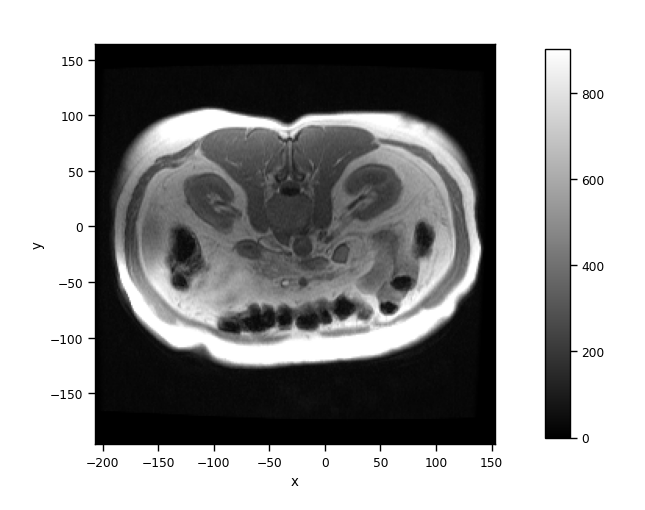

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


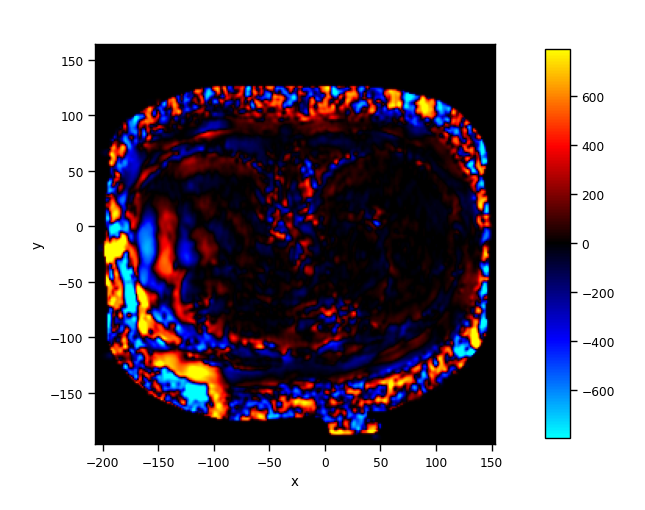

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


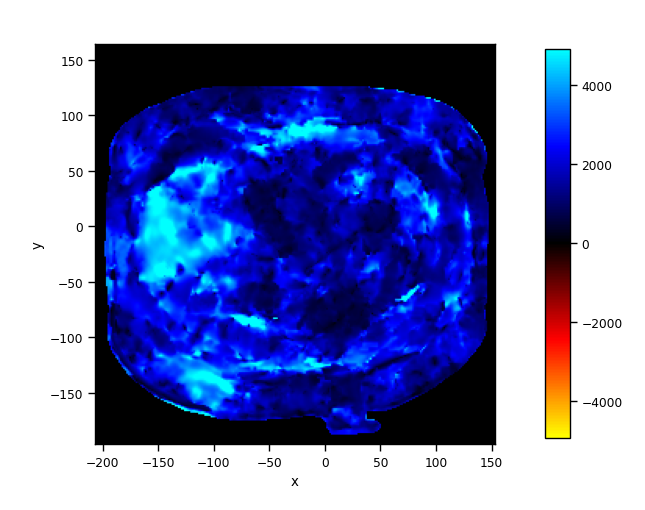

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


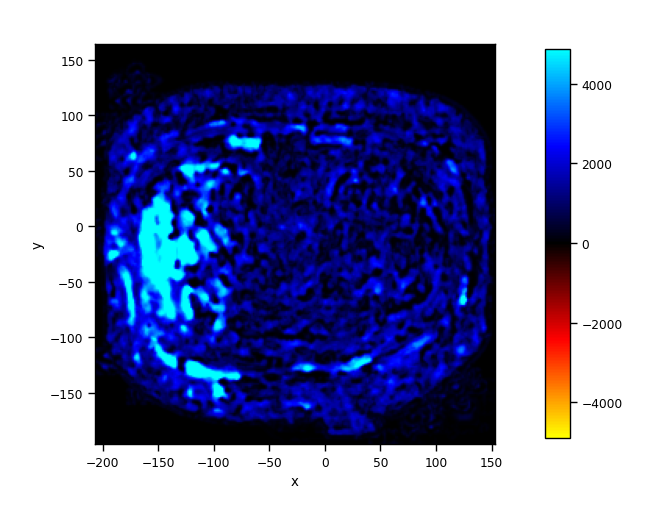

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [4]:
%autoreload
dataset = mre_pinn.data.MREDataset.from_xarrays('../data/NAFLD_test')
dataset.eval_baseline()
dataset[0].view()

In [5]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', rho=1e3, omega=60, detach=True)
pde

In [6]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=1,
    n_channels_block=16,
    n_conv_per_block=2,
    n_conv_blocks=5,
    width_factor=2,
    activ_fn='g',
    n_latent=128,
    n_pinn_layers=4,
    n_pinn_hidden=128,
    u_omega=16,
    u_scale=1e2,
    u_loc=0,
    mu_omega=16,
    mu_scale=1e3,
    mu_loc=0,
    skip_connect=True,
    dense=True,
    parallel=False
)
pino

HyperCNN(
  (u_cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
 

In [8]:
%autoreload

model = mre_pinn.training.PINOModel(
    dataset, dataset, pino, pde,
    loss_weights=[1e-2, 0, 1e-18],
    batch_size=1,
    n_points=4096,
    pde_warmup_iters=5000,
    pde_step_factor=10,
    pde_step_iters=10000
)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)

Compiling model...
'compile' took 0.000299 s



In [10]:
%%time
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(10)

# iterations: 10
Data time/iter:  0.0122s (56.82%)
Model time/iter: 0.0034s (15.91%)
Loss time/iter:  0.0058s (27.27%)
Total time/iter: 0.0214s
Total time: 0.2139s
1k iters time: 0.36m
10k iters time: 3.57m
100k iters time: 0.59h
CPU times: user 629 ms, sys: 396 ms, total: 1.03 s
Wall time: 215 ms


Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.71e+03, 0.00e+00, 0.00e+00]    [3.84e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


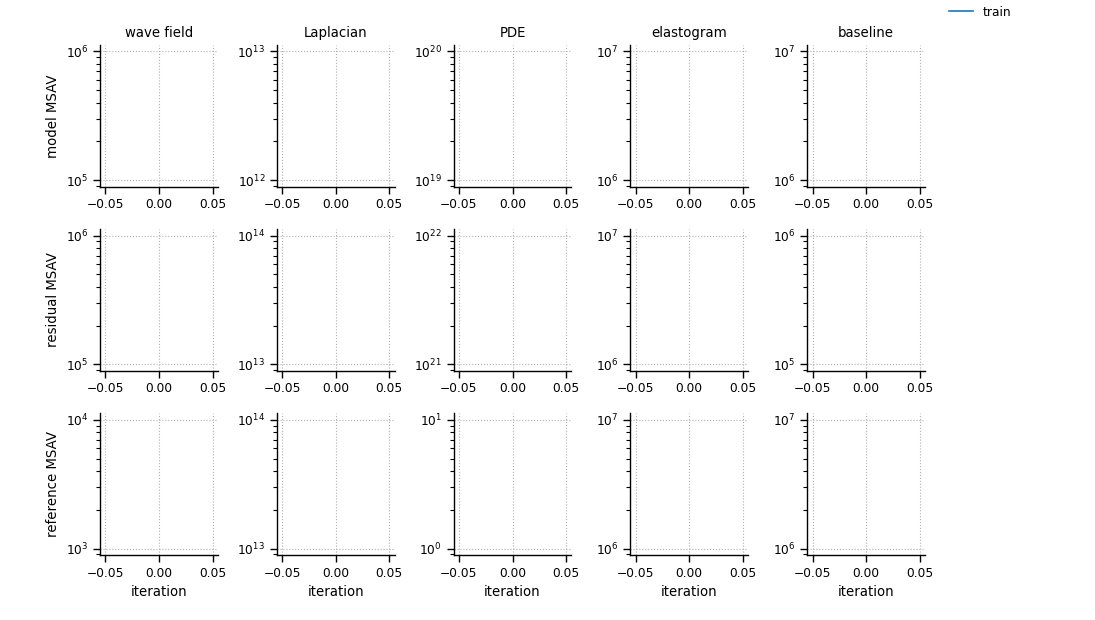

<IPython.core.display.Javascript object>


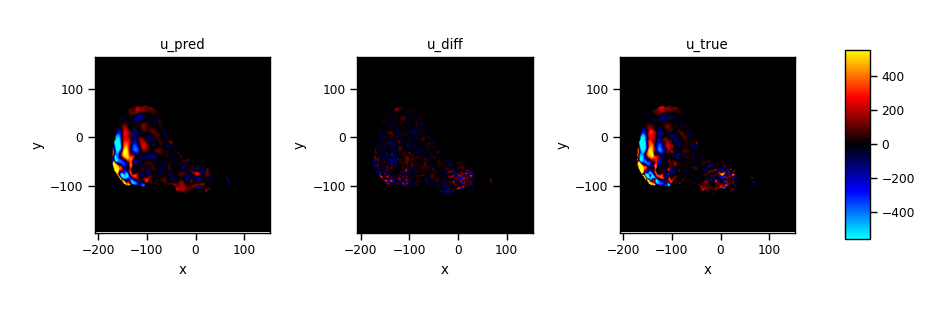

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


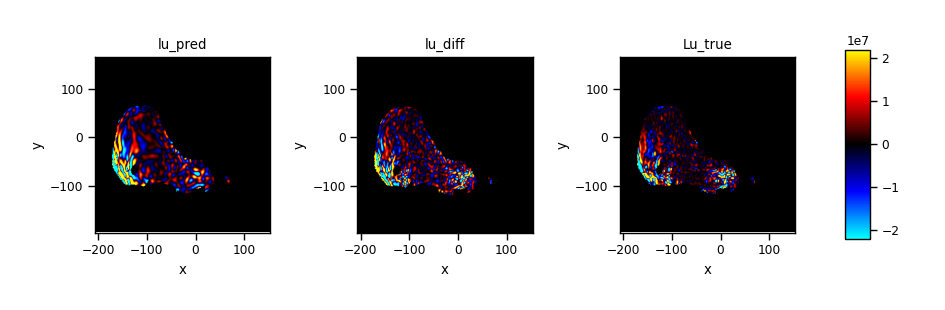

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


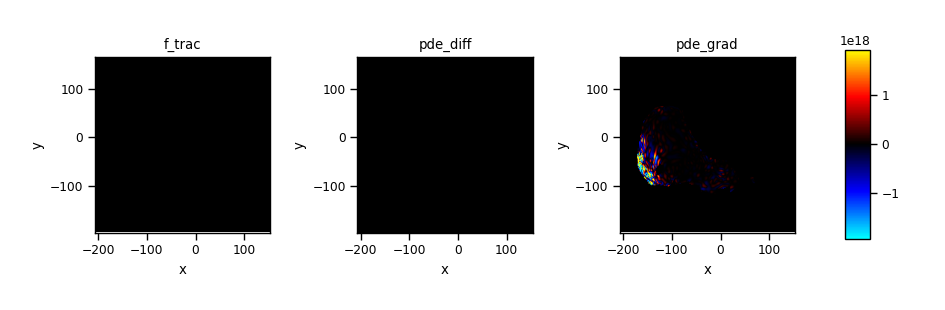

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


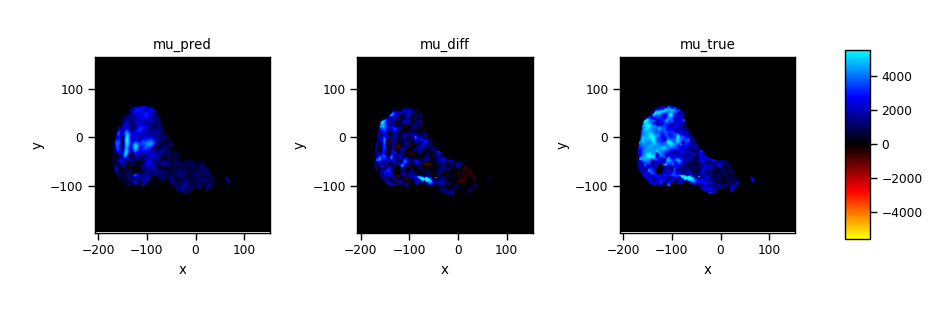

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


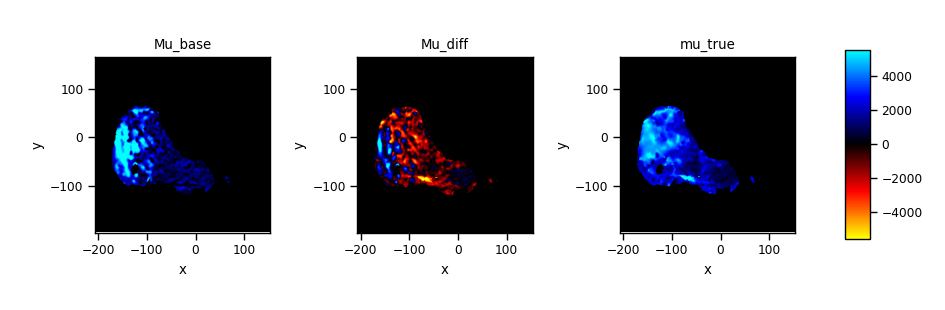

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4162 (32.51%)
10        [1.11e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20        [8.87e+02, 0.00e+00, 0.00e+00]    [8.74e+02, 0.00e+00, 0.00e+00]    []  
30        [7.58e+02, 0.00e+00, 0.00e+00]    [7.74e+02, 0.00e+00, 0.00e+00]    []  
40        [7.45e+02, 0.00e+00, 0.00e+00]    [7.02e+02, 0.00e+00, 0.00e+00]    []  
50        [6.52e+02, 0.00e+00, 0.00e+00]    [6.73e+02, 0.00e+00, 0.00e+00]    []  
60        [6.65e+02, 0.00e+00, 0.00e+00]    [6.61e+02, 0.00e+00, 0.00e+00]    []  
70        [6.70e+02, 0.00e+00, 0.00e+00]    [6.45e+02, 0.00e+00, 0.00e+00]    []  
80        [6.07e+02, 0.00e+00, 0.00e+00]    [6.53e+02, 0.00e+00, 0.00e+00]    []  
90        [6.07e+02, 0.00e+00, 0.00e+00]    [6.31e+02, 0.00e+00, 0.00e+00]    []  
100       [6.09e+02, 0.00e+00, 0.00e+00]    [6.34e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


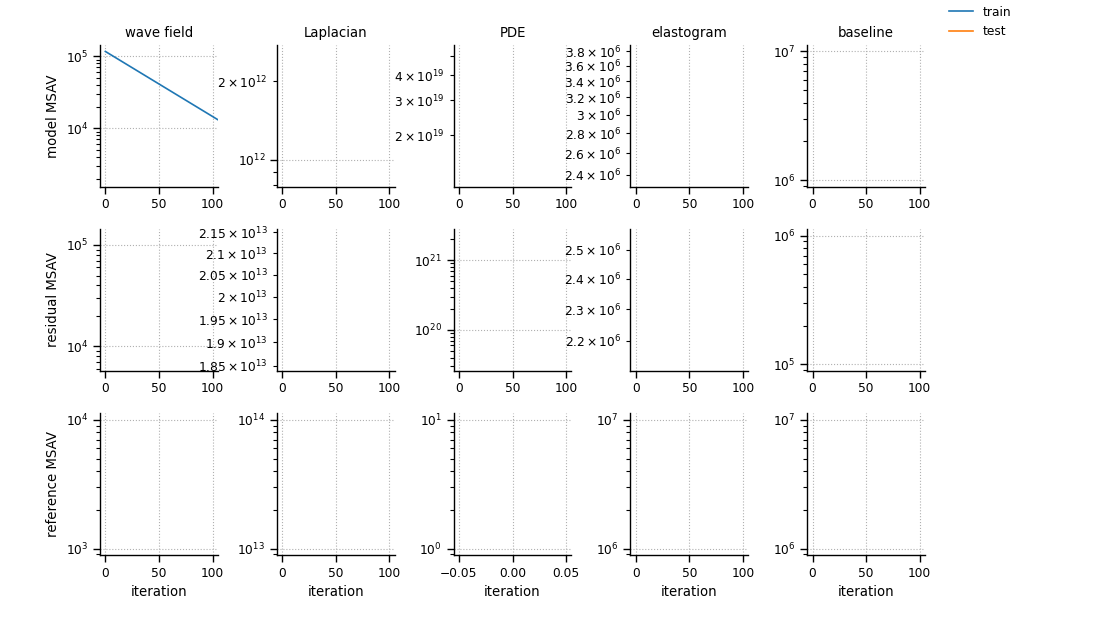

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3039 (42.54%)
110       [6.08e+02, 0.00e+00, 0.00e+00]    [6.29e+02, 0.00e+00, 0.00e+00]    []  
120       [6.12e+02, 0.00e+00, 0.00e+00]    [6.16e+02, 0.00e+00, 0.00e+00]    []  
130       [6.01e+02, 0.00e+00, 0.00e+00]    [6.08e+02, 0.00e+00, 0.00e+00]    []  
140       [5.91e+02, 0.00e+00, 0.00e+00]    [6.18e+02, 0.00e+00, 0.00e+00]    []  
150       [5.83e+02, 0.00e+00, 0.00e+00]    [6.08e+02, 0.00e+00, 0.00e+00]    []  
160       [6.10e+02, 0.00e+00, 0.00e+00]    [6.22e+02, 0.00e+00, 0.00e+00]    []  
170       [5.85e+02, 0.00e+00, 0.00e+00]    [5.98e+02, 0.00e+00, 0.00e+00]    []  
180       [6.00e+02, 0.00e+00, 0.00e+00]    [6.03e+02, 0.00e+00, 0.00e+00]    []  
190       [5.73e+02, 0.00e+00, 0.00e+00]    [5.81e+02, 0.00e+00, 0.00e+00]    []  
200       [5.63e+02, 0.00e+00, 0.00e+00]    [5.83e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


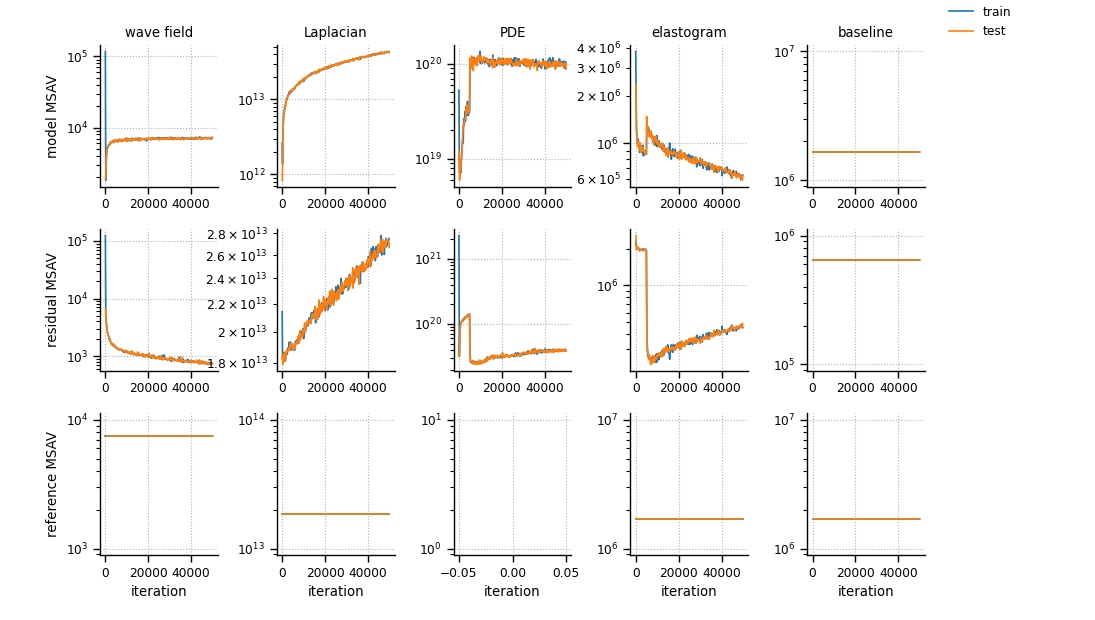

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5720 (49.26%)
210       [5.59e+02, 0.00e+00, 0.00e+00]    [5.87e+02, 0.00e+00, 0.00e+00]    []  
220       [5.30e+02, 0.00e+00, 0.00e+00]    [5.64e+02, 0.00e+00, 0.00e+00]    []  
230       [5.44e+02, 0.00e+00, 0.00e+00]    [5.72e+02, 0.00e+00, 0.00e+00]    []  
240       [5.84e+02, 0.00e+00, 0.00e+00]    [5.71e+02, 0.00e+00, 0.00e+00]    []  
250       [5.30e+02, 0.00e+00, 0.00e+00]    [5.53e+02, 0.00e+00, 0.00e+00]    []  
260       [5.45e+02, 0.00e+00, 0.00e+00]    [5.65e+02, 0.00e+00, 0.00e+00]    []  
270       [5.28e+02, 0.00e+00, 0.00e+00]    [5.60e+02, 0.00e+00, 0.00e+00]    []  
280       [5.32e+02, 0.00e+00, 0.00e+00]    [5.50e+02, 0.00e+00, 0.00e+00]    []  
290       [5.32e+02, 0.00e+00, 0.00e+00]    [5.47e+02, 0.00e+00, 0.00e+00]    []  
300       [5.28e+02, 0.00e+00, 0.00e+00]    [5.49e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7411 (53.11%)
310       [5.37e+02, 0.00e+00, 0.00e+00]    [5.37e+02, 0.00e+00, 0.00e+00]    []  
320       [4.89e+02, 0.00e+00, 0.00e+00]    [5.39e+02, 0.00e+00, 0.00e+00]    []  
330       [5.14e+02, 0.00e+00, 0.00e+00]    [5.30e+02, 0.00e+00, 0.00e+00]    []  
340       [5.16e+02, 0.00e+00, 0.00e+00]    [5.20e+02, 0.00e+00, 0.00e+00]    []  
350       [5.21e+02, 0.00e+00, 0.00e+00]    [5.18e+02, 0.00e+00, 0.00e+00]    []  
360       [5.27e+02, 0.00e+00, 0.00e+00]    [5.39e+02, 0.00e+00, 0.00e+00]    []  
370       [5.00e+02, 0.00e+00, 0.00e+00]    [5.17e+02, 0.00e+00, 0.00e+00]    []  
380       [4.89e+02, 0.00e+00, 0.00e+00]    [5.22e+02, 0.00e+00, 0.00e+00]    []  
390       [5.12e+02, 0.00e+00, 0.00e+00]    [5.20e+02, 0.00e+00, 0.00e+00]    []  
400       [4.91e+02, 0.00e+00, 0.00e+00]    [5.24e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7348 (55.81%)
410       [5.05e+02, 0.00e+00, 0.00e+00]    [5.09e+02, 0.00e+00, 0.00e+00]    []  
420       [4.85e+02, 0.00e+00, 0.00e+00]    [5.06e+02, 0.00e+00, 0.00e+00]    []  
430       [4.99e+02, 0.00e+00, 0.00e+00]    [5.13e+02, 0.00e+00, 0.00e+00]    []  
440       [4.80e+02, 0.00e+00, 0.00e+00]    [5.02e+02, 0.00e+00, 0.00e+00]    []  
450       [4.97e+02, 0.00e+00, 0.00e+00]    [5.05e+02, 0.00e+00, 0.00e+00]    []  
460       [4.72e+02, 0.00e+00, 0.00e+00]    [5.03e+02, 0.00e+00, 0.00e+00]    []  
470       [4.50e+02, 0.00e+00, 0.00e+00]    [5.00e+02, 0.00e+00, 0.00e+00]    []  
480       [4.65e+02, 0.00e+00, 0.00e+00]    [4.89e+02, 0.00e+00, 0.00e+00]    []  
490       [4.47e+02, 0.00e+00, 0.00e+00]    [4.91e+02, 0.00e+00, 0.00e+00]    []  
500       [4.99e+02, 0.00e+00, 0.00e+00]    [4.98e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9643 (57.90%)
510       [4.87e+02, 0.00e+00, 0.00e+00]    [4.82e+02, 0.00e+00, 0.00e+00]    []  
520       [4.79e+02, 0.00e+00, 0.00e+00]    [4.96e+02, 0.00e+00, 0.00e+00]    []  
530       [4.79e+02, 0.00e+00, 0.00e+00]    [4.94e+02, 0.00e+00, 0.00e+00]    []  
540       [4.64e+02, 0.00e+00, 0.00e+00]    [4.84e+02, 0.00e+00, 0.00e+00]    []  
550       [4.90e+02, 0.00e+00, 0.00e+00]    [4.82e+02, 0.00e+00, 0.00e+00]    []  
560       [4.71e+02, 0.00e+00, 0.00e+00]    [4.89e+02, 0.00e+00, 0.00e+00]    []  
570       [4.71e+02, 0.00e+00, 0.00e+00]    [4.83e+02, 0.00e+00, 0.00e+00]    []  
580       [4.42e+02, 0.00e+00, 0.00e+00]    [4.89e+02, 0.00e+00, 0.00e+00]    []  
590       [4.62e+02, 0.00e+00, 0.00e+00]    [4.84e+02, 0.00e+00, 0.00e+00]    []  
600       [4.51e+02, 0.00e+00, 0.00e+00]    [4.87e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9270 (59.49%)
610       [4.69e+02, 0.00e+00, 0.00e+00]    [4.84e+02, 0.00e+00, 0.00e+00]    []  
620       [4.64e+02, 0.00e+00, 0.00e+00]    [4.68e+02, 0.00e+00, 0.00e+00]    []  
630       [4.77e+02, 0.00e+00, 0.00e+00]    [4.70e+02, 0.00e+00, 0.00e+00]    []  
640       [4.87e+02, 0.00e+00, 0.00e+00]    [4.71e+02, 0.00e+00, 0.00e+00]    []  
650       [4.26e+02, 0.00e+00, 0.00e+00]    [4.73e+02, 0.00e+00, 0.00e+00]    []  
660       [4.44e+02, 0.00e+00, 0.00e+00]    [4.63e+02, 0.00e+00, 0.00e+00]    []  
670       [4.58e+02, 0.00e+00, 0.00e+00]    [4.58e+02, 0.00e+00, 0.00e+00]    []  
680       [4.36e+02, 0.00e+00, 0.00e+00]    [4.63e+02, 0.00e+00, 0.00e+00]    []  
690       [4.36e+02, 0.00e+00, 0.00e+00]    [4.52e+02, 0.00e+00, 0.00e+00]    []  
700       [4.43e+02, 0.00e+00, 0.00e+00]    [4.71e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.6967 (60.69%)
710       [4.18e+02, 0.00e+00, 0.00e+00]    [4.60e+02, 0.00e+00, 0.00e+00]    []  
720       [4.31e+02, 0.00e+00, 0.00e+00]    [4.52e+02, 0.00e+00, 0.00e+00]    []  
730       [4.47e+02, 0.00e+00, 0.00e+00]    [4.55e+02, 0.00e+00, 0.00e+00]    []  
740       [4.26e+02, 0.00e+00, 0.00e+00]    [4.56e+02, 0.00e+00, 0.00e+00]    []  
750       [4.18e+02, 0.00e+00, 0.00e+00]    [4.38e+02, 0.00e+00, 0.00e+00]    []  
760       [4.19e+02, 0.00e+00, 0.00e+00]    [4.60e+02, 0.00e+00, 0.00e+00]    []  
770       [4.25e+02, 0.00e+00, 0.00e+00]    [4.51e+02, 0.00e+00, 0.00e+00]    []  
780       [4.23e+02, 0.00e+00, 0.00e+00]    [4.48e+02, 0.00e+00, 0.00e+00]    []  
790       [4.11e+02, 0.00e+00, 0.00e+00]    [4.51e+02, 0.00e+00, 0.00e+00]    []  
800       [4.17e+02, 0.00e+00, 0.00e+00]    [4.38e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9746 (61.74%)
810       [4.31e+02, 0.00e+00, 0.00e+00]    [4.40e+02, 0.00e+00, 0.00e+00]    []  
820       [4.02e+02, 0.00e+00, 0.00e+00]    [4.41e+02, 0.00e+00, 0.00e+00]    []  
830       [4.14e+02, 0.00e+00, 0.00e+00]    [4.42e+02, 0.00e+00, 0.00e+00]    []  
840       [4.41e+02, 0.00e+00, 0.00e+00]    [4.39e+02, 0.00e+00, 0.00e+00]    []  
850       [4.32e+02, 0.00e+00, 0.00e+00]    [4.38e+02, 0.00e+00, 0.00e+00]    []  
860       [4.16e+02, 0.00e+00, 0.00e+00]    [4.57e+02, 0.00e+00, 0.00e+00]    []  
870       [4.27e+02, 0.00e+00, 0.00e+00]    [4.42e+02, 0.00e+00, 0.00e+00]    []  
880       [4.23e+02, 0.00e+00, 0.00e+00]    [4.42e+02, 0.00e+00, 0.00e+00]    []  
890       [4.18e+02, 0.00e+00, 0.00e+00]    [4.37e+02, 0.00e+00, 0.00e+00]    []  
900       [4.55e+02, 0.00e+00, 0.00e+00]    [4.29e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9425 (62.59%)
910       [4.44e+02, 0.00e+00, 0.00e+00]    [4.28e+02, 0.00e+00, 0.00e+00]    []  
920       [4.31e+02, 0.00e+00, 0.00e+00]    [4.33e+02, 0.00e+00, 0.00e+00]    []  
930       [4.07e+02, 0.00e+00, 0.00e+00]    [4.30e+02, 0.00e+00, 0.00e+00]    []  
940       [4.05e+02, 0.00e+00, 0.00e+00]    [4.29e+02, 0.00e+00, 0.00e+00]    []  
950       [4.25e+02, 0.00e+00, 0.00e+00]    [4.39e+02, 0.00e+00, 0.00e+00]    []  
960       [4.19e+02, 0.00e+00, 0.00e+00]    [4.48e+02, 0.00e+00, 0.00e+00]    []  
970       [4.16e+02, 0.00e+00, 0.00e+00]    [4.18e+02, 0.00e+00, 0.00e+00]    []  
980       [4.26e+02, 0.00e+00, 0.00e+00]    [4.22e+02, 0.00e+00, 0.00e+00]    []  
990       [4.21e+02, 0.00e+00, 0.00e+00]    [4.28e+02, 0.00e+00, 0.00e+00]    []  
1000      [4.09e+02, 0.00e+00, 0.00e+00]    [4.16e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7336 (63.26%)
1010      [4.11e+02, 0.00e+00, 0.00e+00]    [4.24e+02, 0.00e+00, 0.00e+00]    []  
1020      [4.35e+02, 0.00e+00, 0.00e+00]    [4.17e+02, 0.00e+00, 0.00e+00]    []  
1030      [4.13e+02, 0.00e+00, 0.00e+00]    [4.11e+02, 0.00e+00, 0.00e+00]    []  
1040      [4.01e+02, 0.00e+00, 0.00e+00]    [4.16e+02, 0.00e+00, 0.00e+00]    []  
1050      [4.19e+02, 0.00e+00, 0.00e+00]    [4.07e+02, 0.00e+00, 0.00e+00]    []  
1060      [4.11e+02, 0.00e+00, 0.00e+00]    [4.13e+02, 0.00e+00, 0.00e+00]    []  
1070      [3.89e+02, 0.00e+00, 0.00e+00]    [4.00e+02, 0.00e+00, 0.00e+00]    []  
1080      [3.95e+02, 0.00e+00, 0.00e+00]    [4.10e+02, 0.00e+00, 0.00e+00]    []  
1090      [3.72e+02, 0.00e+00, 0.00e+00]    [4.07e+02, 0.00e+00, 0.00e+00]    []  
1100      [3.90e+02, 0.00e+00, 0.00e+00]    [4.06e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7720 (63.85%)
1110      [3.76e+02, 0.00e+00, 0.00e+00]    [4.01e+02, 0.00e+00, 0.00e+00]    []  
1120      [4.08e+02, 0.00e+00, 0.00e+00]    [4.05e+02, 0.00e+00, 0.00e+00]    []  
1130      [3.89e+02, 0.00e+00, 0.00e+00]    [4.01e+02, 0.00e+00, 0.00e+00]    []  
1140      [3.87e+02, 0.00e+00, 0.00e+00]    [3.94e+02, 0.00e+00, 0.00e+00]    []  
1150      [3.82e+02, 0.00e+00, 0.00e+00]    [4.04e+02, 0.00e+00, 0.00e+00]    []  
1160      [3.94e+02, 0.00e+00, 0.00e+00]    [3.93e+02, 0.00e+00, 0.00e+00]    []  
1170      [3.69e+02, 0.00e+00, 0.00e+00]    [4.04e+02, 0.00e+00, 0.00e+00]    []  
1180      [3.66e+02, 0.00e+00, 0.00e+00]    [3.95e+02, 0.00e+00, 0.00e+00]    []  
1190      [3.84e+02, 0.00e+00, 0.00e+00]    [3.98e+02, 0.00e+00, 0.00e+00]    []  
1200      [3.74e+02, 0.00e+00, 0.00e+00]    [3.93e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9233 (64.38%)
1210      [3.79e+02, 0.00e+00, 0.00e+00]    [3.96e+02, 0.00e+00, 0.00e+00]    []  
1220      [3.71e+02, 0.00e+00, 0.00e+00]    [3.92e+02, 0.00e+00, 0.00e+00]    []  
1230      [3.94e+02, 0.00e+00, 0.00e+00]    [3.95e+02, 0.00e+00, 0.00e+00]    []  
1240      [3.80e+02, 0.00e+00, 0.00e+00]    [3.89e+02, 0.00e+00, 0.00e+00]    []  
1250      [3.85e+02, 0.00e+00, 0.00e+00]    [3.95e+02, 0.00e+00, 0.00e+00]    []  
1260      [3.76e+02, 0.00e+00, 0.00e+00]    [3.86e+02, 0.00e+00, 0.00e+00]    []  
1270      [3.83e+02, 0.00e+00, 0.00e+00]    [3.93e+02, 0.00e+00, 0.00e+00]    []  
1280      [3.92e+02, 0.00e+00, 0.00e+00]    [3.88e+02, 0.00e+00, 0.00e+00]    []  
1290      [3.80e+02, 0.00e+00, 0.00e+00]    [3.89e+02, 0.00e+00, 0.00e+00]    []  
1300      [3.69e+02, 0.00e+00, 0.00e+00]    [3.79e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7191 (64.82%)
1310      [3.85e+02, 0.00e+00, 0.00e+00]    [3.98e+02, 0.00e+00, 0.00e+00]    []  
1320      [3.83e+02, 0.00e+00, 0.00e+00]    [3.81e+02, 0.00e+00, 0.00e+00]    []  
1330      [4.04e+02, 0.00e+00, 0.00e+00]    [3.87e+02, 0.00e+00, 0.00e+00]    []  
1340      [3.73e+02, 0.00e+00, 0.00e+00]    [3.80e+02, 0.00e+00, 0.00e+00]    []  
1350      [3.86e+02, 0.00e+00, 0.00e+00]    [3.96e+02, 0.00e+00, 0.00e+00]    []  
1360      [3.92e+02, 0.00e+00, 0.00e+00]    [3.84e+02, 0.00e+00, 0.00e+00]    []  
1370      [3.60e+02, 0.00e+00, 0.00e+00]    [3.87e+02, 0.00e+00, 0.00e+00]    []  
1380      [3.74e+02, 0.00e+00, 0.00e+00]    [3.82e+02, 0.00e+00, 0.00e+00]    []  
1390      [3.67e+02, 0.00e+00, 0.00e+00]    [3.82e+02, 0.00e+00, 0.00e+00]    []  
1400      [3.66e+02, 0.00e+00, 0.00e+00]    [3.76e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9639 (65.23%)
1410      [3.73e+02, 0.00e+00, 0.00e+00]    [3.71e+02, 0.00e+00, 0.00e+00]    []  
1420      [3.47e+02, 0.00e+00, 0.00e+00]    [3.77e+02, 0.00e+00, 0.00e+00]    []  
1430      [4.03e+02, 0.00e+00, 0.00e+00]    [3.91e+02, 0.00e+00, 0.00e+00]    []  
1440      [3.47e+02, 0.00e+00, 0.00e+00]    [3.64e+02, 0.00e+00, 0.00e+00]    []  
1450      [3.73e+02, 0.00e+00, 0.00e+00]    [3.72e+02, 0.00e+00, 0.00e+00]    []  
1460      [3.75e+02, 0.00e+00, 0.00e+00]    [3.69e+02, 0.00e+00, 0.00e+00]    []  
1470      [3.70e+02, 0.00e+00, 0.00e+00]    [3.70e+02, 0.00e+00, 0.00e+00]    []  
1480      [3.67e+02, 0.00e+00, 0.00e+00]    [3.68e+02, 0.00e+00, 0.00e+00]    []  
1490      [3.36e+02, 0.00e+00, 0.00e+00]    [3.66e+02, 0.00e+00, 0.00e+00]    []  
1500      [3.55e+02, 0.00e+00, 0.00e+00]    [3.59e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7049 (65.57%)
1510      [3.46e+02, 0.00e+00, 0.00e+00]    [3.56e+02, 0.00e+00, 0.00e+00]    []  
1520      [3.42e+02, 0.00e+00, 0.00e+00]    [3.65e+02, 0.00e+00, 0.00e+00]    []  
1530      [3.55e+02, 0.00e+00, 0.00e+00]    [3.63e+02, 0.00e+00, 0.00e+00]    []  
1540      [3.60e+02, 0.00e+00, 0.00e+00]    [3.58e+02, 0.00e+00, 0.00e+00]    []  
1550      [3.74e+02, 0.00e+00, 0.00e+00]    [3.62e+02, 0.00e+00, 0.00e+00]    []  
1560      [3.29e+02, 0.00e+00, 0.00e+00]    [3.59e+02, 0.00e+00, 0.00e+00]    []  
1570      [3.67e+02, 0.00e+00, 0.00e+00]    [3.58e+02, 0.00e+00, 0.00e+00]    []  
1580      [3.62e+02, 0.00e+00, 0.00e+00]    [3.63e+02, 0.00e+00, 0.00e+00]    []  
1590      [3.69e+02, 0.00e+00, 0.00e+00]    [3.72e+02, 0.00e+00, 0.00e+00]    []  
1600      [3.47e+02, 0.00e+00, 0.00e+00]    [3.71e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0142 (65.90%)
1610      [3.66e+02, 0.00e+00, 0.00e+00]    [3.62e+02, 0.00e+00, 0.00e+00]    []  
1620      [3.59e+02, 0.00e+00, 0.00e+00]    [3.55e+02, 0.00e+00, 0.00e+00]    []  
1630      [3.62e+02, 0.00e+00, 0.00e+00]    [3.49e+02, 0.00e+00, 0.00e+00]    []  
1640      [3.44e+02, 0.00e+00, 0.00e+00]    [3.54e+02, 0.00e+00, 0.00e+00]    []  
1650      [3.60e+02, 0.00e+00, 0.00e+00]    [3.59e+02, 0.00e+00, 0.00e+00]    []  
1660      [3.73e+02, 0.00e+00, 0.00e+00]    [3.44e+02, 0.00e+00, 0.00e+00]    []  
1670      [3.62e+02, 0.00e+00, 0.00e+00]    [3.65e+02, 0.00e+00, 0.00e+00]    []  
1680      [3.70e+02, 0.00e+00, 0.00e+00]    [3.62e+02, 0.00e+00, 0.00e+00]    []  
1690      [3.49e+02, 0.00e+00, 0.00e+00]    [3.50e+02, 0.00e+00, 0.00e+00]    []  
1700      [3.52e+02, 0.00e+00, 0.00e+00]    [3.54e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8851 (66.19%)
1710      [3.34e+02, 0.00e+00, 0.00e+00]    [3.48e+02, 0.00e+00, 0.00e+00]    []  
1720      [3.31e+02, 0.00e+00, 0.00e+00]    [3.57e+02, 0.00e+00, 0.00e+00]    []  
1730      [3.66e+02, 0.00e+00, 0.00e+00]    [3.44e+02, 0.00e+00, 0.00e+00]    []  
1740      [3.44e+02, 0.00e+00, 0.00e+00]    [3.53e+02, 0.00e+00, 0.00e+00]    []  
1750      [3.38e+02, 0.00e+00, 0.00e+00]    [3.52e+02, 0.00e+00, 0.00e+00]    []  
1760      [3.64e+02, 0.00e+00, 0.00e+00]    [3.48e+02, 0.00e+00, 0.00e+00]    []  
1770      [3.33e+02, 0.00e+00, 0.00e+00]    [3.45e+02, 0.00e+00, 0.00e+00]    []  
1780      [3.40e+02, 0.00e+00, 0.00e+00]    [3.51e+02, 0.00e+00, 0.00e+00]    []  
1790      [3.46e+02, 0.00e+00, 0.00e+00]    [3.45e+02, 0.00e+00, 0.00e+00]    []  
1800      [3.60e+02, 0.00e+00, 0.00e+00]    [3.49e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7864 (66.44%)
1810      [3.33e+02, 0.00e+00, 0.00e+00]    [3.48e+02, 0.00e+00, 0.00e+00]    []  
1820      [3.35e+02, 0.00e+00, 0.00e+00]    [3.38e+02, 0.00e+00, 0.00e+00]    []  
1830      [3.41e+02, 0.00e+00, 0.00e+00]    [3.48e+02, 0.00e+00, 0.00e+00]    []  
1840      [3.47e+02, 0.00e+00, 0.00e+00]    [3.40e+02, 0.00e+00, 0.00e+00]    []  
1850      [3.44e+02, 0.00e+00, 0.00e+00]    [3.37e+02, 0.00e+00, 0.00e+00]    []  
1860      [3.44e+02, 0.00e+00, 0.00e+00]    [3.37e+02, 0.00e+00, 0.00e+00]    []  
1870      [3.41e+02, 0.00e+00, 0.00e+00]    [3.31e+02, 0.00e+00, 0.00e+00]    []  
1880      [3.31e+02, 0.00e+00, 0.00e+00]    [3.34e+02, 0.00e+00, 0.00e+00]    []  
1890      [3.47e+02, 0.00e+00, 0.00e+00]    [3.35e+02, 0.00e+00, 0.00e+00]    []  
1900      [3.47e+02, 0.00e+00, 0.00e+00]    [3.39e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7862 (66.67%)
1910      [3.31e+02, 0.00e+00, 0.00e+00]    [3.43e+02, 0.00e+00, 0.00e+00]    []  
1920      [3.17e+02, 0.00e+00, 0.00e+00]    [3.45e+02, 0.00e+00, 0.00e+00]    []  
1930      [3.35e+02, 0.00e+00, 0.00e+00]    [3.43e+02, 0.00e+00, 0.00e+00]    []  
1940      [3.53e+02, 0.00e+00, 0.00e+00]    [3.37e+02, 0.00e+00, 0.00e+00]    []  
1950      [3.29e+02, 0.00e+00, 0.00e+00]    [3.39e+02, 0.00e+00, 0.00e+00]    []  
1960      [3.48e+02, 0.00e+00, 0.00e+00]    [3.30e+02, 0.00e+00, 0.00e+00]    []  
1970      [3.37e+02, 0.00e+00, 0.00e+00]    [3.38e+02, 0.00e+00, 0.00e+00]    []  
1980      [3.18e+02, 0.00e+00, 0.00e+00]    [3.34e+02, 0.00e+00, 0.00e+00]    []  
1990      [3.25e+02, 0.00e+00, 0.00e+00]    [3.32e+02, 0.00e+00, 0.00e+00]    []  
2000      [3.35e+02, 0.00e+00, 0.00e+00]    [3.33e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0424 (66.90%)
2010      [3.29e+02, 0.00e+00, 0.00e+00]    [3.38e+02, 0.00e+00, 0.00e+00]    []  
2020      [3.27e+02, 0.00e+00, 0.00e+00]    [3.35e+02, 0.00e+00, 0.00e+00]    []  
2030      [3.27e+02, 0.00e+00, 0.00e+00]    [3.36e+02, 0.00e+00, 0.00e+00]    []  
2040      [3.30e+02, 0.00e+00, 0.00e+00]    [3.31e+02, 0.00e+00, 0.00e+00]    []  
2050      [3.17e+02, 0.00e+00, 0.00e+00]    [3.31e+02, 0.00e+00, 0.00e+00]    []  
2060      [3.16e+02, 0.00e+00, 0.00e+00]    [3.29e+02, 0.00e+00, 0.00e+00]    []  
2070      [3.09e+02, 0.00e+00, 0.00e+00]    [3.35e+02, 0.00e+00, 0.00e+00]    []  
2080      [3.20e+02, 0.00e+00, 0.00e+00]    [3.30e+02, 0.00e+00, 0.00e+00]    []  
2090      [3.23e+02, 0.00e+00, 0.00e+00]    [3.33e+02, 0.00e+00, 0.00e+00]    []  
2100      [3.27e+02, 0.00e+00, 0.00e+00]    [3.35e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.7721 (67.09%)
2110      [3.23e+02, 0.00e+00, 0.00e+00]    [3.25e+02, 0.00e+00, 0.00e+00]    []  
2120      [3.26e+02, 0.00e+00, 0.00e+00]    [3.27e+02, 0.00e+00, 0.00e+00]    []  
2130      [3.23e+02, 0.00e+00, 0.00e+00]    [3.30e+02, 0.00e+00, 0.00e+00]    []  
2140      [3.40e+02, 0.00e+00, 0.00e+00]    [3.33e+02, 0.00e+00, 0.00e+00]    []  
2150      [3.43e+02, 0.00e+00, 0.00e+00]    [3.27e+02, 0.00e+00, 0.00e+00]    []  
2160      [3.34e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2170      [3.02e+02, 0.00e+00, 0.00e+00]    [3.28e+02, 0.00e+00, 0.00e+00]    []  
2180      [3.21e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2190      [3.10e+02, 0.00e+00, 0.00e+00]    [3.29e+02, 0.00e+00, 0.00e+00]    []  
2200      [3.23e+02, 0.00e+00, 0.00e+00]    [3.34e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0580 (67.28%)
2210      [3.60e+02, 0.00e+00, 0.00e+00]    [3.26e+02, 0.00e+00, 0.00e+00]    []  
2220      [3.22e+02, 0.00e+00, 0.00e+00]    [3.26e+02, 0.00e+00, 0.00e+00]    []  
2230      [3.21e+02, 0.00e+00, 0.00e+00]    [3.16e+02, 0.00e+00, 0.00e+00]    []  
2240      [3.21e+02, 0.00e+00, 0.00e+00]    [3.21e+02, 0.00e+00, 0.00e+00]    []  
2250      [3.28e+02, 0.00e+00, 0.00e+00]    [3.27e+02, 0.00e+00, 0.00e+00]    []  
2260      [3.10e+02, 0.00e+00, 0.00e+00]    [3.27e+02, 0.00e+00, 0.00e+00]    []  
2270      [3.19e+02, 0.00e+00, 0.00e+00]    [3.21e+02, 0.00e+00, 0.00e+00]    []  
2280      [3.00e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2290      [3.17e+02, 0.00e+00, 0.00e+00]    [3.31e+02, 0.00e+00, 0.00e+00]    []  
2300      [2.95e+02, 0.00e+00, 0.00e+00]    [3.23e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8563 (67.45%)
2310      [3.06e+02, 0.00e+00, 0.00e+00]    [3.25e+02, 0.00e+00, 0.00e+00]    []  
2320      [3.08e+02, 0.00e+00, 0.00e+00]    [3.16e+02, 0.00e+00, 0.00e+00]    []  
2330      [3.21e+02, 0.00e+00, 0.00e+00]    [3.19e+02, 0.00e+00, 0.00e+00]    []  
2340      [3.15e+02, 0.00e+00, 0.00e+00]    [3.25e+02, 0.00e+00, 0.00e+00]    []  
2350      [3.34e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2360      [3.17e+02, 0.00e+00, 0.00e+00]    [3.14e+02, 0.00e+00, 0.00e+00]    []  
2370      [3.02e+02, 0.00e+00, 0.00e+00]    [3.24e+02, 0.00e+00, 0.00e+00]    []  
2380      [3.07e+02, 0.00e+00, 0.00e+00]    [3.16e+02, 0.00e+00, 0.00e+00]    []  
2390      [3.01e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2400      [3.13e+02, 0.00e+00, 0.00e+00]    [3.19e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1282 (67.61%)
2410      [3.11e+02, 0.00e+00, 0.00e+00]    [3.13e+02, 0.00e+00, 0.00e+00]    []  
2420      [3.16e+02, 0.00e+00, 0.00e+00]    [3.25e+02, 0.00e+00, 0.00e+00]    []  
2430      [3.14e+02, 0.00e+00, 0.00e+00]    [3.12e+02, 0.00e+00, 0.00e+00]    []  
2440      [3.18e+02, 0.00e+00, 0.00e+00]    [3.19e+02, 0.00e+00, 0.00e+00]    []  
2450      [3.00e+02, 0.00e+00, 0.00e+00]    [3.11e+02, 0.00e+00, 0.00e+00]    []  
2460      [3.21e+02, 0.00e+00, 0.00e+00]    [3.20e+02, 0.00e+00, 0.00e+00]    []  
2470      [3.08e+02, 0.00e+00, 0.00e+00]    [3.24e+02, 0.00e+00, 0.00e+00]    []  
2480      [3.07e+02, 0.00e+00, 0.00e+00]    [3.16e+02, 0.00e+00, 0.00e+00]    []  
2490      [3.23e+02, 0.00e+00, 0.00e+00]    [3.09e+02, 0.00e+00, 0.00e+00]    []  
2500      [2.88e+02, 0.00e+00, 0.00e+00]    [3.13e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8521 (67.75%)
2510      [3.09e+02, 0.00e+00, 0.00e+00]    [3.14e+02, 0.00e+00, 0.00e+00]    []  
2520      [3.03e+02, 0.00e+00, 0.00e+00]    [3.10e+02, 0.00e+00, 0.00e+00]    []  
2530      [2.92e+02, 0.00e+00, 0.00e+00]    [3.14e+02, 0.00e+00, 0.00e+00]    []  
2540      [3.04e+02, 0.00e+00, 0.00e+00]    [3.17e+02, 0.00e+00, 0.00e+00]    []  
2550      [3.04e+02, 0.00e+00, 0.00e+00]    [3.10e+02, 0.00e+00, 0.00e+00]    []  
2560      [3.13e+02, 0.00e+00, 0.00e+00]    [3.15e+02, 0.00e+00, 0.00e+00]    []  
2570      [2.83e+02, 0.00e+00, 0.00e+00]    [3.04e+02, 0.00e+00, 0.00e+00]    []  
2580      [3.18e+02, 0.00e+00, 0.00e+00]    [3.09e+02, 0.00e+00, 0.00e+00]    []  
2590      [3.12e+02, 0.00e+00, 0.00e+00]    [3.07e+02, 0.00e+00, 0.00e+00]    []  
2600      [3.04e+02, 0.00e+00, 0.00e+00]    [3.06e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8423 (67.88%)
2610      [2.95e+02, 0.00e+00, 0.00e+00]    [3.09e+02, 0.00e+00, 0.00e+00]    []  
2620      [3.22e+02, 0.00e+00, 0.00e+00]    [3.05e+02, 0.00e+00, 0.00e+00]    []  
2630      [3.21e+02, 0.00e+00, 0.00e+00]    [3.08e+02, 0.00e+00, 0.00e+00]    []  
2640      [2.93e+02, 0.00e+00, 0.00e+00]    [3.05e+02, 0.00e+00, 0.00e+00]    []  
2650      [3.18e+02, 0.00e+00, 0.00e+00]    [3.07e+02, 0.00e+00, 0.00e+00]    []  
2660      [3.17e+02, 0.00e+00, 0.00e+00]    [3.11e+02, 0.00e+00, 0.00e+00]    []  
2670      [3.01e+02, 0.00e+00, 0.00e+00]    [3.14e+02, 0.00e+00, 0.00e+00]    []  
2680      [3.07e+02, 0.00e+00, 0.00e+00]    [3.03e+02, 0.00e+00, 0.00e+00]    []  
2690      [2.92e+02, 0.00e+00, 0.00e+00]    [3.12e+02, 0.00e+00, 0.00e+00]    []  
2700      [3.11e+02, 0.00e+00, 0.00e+00]    [3.11e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8512 (68.00%)
2710      [3.00e+02, 0.00e+00, 0.00e+00]    [3.05e+02, 0.00e+00, 0.00e+00]    []  
2720      [2.96e+02, 0.00e+00, 0.00e+00]    [3.05e+02, 0.00e+00, 0.00e+00]    []  
2730      [3.02e+02, 0.00e+00, 0.00e+00]    [3.06e+02, 0.00e+00, 0.00e+00]    []  
2740      [2.97e+02, 0.00e+00, 0.00e+00]    [3.10e+02, 0.00e+00, 0.00e+00]    []  
2750      [2.90e+02, 0.00e+00, 0.00e+00]    [3.04e+02, 0.00e+00, 0.00e+00]    []  
2760      [2.99e+02, 0.00e+00, 0.00e+00]    [3.04e+02, 0.00e+00, 0.00e+00]    []  
2770      [2.88e+02, 0.00e+00, 0.00e+00]    [3.08e+02, 0.00e+00, 0.00e+00]    []  
2780      [2.97e+02, 0.00e+00, 0.00e+00]    [3.01e+02, 0.00e+00, 0.00e+00]    []  
2790      [3.14e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  
2800      [3.05e+02, 0.00e+00, 0.00e+00]    [3.02e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8288 (68.11%)
2810      [3.00e+02, 0.00e+00, 0.00e+00]    [3.10e+02, 0.00e+00, 0.00e+00]    []  
2820      [2.97e+02, 0.00e+00, 0.00e+00]    [3.10e+02, 0.00e+00, 0.00e+00]    []  
2830      [2.83e+02, 0.00e+00, 0.00e+00]    [3.08e+02, 0.00e+00, 0.00e+00]    []  
2840      [2.93e+02, 0.00e+00, 0.00e+00]    [3.06e+02, 0.00e+00, 0.00e+00]    []  
2850      [2.99e+02, 0.00e+00, 0.00e+00]    [2.98e+02, 0.00e+00, 0.00e+00]    []  
2860      [3.01e+02, 0.00e+00, 0.00e+00]    [3.06e+02, 0.00e+00, 0.00e+00]    []  
2870      [2.82e+02, 0.00e+00, 0.00e+00]    [3.11e+02, 0.00e+00, 0.00e+00]    []  
2880      [2.96e+02, 0.00e+00, 0.00e+00]    [3.06e+02, 0.00e+00, 0.00e+00]    []  
2890      [3.08e+02, 0.00e+00, 0.00e+00]    [2.99e+02, 0.00e+00, 0.00e+00]    []  
2900      [2.85e+02, 0.00e+00, 0.00e+00]    [2.96e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0681 (68.23%)
2910      [2.78e+02, 0.00e+00, 0.00e+00]    [3.00e+02, 0.00e+00, 0.00e+00]    []  
2920      [3.05e+02, 0.00e+00, 0.00e+00]    [3.08e+02, 0.00e+00, 0.00e+00]    []  
2930      [2.97e+02, 0.00e+00, 0.00e+00]    [3.01e+02, 0.00e+00, 0.00e+00]    []  
2940      [2.81e+02, 0.00e+00, 0.00e+00]    [2.98e+02, 0.00e+00, 0.00e+00]    []  
2950      [2.81e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  
2960      [2.92e+02, 0.00e+00, 0.00e+00]    [2.96e+02, 0.00e+00, 0.00e+00]    []  
2970      [2.95e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  
2980      [2.93e+02, 0.00e+00, 0.00e+00]    [3.00e+02, 0.00e+00, 0.00e+00]    []  
2990      [2.84e+02, 0.00e+00, 0.00e+00]    [2.99e+02, 0.00e+00, 0.00e+00]    []  
3000      [2.83e+02, 0.00e+00, 0.00e+00]    [2.98e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8696 (68.32%)
3010      [2.93e+02, 0.00e+00, 0.00e+00]    [2.95e+02, 0.00e+00, 0.00e+00]    []  
3020      [2.95e+02, 0.00e+00, 0.00e+00]    [3.01e+02, 0.00e+00, 0.00e+00]    []  
3030      [2.76e+02, 0.00e+00, 0.00e+00]    [3.01e+02, 0.00e+00, 0.00e+00]    []  
3040      [2.92e+02, 0.00e+00, 0.00e+00]    [3.09e+02, 0.00e+00, 0.00e+00]    []  
3050      [2.84e+02, 0.00e+00, 0.00e+00]    [2.98e+02, 0.00e+00, 0.00e+00]    []  
3060      [2.87e+02, 0.00e+00, 0.00e+00]    [2.97e+02, 0.00e+00, 0.00e+00]    []  
3070      [2.70e+02, 0.00e+00, 0.00e+00]    [2.98e+02, 0.00e+00, 0.00e+00]    []  
3080      [2.97e+02, 0.00e+00, 0.00e+00]    [2.95e+02, 0.00e+00, 0.00e+00]    []  
3090      [2.84e+02, 0.00e+00, 0.00e+00]    [2.91e+02, 0.00e+00, 0.00e+00]    []  
3100      [2.80e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9371 (68.42%)
3110      [2.84e+02, 0.00e+00, 0.00e+00]    [2.91e+02, 0.00e+00, 0.00e+00]    []  
3120      [2.94e+02, 0.00e+00, 0.00e+00]    [2.89e+02, 0.00e+00, 0.00e+00]    []  
3130      [2.95e+02, 0.00e+00, 0.00e+00]    [2.95e+02, 0.00e+00, 0.00e+00]    []  
3140      [2.86e+02, 0.00e+00, 0.00e+00]    [2.99e+02, 0.00e+00, 0.00e+00]    []  
3150      [2.99e+02, 0.00e+00, 0.00e+00]    [2.89e+02, 0.00e+00, 0.00e+00]    []  
3160      [2.75e+02, 0.00e+00, 0.00e+00]    [2.96e+02, 0.00e+00, 0.00e+00]    []  
3170      [2.87e+02, 0.00e+00, 0.00e+00]    [2.97e+02, 0.00e+00, 0.00e+00]    []  
3180      [2.86e+02, 0.00e+00, 0.00e+00]    [2.90e+02, 0.00e+00, 0.00e+00]    []  
3190      [2.95e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  
3200      [2.84e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8130 (68.51%)
3210      [2.79e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  
3220      [2.73e+02, 0.00e+00, 0.00e+00]    [2.97e+02, 0.00e+00, 0.00e+00]    []  
3230      [2.87e+02, 0.00e+00, 0.00e+00]    [3.00e+02, 0.00e+00, 0.00e+00]    []  
3240      [2.94e+02, 0.00e+00, 0.00e+00]    [2.92e+02, 0.00e+00, 0.00e+00]    []  
3250      [2.92e+02, 0.00e+00, 0.00e+00]    [2.96e+02, 0.00e+00, 0.00e+00]    []  
3260      [2.84e+02, 0.00e+00, 0.00e+00]    [2.94e+02, 0.00e+00, 0.00e+00]    []  
3270      [2.70e+02, 0.00e+00, 0.00e+00]    [2.90e+02, 0.00e+00, 0.00e+00]    []  
3280      [2.64e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3290      [2.92e+02, 0.00e+00, 0.00e+00]    [2.87e+02, 0.00e+00, 0.00e+00]    []  
3300      [2.72e+02, 0.00e+00, 0.00e+00]    [2.86e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9837 (68.60%)
3310      [2.73e+02, 0.00e+00, 0.00e+00]    [2.92e+02, 0.00e+00, 0.00e+00]    []  
3320      [2.87e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3330      [2.76e+02, 0.00e+00, 0.00e+00]    [2.86e+02, 0.00e+00, 0.00e+00]    []  
3340      [2.73e+02, 0.00e+00, 0.00e+00]    [2.89e+02, 0.00e+00, 0.00e+00]    []  
3350      [2.88e+02, 0.00e+00, 0.00e+00]    [2.92e+02, 0.00e+00, 0.00e+00]    []  
3360      [2.92e+02, 0.00e+00, 0.00e+00]    [2.85e+02, 0.00e+00, 0.00e+00]    []  
3370      [2.85e+02, 0.00e+00, 0.00e+00]    [2.90e+02, 0.00e+00, 0.00e+00]    []  
3380      [2.85e+02, 0.00e+00, 0.00e+00]    [2.89e+02, 0.00e+00, 0.00e+00]    []  
3390      [2.77e+02, 0.00e+00, 0.00e+00]    [2.85e+02, 0.00e+00, 0.00e+00]    []  
3400      [2.74e+02, 0.00e+00, 0.00e+00]    [2.85e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1635 (68.69%)
3410      [2.63e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  
3420      [2.68e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  
3430      [2.78e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3440      [2.79e+02, 0.00e+00, 0.00e+00]    [2.91e+02, 0.00e+00, 0.00e+00]    []  
3450      [2.84e+02, 0.00e+00, 0.00e+00]    [2.79e+02, 0.00e+00, 0.00e+00]    []  
3460      [2.84e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3470      [2.88e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3480      [2.84e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3490      [2.75e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  
3500      [2.66e+02, 0.00e+00, 0.00e+00]    [2.87e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8317 (68.76%)
3510      [2.62e+02, 0.00e+00, 0.00e+00]    [2.87e+02, 0.00e+00, 0.00e+00]    []  
3520      [2.78e+02, 0.00e+00, 0.00e+00]    [3.00e+02, 0.00e+00, 0.00e+00]    []  
3530      [2.89e+02, 0.00e+00, 0.00e+00]    [2.80e+02, 0.00e+00, 0.00e+00]    []  
3540      [2.87e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3550      [2.57e+02, 0.00e+00, 0.00e+00]    [2.82e+02, 0.00e+00, 0.00e+00]    []  
3560      [2.69e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3570      [2.67e+02, 0.00e+00, 0.00e+00]    [2.93e+02, 0.00e+00, 0.00e+00]    []  
3580      [2.86e+02, 0.00e+00, 0.00e+00]    [2.81e+02, 0.00e+00, 0.00e+00]    []  
3590      [2.89e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
3600      [2.72e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0956 (68.84%)
3610      [2.94e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3620      [2.60e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3630      [2.95e+02, 0.00e+00, 0.00e+00]    [2.88e+02, 0.00e+00, 0.00e+00]    []  
3640      [2.85e+02, 0.00e+00, 0.00e+00]    [2.81e+02, 0.00e+00, 0.00e+00]    []  
3650      [2.87e+02, 0.00e+00, 0.00e+00]    [2.91e+02, 0.00e+00, 0.00e+00]    []  
3660      [2.65e+02, 0.00e+00, 0.00e+00]    [2.78e+02, 0.00e+00, 0.00e+00]    []  
3670      [2.71e+02, 0.00e+00, 0.00e+00]    [2.82e+02, 0.00e+00, 0.00e+00]    []  
3680      [2.92e+02, 0.00e+00, 0.00e+00]    [2.85e+02, 0.00e+00, 0.00e+00]    []  
3690      [2.69e+02, 0.00e+00, 0.00e+00]    [2.90e+02, 0.00e+00, 0.00e+00]    []  
3700      [2.90e+02, 0.00e+00, 0.00e+00]    [2.90e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.8896 (68.91%)
3710      [2.63e+02, 0.00e+00, 0.00e+00]    [2.89e+02, 0.00e+00, 0.00e+00]    []  
3720      [2.70e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3730      [2.63e+02, 0.00e+00, 0.00e+00]    [2.80e+02, 0.00e+00, 0.00e+00]    []  
3740      [2.90e+02, 0.00e+00, 0.00e+00]    [2.86e+02, 0.00e+00, 0.00e+00]    []  
3750      [2.74e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3760      [2.74e+02, 0.00e+00, 0.00e+00]    [2.81e+02, 0.00e+00, 0.00e+00]    []  
3770      [2.66e+02, 0.00e+00, 0.00e+00]    [2.82e+02, 0.00e+00, 0.00e+00]    []  
3780      [2.66e+02, 0.00e+00, 0.00e+00]    [2.81e+02, 0.00e+00, 0.00e+00]    []  
3790      [2.66e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3800      [2.67e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0898 (68.99%)
3810      [2.76e+02, 0.00e+00, 0.00e+00]    [2.79e+02, 0.00e+00, 0.00e+00]    []  
3820      [2.75e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
3830      [2.85e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3840      [2.83e+02, 0.00e+00, 0.00e+00]    [2.84e+02, 0.00e+00, 0.00e+00]    []  
3850      [2.83e+02, 0.00e+00, 0.00e+00]    [2.82e+02, 0.00e+00, 0.00e+00]    []  
3860      [2.54e+02, 0.00e+00, 0.00e+00]    [2.83e+02, 0.00e+00, 0.00e+00]    []  
3870      [2.57e+02, 0.00e+00, 0.00e+00]    [2.82e+02, 0.00e+00, 0.00e+00]    []  
3880      [2.69e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
3890      [2.84e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  
3900      [2.65e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9302 (69.05%)
3910      [2.65e+02, 0.00e+00, 0.00e+00]    [2.72e+02, 0.00e+00, 0.00e+00]    []  
3920      [2.74e+02, 0.00e+00, 0.00e+00]    [2.87e+02, 0.00e+00, 0.00e+00]    []  
3930      [2.67e+02, 0.00e+00, 0.00e+00]    [2.72e+02, 0.00e+00, 0.00e+00]    []  
3940      [2.68e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  
3950      [2.65e+02, 0.00e+00, 0.00e+00]    [2.76e+02, 0.00e+00, 0.00e+00]    []  
3960      [2.78e+02, 0.00e+00, 0.00e+00]    [2.78e+02, 0.00e+00, 0.00e+00]    []  
3970      [2.68e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  
3980      [2.68e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
3990      [2.73e+02, 0.00e+00, 0.00e+00]    [2.81e+02, 0.00e+00, 0.00e+00]    []  
4000      [2.66e+02, 0.00e+00, 0.00e+00]    [2.80e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1668 (69.12%)
4010      [2.75e+02, 0.00e+00, 0.00e+00]    [2.79e+02, 0.00e+00, 0.00e+00]    []  
4020      [2.74e+02, 0.00e+00, 0.00e+00]    [2.76e+02, 0.00e+00, 0.00e+00]    []  
4030      [2.74e+02, 0.00e+00, 0.00e+00]    [2.72e+02, 0.00e+00, 0.00e+00]    []  
4040      [2.50e+02, 0.00e+00, 0.00e+00]    [2.76e+02, 0.00e+00, 0.00e+00]    []  
4050      [2.61e+02, 0.00e+00, 0.00e+00]    [2.77e+02, 0.00e+00, 0.00e+00]    []  
4060      [2.59e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4070      [2.58e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
4080      [2.62e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  
4090      [2.65e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4100      [2.75e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0175 (69.18%)
4110      [2.64e+02, 0.00e+00, 0.00e+00]    [2.74e+02, 0.00e+00, 0.00e+00]    []  
4120      [2.71e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
4130      [2.80e+02, 0.00e+00, 0.00e+00]    [2.78e+02, 0.00e+00, 0.00e+00]    []  
4140      [2.62e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
4150      [2.51e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4160      [2.64e+02, 0.00e+00, 0.00e+00]    [2.77e+02, 0.00e+00, 0.00e+00]    []  
4170      [2.66e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4180      [2.78e+02, 0.00e+00, 0.00e+00]    [2.74e+02, 0.00e+00, 0.00e+00]    []  
4190      [2.55e+02, 0.00e+00, 0.00e+00]    [2.74e+02, 0.00e+00, 0.00e+00]    []  
4200      [2.52e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9450 (69.23%)
4210      [2.72e+02, 0.00e+00, 0.00e+00]    [2.73e+02, 0.00e+00, 0.00e+00]    []  
4220      [2.63e+02, 0.00e+00, 0.00e+00]    [2.70e+02, 0.00e+00, 0.00e+00]    []  
4230      [2.56e+02, 0.00e+00, 0.00e+00]    [2.72e+02, 0.00e+00, 0.00e+00]    []  
4240      [2.67e+02, 0.00e+00, 0.00e+00]    [2.75e+02, 0.00e+00, 0.00e+00]    []  
4250      [2.80e+02, 0.00e+00, 0.00e+00]    [2.78e+02, 0.00e+00, 0.00e+00]    []  
4260      [2.64e+02, 0.00e+00, 0.00e+00]    [2.70e+02, 0.00e+00, 0.00e+00]    []  
4270      [2.74e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4280      [2.60e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4290      [2.75e+02, 0.00e+00, 0.00e+00]    [2.68e+02, 0.00e+00, 0.00e+00]    []  
4300      [2.51e+02, 0.00e+00, 0.00e+00]    [2.67e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1868 (69.29%)
4310      [2.69e+02, 0.00e+00, 0.00e+00]    [2.68e+02, 0.00e+00, 0.00e+00]    []  
4320      [2.55e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4330      [2.56e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4340      [2.58e+02, 0.00e+00, 0.00e+00]    [2.78e+02, 0.00e+00, 0.00e+00]    []  
4350      [2.61e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4360      [2.63e+02, 0.00e+00, 0.00e+00]    [2.77e+02, 0.00e+00, 0.00e+00]    []  
4370      [2.67e+02, 0.00e+00, 0.00e+00]    [2.70e+02, 0.00e+00, 0.00e+00]    []  
4380      [2.56e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4390      [2.58e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4400      [2.71e+02, 0.00e+00, 0.00e+00]    [2.69e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0025 (69.34%)
4410      [2.45e+02, 0.00e+00, 0.00e+00]    [2.68e+02, 0.00e+00, 0.00e+00]    []  
4420      [2.46e+02, 0.00e+00, 0.00e+00]    [2.69e+02, 0.00e+00, 0.00e+00]    []  
4430      [2.53e+02, 0.00e+00, 0.00e+00]    [2.70e+02, 0.00e+00, 0.00e+00]    []  
4440      [2.50e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4450      [2.58e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4460      [2.55e+02, 0.00e+00, 0.00e+00]    [2.66e+02, 0.00e+00, 0.00e+00]    []  
4470      [2.44e+02, 0.00e+00, 0.00e+00]    [2.71e+02, 0.00e+00, 0.00e+00]    []  
4480      [2.58e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4490      [2.59e+02, 0.00e+00, 0.00e+00]    [2.67e+02, 0.00e+00, 0.00e+00]    []  
4500      [2.62e+02, 0.00e+00, 0.00e+00]    [2.77e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0190 (69.39%)
4510      [2.67e+02, 0.00e+00, 0.00e+00]    [2.69e+02, 0.00e+00, 0.00e+00]    []  
4520      [2.58e+02, 0.00e+00, 0.00e+00]    [2.63e+02, 0.00e+00, 0.00e+00]    []  
4530      [2.45e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4540      [2.70e+02, 0.00e+00, 0.00e+00]    [2.68e+02, 0.00e+00, 0.00e+00]    []  
4550      [2.55e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4560      [2.48e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4570      [2.70e+02, 0.00e+00, 0.00e+00]    [2.69e+02, 0.00e+00, 0.00e+00]    []  
4580      [2.46e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4590      [2.56e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4600      [2.42e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0215 (69.44%)
4610      [2.68e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4620      [2.52e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4630      [2.56e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4640      [2.49e+02, 0.00e+00, 0.00e+00]    [2.58e+02, 0.00e+00, 0.00e+00]    []  
4650      [2.64e+02, 0.00e+00, 0.00e+00]    [2.67e+02, 0.00e+00, 0.00e+00]    []  
4660      [2.59e+02, 0.00e+00, 0.00e+00]    [2.68e+02, 0.00e+00, 0.00e+00]    []  
4670      [2.54e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4680      [2.57e+02, 0.00e+00, 0.00e+00]    [2.64e+02, 0.00e+00, 0.00e+00]    []  
4690      [2.54e+02, 0.00e+00, 0.00e+00]    [2.66e+02, 0.00e+00, 0.00e+00]    []  
4700      [2.59e+02, 0.00e+00, 0.00e+00]    [2.57e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0668 (69.49%)
4710      [2.54e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4720      [2.58e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4730      [2.34e+02, 0.00e+00, 0.00e+00]    [2.57e+02, 0.00e+00, 0.00e+00]    []  
4740      [2.49e+02, 0.00e+00, 0.00e+00]    [2.57e+02, 0.00e+00, 0.00e+00]    []  
4750      [2.54e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4760      [2.49e+02, 0.00e+00, 0.00e+00]    [2.63e+02, 0.00e+00, 0.00e+00]    []  
4770      [2.65e+02, 0.00e+00, 0.00e+00]    [2.59e+02, 0.00e+00, 0.00e+00]    []  
4780      [2.45e+02, 0.00e+00, 0.00e+00]    [2.63e+02, 0.00e+00, 0.00e+00]    []  
4790      [2.63e+02, 0.00e+00, 0.00e+00]    [2.65e+02, 0.00e+00, 0.00e+00]    []  
4800      [2.39e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2179 (69.54%)
4810      [2.65e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4820      [2.69e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4830      [2.50e+02, 0.00e+00, 0.00e+00]    [2.55e+02, 0.00e+00, 0.00e+00]    []  
4840      [2.57e+02, 0.00e+00, 0.00e+00]    [2.59e+02, 0.00e+00, 0.00e+00]    []  
4850      [2.46e+02, 0.00e+00, 0.00e+00]    [2.62e+02, 0.00e+00, 0.00e+00]    []  
4860      [2.50e+02, 0.00e+00, 0.00e+00]    [2.60e+02, 0.00e+00, 0.00e+00]    []  
4870      [2.59e+02, 0.00e+00, 0.00e+00]    [2.58e+02, 0.00e+00, 0.00e+00]    []  
4880      [2.54e+02, 0.00e+00, 0.00e+00]    [2.57e+02, 0.00e+00, 0.00e+00]    []  
4890      [2.45e+02, 0.00e+00, 0.00e+00]    [2.55e+02, 0.00e+00, 0.00e+00]    []  
4900      [2.35e+02, 0.00e+00, 0.00e+00]    [2.58e+02, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2697 (69.59%)
4910      [2.67e+02, 0.00e+00, 0.00e+00]    [2.60e+02, 0.00e+00, 0.00e+00]    []  
4920      [2.55e+02, 0.00e+00, 0.00e+00]    [2.58e+02, 0.00e+00, 0.00e+00]    []  
4930      [2.55e+02, 0.00e+00, 0.00e+00]    [2.59e+02, 0.00e+00, 0.00e+00]    []  
4940      [2.52e+02, 0.00e+00, 0.00e+00]    [2.63e+02, 0.00e+00, 0.00e+00]    []  
4950      [2.55e+02, 0.00e+00, 0.00e+00]    [2.59e+02, 0.00e+00, 0.00e+00]    []  
4960      [2.49e+02, 0.00e+00, 0.00e+00]    [2.61e+02, 0.00e+00, 0.00e+00]    []  
4970      [2.43e+02, 0.00e+00, 0.00e+00]    [2.60e+02, 0.00e+00, 0.00e+00]    []  
4980      [2.78e+02, 0.00e+00, 0.00e+00]    [2.58e+02, 0.00e+00, 0.00e+00]    []  
4990      [2.58e+02, 0.00e+00, 0.00e+00]    [2.57e+02, 0.00e+00, 0.00e+00]    []  
5000      [2.61e+02, 0.00e+00, 2.14e+02]    [2.55e+02, 0.00e+00, 1.75e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9922 (69.63%)
5010      [2.49e+02, 0.00e+00, 8.50e+01]    [2.75e+02, 0.00e+00, 8.62e+01]    []  
5020      [2.63e+02, 0.00e+00, 7.34e+01]    [2.59e+02, 0.00e+00, 7.86e+01]    []  
5030      [2.61e+02, 0.00e+00, 6.88e+01]    [2.60e+02, 0.00e+00, 7.07e+01]    []  
5040      [2.52e+02, 0.00e+00, 5.88e+01]    [2.59e+02, 0.00e+00, 6.13e+01]    []  
5050      [2.43e+02, 0.00e+00, 6.34e+01]    [2.61e+02, 0.00e+00, 6.18e+01]    []  
5060      [2.60e+02, 0.00e+00, 5.32e+01]    [2.59e+02, 0.00e+00, 5.38e+01]    []  
5070      [2.58e+02, 0.00e+00, 5.09e+01]    [2.56e+02, 0.00e+00, 5.62e+01]    []  
5080      [2.48e+02, 0.00e+00, 5.82e+01]    [2.58e+02, 0.00e+00, 5.44e+01]    []  
5090      [2.51e+02, 0.00e+00, 5.16e+01]    [2.58e+02, 0.00e+00, 5.13e+01]    []  
5100      [2.49e+02, 0.00e+00, 4.31e+01]    [2.62e+02, 0.00e+00, 4.77e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0919 (69.67%)
5110      [2.40e+02, 0.00e+00, 4.09e+01]    [2.57e+02, 0.00e+00, 4.65e+01]    []  
5120      [2.51e+02, 0.00e+00, 4.04e+01]    [2.60e+02, 0.00e+00, 4.24e+01]    []  
5130      [2.54e+02, 0.00e+00, 4.31e+01]    [2.55e+02, 0.00e+00, 4.42e+01]    []  
5140      [2.43e+02, 0.00e+00, 4.30e+01]    [2.59e+02, 0.00e+00, 4.26e+01]    []  
5150      [2.41e+02, 0.00e+00, 3.71e+01]    [2.58e+02, 0.00e+00, 4.39e+01]    []  
5160      [2.63e+02, 0.00e+00, 4.39e+01]    [2.56e+02, 0.00e+00, 4.72e+01]    []  
5170      [2.33e+02, 0.00e+00, 3.56e+01]    [2.51e+02, 0.00e+00, 3.82e+01]    []  
5180      [2.43e+02, 0.00e+00, 3.47e+01]    [2.57e+02, 0.00e+00, 3.83e+01]    []  
5190      [2.55e+02, 0.00e+00, 3.62e+01]    [2.51e+02, 0.00e+00, 3.72e+01]    []  
5200      [2.43e+02, 0.00e+00, 3.13e+01]    [2.57e+02, 0.00e+00, 3.42e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3320 (69.72%)
5210      [2.37e+02, 0.00e+00, 3.14e+01]    [2.57e+02, 0.00e+00, 3.29e+01]    []  
5220      [2.40e+02, 0.00e+00, 3.04e+01]    [2.54e+02, 0.00e+00, 3.16e+01]    []  
5230      [2.38e+02, 0.00e+00, 3.19e+01]    [2.50e+02, 0.00e+00, 3.55e+01]    []  
5240      [2.38e+02, 0.00e+00, 3.09e+01]    [2.56e+02, 0.00e+00, 3.34e+01]    []  
5250      [2.41e+02, 0.00e+00, 2.89e+01]    [2.52e+02, 0.00e+00, 3.28e+01]    []  
5260      [2.48e+02, 0.00e+00, 2.80e+01]    [2.54e+02, 0.00e+00, 3.12e+01]    []  
5270      [2.37e+02, 0.00e+00, 3.00e+01]    [2.57e+02, 0.00e+00, 3.16e+01]    []  
5280      [2.33e+02, 0.00e+00, 2.68e+01]    [2.49e+02, 0.00e+00, 3.11e+01]    []  
5290      [2.33e+02, 0.00e+00, 2.75e+01]    [2.58e+02, 0.00e+00, 2.98e+01]    []  
5300      [2.43e+02, 0.00e+00, 2.89e+01]    [2.53e+02, 0.00e+00, 2.99e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0085 (69.76%)
5310      [2.45e+02, 0.00e+00, 2.89e+01]    [2.50e+02, 0.00e+00, 2.95e+01]    []  
5320      [2.47e+02, 0.00e+00, 3.05e+01]    [2.54e+02, 0.00e+00, 3.16e+01]    []  
5330      [2.47e+02, 0.00e+00, 2.90e+01]    [2.50e+02, 0.00e+00, 2.89e+01]    []  
5340      [2.46e+02, 0.00e+00, 2.68e+01]    [2.52e+02, 0.00e+00, 3.12e+01]    []  
5350      [2.46e+02, 0.00e+00, 2.51e+01]    [2.49e+02, 0.00e+00, 2.90e+01]    []  
5360      [2.44e+02, 0.00e+00, 2.61e+01]    [2.46e+02, 0.00e+00, 3.07e+01]    []  
5370      [2.43e+02, 0.00e+00, 2.61e+01]    [2.50e+02, 0.00e+00, 2.97e+01]    []  
5380      [2.43e+02, 0.00e+00, 2.56e+01]    [2.49e+02, 0.00e+00, 2.86e+01]    []  
5390      [2.31e+02, 0.00e+00, 2.83e+01]    [2.55e+02, 0.00e+00, 2.97e+01]    []  
5400      [2.50e+02, 0.00e+00, 2.51e+01]    [2.48e+02, 0.00e+00, 2.94e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1470 (69.79%)
5410      [2.32e+02, 0.00e+00, 2.67e+01]    [2.55e+02, 0.00e+00, 2.95e+01]    []  
5420      [2.31e+02, 0.00e+00, 2.54e+01]    [2.50e+02, 0.00e+00, 2.99e+01]    []  
5430      [2.24e+02, 0.00e+00, 2.88e+01]    [2.45e+02, 0.00e+00, 3.10e+01]    []  
5440      [2.47e+02, 0.00e+00, 2.58e+01]    [2.50e+02, 0.00e+00, 2.86e+01]    []  
5450      [2.39e+02, 0.00e+00, 2.79e+01]    [2.49e+02, 0.00e+00, 2.88e+01]    []  
5460      [2.52e+02, 0.00e+00, 2.74e+01]    [2.48e+02, 0.00e+00, 2.99e+01]    []  
5470      [2.45e+02, 0.00e+00, 2.57e+01]    [2.50e+02, 0.00e+00, 2.88e+01]    []  
5480      [2.42e+02, 0.00e+00, 2.37e+01]    [2.49e+02, 0.00e+00, 2.74e+01]    []  
5490      [2.39e+02, 0.00e+00, 2.59e+01]    [2.51e+02, 0.00e+00, 2.84e+01]    []  
5500      [2.34e+02, 0.00e+00, 2.56e+01]    [2.42e+02, 0.00e+00, 2.86e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1002 (69.83%)
5510      [2.27e+02, 0.00e+00, 2.42e+01]    [2.43e+02, 0.00e+00, 2.78e+01]    []  
5520      [2.49e+02, 0.00e+00, 2.49e+01]    [2.42e+02, 0.00e+00, 2.83e+01]    []  
5530      [2.36e+02, 0.00e+00, 2.70e+01]    [2.52e+02, 0.00e+00, 2.92e+01]    []  
5540      [2.36e+02, 0.00e+00, 2.42e+01]    [2.45e+02, 0.00e+00, 2.85e+01]    []  
5550      [2.29e+02, 0.00e+00, 2.45e+01]    [2.51e+02, 0.00e+00, 2.84e+01]    []  
5560      [2.48e+02, 0.00e+00, 2.63e+01]    [2.50e+02, 0.00e+00, 3.00e+01]    []  
5570      [2.60e+02, 0.00e+00, 2.68e+01]    [2.45e+02, 0.00e+00, 2.94e+01]    []  
5580      [2.37e+02, 0.00e+00, 2.57e+01]    [2.48e+02, 0.00e+00, 2.82e+01]    []  
5590      [2.40e+02, 0.00e+00, 2.50e+01]    [2.51e+02, 0.00e+00, 2.77e+01]    []  
5600      [2.45e+02, 0.00e+00, 2.47e+01]    [2.53e+02, 0.00e+00, 2.91e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3102 (69.87%)
5610      [2.50e+02, 0.00e+00, 2.78e+01]    [2.43e+02, 0.00e+00, 2.81e+01]    []  
5620      [2.50e+02, 0.00e+00, 2.48e+01]    [2.55e+02, 0.00e+00, 2.85e+01]    []  
5630      [2.46e+02, 0.00e+00, 2.70e+01]    [2.48e+02, 0.00e+00, 3.02e+01]    []  
5640      [2.46e+02, 0.00e+00, 2.50e+01]    [2.52e+02, 0.00e+00, 2.80e+01]    []  
5650      [2.56e+02, 0.00e+00, 2.55e+01]    [2.50e+02, 0.00e+00, 2.92e+01]    []  
5660      [2.48e+02, 0.00e+00, 2.36e+01]    [2.42e+02, 0.00e+00, 2.73e+01]    []  
5670      [2.14e+02, 0.00e+00, 2.37e+01]    [2.43e+02, 0.00e+00, 2.75e+01]    []  
5680      [2.42e+02, 0.00e+00, 2.32e+01]    [2.45e+02, 0.00e+00, 2.84e+01]    []  
5690      [2.38e+02, 0.00e+00, 2.37e+01]    [2.50e+02, 0.00e+00, 2.82e+01]    []  
5700      [2.25e+02, 0.00e+00, 2.44e+01]    [2.48e+02, 0.00e+00, 2.88e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0954 (69.91%)
5710      [2.34e+02, 0.00e+00, 2.60e+01]    [2.49e+02, 0.00e+00, 2.68e+01]    []  
5720      [2.48e+02, 0.00e+00, 2.52e+01]    [2.56e+02, 0.00e+00, 2.87e+01]    []  
5730      [2.42e+02, 0.00e+00, 2.65e+01]    [2.43e+02, 0.00e+00, 2.73e+01]    []  
5740      [2.43e+02, 0.00e+00, 2.63e+01]    [2.47e+02, 0.00e+00, 2.81e+01]    []  
5750      [2.33e+02, 0.00e+00, 2.55e+01]    [2.46e+02, 0.00e+00, 2.86e+01]    []  
5760      [2.42e+02, 0.00e+00, 2.54e+01]    [2.47e+02, 0.00e+00, 2.93e+01]    []  
5770      [2.46e+02, 0.00e+00, 2.46e+01]    [2.48e+02, 0.00e+00, 2.73e+01]    []  
5780      [2.29e+02, 0.00e+00, 2.69e+01]    [2.47e+02, 0.00e+00, 2.75e+01]    []  
5790      [2.41e+02, 0.00e+00, 2.67e+01]    [2.48e+02, 0.00e+00, 2.76e+01]    []  
5800      [2.35e+02, 0.00e+00, 2.73e+01]    [2.50e+02, 0.00e+00, 2.82e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1003 (69.94%)
5810      [2.17e+02, 0.00e+00, 2.38e+01]    [2.41e+02, 0.00e+00, 2.78e+01]    []  
5820      [2.33e+02, 0.00e+00, 2.36e+01]    [2.41e+02, 0.00e+00, 2.67e+01]    []  
5830      [2.30e+02, 0.00e+00, 2.33e+01]    [2.43e+02, 0.00e+00, 2.68e+01]    []  
5840      [2.39e+02, 0.00e+00, 2.47e+01]    [2.41e+02, 0.00e+00, 2.66e+01]    []  
5850      [2.29e+02, 0.00e+00, 2.60e+01]    [2.43e+02, 0.00e+00, 2.78e+01]    []  
5860      [2.34e+02, 0.00e+00, 2.61e+01]    [2.42e+02, 0.00e+00, 2.82e+01]    []  
5870      [2.36e+02, 0.00e+00, 2.42e+01]    [2.36e+02, 0.00e+00, 2.75e+01]    []  
5880      [2.43e+02, 0.00e+00, 2.36e+01]    [2.46e+02, 0.00e+00, 2.71e+01]    []  
5890      [2.34e+02, 0.00e+00, 2.57e+01]    [2.44e+02, 0.00e+00, 2.75e+01]    []  
5900      [2.42e+02, 0.00e+00, 2.43e+01]    [2.41e+02, 0.00e+00, 2.69e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1047 (69.97%)
5910      [2.32e+02, 0.00e+00, 2.66e+01]    [2.47e+02, 0.00e+00, 2.70e+01]    []  
5920      [2.31e+02, 0.00e+00, 2.61e+01]    [2.47e+02, 0.00e+00, 2.81e+01]    []  
5930      [2.38e+02, 0.00e+00, 2.52e+01]    [2.46e+02, 0.00e+00, 2.75e+01]    []  
5940      [2.29e+02, 0.00e+00, 2.40e+01]    [2.41e+02, 0.00e+00, 2.65e+01]    []  
5950      [2.23e+02, 0.00e+00, 2.64e+01]    [2.39e+02, 0.00e+00, 2.77e+01]    []  
5960      [2.45e+02, 0.00e+00, 2.42e+01]    [2.42e+02, 0.00e+00, 2.81e+01]    []  
5970      [2.43e+02, 0.00e+00, 2.62e+01]    [2.41e+02, 0.00e+00, 2.96e+01]    []  
5980      [2.23e+02, 0.00e+00, 2.23e+01]    [2.42e+02, 0.00e+00, 2.68e+01]    []  
5990      [2.20e+02, 0.00e+00, 2.41e+01]    [2.41e+02, 0.00e+00, 2.74e+01]    []  
6000      [2.46e+02, 0.00e+00, 2.75e+01]    [2.43e+02, 0.00e+00, 2.91e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3954 (70.01%)
6010      [2.25e+02, 0.00e+00, 2.81e+01]    [2.36e+02, 0.00e+00, 2.86e+01]    []  
6020      [2.36e+02, 0.00e+00, 2.32e+01]    [2.44e+02, 0.00e+00, 2.81e+01]    []  
6030      [2.39e+02, 0.00e+00, 2.39e+01]    [2.40e+02, 0.00e+00, 2.72e+01]    []  
6040      [2.40e+02, 0.00e+00, 2.46e+01]    [2.42e+02, 0.00e+00, 2.92e+01]    []  
6050      [2.39e+02, 0.00e+00, 2.66e+01]    [2.40e+02, 0.00e+00, 2.88e+01]    []  
6060      [2.39e+02, 0.00e+00, 2.51e+01]    [2.38e+02, 0.00e+00, 2.78e+01]    []  
6070      [2.26e+02, 0.00e+00, 2.56e+01]    [2.41e+02, 0.00e+00, 2.87e+01]    []  
6080      [2.36e+02, 0.00e+00, 2.52e+01]    [2.41e+02, 0.00e+00, 2.73e+01]    []  
6090      [2.36e+02, 0.00e+00, 2.45e+01]    [2.46e+02, 0.00e+00, 2.83e+01]    []  
6100      [2.27e+02, 0.00e+00, 2.58e+01]    [2.42e+02, 0.00e+00, 2.77e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1093 (70.04%)
6110      [2.23e+02, 0.00e+00, 2.63e+01]    [2.39e+02, 0.00e+00, 2.85e+01]    []  
6120      [2.31e+02, 0.00e+00, 2.64e+01]    [2.34e+02, 0.00e+00, 2.74e+01]    []  
6130      [2.46e+02, 0.00e+00, 2.63e+01]    [2.49e+02, 0.00e+00, 2.90e+01]    []  
6140      [2.33e+02, 0.00e+00, 2.38e+01]    [2.37e+02, 0.00e+00, 2.65e+01]    []  
6150      [2.45e+02, 0.00e+00, 2.32e+01]    [2.49e+02, 0.00e+00, 2.78e+01]    []  
6160      [2.48e+02, 0.00e+00, 2.53e+01]    [2.44e+02, 0.00e+00, 2.79e+01]    []  
6170      [2.34e+02, 0.00e+00, 2.75e+01]    [2.37e+02, 0.00e+00, 2.83e+01]    []  
6180      [2.38e+02, 0.00e+00, 2.75e+01]    [2.47e+02, 0.00e+00, 2.80e+01]    []  
6190      [2.22e+02, 0.00e+00, 2.29e+01]    [2.40e+02, 0.00e+00, 2.71e+01]    []  
6200      [2.34e+02, 0.00e+00, 2.40e+01]    [2.40e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0817 (70.07%)
6210      [2.29e+02, 0.00e+00, 2.60e+01]    [2.37e+02, 0.00e+00, 2.79e+01]    []  
6220      [2.26e+02, 0.00e+00, 2.67e+01]    [2.39e+02, 0.00e+00, 2.84e+01]    []  
6230      [2.37e+02, 0.00e+00, 2.58e+01]    [2.43e+02, 0.00e+00, 2.75e+01]    []  
6240      [2.41e+02, 0.00e+00, 2.58e+01]    [2.38e+02, 0.00e+00, 2.80e+01]    []  
6250      [2.37e+02, 0.00e+00, 2.56e+01]    [2.39e+02, 0.00e+00, 2.71e+01]    []  
6260      [2.24e+02, 0.00e+00, 2.59e+01]    [2.36e+02, 0.00e+00, 2.76e+01]    []  
6270      [2.38e+02, 0.00e+00, 2.48e+01]    [2.45e+02, 0.00e+00, 2.79e+01]    []  
6280      [2.27e+02, 0.00e+00, 2.52e+01]    [2.40e+02, 0.00e+00, 2.86e+01]    []  
6290      [2.24e+02, 0.00e+00, 2.58e+01]    [2.39e+02, 0.00e+00, 2.81e+01]    []  
6300      [2.15e+02, 0.00e+00, 2.45e+01]    [2.43e+02, 0.00e+00, 2.86e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0814 (70.09%)
6310      [2.30e+02, 0.00e+00, 2.45e+01]    [2.38e+02, 0.00e+00, 2.81e+01]    []  
6320      [2.39e+02, 0.00e+00, 2.67e+01]    [2.35e+02, 0.00e+00, 2.78e+01]    []  
6330      [2.34e+02, 0.00e+00, 2.47e+01]    [2.36e+02, 0.00e+00, 2.80e+01]    []  
6340      [2.27e+02, 0.00e+00, 2.59e+01]    [2.38e+02, 0.00e+00, 2.78e+01]    []  
6350      [2.28e+02, 0.00e+00, 2.49e+01]    [2.40e+02, 0.00e+00, 2.71e+01]    []  
6360      [2.35e+02, 0.00e+00, 2.78e+01]    [2.44e+02, 0.00e+00, 2.81e+01]    []  
6370      [2.39e+02, 0.00e+00, 2.32e+01]    [2.38e+02, 0.00e+00, 2.66e+01]    []  
6380      [2.31e+02, 0.00e+00, 2.61e+01]    [2.43e+02, 0.00e+00, 2.77e+01]    []  
6390      [2.26e+02, 0.00e+00, 2.76e+01]    [2.41e+02, 0.00e+00, 2.76e+01]    []  
6400      [2.43e+02, 0.00e+00, 2.61e+01]    [2.36e+02, 0.00e+00, 2.79e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1470 (70.12%)
6410      [2.35e+02, 0.00e+00, 2.43e+01]    [2.36e+02, 0.00e+00, 2.72e+01]    []  
6420      [2.49e+02, 0.00e+00, 2.44e+01]    [2.31e+02, 0.00e+00, 2.73e+01]    []  
6430      [2.23e+02, 0.00e+00, 2.37e+01]    [2.33e+02, 0.00e+00, 2.75e+01]    []  
6440      [2.26e+02, 0.00e+00, 2.43e+01]    [2.31e+02, 0.00e+00, 2.77e+01]    []  
6450      [2.33e+02, 0.00e+00, 2.44e+01]    [2.32e+02, 0.00e+00, 2.82e+01]    []  
6460      [2.31e+02, 0.00e+00, 2.49e+01]    [2.33e+02, 0.00e+00, 2.58e+01]    []  
6470      [2.32e+02, 0.00e+00, 2.52e+01]    [2.35e+02, 0.00e+00, 2.73e+01]    []  
6480      [2.36e+02, 0.00e+00, 2.45e+01]    [2.38e+02, 0.00e+00, 2.71e+01]    []  
6490      [2.26e+02, 0.00e+00, 2.25e+01]    [2.34e+02, 0.00e+00, 2.78e+01]    []  
6500      [2.16e+02, 0.00e+00, 2.67e+01]    [2.37e+02, 0.00e+00, 2.70e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2741 (70.15%)
6510      [2.40e+02, 0.00e+00, 2.52e+01]    [2.44e+02, 0.00e+00, 2.77e+01]    []  
6520      [2.28e+02, 0.00e+00, 2.66e+01]    [2.40e+02, 0.00e+00, 2.74e+01]    []  
6530      [2.35e+02, 0.00e+00, 2.75e+01]    [2.35e+02, 0.00e+00, 2.79e+01]    []  
6540      [2.34e+02, 0.00e+00, 2.44e+01]    [2.37e+02, 0.00e+00, 2.74e+01]    []  
6550      [2.37e+02, 0.00e+00, 2.45e+01]    [2.33e+02, 0.00e+00, 2.73e+01]    []  
6560      [2.28e+02, 0.00e+00, 2.61e+01]    [2.36e+02, 0.00e+00, 2.82e+01]    []  
6570      [2.12e+02, 0.00e+00, 2.65e+01]    [2.25e+02, 0.00e+00, 2.75e+01]    []  
6580      [2.17e+02, 0.00e+00, 2.40e+01]    [2.31e+02, 0.00e+00, 2.65e+01]    []  
6590      [2.24e+02, 0.00e+00, 2.47e+01]    [2.34e+02, 0.00e+00, 2.76e+01]    []  
6600      [2.23e+02, 0.00e+00, 2.38e+01]    [2.40e+02, 0.00e+00, 2.84e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0027 (70.17%)
6610      [2.30e+02, 0.00e+00, 2.53e+01]    [2.36e+02, 0.00e+00, 2.91e+01]    []  
6620      [2.13e+02, 0.00e+00, 2.51e+01]    [2.38e+02, 0.00e+00, 2.77e+01]    []  
6630      [2.20e+02, 0.00e+00, 2.50e+01]    [2.36e+02, 0.00e+00, 2.82e+01]    []  
6640      [2.35e+02, 0.00e+00, 2.37e+01]    [2.32e+02, 0.00e+00, 2.78e+01]    []  
6650      [2.22e+02, 0.00e+00, 2.47e+01]    [2.30e+02, 0.00e+00, 2.71e+01]    []  
6660      [2.18e+02, 0.00e+00, 2.47e+01]    [2.27e+02, 0.00e+00, 2.79e+01]    []  
6670      [2.16e+02, 0.00e+00, 2.65e+01]    [2.28e+02, 0.00e+00, 2.80e+01]    []  
6680      [2.01e+02, 0.00e+00, 2.43e+01]    [2.32e+02, 0.00e+00, 2.80e+01]    []  
6690      [2.36e+02, 0.00e+00, 2.63e+01]    [2.37e+02, 0.00e+00, 2.82e+01]    []  
6700      [2.30e+02, 0.00e+00, 2.51e+01]    [2.28e+02, 0.00e+00, 2.91e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3637 (70.20%)
6710      [2.17e+02, 0.00e+00, 2.66e+01]    [2.31e+02, 0.00e+00, 2.74e+01]    []  
6720      [2.23e+02, 0.00e+00, 2.58e+01]    [2.34e+02, 0.00e+00, 2.86e+01]    []  
6730      [2.07e+02, 0.00e+00, 2.55e+01]    [2.34e+02, 0.00e+00, 2.77e+01]    []  
6740      [2.19e+02, 0.00e+00, 2.46e+01]    [2.32e+02, 0.00e+00, 2.72e+01]    []  
6750      [2.40e+02, 0.00e+00, 2.48e+01]    [2.36e+02, 0.00e+00, 2.69e+01]    []  
6760      [2.26e+02, 0.00e+00, 2.57e+01]    [2.34e+02, 0.00e+00, 2.62e+01]    []  
6770      [2.35e+02, 0.00e+00, 2.55e+01]    [2.28e+02, 0.00e+00, 2.66e+01]    []  
6780      [2.35e+02, 0.00e+00, 2.35e+01]    [2.29e+02, 0.00e+00, 2.78e+01]    []  
6790      [2.20e+02, 0.00e+00, 2.25e+01]    [2.31e+02, 0.00e+00, 2.71e+01]    []  
6800      [2.21e+02, 0.00e+00, 2.59e+01]    [2.31e+02, 0.00e+00, 2.70e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1034 (70.23%)
6810      [2.09e+02, 0.00e+00, 2.33e+01]    [2.32e+02, 0.00e+00, 2.62e+01]    []  
6820      [2.19e+02, 0.00e+00, 2.73e+01]    [2.28e+02, 0.00e+00, 2.71e+01]    []  
6830      [2.26e+02, 0.00e+00, 2.30e+01]    [2.26e+02, 0.00e+00, 2.73e+01]    []  
6840      [2.23e+02, 0.00e+00, 2.41e+01]    [2.29e+02, 0.00e+00, 2.70e+01]    []  
6850      [2.26e+02, 0.00e+00, 2.55e+01]    [2.34e+02, 0.00e+00, 2.78e+01]    []  
6860      [2.26e+02, 0.00e+00, 2.41e+01]    [2.35e+02, 0.00e+00, 2.69e+01]    []  
6870      [2.09e+02, 0.00e+00, 2.38e+01]    [2.27e+02, 0.00e+00, 2.79e+01]    []  
6880      [2.33e+02, 0.00e+00, 2.59e+01]    [2.31e+02, 0.00e+00, 2.73e+01]    []  
6890      [2.23e+02, 0.00e+00, 2.58e+01]    [2.33e+02, 0.00e+00, 2.76e+01]    []  
6900      [2.29e+02, 0.00e+00, 2.51e+01]    [2.25e+02, 0.00e+00, 2.64e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1008 (70.25%)
6910      [2.27e+02, 0.00e+00, 2.43e+01]    [2.30e+02, 0.00e+00, 2.81e+01]    []  
6920      [2.26e+02, 0.00e+00, 2.75e+01]    [2.34e+02, 0.00e+00, 2.82e+01]    []  
6930      [2.23e+02, 0.00e+00, 2.63e+01]    [2.30e+02, 0.00e+00, 2.78e+01]    []  
6940      [2.24e+02, 0.00e+00, 2.50e+01]    [2.31e+02, 0.00e+00, 2.68e+01]    []  
6950      [2.22e+02, 0.00e+00, 2.50e+01]    [2.33e+02, 0.00e+00, 2.77e+01]    []  
6960      [2.30e+02, 0.00e+00, 2.58e+01]    [2.27e+02, 0.00e+00, 2.73e+01]    []  
6970      [2.22e+02, 0.00e+00, 2.68e+01]    [2.27e+02, 0.00e+00, 2.71e+01]    []  
6980      [2.14e+02, 0.00e+00, 2.27e+01]    [2.23e+02, 0.00e+00, 2.68e+01]    []  
6990      [2.23e+02, 0.00e+00, 2.33e+01]    [2.35e+02, 0.00e+00, 2.69e+01]    []  
7000      [2.32e+02, 0.00e+00, 2.49e+01]    [2.38e+02, 0.00e+00, 2.68e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1030 (70.27%)
7010      [2.34e+02, 0.00e+00, 2.41e+01]    [2.26e+02, 0.00e+00, 2.75e+01]    []  
7020      [2.20e+02, 0.00e+00, 2.58e+01]    [2.30e+02, 0.00e+00, 2.85e+01]    []  
7030      [2.34e+02, 0.00e+00, 2.45e+01]    [2.30e+02, 0.00e+00, 2.74e+01]    []  
7040      [2.16e+02, 0.00e+00, 2.34e+01]    [2.32e+02, 0.00e+00, 2.61e+01]    []  
7050      [2.24e+02, 0.00e+00, 2.35e+01]    [2.32e+02, 0.00e+00, 2.76e+01]    []  
7060      [2.39e+02, 0.00e+00, 2.38e+01]    [2.24e+02, 0.00e+00, 2.75e+01]    []  
7070      [2.20e+02, 0.00e+00, 2.23e+01]    [2.29e+02, 0.00e+00, 2.72e+01]    []  
7080      [2.19e+02, 0.00e+00, 2.37e+01]    [2.29e+02, 0.00e+00, 2.75e+01]    []  
7090      [2.18e+02, 0.00e+00, 2.37e+01]    [2.22e+02, 0.00e+00, 2.75e+01]    []  
7100      [1.97e+02, 0.00e+00, 2.44e+01]    [2.25e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3448 (70.30%)
7110      [2.30e+02, 0.00e+00, 2.59e+01]    [2.27e+02, 0.00e+00, 2.78e+01]    []  
7120      [2.18e+02, 0.00e+00, 2.34e+01]    [2.31e+02, 0.00e+00, 2.69e+01]    []  
7130      [2.22e+02, 0.00e+00, 2.58e+01]    [2.33e+02, 0.00e+00, 2.81e+01]    []  
7140      [2.30e+02, 0.00e+00, 2.55e+01]    [2.26e+02, 0.00e+00, 2.63e+01]    []  
7150      [2.23e+02, 0.00e+00, 2.12e+01]    [2.27e+02, 0.00e+00, 2.73e+01]    []  
7160      [2.24e+02, 0.00e+00, 2.37e+01]    [2.26e+02, 0.00e+00, 2.69e+01]    []  
7170      [2.15e+02, 0.00e+00, 2.58e+01]    [2.26e+02, 0.00e+00, 2.77e+01]    []  
7180      [2.18e+02, 0.00e+00, 2.83e+01]    [2.26e+02, 0.00e+00, 2.67e+01]    []  
7190      [2.19e+02, 0.00e+00, 2.33e+01]    [2.27e+02, 0.00e+00, 2.73e+01]    []  
7200      [2.30e+02, 0.00e+00, 2.67e+01]    [2.22e+02, 0.00e+00, 2.70e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1121 (70.32%)
7210      [2.31e+02, 0.00e+00, 2.59e+01]    [2.29e+02, 0.00e+00, 2.74e+01]    []  
7220      [2.32e+02, 0.00e+00, 2.62e+01]    [2.29e+02, 0.00e+00, 2.85e+01]    []  
7230      [2.23e+02, 0.00e+00, 2.39e+01]    [2.27e+02, 0.00e+00, 2.77e+01]    []  
7240      [2.09e+02, 0.00e+00, 2.49e+01]    [2.23e+02, 0.00e+00, 2.66e+01]    []  
7250      [2.27e+02, 0.00e+00, 2.36e+01]    [2.32e+02, 0.00e+00, 2.83e+01]    []  
7260      [2.23e+02, 0.00e+00, 2.66e+01]    [2.24e+02, 0.00e+00, 2.69e+01]    []  
7270      [2.15e+02, 0.00e+00, 2.57e+01]    [2.26e+02, 0.00e+00, 2.76e+01]    []  
7280      [2.27e+02, 0.00e+00, 2.48e+01]    [2.27e+02, 0.00e+00, 2.71e+01]    []  
7290      [2.12e+02, 0.00e+00, 2.63e+01]    [2.27e+02, 0.00e+00, 2.71e+01]    []  
7300      [2.25e+02, 0.00e+00, 2.81e+01]    [2.25e+02, 0.00e+00, 2.67e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1410 (70.34%)
7310      [2.09e+02, 0.00e+00, 2.46e+01]    [2.23e+02, 0.00e+00, 2.75e+01]    []  
7320      [2.32e+02, 0.00e+00, 2.32e+01]    [2.28e+02, 0.00e+00, 2.73e+01]    []  
7330      [2.27e+02, 0.00e+00, 2.48e+01]    [2.26e+02, 0.00e+00, 2.80e+01]    []  
7340      [2.12e+02, 0.00e+00, 2.45e+01]    [2.22e+02, 0.00e+00, 2.82e+01]    []  
7350      [2.14e+02, 0.00e+00, 2.26e+01]    [2.29e+02, 0.00e+00, 2.67e+01]    []  
7360      [2.21e+02, 0.00e+00, 2.33e+01]    [2.23e+02, 0.00e+00, 2.66e+01]    []  
7370      [2.21e+02, 0.00e+00, 2.42e+01]    [2.23e+02, 0.00e+00, 2.65e+01]    []  
7380      [2.17e+02, 0.00e+00, 2.42e+01]    [2.26e+02, 0.00e+00, 2.72e+01]    []  
7390      [2.19e+02, 0.00e+00, 2.68e+01]    [2.26e+02, 0.00e+00, 2.75e+01]    []  
7400      [2.29e+02, 0.00e+00, 2.65e+01]    [2.24e+02, 0.00e+00, 2.78e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0151 (70.36%)
7410      [2.03e+02, 0.00e+00, 2.58e+01]    [2.26e+02, 0.00e+00, 2.75e+01]    []  
7420      [2.17e+02, 0.00e+00, 2.49e+01]    [2.29e+02, 0.00e+00, 2.67e+01]    []  
7430      [2.10e+02, 0.00e+00, 2.63e+01]    [2.24e+02, 0.00e+00, 2.90e+01]    []  
7440      [2.10e+02, 0.00e+00, 2.52e+01]    [2.27e+02, 0.00e+00, 2.75e+01]    []  
7450      [2.15e+02, 0.00e+00, 2.38e+01]    [2.21e+02, 0.00e+00, 2.72e+01]    []  
7460      [2.14e+02, 0.00e+00, 2.42e+01]    [2.24e+02, 0.00e+00, 2.73e+01]    []  
7470      [2.24e+02, 0.00e+00, 2.64e+01]    [2.25e+02, 0.00e+00, 2.72e+01]    []  
7480      [2.23e+02, 0.00e+00, 2.70e+01]    [2.24e+02, 0.00e+00, 2.72e+01]    []  
7490      [2.17e+02, 0.00e+00, 2.41e+01]    [2.33e+02, 0.00e+00, 2.78e+01]    []  
7500      [2.13e+02, 0.00e+00, 2.46e+01]    [2.33e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1171 (70.38%)
7510      [2.15e+02, 0.00e+00, 2.57e+01]    [2.27e+02, 0.00e+00, 2.83e+01]    []  
7520      [2.14e+02, 0.00e+00, 2.69e+01]    [2.27e+02, 0.00e+00, 2.90e+01]    []  
7530      [2.12e+02, 0.00e+00, 2.54e+01]    [2.25e+02, 0.00e+00, 2.73e+01]    []  
7540      [2.15e+02, 0.00e+00, 2.61e+01]    [2.27e+02, 0.00e+00, 2.82e+01]    []  
7550      [2.09e+02, 0.00e+00, 2.59e+01]    [2.22e+02, 0.00e+00, 2.69e+01]    []  
7560      [2.07e+02, 0.00e+00, 2.40e+01]    [2.22e+02, 0.00e+00, 2.63e+01]    []  
7570      [2.07e+02, 0.00e+00, 2.45e+01]    [2.28e+02, 0.00e+00, 2.73e+01]    []  
7580      [2.13e+02, 0.00e+00, 2.54e+01]    [2.24e+02, 0.00e+00, 2.73e+01]    []  
7590      [2.10e+02, 0.00e+00, 2.38e+01]    [2.19e+02, 0.00e+00, 2.70e+01]    []  
7600      [2.03e+02, 0.00e+00, 2.38e+01]    [2.21e+02, 0.00e+00, 2.79e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1672 (70.40%)
7610      [2.20e+02, 0.00e+00, 2.44e+01]    [2.25e+02, 0.00e+00, 2.76e+01]    []  
7620      [2.16e+02, 0.00e+00, 2.32e+01]    [2.25e+02, 0.00e+00, 2.82e+01]    []  
7630      [2.16e+02, 0.00e+00, 2.41e+01]    [2.23e+02, 0.00e+00, 2.70e+01]    []  
7640      [2.14e+02, 0.00e+00, 2.44e+01]    [2.25e+02, 0.00e+00, 2.80e+01]    []  
7650      [2.16e+02, 0.00e+00, 2.68e+01]    [2.27e+02, 0.00e+00, 2.72e+01]    []  
7660      [2.12e+02, 0.00e+00, 2.78e+01]    [2.20e+02, 0.00e+00, 2.85e+01]    []  
7670      [2.12e+02, 0.00e+00, 2.85e+01]    [2.22e+02, 0.00e+00, 2.84e+01]    []  
7680      [2.17e+02, 0.00e+00, 2.55e+01]    [2.27e+02, 0.00e+00, 2.72e+01]    []  
7690      [2.27e+02, 0.00e+00, 2.89e+01]    [2.24e+02, 0.00e+00, 2.69e+01]    []  
7700      [2.05e+02, 0.00e+00, 2.45e+01]    [2.22e+02, 0.00e+00, 2.67e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1980 (70.42%)
7710      [2.11e+02, 0.00e+00, 2.50e+01]    [2.25e+02, 0.00e+00, 2.69e+01]    []  
7720      [2.11e+02, 0.00e+00, 2.55e+01]    [2.22e+02, 0.00e+00, 2.77e+01]    []  
7730      [2.14e+02, 0.00e+00, 2.52e+01]    [2.25e+02, 0.00e+00, 2.80e+01]    []  
7740      [2.10e+02, 0.00e+00, 2.62e+01]    [2.21e+02, 0.00e+00, 2.69e+01]    []  
7750      [1.96e+02, 0.00e+00, 2.27e+01]    [2.21e+02, 0.00e+00, 2.66e+01]    []  
7760      [2.21e+02, 0.00e+00, 2.55e+01]    [2.23e+02, 0.00e+00, 2.71e+01]    []  
7770      [2.11e+02, 0.00e+00, 2.49e+01]    [2.21e+02, 0.00e+00, 2.81e+01]    []  
7780      [2.18e+02, 0.00e+00, 2.59e+01]    [2.21e+02, 0.00e+00, 2.78e+01]    []  
7790      [2.19e+02, 0.00e+00, 2.55e+01]    [2.23e+02, 0.00e+00, 2.71e+01]    []  
7800      [2.09e+02, 0.00e+00, 2.58e+01]    [2.18e+02, 0.00e+00, 2.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1232 (70.44%)
7810      [2.17e+02, 0.00e+00, 2.69e+01]    [2.26e+02, 0.00e+00, 2.83e+01]    []  
7820      [2.08e+02, 0.00e+00, 2.70e+01]    [2.17e+02, 0.00e+00, 2.78e+01]    []  
7830      [2.00e+02, 0.00e+00, 2.74e+01]    [2.26e+02, 0.00e+00, 2.75e+01]    []  
7840      [2.11e+02, 0.00e+00, 2.41e+01]    [2.22e+02, 0.00e+00, 2.75e+01]    []  
7850      [2.19e+02, 0.00e+00, 2.56e+01]    [2.21e+02, 0.00e+00, 2.72e+01]    []  
7860      [2.23e+02, 0.00e+00, 2.75e+01]    [2.18e+02, 0.00e+00, 2.74e+01]    []  
7870      [2.06e+02, 0.00e+00, 2.27e+01]    [2.13e+02, 0.00e+00, 2.54e+01]    []  
7880      [2.04e+02, 0.00e+00, 2.42e+01]    [2.24e+02, 0.00e+00, 2.69e+01]    []  
7890      [2.01e+02, 0.00e+00, 2.33e+01]    [2.20e+02, 0.00e+00, 2.65e+01]    []  
7900      [2.13e+02, 0.00e+00, 2.36e+01]    [2.19e+02, 0.00e+00, 2.70e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9915 (70.45%)
7910      [2.30e+02, 0.00e+00, 2.68e+01]    [2.23e+02, 0.00e+00, 2.81e+01]    []  
7920      [2.08e+02, 0.00e+00, 2.52e+01]    [2.19e+02, 0.00e+00, 2.72e+01]    []  
7930      [2.10e+02, 0.00e+00, 2.64e+01]    [2.21e+02, 0.00e+00, 2.86e+01]    []  
7940      [2.13e+02, 0.00e+00, 2.71e+01]    [2.23e+02, 0.00e+00, 2.67e+01]    []  
7950      [2.18e+02, 0.00e+00, 2.68e+01]    [2.24e+02, 0.00e+00, 2.77e+01]    []  
7960      [2.11e+02, 0.00e+00, 2.51e+01]    [2.23e+02, 0.00e+00, 2.74e+01]    []  
7970      [2.10e+02, 0.00e+00, 2.30e+01]    [2.17e+02, 0.00e+00, 2.77e+01]    []  
7980      [2.17e+02, 0.00e+00, 2.40e+01]    [2.17e+02, 0.00e+00, 2.70e+01]    []  
7990      [2.19e+02, 0.00e+00, 2.96e+01]    [2.18e+02, 0.00e+00, 2.70e+01]    []  
8000      [2.07e+02, 0.00e+00, 2.43e+01]    [2.21e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3435 (70.48%)
8010      [2.17e+02, 0.00e+00, 2.57e+01]    [2.23e+02, 0.00e+00, 2.74e+01]    []  
8020      [1.96e+02, 0.00e+00, 2.39e+01]    [2.19e+02, 0.00e+00, 2.69e+01]    []  
8030      [2.04e+02, 0.00e+00, 2.76e+01]    [2.22e+02, 0.00e+00, 2.70e+01]    []  
8040      [2.11e+02, 0.00e+00, 2.52e+01]    [2.20e+02, 0.00e+00, 2.60e+01]    []  
8050      [1.99e+02, 0.00e+00, 2.47e+01]    [2.18e+02, 0.00e+00, 2.64e+01]    []  
8060      [2.13e+02, 0.00e+00, 2.81e+01]    [2.24e+02, 0.00e+00, 2.80e+01]    []  
8070      [2.08e+02, 0.00e+00, 2.54e+01]    [2.17e+02, 0.00e+00, 2.65e+01]    []  
8080      [2.10e+02, 0.00e+00, 2.36e+01]    [2.22e+02, 0.00e+00, 2.81e+01]    []  
8090      [2.02e+02, 0.00e+00, 2.50e+01]    [2.14e+02, 0.00e+00, 2.68e+01]    []  
8100      [2.07e+02, 0.00e+00, 2.70e+01]    [2.17e+02, 0.00e+00, 2.74e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0591 (70.49%)
8110      [2.13e+02, 0.00e+00, 2.46e+01]    [2.19e+02, 0.00e+00, 2.78e+01]    []  
8120      [2.08e+02, 0.00e+00, 2.65e+01]    [2.17e+02, 0.00e+00, 2.77e+01]    []  
8130      [2.03e+02, 0.00e+00, 2.40e+01]    [2.20e+02, 0.00e+00, 2.70e+01]    []  
8140      [2.05e+02, 0.00e+00, 2.64e+01]    [2.16e+02, 0.00e+00, 2.74e+01]    []  
8150      [2.02e+02, 0.00e+00, 2.71e+01]    [2.17e+02, 0.00e+00, 2.68e+01]    []  
8160      [2.10e+02, 0.00e+00, 2.65e+01]    [2.20e+02, 0.00e+00, 2.77e+01]    []  
8170      [2.13e+02, 0.00e+00, 2.93e+01]    [2.17e+02, 0.00e+00, 2.85e+01]    []  
8180      [2.15e+02, 0.00e+00, 2.48e+01]    [2.19e+02, 0.00e+00, 2.85e+01]    []  
8190      [2.10e+02, 0.00e+00, 2.40e+01]    [2.14e+02, 0.00e+00, 2.78e+01]    []  
8200      [2.11e+02, 0.00e+00, 2.40e+01]    [2.14e+02, 0.00e+00, 2.69e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0752 (70.51%)
8210      [2.08e+02, 0.00e+00, 2.67e+01]    [2.19e+02, 0.00e+00, 2.73e+01]    []  
8220      [2.21e+02, 0.00e+00, 2.51e+01]    [2.23e+02, 0.00e+00, 2.78e+01]    []  
8230      [2.09e+02, 0.00e+00, 2.63e+01]    [2.23e+02, 0.00e+00, 2.75e+01]    []  
8240      [1.98e+02, 0.00e+00, 2.85e+01]    [2.17e+02, 0.00e+00, 2.82e+01]    []  
8250      [2.04e+02, 0.00e+00, 2.61e+01]    [2.18e+02, 0.00e+00, 2.79e+01]    []  
8260      [2.10e+02, 0.00e+00, 2.85e+01]    [2.19e+02, 0.00e+00, 2.84e+01]    []  
8270      [2.05e+02, 0.00e+00, 2.70e+01]    [2.15e+02, 0.00e+00, 2.79e+01]    []  
8280      [2.35e+02, 0.00e+00, 2.62e+01]    [2.16e+02, 0.00e+00, 2.73e+01]    []  
8290      [1.96e+02, 0.00e+00, 2.75e+01]    [2.17e+02, 0.00e+00, 2.68e+01]    []  
8300      [2.20e+02, 0.00e+00, 2.59e+01]    [2.19e+02, 0.00e+00, 2.86e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1577 (70.52%)
8310      [2.09e+02, 0.00e+00, 2.47e+01]    [2.25e+02, 0.00e+00, 2.78e+01]    []  
8320      [1.99e+02, 0.00e+00, 2.46e+01]    [2.15e+02, 0.00e+00, 2.72e+01]    []  
8330      [2.09e+02, 0.00e+00, 2.66e+01]    [2.14e+02, 0.00e+00, 2.74e+01]    []  
8340      [1.97e+02, 0.00e+00, 2.53e+01]    [2.20e+02, 0.00e+00, 2.80e+01]    []  
8350      [2.12e+02, 0.00e+00, 2.60e+01]    [2.17e+02, 0.00e+00, 2.84e+01]    []  
8360      [2.07e+02, 0.00e+00, 2.85e+01]    [2.10e+02, 0.00e+00, 2.79e+01]    []  
8370      [1.93e+02, 0.00e+00, 2.28e+01]    [2.11e+02, 0.00e+00, 2.78e+01]    []  
8380      [2.11e+02, 0.00e+00, 3.02e+01]    [2.12e+02, 0.00e+00, 2.82e+01]    []  
8390      [1.95e+02, 0.00e+00, 2.54e+01]    [2.15e+02, 0.00e+00, 2.70e+01]    []  
8400      [2.05e+02, 0.00e+00, 2.43e+01]    [2.13e+02, 0.00e+00, 2.72e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1762 (70.54%)
8410      [2.01e+02, 0.00e+00, 2.25e+01]    [2.15e+02, 0.00e+00, 2.79e+01]    []  
8420      [2.03e+02, 0.00e+00, 2.52e+01]    [2.19e+02, 0.00e+00, 2.83e+01]    []  
8430      [2.01e+02, 0.00e+00, 2.56e+01]    [2.09e+02, 0.00e+00, 2.80e+01]    []  
8440      [1.94e+02, 0.00e+00, 2.63e+01]    [2.17e+02, 0.00e+00, 2.77e+01]    []  
8450      [2.10e+02, 0.00e+00, 2.79e+01]    [2.19e+02, 0.00e+00, 2.75e+01]    []  
8460      [2.19e+02, 0.00e+00, 2.65e+01]    [2.17e+02, 0.00e+00, 2.76e+01]    []  
8470      [2.00e+02, 0.00e+00, 2.50e+01]    [2.14e+02, 0.00e+00, 2.80e+01]    []  
8480      [2.02e+02, 0.00e+00, 2.81e+01]    [2.15e+02, 0.00e+00, 2.81e+01]    []  
8490      [2.18e+02, 0.00e+00, 2.54e+01]    [2.21e+02, 0.00e+00, 2.75e+01]    []  
8500      [1.98e+02, 0.00e+00, 2.63e+01]    [2.09e+02, 0.00e+00, 2.68e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1689 (70.56%)
8510      [2.07e+02, 0.00e+00, 2.55e+01]    [2.13e+02, 0.00e+00, 2.77e+01]    []  
8520      [2.06e+02, 0.00e+00, 2.44e+01]    [2.17e+02, 0.00e+00, 2.74e+01]    []  
8530      [2.03e+02, 0.00e+00, 2.52e+01]    [2.13e+02, 0.00e+00, 2.78e+01]    []  
8540      [2.03e+02, 0.00e+00, 2.25e+01]    [2.09e+02, 0.00e+00, 2.78e+01]    []  
8550      [2.21e+02, 0.00e+00, 2.74e+01]    [2.09e+02, 0.00e+00, 2.70e+01]    []  
8560      [1.98e+02, 0.00e+00, 2.69e+01]    [2.11e+02, 0.00e+00, 2.79e+01]    []  
8570      [2.02e+02, 0.00e+00, 2.74e+01]    [2.14e+02, 0.00e+00, 2.72e+01]    []  
8580      [2.13e+02, 0.00e+00, 2.65e+01]    [2.15e+02, 0.00e+00, 2.78e+01]    []  
8590      [1.94e+02, 0.00e+00, 2.66e+01]    [2.12e+02, 0.00e+00, 2.70e+01]    []  
8600      [1.97e+02, 0.00e+00, 2.52e+01]    [2.08e+02, 0.00e+00, 2.63e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1774 (70.57%)
8610      [2.01e+02, 0.00e+00, 2.54e+01]    [2.09e+02, 0.00e+00, 2.83e+01]    []  
8620      [1.99e+02, 0.00e+00, 2.73e+01]    [2.15e+02, 0.00e+00, 2.77e+01]    []  
8630      [1.99e+02, 0.00e+00, 2.46e+01]    [2.09e+02, 0.00e+00, 2.72e+01]    []  
8640      [2.07e+02, 0.00e+00, 2.72e+01]    [2.09e+02, 0.00e+00, 2.76e+01]    []  
8650      [2.08e+02, 0.00e+00, 2.46e+01]    [2.09e+02, 0.00e+00, 2.69e+01]    []  
8660      [2.01e+02, 0.00e+00, 2.72e+01]    [2.14e+02, 0.00e+00, 2.72e+01]    []  
8670      [1.96e+02, 0.00e+00, 2.67e+01]    [2.11e+02, 0.00e+00, 2.78e+01]    []  
8680      [2.03e+02, 0.00e+00, 2.75e+01]    [2.12e+02, 0.00e+00, 2.80e+01]    []  
8690      [2.04e+02, 0.00e+00, 2.39e+01]    [2.11e+02, 0.00e+00, 2.79e+01]    []  
8700      [2.04e+02, 0.00e+00, 2.52e+01]    [2.19e+02, 0.00e+00, 2.77e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2129 (70.59%)
8710      [2.13e+02, 0.00e+00, 2.66e+01]    [2.13e+02, 0.00e+00, 2.78e+01]    []  
8720      [2.11e+02, 0.00e+00, 2.33e+01]    [2.13e+02, 0.00e+00, 2.71e+01]    []  
8730      [1.98e+02, 0.00e+00, 2.61e+01]    [2.16e+02, 0.00e+00, 2.77e+01]    []  
8740      [2.09e+02, 0.00e+00, 2.78e+01]    [2.08e+02, 0.00e+00, 2.70e+01]    []  
8750      [2.00e+02, 0.00e+00, 2.60e+01]    [2.14e+02, 0.00e+00, 2.70e+01]    []  
8760      [1.98e+02, 0.00e+00, 2.47e+01]    [2.10e+02, 0.00e+00, 2.64e+01]    []  
8770      [2.03e+02, 0.00e+00, 2.54e+01]    [2.16e+02, 0.00e+00, 2.70e+01]    []  
8780      [2.04e+02, 0.00e+00, 2.44e+01]    [2.16e+02, 0.00e+00, 2.68e+01]    []  
8790      [2.02e+02, 0.00e+00, 2.46e+01]    [2.14e+02, 0.00e+00, 2.80e+01]    []  
8800      [2.13e+02, 0.00e+00, 2.29e+01]    [2.13e+02, 0.00e+00, 2.65e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1349 (70.60%)
8810      [2.06e+02, 0.00e+00, 2.46e+01]    [2.08e+02, 0.00e+00, 2.74e+01]    []  
8820      [1.93e+02, 0.00e+00, 2.47e+01]    [2.12e+02, 0.00e+00, 2.80e+01]    []  
8830      [2.10e+02, 0.00e+00, 2.71e+01]    [2.11e+02, 0.00e+00, 2.78e+01]    []  
8840      [2.10e+02, 0.00e+00, 2.43e+01]    [2.12e+02, 0.00e+00, 2.70e+01]    []  
8850      [2.06e+02, 0.00e+00, 2.68e+01]    [2.05e+02, 0.00e+00, 2.71e+01]    []  
8860      [2.02e+02, 0.00e+00, 2.49e+01]    [2.10e+02, 0.00e+00, 2.82e+01]    []  
8870      [2.08e+02, 0.00e+00, 2.63e+01]    [2.16e+02, 0.00e+00, 2.66e+01]    []  
8880      [2.21e+02, 0.00e+00, 2.34e+01]    [2.04e+02, 0.00e+00, 2.64e+01]    []  
8890      [1.87e+02, 0.00e+00, 2.56e+01]    [2.06e+02, 0.00e+00, 2.71e+01]    []  
8900      [2.08e+02, 0.00e+00, 2.56e+01]    [2.10e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9349 (70.61%)
8910      [2.05e+02, 0.00e+00, 2.75e+01]    [2.06e+02, 0.00e+00, 2.80e+01]    []  
8920      [2.09e+02, 0.00e+00, 2.49e+01]    [2.15e+02, 0.00e+00, 2.78e+01]    []  
8930      [2.08e+02, 0.00e+00, 2.91e+01]    [2.02e+02, 0.00e+00, 2.73e+01]    []  
8940      [2.04e+02, 0.00e+00, 2.53e+01]    [2.10e+02, 0.00e+00, 2.64e+01]    []  
8950      [2.09e+02, 0.00e+00, 2.52e+01]    [2.07e+02, 0.00e+00, 2.68e+01]    []  
8960      [1.92e+02, 0.00e+00, 2.53e+01]    [2.10e+02, 0.00e+00, 2.69e+01]    []  
8970      [1.96e+02, 0.00e+00, 2.49e+01]    [2.10e+02, 0.00e+00, 2.70e+01]    []  
8980      [2.08e+02, 0.00e+00, 2.59e+01]    [2.08e+02, 0.00e+00, 2.67e+01]    []  
8990      [1.98e+02, 0.00e+00, 3.02e+01]    [2.09e+02, 0.00e+00, 2.78e+01]    []  
9000      [2.02e+02, 0.00e+00, 2.56e+01]    [2.06e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3236 (70.63%)
9010      [1.91e+02, 0.00e+00, 2.68e+01]    [2.07e+02, 0.00e+00, 2.72e+01]    []  
9020      [2.08e+02, 0.00e+00, 2.44e+01]    [2.06e+02, 0.00e+00, 2.65e+01]    []  
9030      [2.02e+02, 0.00e+00, 2.41e+01]    [2.08e+02, 0.00e+00, 2.64e+01]    []  
9040      [1.93e+02, 0.00e+00, 2.58e+01]    [2.05e+02, 0.00e+00, 2.67e+01]    []  
9050      [2.01e+02, 0.00e+00, 2.69e+01]    [2.05e+02, 0.00e+00, 2.80e+01]    []  
9060      [2.06e+02, 0.00e+00, 2.59e+01]    [2.06e+02, 0.00e+00, 2.68e+01]    []  
9070      [1.99e+02, 0.00e+00, 2.84e+01]    [2.10e+02, 0.00e+00, 2.72e+01]    []  
9080      [2.03e+02, 0.00e+00, 2.39e+01]    [2.09e+02, 0.00e+00, 2.63e+01]    []  
9090      [2.00e+02, 0.00e+00, 2.54e+01]    [2.11e+02, 0.00e+00, 2.61e+01]    []  
9100      [1.92e+02, 0.00e+00, 2.66e+01]    [2.09e+02, 0.00e+00, 2.61e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1236 (70.64%)
9110      [1.93e+02, 0.00e+00, 2.57e+01]    [2.08e+02, 0.00e+00, 2.83e+01]    []  
9120      [1.81e+02, 0.00e+00, 2.70e+01]    [2.08e+02, 0.00e+00, 2.81e+01]    []  
9130      [1.99e+02, 0.00e+00, 2.53e+01]    [2.05e+02, 0.00e+00, 2.67e+01]    []  
9140      [2.06e+02, 0.00e+00, 2.67e+01]    [2.11e+02, 0.00e+00, 2.72e+01]    []  
9150      [1.97e+02, 0.00e+00, 2.71e+01]    [2.12e+02, 0.00e+00, 2.75e+01]    []  
9160      [2.07e+02, 0.00e+00, 2.40e+01]    [2.09e+02, 0.00e+00, 2.76e+01]    []  
9170      [2.03e+02, 0.00e+00, 2.46e+01]    [2.06e+02, 0.00e+00, 2.72e+01]    []  
9180      [2.08e+02, 0.00e+00, 2.80e+01]    [2.07e+02, 0.00e+00, 2.63e+01]    []  
9190      [1.97e+02, 0.00e+00, 2.66e+01]    [2.05e+02, 0.00e+00, 2.65e+01]    []  
9200      [1.91e+02, 0.00e+00, 2.65e+01]    [2.06e+02, 0.00e+00, 2.67e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1443 (70.66%)
9210      [2.13e+02, 0.00e+00, 2.63e+01]    [2.07e+02, 0.00e+00, 2.74e+01]    []  
9220      [2.06e+02, 0.00e+00, 2.78e+01]    [2.06e+02, 0.00e+00, 2.69e+01]    []  
9230      [1.83e+02, 0.00e+00, 2.51e+01]    [2.10e+02, 0.00e+00, 2.72e+01]    []  
9240      [1.98e+02, 0.00e+00, 2.55e+01]    [2.08e+02, 0.00e+00, 2.73e+01]    []  
9250      [1.87e+02, 0.00e+00, 2.25e+01]    [2.05e+02, 0.00e+00, 2.62e+01]    []  
9260      [2.03e+02, 0.00e+00, 2.91e+01]    [2.13e+02, 0.00e+00, 2.78e+01]    []  
9270      [1.90e+02, 0.00e+00, 2.60e+01]    [2.04e+02, 0.00e+00, 2.65e+01]    []  
9280      [2.14e+02, 0.00e+00, 2.91e+01]    [2.05e+02, 0.00e+00, 2.73e+01]    []  
9290      [1.95e+02, 0.00e+00, 2.64e+01]    [2.01e+02, 0.00e+00, 2.54e+01]    []  
9300      [2.05e+02, 0.00e+00, 2.52e+01]    [2.02e+02, 0.00e+00, 2.68e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4503 (70.68%)
9310      [1.92e+02, 0.00e+00, 2.82e+01]    [2.03e+02, 0.00e+00, 2.68e+01]    []  
9320      [1.97e+02, 0.00e+00, 2.34e+01]    [2.06e+02, 0.00e+00, 2.57e+01]    []  
9330      [2.03e+02, 0.00e+00, 2.37e+01]    [2.04e+02, 0.00e+00, 2.72e+01]    []  
9340      [1.98e+02, 0.00e+00, 2.61e+01]    [2.07e+02, 0.00e+00, 2.68e+01]    []  
9350      [2.05e+02, 0.00e+00, 2.73e+01]    [2.04e+02, 0.00e+00, 2.74e+01]    []  
9360      [2.05e+02, 0.00e+00, 2.41e+01]    [2.00e+02, 0.00e+00, 2.64e+01]    []  
9370      [1.90e+02, 0.00e+00, 2.69e+01]    [2.04e+02, 0.00e+00, 2.73e+01]    []  
9380      [1.96e+02, 0.00e+00, 2.60e+01]    [2.07e+02, 0.00e+00, 2.64e+01]    []  
9390      [1.96e+02, 0.00e+00, 2.71e+01]    [2.07e+02, 0.00e+00, 2.73e+01]    []  
9400      [1.96e+02, 0.00e+00, 2.58e+01]    [2.08e+02, 0.00e+00, 2.72e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1619 (70.69%)
9410      [1.89e+02, 0.00e+00, 2.42e+01]    [2.05e+02, 0.00e+00, 2.58e+01]    []  
9420      [1.93e+02, 0.00e+00, 2.84e+01]    [2.04e+02, 0.00e+00, 2.76e+01]    []  
9430      [1.93e+02, 0.00e+00, 2.52e+01]    [2.02e+02, 0.00e+00, 2.73e+01]    []  
9440      [1.90e+02, 0.00e+00, 2.53e+01]    [1.99e+02, 0.00e+00, 2.74e+01]    []  
9450      [1.90e+02, 0.00e+00, 2.45e+01]    [2.02e+02, 0.00e+00, 2.70e+01]    []  
9460      [1.73e+02, 0.00e+00, 2.50e+01]    [2.03e+02, 0.00e+00, 2.74e+01]    []  
9470      [1.96e+02, 0.00e+00, 2.70e+01]    [2.08e+02, 0.00e+00, 2.79e+01]    []  
9480      [1.97e+02, 0.00e+00, 2.69e+01]    [2.03e+02, 0.00e+00, 2.75e+01]    []  
9490      [1.88e+02, 0.00e+00, 2.53e+01]    [2.02e+02, 0.00e+00, 2.72e+01]    []  
9500      [2.02e+02, 0.00e+00, 2.63e+01]    [2.03e+02, 0.00e+00, 2.62e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1680 (70.70%)
9510      [1.96e+02, 0.00e+00, 2.69e+01]    [2.03e+02, 0.00e+00, 2.61e+01]    []  
9520      [1.88e+02, 0.00e+00, 2.53e+01]    [2.03e+02, 0.00e+00, 2.62e+01]    []  
9530      [1.96e+02, 0.00e+00, 2.53e+01]    [2.06e+02, 0.00e+00, 2.69e+01]    []  
9540      [2.01e+02, 0.00e+00, 2.57e+01]    [2.01e+02, 0.00e+00, 2.68e+01]    []  
9550      [1.87e+02, 0.00e+00, 2.54e+01]    [2.07e+02, 0.00e+00, 2.63e+01]    []  
9560      [1.95e+02, 0.00e+00, 2.67e+01]    [2.01e+02, 0.00e+00, 2.68e+01]    []  
9570      [1.96e+02, 0.00e+00, 2.53e+01]    [2.02e+02, 0.00e+00, 2.64e+01]    []  
9580      [1.99e+02, 0.00e+00, 2.66e+01]    [2.02e+02, 0.00e+00, 2.74e+01]    []  
9590      [1.91e+02, 0.00e+00, 2.59e+01]    [2.10e+02, 0.00e+00, 2.77e+01]    []  
9600      [1.94e+02, 0.00e+00, 2.81e+01]    [2.04e+02, 0.00e+00, 2.69e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1503 (70.71%)
9610      [1.97e+02, 0.00e+00, 2.58e+01]    [2.00e+02, 0.00e+00, 2.70e+01]    []  
9620      [1.86e+02, 0.00e+00, 2.48e+01]    [2.04e+02, 0.00e+00, 2.65e+01]    []  
9630      [1.94e+02, 0.00e+00, 2.44e+01]    [1.96e+02, 0.00e+00, 2.69e+01]    []  
9640      [1.89e+02, 0.00e+00, 2.62e+01]    [2.05e+02, 0.00e+00, 2.68e+01]    []  
9650      [2.00e+02, 0.00e+00, 2.64e+01]    [2.01e+02, 0.00e+00, 2.81e+01]    []  
9660      [2.03e+02, 0.00e+00, 2.45e+01]    [2.02e+02, 0.00e+00, 2.63e+01]    []  
9670      [2.00e+02, 0.00e+00, 2.64e+01]    [2.00e+02, 0.00e+00, 2.73e+01]    []  
9680      [1.87e+02, 0.00e+00, 2.66e+01]    [1.96e+02, 0.00e+00, 2.69e+01]    []  
9690      [1.91e+02, 0.00e+00, 2.32e+01]    [2.01e+02, 0.00e+00, 2.72e+01]    []  
9700      [1.88e+02, 0.00e+00, 2.44e+01]    [2.07e+02, 0.00e+00, 2.76e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2207 (70.73%)
9710      [1.90e+02, 0.00e+00, 2.67e+01]    [2.04e+02, 0.00e+00, 2.74e+01]    []  
9720      [1.96e+02, 0.00e+00, 2.59e+01]    [2.06e+02, 0.00e+00, 2.72e+01]    []  
9730      [1.88e+02, 0.00e+00, 2.56e+01]    [2.02e+02, 0.00e+00, 2.77e+01]    []  
9740      [2.03e+02, 0.00e+00, 2.51e+01]    [1.96e+02, 0.00e+00, 2.69e+01]    []  
9750      [1.99e+02, 0.00e+00, 2.67e+01]    [1.96e+02, 0.00e+00, 2.66e+01]    []  
9760      [1.87e+02, 0.00e+00, 2.50e+01]    [2.02e+02, 0.00e+00, 2.68e+01]    []  
9770      [1.87e+02, 0.00e+00, 2.86e+01]    [2.02e+02, 0.00e+00, 2.65e+01]    []  
9780      [1.96e+02, 0.00e+00, 2.63e+01]    [2.03e+02, 0.00e+00, 2.72e+01]    []  
9790      [1.87e+02, 0.00e+00, 2.67e+01]    [1.99e+02, 0.00e+00, 2.63e+01]    []  
9800      [1.94e+02, 0.00e+00, 2.75e+01]    [2.01e+02, 0.00e+00, 2.69e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2443 (70.74%)
9810      [1.84e+02, 0.00e+00, 2.72e+01]    [2.00e+02, 0.00e+00, 2.67e+01]    []  
9820      [1.93e+02, 0.00e+00, 2.55e+01]    [2.02e+02, 0.00e+00, 2.72e+01]    []  
9830      [1.93e+02, 0.00e+00, 2.57e+01]    [1.97e+02, 0.00e+00, 2.75e+01]    []  
9840      [1.94e+02, 0.00e+00, 2.46e+01]    [2.01e+02, 0.00e+00, 2.64e+01]    []  
9850      [1.88e+02, 0.00e+00, 2.40e+01]    [1.99e+02, 0.00e+00, 2.66e+01]    []  
9860      [1.90e+02, 0.00e+00, 2.59e+01]    [1.94e+02, 0.00e+00, 2.72e+01]    []  
9870      [1.99e+02, 0.00e+00, 2.46e+01]    [2.00e+02, 0.00e+00, 2.67e+01]    []  
9880      [1.87e+02, 0.00e+00, 2.73e+01]    [2.00e+02, 0.00e+00, 2.64e+01]    []  
9890      [1.92e+02, 0.00e+00, 2.74e+01]    [2.02e+02, 0.00e+00, 2.65e+01]    []  
9900      [1.94e+02, 0.00e+00, 2.53e+01]    [1.98e+02, 0.00e+00, 2.66e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2399 (70.75%)
9910      [1.91e+02, 0.00e+00, 2.51e+01]    [2.01e+02, 0.00e+00, 2.61e+01]    []  
9920      [1.89e+02, 0.00e+00, 2.61e+01]    [2.08e+02, 0.00e+00, 2.77e+01]    []  
9930      [1.96e+02, 0.00e+00, 2.55e+01]    [2.03e+02, 0.00e+00, 2.66e+01]    []  
9940      [2.04e+02, 0.00e+00, 2.50e+01]    [2.01e+02, 0.00e+00, 2.73e+01]    []  
9950      [1.87e+02, 0.00e+00, 2.97e+01]    [2.06e+02, 0.00e+00, 2.77e+01]    []  
9960      [1.87e+02, 0.00e+00, 2.50e+01]    [2.00e+02, 0.00e+00, 2.72e+01]    []  
9970      [1.84e+02, 0.00e+00, 2.84e+01]    [2.05e+02, 0.00e+00, 2.84e+01]    []  
9980      [1.96e+02, 0.00e+00, 2.69e+01]    [2.03e+02, 0.00e+00, 2.59e+01]    []  
9990      [1.92e+02, 0.00e+00, 2.53e+01]    [2.01e+02, 0.00e+00, 2.66e+01]    []  
10000     [1.96e+02, 0.00e+00, 2.60e+01]    [1.95e+02, 0.00e+00, 2.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2839 (70.77%)
10010     [1.84e+02, 0.00e+00, 2.95e+01]    [2.00e+02, 0.00e+00, 2.76e+01]    []  
10020     [2.00e+02, 0.00e+00, 2.58e+01]    [2.05e+02, 0.00e+00, 2.73e+01]    []  
10030     [1.77e+02, 0.00e+00, 2.61e+01]    [1.96e+02, 0.00e+00, 2.68e+01]    []  
10040     [1.85e+02, 0.00e+00, 2.62e+01]    [2.02e+02, 0.00e+00, 2.78e+01]    []  
10050     [1.87e+02, 0.00e+00, 2.57e+01]    [1.97e+02, 0.00e+00, 2.80e+01]    []  
10060     [1.78e+02, 0.00e+00, 2.65e+01]    [2.00e+02, 0.00e+00, 2.73e+01]    []  
10070     [1.89e+02, 0.00e+00, 2.33e+01]    [2.04e+02, 0.00e+00, 2.78e+01]    []  
10080     [1.92e+02, 0.00e+00, 2.58e+01]    [1.97e+02, 0.00e+00, 2.69e+01]    []  
10090     [1.99e+02, 0.00e+00, 2.90e+01]    [2.00e+02, 0.00e+00, 2.65e+01]    []  
10100     [1.89e+02, 0.00e+00, 2.50e+01]    [1.96e+02, 0.00e+00, 2.62e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 11.9987 (70.77%)
10110     [2.01e+02, 0.00e+00, 2.56e+01]    [2.00e+02, 0.00e+00, 2.60e+01]    []  
10120     [1.87e+02, 0.00e+00, 2.55e+01]    [2.00e+02, 0.00e+00, 2.66e+01]    []  
10130     [1.81e+02, 0.00e+00, 2.43e+01]    [1.99e+02, 0.00e+00, 2.70e+01]    []  
10140     [1.94e+02, 0.00e+00, 2.57e+01]    [2.02e+02, 0.00e+00, 2.64e+01]    []  
10150     [1.84e+02, 0.00e+00, 2.53e+01]    [1.99e+02, 0.00e+00, 2.79e+01]    []  
10160     [1.87e+02, 0.00e+00, 2.75e+01]    [2.00e+02, 0.00e+00, 2.82e+01]    []  
10170     [1.89e+02, 0.00e+00, 2.79e+01]    [2.02e+02, 0.00e+00, 2.84e+01]    []  
10180     [1.90e+02, 0.00e+00, 2.52e+01]    [2.00e+02, 0.00e+00, 2.81e+01]    []  
10190     [1.89e+02, 0.00e+00, 2.71e+01]    [1.98e+02, 0.00e+00, 2.71e+01]    []  
10200     [1.91e+02, 0.00e+00, 2.67e+01]    [2.02e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7000 (70.79%)
10210     [1.87e+02, 0.00e+00, 2.72e+01]    [1.95e+02, 0.00e+00, 2.73e+01]    []  
10220     [1.88e+02, 0.00e+00, 2.59e+01]    [1.93e+02, 0.00e+00, 2.75e+01]    []  
10230     [1.95e+02, 0.00e+00, 2.57e+01]    [2.01e+02, 0.00e+00, 2.69e+01]    []  
10240     [1.95e+02, 0.00e+00, 2.81e+01]    [1.96e+02, 0.00e+00, 2.71e+01]    []  
10250     [1.80e+02, 0.00e+00, 2.50e+01]    [1.98e+02, 0.00e+00, 2.60e+01]    []  
10260     [1.96e+02, 0.00e+00, 2.76e+01]    [1.95e+02, 0.00e+00, 2.66e+01]    []  
10270     [1.87e+02, 0.00e+00, 2.64e+01]    [2.01e+02, 0.00e+00, 2.76e+01]    []  
10280     [1.84e+02, 0.00e+00, 2.56e+01]    [2.03e+02, 0.00e+00, 2.73e+01]    []  
10290     [1.90e+02, 0.00e+00, 2.45e+01]    [1.98e+02, 0.00e+00, 2.69e+01]    []  
10300     [2.00e+02, 0.00e+00, 2.68e+01]    [2.03e+02, 0.00e+00, 2.69e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2349 (70.81%)
10310     [1.80e+02, 0.00e+00, 2.65e+01]    [2.00e+02, 0.00e+00, 2.71e+01]    []  
10320     [1.84e+02, 0.00e+00, 2.58e+01]    [1.97e+02, 0.00e+00, 2.67e+01]    []  
10330     [1.88e+02, 0.00e+00, 2.56e+01]    [1.99e+02, 0.00e+00, 2.63e+01]    []  
10340     [1.83e+02, 0.00e+00, 2.52e+01]    [1.97e+02, 0.00e+00, 2.58e+01]    []  
10350     [1.95e+02, 0.00e+00, 2.79e+01]    [1.96e+02, 0.00e+00, 2.62e+01]    []  
10360     [1.81e+02, 0.00e+00, 2.78e+01]    [2.02e+02, 0.00e+00, 2.74e+01]    []  
10370     [1.92e+02, 0.00e+00, 2.44e+01]    [1.97e+02, 0.00e+00, 2.70e+01]    []  
10380     [1.83e+02, 0.00e+00, 2.73e+01]    [1.97e+02, 0.00e+00, 2.72e+01]    []  
10390     [1.88e+02, 0.00e+00, 2.92e+01]    [1.98e+02, 0.00e+00, 2.77e+01]    []  
10400     [1.90e+02, 0.00e+00, 2.56e+01]    [1.96e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2170 (70.82%)
10410     [1.92e+02, 0.00e+00, 2.47e+01]    [1.93e+02, 0.00e+00, 2.66e+01]    []  
10420     [1.83e+02, 0.00e+00, 2.54e+01]    [1.90e+02, 0.00e+00, 2.68e+01]    []  
10430     [1.93e+02, 0.00e+00, 2.55e+01]    [1.99e+02, 0.00e+00, 2.69e+01]    []  
10440     [1.87e+02, 0.00e+00, 2.64e+01]    [1.97e+02, 0.00e+00, 2.68e+01]    []  
10450     [1.90e+02, 0.00e+00, 2.56e+01]    [1.95e+02, 0.00e+00, 2.79e+01]    []  
10460     [1.89e+02, 0.00e+00, 2.80e+01]    [1.94e+02, 0.00e+00, 2.68e+01]    []  
10470     [1.85e+02, 0.00e+00, 2.97e+01]    [1.94e+02, 0.00e+00, 2.77e+01]    []  
10480     [1.95e+02, 0.00e+00, 2.59e+01]    [1.95e+02, 0.00e+00, 2.74e+01]    []  
10490     [1.92e+02, 0.00e+00, 2.60e+01]    [1.94e+02, 0.00e+00, 2.76e+01]    []  
10500     [1.95e+02, 0.00e+00, 3.04e+01]    [2.02e+02, 0.00e+00, 2.79e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4720 (70.83%)
10510     [1.96e+02, 0.00e+00, 2.76e+01]    [1.99e+02, 0.00e+00, 2.82e+01]    []  
10520     [1.95e+02, 0.00e+00, 2.56e+01]    [1.96e+02, 0.00e+00, 2.61e+01]    []  
10530     [1.87e+02, 0.00e+00, 2.74e+01]    [2.00e+02, 0.00e+00, 2.78e+01]    []  
10540     [1.87e+02, 0.00e+00, 2.89e+01]    [2.00e+02, 0.00e+00, 2.78e+01]    []  
10550     [1.95e+02, 0.00e+00, 2.64e+01]    [1.93e+02, 0.00e+00, 2.74e+01]    []  
10560     [1.95e+02, 0.00e+00, 2.47e+01]    [1.97e+02, 0.00e+00, 2.72e+01]    []  
10570     [1.84e+02, 0.00e+00, 2.67e+01]    [1.95e+02, 0.00e+00, 2.73e+01]    []  
10580     [1.89e+02, 0.00e+00, 2.84e+01]    [2.00e+02, 0.00e+00, 2.75e+01]    []  
10590     [1.92e+02, 0.00e+00, 2.70e+01]    [1.97e+02, 0.00e+00, 2.79e+01]    []  
10600     [1.92e+02, 0.00e+00, 2.51e+01]    [1.97e+02, 0.00e+00, 2.63e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2876 (70.84%)
10610     [1.90e+02, 0.00e+00, 2.81e+01]    [1.97e+02, 0.00e+00, 2.83e+01]    []  
10620     [1.94e+02, 0.00e+00, 2.75e+01]    [1.94e+02, 0.00e+00, 2.82e+01]    []  
10630     [1.91e+02, 0.00e+00, 2.89e+01]    [1.97e+02, 0.00e+00, 2.67e+01]    []  
10640     [1.91e+02, 0.00e+00, 2.91e+01]    [1.93e+02, 0.00e+00, 2.76e+01]    []  
10650     [1.83e+02, 0.00e+00, 2.69e+01]    [1.93e+02, 0.00e+00, 2.74e+01]    []  
10660     [1.86e+02, 0.00e+00, 2.67e+01]    [1.95e+02, 0.00e+00, 2.73e+01]    []  
10670     [1.79e+02, 0.00e+00, 2.41e+01]    [2.01e+02, 0.00e+00, 2.73e+01]    []  
10680     [1.92e+02, 0.00e+00, 3.09e+01]    [1.93e+02, 0.00e+00, 2.73e+01]    []  
10690     [1.88e+02, 0.00e+00, 2.78e+01]    [1.96e+02, 0.00e+00, 2.77e+01]    []  
10700     [1.91e+02, 0.00e+00, 2.72e+01]    [1.90e+02, 0.00e+00, 2.63e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2523 (70.86%)
10710     [1.86e+02, 0.00e+00, 2.88e+01]    [1.91e+02, 0.00e+00, 2.88e+01]    []  
10720     [1.78e+02, 0.00e+00, 2.70e+01]    [1.94e+02, 0.00e+00, 2.69e+01]    []  
10730     [1.93e+02, 0.00e+00, 2.72e+01]    [1.90e+02, 0.00e+00, 2.71e+01]    []  
10740     [1.79e+02, 0.00e+00, 2.56e+01]    [1.95e+02, 0.00e+00, 2.68e+01]    []  
10750     [1.86e+02, 0.00e+00, 2.45e+01]    [1.97e+02, 0.00e+00, 2.61e+01]    []  
10760     [1.90e+02, 0.00e+00, 2.31e+01]    [1.92e+02, 0.00e+00, 2.67e+01]    []  
10770     [1.80e+02, 0.00e+00, 2.30e+01]    [1.95e+02, 0.00e+00, 2.74e+01]    []  
10780     [1.84e+02, 0.00e+00, 2.35e+01]    [1.92e+02, 0.00e+00, 2.70e+01]    []  
10790     [1.78e+02, 0.00e+00, 2.89e+01]    [1.97e+02, 0.00e+00, 2.75e+01]    []  
10800     [1.76e+02, 0.00e+00, 2.78e+01]    [1.89e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1815 (70.87%)
10810     [1.75e+02, 0.00e+00, 2.58e+01]    [1.96e+02, 0.00e+00, 2.68e+01]    []  
10820     [1.89e+02, 0.00e+00, 2.64e+01]    [1.94e+02, 0.00e+00, 2.79e+01]    []  
10830     [1.94e+02, 0.00e+00, 2.97e+01]    [1.94e+02, 0.00e+00, 2.78e+01]    []  
10840     [1.88e+02, 0.00e+00, 2.57e+01]    [1.94e+02, 0.00e+00, 2.64e+01]    []  
10850     [1.98e+02, 0.00e+00, 2.84e+01]    [1.98e+02, 0.00e+00, 2.76e+01]    []  
10860     [1.84e+02, 0.00e+00, 2.60e+01]    [1.94e+02, 0.00e+00, 2.70e+01]    []  
10870     [1.87e+02, 0.00e+00, 2.56e+01]    [1.94e+02, 0.00e+00, 2.67e+01]    []  
10880     [1.77e+02, 0.00e+00, 2.56e+01]    [1.93e+02, 0.00e+00, 2.64e+01]    []  
10890     [1.88e+02, 0.00e+00, 2.80e+01]    [1.96e+02, 0.00e+00, 2.73e+01]    []  
10900     [1.80e+02, 0.00e+00, 2.66e+01]    [1.93e+02, 0.00e+00, 2.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3049 (70.88%)
10910     [1.74e+02, 0.00e+00, 2.53e+01]    [1.97e+02, 0.00e+00, 2.86e+01]    []  
10920     [1.84e+02, 0.00e+00, 2.82e+01]    [1.93e+02, 0.00e+00, 2.78e+01]    []  
10930     [1.93e+02, 0.00e+00, 2.83e+01]    [1.91e+02, 0.00e+00, 2.73e+01]    []  
10940     [1.85e+02, 0.00e+00, 2.90e+01]    [1.95e+02, 0.00e+00, 2.76e+01]    []  
10950     [1.80e+02, 0.00e+00, 2.69e+01]    [1.98e+02, 0.00e+00, 2.82e+01]    []  
10960     [1.89e+02, 0.00e+00, 2.74e+01]    [1.88e+02, 0.00e+00, 2.65e+01]    []  
10970     [1.87e+02, 0.00e+00, 3.01e+01]    [1.96e+02, 0.00e+00, 2.85e+01]    []  
10980     [1.89e+02, 0.00e+00, 2.63e+01]    [1.92e+02, 0.00e+00, 2.64e+01]    []  
10990     [1.77e+02, 0.00e+00, 2.67e+01]    [1.94e+02, 0.00e+00, 2.76e+01]    []  
11000     [1.84e+02, 0.00e+00, 2.80e+01]    [1.93e+02, 0.00e+00, 2.83e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2962 (70.89%)
11010     [1.92e+02, 0.00e+00, 2.84e+01]    [1.90e+02, 0.00e+00, 2.87e+01]    []  
11020     [1.87e+02, 0.00e+00, 2.56e+01]    [1.93e+02, 0.00e+00, 2.76e+01]    []  
11030     [1.84e+02, 0.00e+00, 2.90e+01]    [1.94e+02, 0.00e+00, 2.74e+01]    []  
11040     [1.79e+02, 0.00e+00, 2.67e+01]    [1.89e+02, 0.00e+00, 2.70e+01]    []  
11050     [1.83e+02, 0.00e+00, 2.81e+01]    [1.91e+02, 0.00e+00, 2.79e+01]    []  
11060     [1.84e+02, 0.00e+00, 2.70e+01]    [1.91e+02, 0.00e+00, 2.74e+01]    []  
11070     [1.83e+02, 0.00e+00, 2.67e+01]    [1.91e+02, 0.00e+00, 2.68e+01]    []  
11080     [1.79e+02, 0.00e+00, 2.66e+01]    [1.92e+02, 0.00e+00, 2.68e+01]    []  
11090     [1.87e+02, 0.00e+00, 2.82e+01]    [1.95e+02, 0.00e+00, 2.85e+01]    []  
11100     [1.87e+02, 0.00e+00, 2.66e+01]    [1.92e+02, 0.00e+00, 2.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3105 (70.90%)
11110     [1.85e+02, 0.00e+00, 2.58e+01]    [1.93e+02, 0.00e+00, 2.67e+01]    []  
11120     [1.88e+02, 0.00e+00, 2.76e+01]    [1.93e+02, 0.00e+00, 2.79e+01]    []  
11130     [1.88e+02, 0.00e+00, 2.58e+01]    [1.95e+02, 0.00e+00, 2.73e+01]    []  
11140     [2.03e+02, 0.00e+00, 2.58e+01]    [1.88e+02, 0.00e+00, 2.64e+01]    []  
11150     [1.83e+02, 0.00e+00, 2.75e+01]    [1.92e+02, 0.00e+00, 2.79e+01]    []  
11160     [1.83e+02, 0.00e+00, 2.75e+01]    [1.98e+02, 0.00e+00, 2.81e+01]    []  
11170     [1.83e+02, 0.00e+00, 2.77e+01]    [1.97e+02, 0.00e+00, 2.73e+01]    []  
11180     [1.83e+02, 0.00e+00, 2.75e+01]    [1.91e+02, 0.00e+00, 2.76e+01]    []  
11190     [1.91e+02, 0.00e+00, 2.61e+01]    [1.93e+02, 0.00e+00, 2.77e+01]    []  
11200     [1.93e+02, 0.00e+00, 2.56e+01]    [1.89e+02, 0.00e+00, 2.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3173 (70.91%)
11210     [1.86e+02, 0.00e+00, 2.79e+01]    [1.88e+02, 0.00e+00, 2.74e+01]    []  
11220     [1.89e+02, 0.00e+00, 2.75e+01]    [1.93e+02, 0.00e+00, 2.72e+01]    []  
11230     [1.85e+02, 0.00e+00, 2.88e+01]    [1.92e+02, 0.00e+00, 2.84e+01]    []  
11240     [1.90e+02, 0.00e+00, 2.96e+01]    [1.95e+02, 0.00e+00, 2.84e+01]    []  
11250     [1.76e+02, 0.00e+00, 2.80e+01]    [1.93e+02, 0.00e+00, 2.72e+01]    []  
11260     [1.87e+02, 0.00e+00, 2.96e+01]    [1.92e+02, 0.00e+00, 2.89e+01]    []  
11270     [1.83e+02, 0.00e+00, 2.75e+01]    [1.89e+02, 0.00e+00, 2.87e+01]    []  
11280     [1.82e+02, 0.00e+00, 2.80e+01]    [1.97e+02, 0.00e+00, 2.84e+01]    []  
11290     [1.94e+02, 0.00e+00, 3.10e+01]    [1.90e+02, 0.00e+00, 2.66e+01]    []  
11300     [1.84e+02, 0.00e+00, 2.73e+01]    [1.94e+02, 0.00e+00, 2.72e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.0677 (70.92%)
11310     [1.79e+02, 0.00e+00, 2.77e+01]    [1.92e+02, 0.00e+00, 2.72e+01]    []  
11320     [2.00e+02, 0.00e+00, 2.67e+01]    [1.88e+02, 0.00e+00, 2.74e+01]    []  
11330     [1.76e+02, 0.00e+00, 2.86e+01]    [1.88e+02, 0.00e+00, 2.68e+01]    []  
11340     [1.74e+02, 0.00e+00, 2.93e+01]    [1.87e+02, 0.00e+00, 2.88e+01]    []  
11350     [1.85e+02, 0.00e+00, 2.94e+01]    [1.90e+02, 0.00e+00, 2.74e+01]    []  
11360     [1.82e+02, 0.00e+00, 2.45e+01]    [1.92e+02, 0.00e+00, 2.70e+01]    []  
11370     [1.85e+02, 0.00e+00, 2.74e+01]    [1.91e+02, 0.00e+00, 2.79e+01]    []  
11380     [1.72e+02, 0.00e+00, 2.73e+01]    [1.92e+02, 0.00e+00, 2.85e+01]    []  
11390     [1.73e+02, 0.00e+00, 2.59e+01]    [1.92e+02, 0.00e+00, 2.73e+01]    []  
11400     [1.95e+02, 0.00e+00, 2.60e+01]    [1.86e+02, 0.00e+00, 2.75e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3564 (70.93%)
11410     [1.88e+02, 0.00e+00, 2.56e+01]    [1.91e+02, 0.00e+00, 2.79e+01]    []  
11420     [1.81e+02, 0.00e+00, 2.64e+01]    [1.90e+02, 0.00e+00, 2.65e+01]    []  
11430     [1.93e+02, 0.00e+00, 3.04e+01]    [1.91e+02, 0.00e+00, 2.77e+01]    []  
11440     [1.84e+02, 0.00e+00, 2.57e+01]    [1.97e+02, 0.00e+00, 2.67e+01]    []  
11450     [1.80e+02, 0.00e+00, 2.90e+01]    [1.88e+02, 0.00e+00, 2.77e+01]    []  
11460     [1.72e+02, 0.00e+00, 2.73e+01]    [1.86e+02, 0.00e+00, 2.74e+01]    []  
11470     [1.84e+02, 0.00e+00, 2.49e+01]    [1.86e+02, 0.00e+00, 2.64e+01]    []  
11480     [1.78e+02, 0.00e+00, 2.70e+01]    [1.90e+02, 0.00e+00, 2.70e+01]    []  
11490     [1.84e+02, 0.00e+00, 2.76e+01]    [1.90e+02, 0.00e+00, 2.72e+01]    []  
11500     [1.90e+02, 0.00e+00, 2.48e+01]    [1.88e+02, 0.00e+00, 2.83e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2839 (70.94%)
11510     [1.77e+02, 0.00e+00, 2.72e+01]    [1.89e+02, 0.00e+00, 2.71e+01]    []  
11520     [1.85e+02, 0.00e+00, 2.79e+01]    [1.89e+02, 0.00e+00, 2.76e+01]    []  
11530     [1.82e+02, 0.00e+00, 2.97e+01]    [1.94e+02, 0.00e+00, 2.71e+01]    []  
11540     [1.74e+02, 0.00e+00, 2.50e+01]    [1.89e+02, 0.00e+00, 2.65e+01]    []  
11550     [1.89e+02, 0.00e+00, 2.71e+01]    [1.90e+02, 0.00e+00, 2.74e+01]    []  
11560     [1.81e+02, 0.00e+00, 2.59e+01]    [1.90e+02, 0.00e+00, 2.73e+01]    []  
11570     [1.83e+02, 0.00e+00, 3.14e+01]    [1.87e+02, 0.00e+00, 2.67e+01]    []  
11580     [1.84e+02, 0.00e+00, 2.85e+01]    [1.89e+02, 0.00e+00, 2.74e+01]    []  
11590     [1.84e+02, 0.00e+00, 2.87e+01]    [1.86e+02, 0.00e+00, 2.69e+01]    []  
11600     [1.80e+02, 0.00e+00, 2.70e+01]    [1.85e+02, 0.00e+00, 2.68e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4778 (70.95%)
11610     [1.79e+02, 0.00e+00, 2.55e+01]    [1.85e+02, 0.00e+00, 2.77e+01]    []  
11620     [1.79e+02, 0.00e+00, 2.82e+01]    [1.90e+02, 0.00e+00, 2.78e+01]    []  
11630     [1.81e+02, 0.00e+00, 2.66e+01]    [1.85e+02, 0.00e+00, 2.67e+01]    []  
11640     [1.70e+02, 0.00e+00, 2.78e+01]    [1.89e+02, 0.00e+00, 2.79e+01]    []  
11650     [1.73e+02, 0.00e+00, 2.66e+01]    [1.83e+02, 0.00e+00, 2.72e+01]    []  
11660     [1.79e+02, 0.00e+00, 2.57e+01]    [1.97e+02, 0.00e+00, 2.74e+01]    []  
11670     [1.75e+02, 0.00e+00, 2.86e+01]    [1.88e+02, 0.00e+00, 2.83e+01]    []  
11680     [1.82e+02, 0.00e+00, 2.67e+01]    [1.89e+02, 0.00e+00, 2.78e+01]    []  
11690     [1.79e+02, 0.00e+00, 2.72e+01]    [1.87e+02, 0.00e+00, 2.78e+01]    []  
11700     [1.80e+02, 0.00e+00, 2.88e+01]    [1.88e+02, 0.00e+00, 2.63e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2290 (70.96%)
11710     [1.74e+02, 0.00e+00, 2.81e+01]    [1.89e+02, 0.00e+00, 2.77e+01]    []  
11720     [1.84e+02, 0.00e+00, 2.92e+01]    [1.90e+02, 0.00e+00, 2.67e+01]    []  
11730     [1.84e+02, 0.00e+00, 2.78e+01]    [1.84e+02, 0.00e+00, 2.76e+01]    []  
11740     [1.87e+02, 0.00e+00, 3.05e+01]    [1.91e+02, 0.00e+00, 2.77e+01]    []  
11750     [1.82e+02, 0.00e+00, 2.64e+01]    [1.89e+02, 0.00e+00, 2.76e+01]    []  
11760     [1.70e+02, 0.00e+00, 2.77e+01]    [1.85e+02, 0.00e+00, 2.70e+01]    []  
11770     [1.65e+02, 0.00e+00, 2.64e+01]    [1.87e+02, 0.00e+00, 2.74e+01]    []  
11780     [1.80e+02, 0.00e+00, 2.80e+01]    [1.88e+02, 0.00e+00, 2.70e+01]    []  
11790     [1.72e+02, 0.00e+00, 2.80e+01]    [1.89e+02, 0.00e+00, 2.78e+01]    []  
11800     [1.82e+02, 0.00e+00, 2.79e+01]    [1.87e+02, 0.00e+00, 2.68e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2322 (70.97%)
11810     [1.75e+02, 0.00e+00, 2.65e+01]    [1.90e+02, 0.00e+00, 2.83e+01]    []  
11820     [1.76e+02, 0.00e+00, 2.85e+01]    [1.88e+02, 0.00e+00, 2.84e+01]    []  
11830     [1.86e+02, 0.00e+00, 2.55e+01]    [1.93e+02, 0.00e+00, 2.81e+01]    []  
11840     [1.75e+02, 0.00e+00, 3.02e+01]    [1.92e+02, 0.00e+00, 2.70e+01]    []  
11850     [1.68e+02, 0.00e+00, 2.75e+01]    [1.87e+02, 0.00e+00, 2.73e+01]    []  
11860     [1.79e+02, 0.00e+00, 2.60e+01]    [1.90e+02, 0.00e+00, 2.76e+01]    []  
11870     [1.78e+02, 0.00e+00, 2.59e+01]    [1.87e+02, 0.00e+00, 2.66e+01]    []  
11880     [1.75e+02, 0.00e+00, 2.70e+01]    [1.88e+02, 0.00e+00, 2.75e+01]    []  
11890     [1.76e+02, 0.00e+00, 2.71e+01]    [1.87e+02, 0.00e+00, 2.66e+01]    []  
11900     [1.90e+02, 0.00e+00, 2.66e+01]    [1.90e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3390 (70.98%)
11910     [1.80e+02, 0.00e+00, 2.66e+01]    [1.91e+02, 0.00e+00, 2.75e+01]    []  
11920     [1.71e+02, 0.00e+00, 2.69e+01]    [1.85e+02, 0.00e+00, 2.79e+01]    []  
11930     [1.73e+02, 0.00e+00, 2.65e+01]    [1.85e+02, 0.00e+00, 2.73e+01]    []  
11940     [1.82e+02, 0.00e+00, 2.64e+01]    [1.85e+02, 0.00e+00, 2.80e+01]    []  
11950     [1.78e+02, 0.00e+00, 2.69e+01]    [1.87e+02, 0.00e+00, 2.79e+01]    []  
11960     [1.76e+02, 0.00e+00, 2.77e+01]    [1.84e+02, 0.00e+00, 2.70e+01]    []  
11970     [1.74e+02, 0.00e+00, 2.64e+01]    [1.86e+02, 0.00e+00, 2.79e+01]    []  
11980     [1.75e+02, 0.00e+00, 2.57e+01]    [1.87e+02, 0.00e+00, 2.75e+01]    []  
11990     [1.77e+02, 0.00e+00, 2.95e+01]    [1.90e+02, 0.00e+00, 2.74e+01]    []  
12000     [1.78e+02, 0.00e+00, 2.83e+01]    [1.88e+02, 0.00e+00, 2.76e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5042 (71.00%)
12010     [1.81e+02, 0.00e+00, 2.65e+01]    [1.87e+02, 0.00e+00, 2.88e+01]    []  
12020     [1.76e+02, 0.00e+00, 2.51e+01]    [1.90e+02, 0.00e+00, 2.77e+01]    []  
12030     [1.75e+02, 0.00e+00, 2.62e+01]    [1.82e+02, 0.00e+00, 2.76e+01]    []  
12040     [1.61e+02, 0.00e+00, 2.53e+01]    [1.83e+02, 0.00e+00, 2.66e+01]    []  
12050     [1.86e+02, 0.00e+00, 2.82e+01]    [1.87e+02, 0.00e+00, 2.78e+01]    []  
12060     [1.69e+02, 0.00e+00, 2.78e+01]    [1.82e+02, 0.00e+00, 2.65e+01]    []  
12070     [1.71e+02, 0.00e+00, 2.71e+01]    [1.82e+02, 0.00e+00, 2.76e+01]    []  
12080     [1.77e+02, 0.00e+00, 2.62e+01]    [1.88e+02, 0.00e+00, 2.67e+01]    []  
12090     [1.59e+02, 0.00e+00, 2.55e+01]    [1.84e+02, 0.00e+00, 2.75e+01]    []  
12100     [1.70e+02, 0.00e+00, 2.78e+01]    [1.84e+02, 0.00e+00, 2.65e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2229 (71.00%)
12110     [1.90e+02, 0.00e+00, 2.78e+01]    [1.87e+02, 0.00e+00, 2.80e+01]    []  
12120     [1.83e+02, 0.00e+00, 2.59e+01]    [1.86e+02, 0.00e+00, 2.74e+01]    []  
12130     [1.85e+02, 0.00e+00, 2.90e+01]    [1.85e+02, 0.00e+00, 2.72e+01]    []  
12140     [1.77e+02, 0.00e+00, 2.82e+01]    [1.86e+02, 0.00e+00, 2.71e+01]    []  
12150     [1.74e+02, 0.00e+00, 2.66e+01]    [1.83e+02, 0.00e+00, 2.75e+01]    []  
12160     [1.80e+02, 0.00e+00, 2.72e+01]    [1.82e+02, 0.00e+00, 2.65e+01]    []  
12170     [1.67e+02, 0.00e+00, 2.72e+01]    [1.83e+02, 0.00e+00, 2.91e+01]    []  
12180     [1.84e+02, 0.00e+00, 2.90e+01]    [1.80e+02, 0.00e+00, 2.63e+01]    []  
12190     [1.82e+02, 0.00e+00, 3.10e+01]    [1.89e+02, 0.00e+00, 2.72e+01]    []  
12200     [1.77e+02, 0.00e+00, 2.78e+01]    [1.86e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2531 (71.01%)
12210     [1.67e+02, 0.00e+00, 2.74e+01]    [1.83e+02, 0.00e+00, 2.71e+01]    []  
12220     [1.78e+02, 0.00e+00, 2.77e+01]    [1.84e+02, 0.00e+00, 2.67e+01]    []  
12230     [1.80e+02, 0.00e+00, 3.00e+01]    [1.81e+02, 0.00e+00, 2.70e+01]    []  
12240     [1.76e+02, 0.00e+00, 2.97e+01]    [1.88e+02, 0.00e+00, 2.84e+01]    []  
12250     [1.79e+02, 0.00e+00, 2.90e+01]    [1.84e+02, 0.00e+00, 2.77e+01]    []  
12260     [1.88e+02, 0.00e+00, 2.61e+01]    [1.84e+02, 0.00e+00, 2.67e+01]    []  
12270     [1.72e+02, 0.00e+00, 3.09e+01]    [1.90e+02, 0.00e+00, 2.83e+01]    []  
12280     [1.88e+02, 0.00e+00, 2.77e+01]    [1.93e+02, 0.00e+00, 2.69e+01]    []  
12290     [1.73e+02, 0.00e+00, 2.44e+01]    [1.90e+02, 0.00e+00, 2.71e+01]    []  
12300     [1.89e+02, 0.00e+00, 2.83e+01]    [1.85e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5039 (71.02%)
12310     [1.80e+02, 0.00e+00, 2.87e+01]    [1.85e+02, 0.00e+00, 2.72e+01]    []  
12320     [1.80e+02, 0.00e+00, 2.68e+01]    [1.82e+02, 0.00e+00, 2.80e+01]    []  
12330     [1.78e+02, 0.00e+00, 2.56e+01]    [1.88e+02, 0.00e+00, 2.80e+01]    []  
12340     [1.80e+02, 0.00e+00, 2.52e+01]    [1.84e+02, 0.00e+00, 2.78e+01]    []  
12350     [1.68e+02, 0.00e+00, 3.05e+01]    [1.87e+02, 0.00e+00, 2.77e+01]    []  
12360     [1.79e+02, 0.00e+00, 2.88e+01]    [1.86e+02, 0.00e+00, 2.79e+01]    []  
12370     [1.79e+02, 0.00e+00, 2.84e+01]    [1.86e+02, 0.00e+00, 2.77e+01]    []  
12380     [1.81e+02, 0.00e+00, 2.72e+01]    [1.86e+02, 0.00e+00, 2.81e+01]    []  
12390     [1.70e+02, 0.00e+00, 3.03e+01]    [1.88e+02, 0.00e+00, 2.81e+01]    []  
12400     [1.76e+02, 0.00e+00, 2.84e+01]    [1.84e+02, 0.00e+00, 2.84e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2684 (71.03%)
12410     [1.88e+02, 0.00e+00, 2.92e+01]    [1.88e+02, 0.00e+00, 2.72e+01]    []  
12420     [1.69e+02, 0.00e+00, 2.79e+01]    [1.86e+02, 0.00e+00, 2.77e+01]    []  
12430     [1.81e+02, 0.00e+00, 2.89e+01]    [1.83e+02, 0.00e+00, 2.82e+01]    []  
12440     [1.83e+02, 0.00e+00, 2.68e+01]    [1.84e+02, 0.00e+00, 2.72e+01]    []  
12450     [1.65e+02, 0.00e+00, 2.77e+01]    [1.84e+02, 0.00e+00, 2.78e+01]    []  
12460     [1.78e+02, 0.00e+00, 2.92e+01]    [1.82e+02, 0.00e+00, 2.92e+01]    []  
12470     [1.81e+02, 0.00e+00, 2.88e+01]    [1.86e+02, 0.00e+00, 2.82e+01]    []  
12480     [1.79e+02, 0.00e+00, 2.86e+01]    [1.81e+02, 0.00e+00, 2.76e+01]    []  
12490     [1.67e+02, 0.00e+00, 2.97e+01]    [1.82e+02, 0.00e+00, 2.83e+01]    []  
12500     [1.79e+02, 0.00e+00, 3.18e+01]    [1.84e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3107 (71.04%)
12510     [1.77e+02, 0.00e+00, 2.57e+01]    [1.83e+02, 0.00e+00, 2.81e+01]    []  
12520     [1.70e+02, 0.00e+00, 2.76e+01]    [1.81e+02, 0.00e+00, 2.76e+01]    []  
12530     [1.79e+02, 0.00e+00, 2.79e+01]    [1.81e+02, 0.00e+00, 2.75e+01]    []  
12540     [1.78e+02, 0.00e+00, 2.63e+01]    [1.82e+02, 0.00e+00, 2.69e+01]    []  
12550     [1.81e+02, 0.00e+00, 2.91e+01]    [1.84e+02, 0.00e+00, 2.67e+01]    []  
12560     [1.64e+02, 0.00e+00, 2.88e+01]    [1.82e+02, 0.00e+00, 2.63e+01]    []  
12570     [1.77e+02, 0.00e+00, 2.67e+01]    [1.82e+02, 0.00e+00, 2.65e+01]    []  
12580     [1.76e+02, 0.00e+00, 2.89e+01]    [1.83e+02, 0.00e+00, 2.82e+01]    []  
12590     [1.79e+02, 0.00e+00, 2.95e+01]    [1.78e+02, 0.00e+00, 2.76e+01]    []  
12600     [1.71e+02, 0.00e+00, 2.77e+01]    [1.87e+02, 0.00e+00, 2.83e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3008 (71.05%)
12610     [1.77e+02, 0.00e+00, 3.06e+01]    [1.86e+02, 0.00e+00, 2.85e+01]    []  
12620     [1.78e+02, 0.00e+00, 3.01e+01]    [1.81e+02, 0.00e+00, 2.68e+01]    []  
12630     [1.69e+02, 0.00e+00, 2.79e+01]    [1.79e+02, 0.00e+00, 2.73e+01]    []  
12640     [1.68e+02, 0.00e+00, 2.76e+01]    [1.81e+02, 0.00e+00, 2.79e+01]    []  
12650     [1.71e+02, 0.00e+00, 2.91e+01]    [1.84e+02, 0.00e+00, 2.87e+01]    []  
12660     [1.79e+02, 0.00e+00, 2.57e+01]    [1.85e+02, 0.00e+00, 2.80e+01]    []  
12670     [1.69e+02, 0.00e+00, 3.02e+01]    [1.84e+02, 0.00e+00, 2.79e+01]    []  
12680     [1.76e+02, 0.00e+00, 2.57e+01]    [1.83e+02, 0.00e+00, 2.85e+01]    []  
12690     [1.77e+02, 0.00e+00, 2.81e+01]    [1.81e+02, 0.00e+00, 2.71e+01]    []  
12700     [1.67e+02, 0.00e+00, 2.72e+01]    [1.82e+02, 0.00e+00, 2.84e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5226 (71.06%)
12710     [1.68e+02, 0.00e+00, 2.91e+01]    [1.83e+02, 0.00e+00, 2.71e+01]    []  
12720     [1.71e+02, 0.00e+00, 2.60e+01]    [1.78e+02, 0.00e+00, 2.73e+01]    []  
12730     [1.80e+02, 0.00e+00, 2.72e+01]    [1.85e+02, 0.00e+00, 2.81e+01]    []  
12740     [1.80e+02, 0.00e+00, 2.77e+01]    [1.79e+02, 0.00e+00, 2.78e+01]    []  
12750     [1.69e+02, 0.00e+00, 3.18e+01]    [1.81e+02, 0.00e+00, 2.84e+01]    []  
12760     [1.63e+02, 0.00e+00, 2.75e+01]    [1.80e+02, 0.00e+00, 2.79e+01]    []  
12770     [1.72e+02, 0.00e+00, 3.19e+01]    [1.76e+02, 0.00e+00, 2.69e+01]    []  
12780     [1.66e+02, 0.00e+00, 2.60e+01]    [1.80e+02, 0.00e+00, 2.85e+01]    []  
12790     [1.77e+02, 0.00e+00, 2.89e+01]    [1.73e+02, 0.00e+00, 2.75e+01]    []  
12800     [1.71e+02, 0.00e+00, 2.89e+01]    [1.80e+02, 0.00e+00, 2.74e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3170 (71.07%)
12810     [1.79e+02, 0.00e+00, 2.85e+01]    [1.81e+02, 0.00e+00, 2.79e+01]    []  
12820     [1.71e+02, 0.00e+00, 2.91e+01]    [1.84e+02, 0.00e+00, 2.75e+01]    []  
12830     [1.81e+02, 0.00e+00, 2.62e+01]    [1.78e+02, 0.00e+00, 2.73e+01]    []  
12840     [1.80e+02, 0.00e+00, 2.95e+01]    [1.78e+02, 0.00e+00, 2.90e+01]    []  
12850     [1.73e+02, 0.00e+00, 2.62e+01]    [1.82e+02, 0.00e+00, 2.83e+01]    []  
12860     [1.84e+02, 0.00e+00, 2.62e+01]    [1.85e+02, 0.00e+00, 2.76e+01]    []  
12870     [1.76e+02, 0.00e+00, 2.60e+01]    [1.81e+02, 0.00e+00, 2.77e+01]    []  
12880     [1.87e+02, 0.00e+00, 2.97e+01]    [1.77e+02, 0.00e+00, 2.92e+01]    []  
12890     [1.80e+02, 0.00e+00, 2.97e+01]    [1.82e+02, 0.00e+00, 2.86e+01]    []  
12900     [1.66e+02, 0.00e+00, 3.13e+01]    [1.81e+02, 0.00e+00, 2.73e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2588 (71.08%)
12910     [1.66e+02, 0.00e+00, 2.54e+01]    [1.79e+02, 0.00e+00, 2.71e+01]    []  
12920     [1.75e+02, 0.00e+00, 2.78e+01]    [1.82e+02, 0.00e+00, 2.80e+01]    []  
12930     [1.70e+02, 0.00e+00, 2.69e+01]    [1.82e+02, 0.00e+00, 2.70e+01]    []  
12940     [1.72e+02, 0.00e+00, 2.58e+01]    [1.78e+02, 0.00e+00, 2.65e+01]    []  
12950     [1.76e+02, 0.00e+00, 2.75e+01]    [1.77e+02, 0.00e+00, 2.61e+01]    []  
12960     [1.82e+02, 0.00e+00, 2.86e+01]    [1.83e+02, 0.00e+00, 2.84e+01]    []  
12970     [1.66e+02, 0.00e+00, 2.90e+01]    [1.80e+02, 0.00e+00, 2.82e+01]    []  
12980     [1.73e+02, 0.00e+00, 2.70e+01]    [1.79e+02, 0.00e+00, 2.75e+01]    []  
12990     [1.76e+02, 0.00e+00, 2.61e+01]    [1.83e+02, 0.00e+00, 2.73e+01]    []  
13000     [1.74e+02, 0.00e+00, 2.98e+01]    [1.79e+02, 0.00e+00, 2.66e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3314 (71.09%)
13010     [1.75e+02, 0.00e+00, 2.86e+01]    [1.79e+02, 0.00e+00, 2.72e+01]    []  
13020     [1.65e+02, 0.00e+00, 2.91e+01]    [1.80e+02, 0.00e+00, 2.84e+01]    []  
13030     [1.63e+02, 0.00e+00, 2.89e+01]    [1.74e+02, 0.00e+00, 2.68e+01]    []  
13040     [1.70e+02, 0.00e+00, 2.77e+01]    [1.81e+02, 0.00e+00, 2.70e+01]    []  
13050     [1.72e+02, 0.00e+00, 2.79e+01]    [1.80e+02, 0.00e+00, 2.67e+01]    []  
13060     [1.84e+02, 0.00e+00, 2.79e+01]    [1.80e+02, 0.00e+00, 2.66e+01]    []  
13070     [1.70e+02, 0.00e+00, 2.65e+01]    [1.79e+02, 0.00e+00, 2.78e+01]    []  
13080     [1.59e+02, 0.00e+00, 2.83e+01]    [1.81e+02, 0.00e+00, 2.70e+01]    []  
13090     [1.84e+02, 0.00e+00, 3.05e+01]    [1.83e+02, 0.00e+00, 2.78e+01]    []  
13100     [1.71e+02, 0.00e+00, 2.86e+01]    [1.80e+02, 0.00e+00, 2.94e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3035 (71.09%)
13110     [1.75e+02, 0.00e+00, 2.52e+01]    [1.87e+02, 0.00e+00, 2.80e+01]    []  
13120     [1.73e+02, 0.00e+00, 2.76e+01]    [1.78e+02, 0.00e+00, 2.84e+01]    []  
13130     [1.72e+02, 0.00e+00, 3.02e+01]    [1.82e+02, 0.00e+00, 2.81e+01]    []  
13140     [1.66e+02, 0.00e+00, 2.98e+01]    [1.78e+02, 0.00e+00, 2.78e+01]    []  
13150     [1.67e+02, 0.00e+00, 2.73e+01]    [1.75e+02, 0.00e+00, 2.74e+01]    []  
13160     [1.64e+02, 0.00e+00, 3.18e+01]    [1.74e+02, 0.00e+00, 2.86e+01]    []  
13170     [1.74e+02, 0.00e+00, 2.87e+01]    [1.77e+02, 0.00e+00, 2.73e+01]    []  
13180     [1.75e+02, 0.00e+00, 3.30e+01]    [1.81e+02, 0.00e+00, 2.82e+01]    []  
13190     [1.71e+02, 0.00e+00, 2.86e+01]    [1.81e+02, 0.00e+00, 2.88e+01]    []  
13200     [1.66e+02, 0.00e+00, 2.66e+01]    [1.80e+02, 0.00e+00, 2.83e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6390 (71.11%)
13210     [1.76e+02, 0.00e+00, 3.15e+01]    [1.84e+02, 0.00e+00, 2.86e+01]    []  
13220     [1.75e+02, 0.00e+00, 2.64e+01]    [1.81e+02, 0.00e+00, 2.83e+01]    []  
13230     [1.77e+02, 0.00e+00, 2.93e+01]    [1.81e+02, 0.00e+00, 2.75e+01]    []  
13240     [1.62e+02, 0.00e+00, 2.82e+01]    [1.79e+02, 0.00e+00, 2.84e+01]    []  
13250     [1.73e+02, 0.00e+00, 2.67e+01]    [1.81e+02, 0.00e+00, 2.74e+01]    []  
13260     [1.77e+02, 0.00e+00, 2.82e+01]    [1.83e+02, 0.00e+00, 2.75e+01]    []  
13270     [1.61e+02, 0.00e+00, 2.85e+01]    [1.74e+02, 0.00e+00, 2.80e+01]    []  
13280     [1.83e+02, 0.00e+00, 2.91e+01]    [1.77e+02, 0.00e+00, 2.75e+01]    []  
13290     [1.80e+02, 0.00e+00, 2.73e+01]    [1.80e+02, 0.00e+00, 2.90e+01]    []  
13300     [1.70e+02, 0.00e+00, 2.75e+01]    [1.80e+02, 0.00e+00, 2.72e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2652 (71.11%)
13310     [1.74e+02, 0.00e+00, 2.91e+01]    [1.73e+02, 0.00e+00, 2.79e+01]    []  
13320     [1.71e+02, 0.00e+00, 2.53e+01]    [1.76e+02, 0.00e+00, 2.75e+01]    []  
13330     [1.68e+02, 0.00e+00, 2.63e+01]    [1.78e+02, 0.00e+00, 2.71e+01]    []  
13340     [1.69e+02, 0.00e+00, 2.74e+01]    [1.78e+02, 0.00e+00, 2.88e+01]    []  
13350     [1.60e+02, 0.00e+00, 2.79e+01]    [1.77e+02, 0.00e+00, 2.78e+01]    []  
13360     [1.69e+02, 0.00e+00, 3.01e+01]    [1.74e+02, 0.00e+00, 2.82e+01]    []  
13370     [1.75e+02, 0.00e+00, 2.88e+01]    [1.79e+02, 0.00e+00, 2.79e+01]    []  
13380     [1.78e+02, 0.00e+00, 2.55e+01]    [1.79e+02, 0.00e+00, 2.71e+01]    []  
13390     [1.73e+02, 0.00e+00, 3.00e+01]    [1.79e+02, 0.00e+00, 2.81e+01]    []  
13400     [1.69e+02, 0.00e+00, 2.73e+01]    [1.83e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.1711 (71.12%)
13410     [1.74e+02, 0.00e+00, 2.75e+01]    [1.78e+02, 0.00e+00, 2.89e+01]    []  
13420     [1.61e+02, 0.00e+00, 2.78e+01]    [1.75e+02, 0.00e+00, 2.83e+01]    []  
13430     [1.75e+02, 0.00e+00, 2.73e+01]    [1.77e+02, 0.00e+00, 2.89e+01]    []  
13440     [1.68e+02, 0.00e+00, 3.27e+01]    [1.75e+02, 0.00e+00, 2.78e+01]    []  
13450     [1.72e+02, 0.00e+00, 2.78e+01]    [1.75e+02, 0.00e+00, 2.78e+01]    []  
13460     [1.56e+02, 0.00e+00, 2.71e+01]    [1.76e+02, 0.00e+00, 2.74e+01]    []  
13470     [1.63e+02, 0.00e+00, 2.72e+01]    [1.76e+02, 0.00e+00, 2.85e+01]    []  
13480     [1.68e+02, 0.00e+00, 3.07e+01]    [1.75e+02, 0.00e+00, 2.74e+01]    []  
13490     [1.75e+02, 0.00e+00, 2.94e+01]    [1.79e+02, 0.00e+00, 2.72e+01]    []  
13500     [1.69e+02, 0.00e+00, 2.78e+01]    [1.79e+02, 0.00e+00, 2.82e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5138 (71.13%)
13510     [1.71e+02, 0.00e+00, 3.08e+01]    [1.82e+02, 0.00e+00, 2.88e+01]    []  
13520     [1.72e+02, 0.00e+00, 2.78e+01]    [1.79e+02, 0.00e+00, 2.87e+01]    []  
13530     [1.68e+02, 0.00e+00, 2.73e+01]    [1.82e+02, 0.00e+00, 2.92e+01]    []  
13540     [1.66e+02, 0.00e+00, 2.83e+01]    [1.74e+02, 0.00e+00, 2.75e+01]    []  
13550     [1.67e+02, 0.00e+00, 2.97e+01]    [1.79e+02, 0.00e+00, 2.78e+01]    []  
13560     [1.80e+02, 0.00e+00, 2.94e+01]    [1.75e+02, 0.00e+00, 2.83e+01]    []  
13570     [1.70e+02, 0.00e+00, 2.99e+01]    [1.74e+02, 0.00e+00, 2.84e+01]    []  
13580     [1.65e+02, 0.00e+00, 3.22e+01]    [1.74e+02, 0.00e+00, 2.80e+01]    []  
13590     [1.76e+02, 0.00e+00, 2.95e+01]    [1.80e+02, 0.00e+00, 2.91e+01]    []  
13600     [1.82e+02, 0.00e+00, 3.01e+01]    [1.75e+02, 0.00e+00, 2.93e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3140 (71.14%)
13610     [1.71e+02, 0.00e+00, 2.96e+01]    [1.72e+02, 0.00e+00, 2.87e+01]    []  
13620     [1.64e+02, 0.00e+00, 2.90e+01]    [1.73e+02, 0.00e+00, 2.70e+01]    []  
13630     [1.68e+02, 0.00e+00, 2.92e+01]    [1.75e+02, 0.00e+00, 2.79e+01]    []  
13640     [1.72e+02, 0.00e+00, 2.93e+01]    [1.76e+02, 0.00e+00, 2.80e+01]    []  
13650     [1.61e+02, 0.00e+00, 2.70e+01]    [1.73e+02, 0.00e+00, 2.79e+01]    []  
13660     [1.68e+02, 0.00e+00, 2.65e+01]    [1.76e+02, 0.00e+00, 2.74e+01]    []  
13670     [1.69e+02, 0.00e+00, 2.86e+01]    [1.76e+02, 0.00e+00, 2.78e+01]    []  
13680     [1.76e+02, 0.00e+00, 2.70e+01]    [1.77e+02, 0.00e+00, 2.87e+01]    []  
13690     [1.63e+02, 0.00e+00, 2.80e+01]    [1.71e+02, 0.00e+00, 2.78e+01]    []  
13700     [1.77e+02, 0.00e+00, 2.84e+01]    [1.76e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2653 (71.14%)
13710     [1.70e+02, 0.00e+00, 2.77e+01]    [1.74e+02, 0.00e+00, 2.85e+01]    []  
13720     [1.57e+02, 0.00e+00, 2.95e+01]    [1.73e+02, 0.00e+00, 2.90e+01]    []  
13730     [1.69e+02, 0.00e+00, 2.89e+01]    [1.71e+02, 0.00e+00, 2.77e+01]    []  
13740     [1.57e+02, 0.00e+00, 2.91e+01]    [1.72e+02, 0.00e+00, 2.89e+01]    []  
13750     [1.66e+02, 0.00e+00, 2.66e+01]    [1.75e+02, 0.00e+00, 2.81e+01]    []  
13760     [1.66e+02, 0.00e+00, 3.07e+01]    [1.75e+02, 0.00e+00, 2.87e+01]    []  
13770     [1.78e+02, 0.00e+00, 3.09e+01]    [1.75e+02, 0.00e+00, 2.76e+01]    []  
13780     [1.75e+02, 0.00e+00, 2.92e+01]    [1.72e+02, 0.00e+00, 2.86e+01]    []  
13790     [1.71e+02, 0.00e+00, 2.75e+01]    [1.74e+02, 0.00e+00, 2.81e+01]    []  
13800     [1.75e+02, 0.00e+00, 3.06e+01]    [1.72e+02, 0.00e+00, 2.82e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2396 (71.15%)
13810     [1.70e+02, 0.00e+00, 2.59e+01]    [1.72e+02, 0.00e+00, 2.77e+01]    []  
13820     [1.67e+02, 0.00e+00, 2.89e+01]    [1.73e+02, 0.00e+00, 2.80e+01]    []  
13830     [1.66e+02, 0.00e+00, 2.78e+01]    [1.73e+02, 0.00e+00, 2.76e+01]    []  
13840     [1.63e+02, 0.00e+00, 2.95e+01]    [1.75e+02, 0.00e+00, 2.88e+01]    []  
13850     [1.65e+02, 0.00e+00, 2.86e+01]    [1.78e+02, 0.00e+00, 2.85e+01]    []  
13860     [1.63e+02, 0.00e+00, 2.72e+01]    [1.73e+02, 0.00e+00, 2.80e+01]    []  
13870     [1.81e+02, 0.00e+00, 2.90e+01]    [1.74e+02, 0.00e+00, 2.87e+01]    []  
13880     [1.64e+02, 0.00e+00, 2.77e+01]    [1.74e+02, 0.00e+00, 2.85e+01]    []  
13890     [1.67e+02, 0.00e+00, 2.71e+01]    [1.73e+02, 0.00e+00, 2.82e+01]    []  
13900     [1.66e+02, 0.00e+00, 2.81e+01]    [1.75e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3506 (71.16%)
13910     [1.58e+02, 0.00e+00, 2.80e+01]    [1.76e+02, 0.00e+00, 2.88e+01]    []  
13920     [1.62e+02, 0.00e+00, 3.12e+01]    [1.76e+02, 0.00e+00, 2.90e+01]    []  
13930     [1.65e+02, 0.00e+00, 2.84e+01]    [1.76e+02, 0.00e+00, 2.81e+01]    []  
13940     [1.72e+02, 0.00e+00, 2.76e+01]    [1.78e+02, 0.00e+00, 2.76e+01]    []  
13950     [1.71e+02, 0.00e+00, 3.02e+01]    [1.77e+02, 0.00e+00, 2.88e+01]    []  
13960     [1.61e+02, 0.00e+00, 2.74e+01]    [1.79e+02, 0.00e+00, 2.91e+01]    []  
13970     [1.54e+02, 0.00e+00, 2.85e+01]    [1.73e+02, 0.00e+00, 2.81e+01]    []  
13980     [1.60e+02, 0.00e+00, 2.84e+01]    [1.74e+02, 0.00e+00, 2.80e+01]    []  
13990     [1.71e+02, 0.00e+00, 2.84e+01]    [1.76e+02, 0.00e+00, 2.88e+01]    []  
14000     [1.64e+02, 0.00e+00, 2.76e+01]    [1.70e+02, 0.00e+00, 2.81e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4979 (71.17%)
14010     [1.66e+02, 0.00e+00, 2.79e+01]    [1.73e+02, 0.00e+00, 2.73e+01]    []  
14020     [1.63e+02, 0.00e+00, 2.94e+01]    [1.73e+02, 0.00e+00, 2.85e+01]    []  
14030     [1.64e+02, 0.00e+00, 2.54e+01]    [1.76e+02, 0.00e+00, 2.84e+01]    []  
14040     [1.68e+02, 0.00e+00, 2.68e+01]    [1.75e+02, 0.00e+00, 2.79e+01]    []  
14050     [1.66e+02, 0.00e+00, 2.56e+01]    [1.74e+02, 0.00e+00, 2.74e+01]    []  
14060     [1.67e+02, 0.00e+00, 3.16e+01]    [1.73e+02, 0.00e+00, 2.84e+01]    []  
14070     [1.56e+02, 0.00e+00, 2.96e+01]    [1.70e+02, 0.00e+00, 2.83e+01]    []  
14080     [1.72e+02, 0.00e+00, 2.98e+01]    [1.72e+02, 0.00e+00, 2.81e+01]    []  
14090     [1.70e+02, 0.00e+00, 2.99e+01]    [1.76e+02, 0.00e+00, 2.80e+01]    []  
14100     [1.74e+02, 0.00e+00, 2.89e+01]    [1.77e+02, 0.00e+00, 2.93e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3456 (71.18%)
14110     [1.68e+02, 0.00e+00, 3.13e+01]    [1.72e+02, 0.00e+00, 2.95e+01]    []  
14120     [1.61e+02, 0.00e+00, 2.59e+01]    [1.76e+02, 0.00e+00, 2.82e+01]    []  
14130     [1.69e+02, 0.00e+00, 2.99e+01]    [1.72e+02, 0.00e+00, 2.83e+01]    []  
14140     [1.56e+02, 0.00e+00, 2.84e+01]    [1.76e+02, 0.00e+00, 2.82e+01]    []  
14150     [1.71e+02, 0.00e+00, 2.70e+01]    [1.75e+02, 0.00e+00, 2.88e+01]    []  
14160     [1.78e+02, 0.00e+00, 3.41e+01]    [1.74e+02, 0.00e+00, 2.89e+01]    []  
14170     [1.53e+02, 0.00e+00, 2.81e+01]    [1.71e+02, 0.00e+00, 2.81e+01]    []  
14180     [1.65e+02, 0.00e+00, 3.14e+01]    [1.69e+02, 0.00e+00, 2.93e+01]    []  
14190     [1.72e+02, 0.00e+00, 2.94e+01]    [1.75e+02, 0.00e+00, 2.88e+01]    []  
14200     [1.71e+02, 0.00e+00, 2.90e+01]    [1.72e+02, 0.00e+00, 2.90e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3026 (71.18%)
14210     [1.68e+02, 0.00e+00, 3.06e+01]    [1.70e+02, 0.00e+00, 2.89e+01]    []  
14220     [1.73e+02, 0.00e+00, 3.04e+01]    [1.73e+02, 0.00e+00, 2.90e+01]    []  
14230     [1.74e+02, 0.00e+00, 2.96e+01]    [1.71e+02, 0.00e+00, 2.82e+01]    []  
14240     [1.74e+02, 0.00e+00, 2.91e+01]    [1.71e+02, 0.00e+00, 2.75e+01]    []  
14250     [1.60e+02, 0.00e+00, 2.76e+01]    [1.78e+02, 0.00e+00, 2.82e+01]    []  
14260     [1.74e+02, 0.00e+00, 3.19e+01]    [1.73e+02, 0.00e+00, 2.88e+01]    []  
14270     [1.66e+02, 0.00e+00, 2.67e+01]    [1.73e+02, 0.00e+00, 2.84e+01]    []  
14280     [1.65e+02, 0.00e+00, 3.04e+01]    [1.73e+02, 0.00e+00, 2.86e+01]    []  
14290     [1.67e+02, 0.00e+00, 2.94e+01]    [1.69e+02, 0.00e+00, 2.84e+01]    []  
14300     [1.55e+02, 0.00e+00, 3.03e+01]    [1.73e+02, 0.00e+00, 2.85e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3194 (71.19%)
14310     [1.60e+02, 0.00e+00, 2.85e+01]    [1.74e+02, 0.00e+00, 2.89e+01]    []  
14320     [1.69e+02, 0.00e+00, 2.92e+01]    [1.76e+02, 0.00e+00, 2.75e+01]    []  
14330     [1.66e+02, 0.00e+00, 3.17e+01]    [1.77e+02, 0.00e+00, 2.87e+01]    []  
14340     [1.55e+02, 0.00e+00, 2.85e+01]    [1.73e+02, 0.00e+00, 2.85e+01]    []  
14350     [1.69e+02, 0.00e+00, 2.88e+01]    [1.73e+02, 0.00e+00, 2.85e+01]    []  
14360     [1.68e+02, 0.00e+00, 3.18e+01]    [1.74e+02, 0.00e+00, 2.88e+01]    []  
14370     [1.69e+02, 0.00e+00, 2.81e+01]    [1.72e+02, 0.00e+00, 2.82e+01]    []  
14380     [1.57e+02, 0.00e+00, 3.04e+01]    [1.71e+02, 0.00e+00, 2.87e+01]    []  
14390     [1.69e+02, 0.00e+00, 3.10e+01]    [1.73e+02, 0.00e+00, 2.89e+01]    []  
14400     [1.54e+02, 0.00e+00, 2.97e+01]    [1.71e+02, 0.00e+00, 2.88e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5705 (71.20%)
14410     [1.75e+02, 0.00e+00, 2.75e+01]    [1.69e+02, 0.00e+00, 2.74e+01]    []  
14420     [1.70e+02, 0.00e+00, 3.21e+01]    [1.70e+02, 0.00e+00, 2.81e+01]    []  
14430     [1.65e+02, 0.00e+00, 2.77e+01]    [1.73e+02, 0.00e+00, 2.86e+01]    []  
14440     [1.63e+02, 0.00e+00, 2.63e+01]    [1.69e+02, 0.00e+00, 2.77e+01]    []  
14450     [1.65e+02, 0.00e+00, 3.19e+01]    [1.68e+02, 0.00e+00, 2.83e+01]    []  
14460     [1.67e+02, 0.00e+00, 2.98e+01]    [1.67e+02, 0.00e+00, 2.80e+01]    []  
14470     [1.52e+02, 0.00e+00, 3.20e+01]    [1.74e+02, 0.00e+00, 2.85e+01]    []  
14480     [1.59e+02, 0.00e+00, 2.86e+01]    [1.67e+02, 0.00e+00, 2.84e+01]    []  
14490     [1.64e+02, 0.00e+00, 2.70e+01]    [1.70e+02, 0.00e+00, 2.82e+01]    []  
14500     [1.76e+02, 0.00e+00, 2.76e+01]    [1.67e+02, 0.00e+00, 2.82e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2823 (71.20%)
14510     [1.58e+02, 0.00e+00, 3.03e+01]    [1.70e+02, 0.00e+00, 2.86e+01]    []  
14520     [1.69e+02, 0.00e+00, 2.79e+01]    [1.68e+02, 0.00e+00, 2.75e+01]    []  
14530     [1.53e+02, 0.00e+00, 2.79e+01]    [1.66e+02, 0.00e+00, 2.83e+01]    []  
14540     [1.65e+02, 0.00e+00, 3.03e+01]    [1.71e+02, 0.00e+00, 2.88e+01]    []  
14550     [1.65e+02, 0.00e+00, 3.03e+01]    [1.71e+02, 0.00e+00, 2.85e+01]    []  
14560     [1.78e+02, 0.00e+00, 2.97e+01]    [1.71e+02, 0.00e+00, 2.84e+01]    []  
14570     [1.69e+02, 0.00e+00, 2.91e+01]    [1.70e+02, 0.00e+00, 2.91e+01]    []  
14580     [1.76e+02, 0.00e+00, 3.15e+01]    [1.72e+02, 0.00e+00, 2.95e+01]    []  
14590     [1.66e+02, 0.00e+00, 2.89e+01]    [1.71e+02, 0.00e+00, 2.80e+01]    []  
14600     [1.70e+02, 0.00e+00, 2.98e+01]    [1.68e+02, 0.00e+00, 2.87e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2662 (71.21%)
14610     [1.65e+02, 0.00e+00, 3.18e+01]    [1.73e+02, 0.00e+00, 2.85e+01]    []  
14620     [1.60e+02, 0.00e+00, 3.32e+01]    [1.71e+02, 0.00e+00, 2.95e+01]    []  
14630     [1.75e+02, 0.00e+00, 3.05e+01]    [1.68e+02, 0.00e+00, 2.85e+01]    []  
14640     [1.68e+02, 0.00e+00, 2.89e+01]    [1.70e+02, 0.00e+00, 2.88e+01]    []  
14650     [1.58e+02, 0.00e+00, 3.07e+01]    [1.71e+02, 0.00e+00, 2.99e+01]    []  
14660     [1.65e+02, 0.00e+00, 2.94e+01]    [1.67e+02, 0.00e+00, 2.94e+01]    []  
14670     [1.68e+02, 0.00e+00, 3.00e+01]    [1.66e+02, 0.00e+00, 2.91e+01]    []  
14680     [1.73e+02, 0.00e+00, 2.85e+01]    [1.74e+02, 0.00e+00, 2.81e+01]    []  
14690     [1.61e+02, 0.00e+00, 3.04e+01]    [1.69e+02, 0.00e+00, 2.78e+01]    []  
14700     [1.64e+02, 0.00e+00, 3.14e+01]    [1.74e+02, 0.00e+00, 2.85e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5061 (71.22%)
14710     [1.55e+02, 0.00e+00, 3.15e+01]    [1.67e+02, 0.00e+00, 2.89e+01]    []  
14720     [1.56e+02, 0.00e+00, 3.07e+01]    [1.68e+02, 0.00e+00, 2.75e+01]    []  
14730     [1.58e+02, 0.00e+00, 2.98e+01]    [1.68e+02, 0.00e+00, 2.91e+01]    []  
14740     [1.67e+02, 0.00e+00, 3.00e+01]    [1.72e+02, 0.00e+00, 2.85e+01]    []  
14750     [1.76e+02, 0.00e+00, 2.89e+01]    [1.69e+02, 0.00e+00, 2.87e+01]    []  
14760     [1.67e+02, 0.00e+00, 2.95e+01]    [1.66e+02, 0.00e+00, 2.89e+01]    []  
14770     [1.72e+02, 0.00e+00, 2.96e+01]    [1.64e+02, 0.00e+00, 2.79e+01]    []  
14780     [1.65e+02, 0.00e+00, 3.17e+01]    [1.73e+02, 0.00e+00, 2.87e+01]    []  
14790     [1.76e+02, 0.00e+00, 3.05e+01]    [1.69e+02, 0.00e+00, 2.86e+01]    []  
14800     [1.59e+02, 0.00e+00, 3.01e+01]    [1.76e+02, 0.00e+00, 2.95e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3687 (71.22%)
14810     [1.70e+02, 0.00e+00, 3.03e+01]    [1.69e+02, 0.00e+00, 2.88e+01]    []  
14820     [1.67e+02, 0.00e+00, 2.73e+01]    [1.73e+02, 0.00e+00, 2.88e+01]    []  
14830     [1.71e+02, 0.00e+00, 2.62e+01]    [1.71e+02, 0.00e+00, 2.84e+01]    []  
14840     [1.73e+02, 0.00e+00, 2.82e+01]    [1.69e+02, 0.00e+00, 2.82e+01]    []  
14850     [1.63e+02, 0.00e+00, 3.42e+01]    [1.75e+02, 0.00e+00, 3.03e+01]    []  
14860     [1.71e+02, 0.00e+00, 3.05e+01]    [1.67e+02, 0.00e+00, 2.93e+01]    []  
14870     [1.65e+02, 0.00e+00, 2.92e+01]    [1.73e+02, 0.00e+00, 2.92e+01]    []  
14880     [1.61e+02, 0.00e+00, 2.94e+01]    [1.69e+02, 0.00e+00, 2.81e+01]    []  
14890     [1.58e+02, 0.00e+00, 2.59e+01]    [1.68e+02, 0.00e+00, 2.82e+01]    []  
14900     [1.65e+02, 0.00e+00, 3.02e+01]    [1.70e+02, 0.00e+00, 2.90e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3581 (71.23%)
14910     [1.68e+02, 0.00e+00, 3.02e+01]    [1.72e+02, 0.00e+00, 2.83e+01]    []  
14920     [1.65e+02, 0.00e+00, 2.93e+01]    [1.72e+02, 0.00e+00, 2.78e+01]    []  
14930     [1.63e+02, 0.00e+00, 2.72e+01]    [1.69e+02, 0.00e+00, 2.87e+01]    []  
14940     [1.63e+02, 0.00e+00, 3.16e+01]    [1.69e+02, 0.00e+00, 2.84e+01]    []  
14950     [1.65e+02, 0.00e+00, 2.66e+01]    [1.70e+02, 0.00e+00, 2.81e+01]    []  
14960     [1.60e+02, 0.00e+00, 3.00e+01]    [1.65e+02, 0.00e+00, 2.91e+01]    []  
14970     [1.59e+02, 0.00e+00, 2.96e+01]    [1.68e+02, 0.00e+00, 2.97e+01]    []  
14980     [1.65e+02, 0.00e+00, 2.72e+01]    [1.71e+02, 0.00e+00, 2.98e+01]    []  
14990     [1.63e+02, 0.00e+00, 3.00e+01]    [1.68e+02, 0.00e+00, 2.91e+01]    []  
15000     [1.61e+02, 0.00e+00, 2.74e+02]    [1.72e+02, 0.00e+00, 2.93e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2446 (71.24%)
15010     [1.71e+02, 0.00e+00, 4.84e+02]    [1.77e+02, 0.00e+00, 4.58e+02]    []  
15020     [1.84e+02, 0.00e+00, 4.84e+02]    [1.80e+02, 0.00e+00, 4.68e+02]    []  
15030     [1.82e+02, 0.00e+00, 4.76e+02]    [1.79e+02, 0.00e+00, 4.19e+02]    []  
15040     [1.71e+02, 0.00e+00, 3.78e+02]    [1.84e+02, 0.00e+00, 4.13e+02]    []  
15050     [1.77e+02, 0.00e+00, 4.41e+02]    [1.84e+02, 0.00e+00, 3.79e+02]    []  
15060     [1.66e+02, 0.00e+00, 3.66e+02]    [1.75e+02, 0.00e+00, 3.63e+02]    []  
15070     [1.66e+02, 0.00e+00, 3.51e+02]    [1.79e+02, 0.00e+00, 3.50e+02]    []  
15080     [1.77e+02, 0.00e+00, 3.47e+02]    [1.79e+02, 0.00e+00, 3.25e+02]    []  
15090     [1.70e+02, 0.00e+00, 3.25e+02]    [1.77e+02, 0.00e+00, 3.30e+02]    []  
15100     [1.72e+02, 0.00e+00, 3.43e+02]    [1.78e+02, 0.00e+00, 3.24e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3347 (71.24%)
15110     [1.64e+02, 0.00e+00, 3.33e+02]    [1.73e+02, 0.00e+00, 3.22e+02]    []  
15120     [1.67e+02, 0.00e+00, 3.14e+02]    [1.72e+02, 0.00e+00, 3.27e+02]    []  
15130     [1.65e+02, 0.00e+00, 3.51e+02]    [1.71e+02, 0.00e+00, 3.16e+02]    []  
15140     [1.60e+02, 0.00e+00, 3.30e+02]    [1.71e+02, 0.00e+00, 3.14e+02]    []  
15150     [1.69e+02, 0.00e+00, 3.12e+02]    [1.75e+02, 0.00e+00, 3.21e+02]    []  
15160     [1.71e+02, 0.00e+00, 3.27e+02]    [1.73e+02, 0.00e+00, 3.25e+02]    []  
15170     [1.62e+02, 0.00e+00, 3.37e+02]    [1.70e+02, 0.00e+00, 3.09e+02]    []  
15180     [1.71e+02, 0.00e+00, 3.01e+02]    [1.66e+02, 0.00e+00, 3.04e+02]    []  
15190     [1.70e+02, 0.00e+00, 2.80e+02]    [1.75e+02, 0.00e+00, 3.06e+02]    []  
15200     [1.68e+02, 0.00e+00, 3.14e+02]    [1.71e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5943 (71.25%)
15210     [1.67e+02, 0.00e+00, 2.98e+02]    [1.74e+02, 0.00e+00, 3.14e+02]    []  
15220     [1.65e+02, 0.00e+00, 3.30e+02]    [1.69e+02, 0.00e+00, 2.98e+02]    []  
15230     [1.59e+02, 0.00e+00, 3.07e+02]    [1.72e+02, 0.00e+00, 3.10e+02]    []  
15240     [1.57e+02, 0.00e+00, 3.55e+02]    [1.70e+02, 0.00e+00, 3.10e+02]    []  
15250     [1.67e+02, 0.00e+00, 3.08e+02]    [1.70e+02, 0.00e+00, 3.05e+02]    []  
15260     [1.75e+02, 0.00e+00, 2.70e+02]    [1.66e+02, 0.00e+00, 3.03e+02]    []  
15270     [1.70e+02, 0.00e+00, 3.14e+02]    [1.70e+02, 0.00e+00, 3.14e+02]    []  
15280     [1.65e+02, 0.00e+00, 3.29e+02]    [1.77e+02, 0.00e+00, 3.01e+02]    []  
15290     [1.72e+02, 0.00e+00, 3.04e+02]    [1.80e+02, 0.00e+00, 3.08e+02]    []  
15300     [1.69e+02, 0.00e+00, 3.23e+02]    [1.76e+02, 0.00e+00, 3.10e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3921 (71.26%)
15310     [1.65e+02, 0.00e+00, 3.37e+02]    [1.70e+02, 0.00e+00, 2.96e+02]    []  
15320     [1.72e+02, 0.00e+00, 3.09e+02]    [1.68e+02, 0.00e+00, 3.05e+02]    []  
15330     [1.61e+02, 0.00e+00, 3.23e+02]    [1.69e+02, 0.00e+00, 3.10e+02]    []  
15340     [1.61e+02, 0.00e+00, 2.78e+02]    [1.68e+02, 0.00e+00, 2.96e+02]    []  
15350     [1.71e+02, 0.00e+00, 2.97e+02]    [1.74e+02, 0.00e+00, 3.08e+02]    []  
15360     [1.75e+02, 0.00e+00, 3.19e+02]    [1.79e+02, 0.00e+00, 3.25e+02]    []  
15370     [1.66e+02, 0.00e+00, 3.26e+02]    [1.71e+02, 0.00e+00, 2.97e+02]    []  
15380     [1.68e+02, 0.00e+00, 2.90e+02]    [1.71e+02, 0.00e+00, 3.12e+02]    []  
15390     [1.56e+02, 0.00e+00, 3.34e+02]    [1.72e+02, 0.00e+00, 3.04e+02]    []  
15400     [1.61e+02, 0.00e+00, 2.91e+02]    [1.69e+02, 0.00e+00, 2.91e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3659 (71.26%)
15410     [1.80e+02, 0.00e+00, 3.03e+02]    [1.71e+02, 0.00e+00, 3.20e+02]    []  
15420     [1.70e+02, 0.00e+00, 3.04e+02]    [1.71e+02, 0.00e+00, 3.18e+02]    []  
15430     [1.68e+02, 0.00e+00, 3.21e+02]    [1.71e+02, 0.00e+00, 3.10e+02]    []  
15440     [1.51e+02, 0.00e+00, 3.24e+02]    [1.71e+02, 0.00e+00, 3.00e+02]    []  
15450     [1.58e+02, 0.00e+00, 2.82e+02]    [1.71e+02, 0.00e+00, 2.87e+02]    []  
15460     [1.75e+02, 0.00e+00, 3.41e+02]    [1.66e+02, 0.00e+00, 2.93e+02]    []  
15470     [1.53e+02, 0.00e+00, 2.68e+02]    [1.68e+02, 0.00e+00, 2.88e+02]    []  
15480     [1.55e+02, 0.00e+00, 2.94e+02]    [1.68e+02, 0.00e+00, 2.91e+02]    []  
15490     [1.74e+02, 0.00e+00, 2.94e+02]    [1.70e+02, 0.00e+00, 3.02e+02]    []  
15500     [1.79e+02, 0.00e+00, 3.54e+02]    [1.80e+02, 0.00e+00, 3.16e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3485 (71.27%)
15510     [1.71e+02, 0.00e+00, 3.34e+02]    [1.74e+02, 0.00e+00, 3.02e+02]    []  
15520     [1.75e+02, 0.00e+00, 3.25e+02]    [1.73e+02, 0.00e+00, 3.07e+02]    []  
15530     [1.78e+02, 0.00e+00, 3.25e+02]    [1.78e+02, 0.00e+00, 3.25e+02]    []  
15540     [1.60e+02, 0.00e+00, 3.09e+02]    [1.71e+02, 0.00e+00, 3.09e+02]    []  
15550     [1.65e+02, 0.00e+00, 3.14e+02]    [1.73e+02, 0.00e+00, 3.00e+02]    []  
15560     [1.60e+02, 0.00e+00, 3.10e+02]    [1.68e+02, 0.00e+00, 2.91e+02]    []  
15570     [1.66e+02, 0.00e+00, 3.19e+02]    [1.73e+02, 0.00e+00, 3.10e+02]    []  
15580     [1.60e+02, 0.00e+00, 3.01e+02]    [1.65e+02, 0.00e+00, 2.93e+02]    []  
15590     [1.67e+02, 0.00e+00, 2.85e+02]    [1.67e+02, 0.00e+00, 2.84e+02]    []  
15600     [1.56e+02, 0.00e+00, 3.10e+02]    [1.66e+02, 0.00e+00, 2.81e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3297 (71.27%)
15610     [1.57e+02, 0.00e+00, 2.89e+02]    [1.66e+02, 0.00e+00, 2.97e+02]    []  
15620     [1.54e+02, 0.00e+00, 2.82e+02]    [1.74e+02, 0.00e+00, 2.99e+02]    []  
15630     [1.72e+02, 0.00e+00, 2.94e+02]    [1.72e+02, 0.00e+00, 2.98e+02]    []  
15640     [1.69e+02, 0.00e+00, 3.19e+02]    [1.73e+02, 0.00e+00, 3.08e+02]    []  
15650     [1.68e+02, 0.00e+00, 3.07e+02]    [1.69e+02, 0.00e+00, 2.99e+02]    []  
15660     [1.61e+02, 0.00e+00, 2.95e+02]    [1.73e+02, 0.00e+00, 3.03e+02]    []  
15670     [1.60e+02, 0.00e+00, 3.29e+02]    [1.69e+02, 0.00e+00, 2.97e+02]    []  
15680     [1.56e+02, 0.00e+00, 3.00e+02]    [1.69e+02, 0.00e+00, 3.10e+02]    []  
15690     [1.79e+02, 0.00e+00, 2.92e+02]    [1.70e+02, 0.00e+00, 3.04e+02]    []  
15700     [1.67e+02, 0.00e+00, 2.77e+02]    [1.67e+02, 0.00e+00, 2.88e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5900 (71.28%)
15710     [1.75e+02, 0.00e+00, 3.35e+02]    [1.69e+02, 0.00e+00, 2.99e+02]    []  
15720     [1.67e+02, 0.00e+00, 3.13e+02]    [1.74e+02, 0.00e+00, 3.16e+02]    []  
15730     [1.67e+02, 0.00e+00, 3.05e+02]    [1.73e+02, 0.00e+00, 3.03e+02]    []  
15740     [1.58e+02, 0.00e+00, 3.32e+02]    [1.71e+02, 0.00e+00, 3.14e+02]    []  
15750     [1.72e+02, 0.00e+00, 3.31e+02]    [1.75e+02, 0.00e+00, 3.04e+02]    []  
15760     [1.63e+02, 0.00e+00, 2.98e+02]    [1.74e+02, 0.00e+00, 3.00e+02]    []  
15770     [1.66e+02, 0.00e+00, 2.98e+02]    [1.65e+02, 0.00e+00, 2.94e+02]    []  
15780     [1.57e+02, 0.00e+00, 3.18e+02]    [1.67e+02, 0.00e+00, 2.97e+02]    []  
15790     [1.67e+02, 0.00e+00, 2.92e+02]    [1.64e+02, 0.00e+00, 3.05e+02]    []  
15800     [1.76e+02, 0.00e+00, 2.90e+02]    [1.67e+02, 0.00e+00, 3.00e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2855 (71.29%)
15810     [1.70e+02, 0.00e+00, 2.92e+02]    [1.68e+02, 0.00e+00, 2.92e+02]    []  
15820     [1.68e+02, 0.00e+00, 3.06e+02]    [1.66e+02, 0.00e+00, 2.96e+02]    []  
15830     [1.58e+02, 0.00e+00, 2.83e+02]    [1.68e+02, 0.00e+00, 3.02e+02]    []  
15840     [1.58e+02, 0.00e+00, 2.97e+02]    [1.72e+02, 0.00e+00, 2.97e+02]    []  
15850     [1.66e+02, 0.00e+00, 3.15e+02]    [1.70e+02, 0.00e+00, 3.10e+02]    []  
15860     [1.63e+02, 0.00e+00, 3.00e+02]    [1.66e+02, 0.00e+00, 2.92e+02]    []  
15870     [1.59e+02, 0.00e+00, 2.87e+02]    [1.71e+02, 0.00e+00, 2.90e+02]    []  
15880     [1.66e+02, 0.00e+00, 3.11e+02]    [1.72e+02, 0.00e+00, 2.94e+02]    []  
15890     [1.62e+02, 0.00e+00, 3.54e+02]    [1.68e+02, 0.00e+00, 3.00e+02]    []  
15900     [1.60e+02, 0.00e+00, 3.34e+02]    [1.68e+02, 0.00e+00, 3.04e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3479 (71.29%)
15910     [1.61e+02, 0.00e+00, 3.18e+02]    [1.72e+02, 0.00e+00, 2.94e+02]    []  
15920     [1.79e+02, 0.00e+00, 3.20e+02]    [1.71e+02, 0.00e+00, 3.03e+02]    []  
15930     [1.58e+02, 0.00e+00, 2.98e+02]    [1.67e+02, 0.00e+00, 2.83e+02]    []  
15940     [1.68e+02, 0.00e+00, 2.73e+02]    [1.66e+02, 0.00e+00, 3.05e+02]    []  
15950     [1.60e+02, 0.00e+00, 2.94e+02]    [1.68e+02, 0.00e+00, 3.10e+02]    []  
15960     [1.74e+02, 0.00e+00, 2.90e+02]    [1.69e+02, 0.00e+00, 2.99e+02]    []  
15970     [1.47e+02, 0.00e+00, 2.90e+02]    [1.71e+02, 0.00e+00, 3.02e+02]    []  
15980     [1.68e+02, 0.00e+00, 3.45e+02]    [1.65e+02, 0.00e+00, 2.95e+02]    []  
15990     [1.56e+02, 0.00e+00, 3.26e+02]    [1.66e+02, 0.00e+00, 3.03e+02]    []  
16000     [1.64e+02, 0.00e+00, 2.88e+02]    [1.66e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2727 (71.30%)
16010     [1.62e+02, 0.00e+00, 2.95e+02]    [1.71e+02, 0.00e+00, 3.03e+02]    []  
16020     [1.67e+02, 0.00e+00, 3.15e+02]    [1.77e+02, 0.00e+00, 3.10e+02]    []  
16030     [1.74e+02, 0.00e+00, 3.04e+02]    [1.76e+02, 0.00e+00, 3.00e+02]    []  
16040     [1.55e+02, 0.00e+00, 3.25e+02]    [1.76e+02, 0.00e+00, 3.05e+02]    []  
16050     [1.68e+02, 0.00e+00, 3.03e+02]    [1.75e+02, 0.00e+00, 3.24e+02]    []  
16060     [1.73e+02, 0.00e+00, 3.27e+02]    [1.72e+02, 0.00e+00, 2.98e+02]    []  
16070     [1.58e+02, 0.00e+00, 3.20e+02]    [1.66e+02, 0.00e+00, 2.96e+02]    []  
16080     [1.59e+02, 0.00e+00, 2.79e+02]    [1.68e+02, 0.00e+00, 2.94e+02]    []  
16090     [1.56e+02, 0.00e+00, 2.87e+02]    [1.62e+02, 0.00e+00, 2.85e+02]    []  
16100     [1.59e+02, 0.00e+00, 2.83e+02]    [1.64e+02, 0.00e+00, 2.84e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3954 (71.30%)
16110     [1.54e+02, 0.00e+00, 3.05e+02]    [1.63e+02, 0.00e+00, 2.93e+02]    []  
16120     [1.59e+02, 0.00e+00, 3.33e+02]    [1.74e+02, 0.00e+00, 3.00e+02]    []  
16130     [1.62e+02, 0.00e+00, 3.17e+02]    [1.68e+02, 0.00e+00, 3.06e+02]    []  
16140     [1.60e+02, 0.00e+00, 2.87e+02]    [1.72e+02, 0.00e+00, 2.94e+02]    []  
16150     [1.69e+02, 0.00e+00, 3.08e+02]    [1.69e+02, 0.00e+00, 2.99e+02]    []  
16160     [1.61e+02, 0.00e+00, 3.28e+02]    [1.64e+02, 0.00e+00, 2.88e+02]    []  
16170     [1.57e+02, 0.00e+00, 3.04e+02]    [1.66e+02, 0.00e+00, 2.87e+02]    []  
16180     [1.56e+02, 0.00e+00, 2.63e+02]    [1.64e+02, 0.00e+00, 2.76e+02]    []  
16190     [1.56e+02, 0.00e+00, 3.08e+02]    [1.64e+02, 0.00e+00, 2.89e+02]    []  
16200     [1.56e+02, 0.00e+00, 2.98e+02]    [1.67e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5069 (71.31%)
16210     [1.61e+02, 0.00e+00, 2.82e+02]    [1.64e+02, 0.00e+00, 2.91e+02]    []  
16220     [1.53e+02, 0.00e+00, 2.90e+02]    [1.65e+02, 0.00e+00, 2.82e+02]    []  
16230     [1.49e+02, 0.00e+00, 2.79e+02]    [1.56e+02, 0.00e+00, 2.82e+02]    []  
16240     [1.56e+02, 0.00e+00, 3.06e+02]    [1.64e+02, 0.00e+00, 2.89e+02]    []  
16250     [1.61e+02, 0.00e+00, 2.81e+02]    [1.62e+02, 0.00e+00, 2.90e+02]    []  
16260     [1.57e+02, 0.00e+00, 2.89e+02]    [1.67e+02, 0.00e+00, 2.90e+02]    []  
16270     [1.55e+02, 0.00e+00, 2.90e+02]    [1.64e+02, 0.00e+00, 2.96e+02]    []  
16280     [1.70e+02, 0.00e+00, 3.24e+02]    [1.69e+02, 0.00e+00, 3.05e+02]    []  
16290     [1.65e+02, 0.00e+00, 3.20e+02]    [1.67e+02, 0.00e+00, 2.91e+02]    []  
16300     [1.58e+02, 0.00e+00, 3.10e+02]    [1.69e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5078 (71.32%)
16310     [1.58e+02, 0.00e+00, 2.86e+02]    [1.68e+02, 0.00e+00, 3.05e+02]    []  
16320     [1.54e+02, 0.00e+00, 3.07e+02]    [1.70e+02, 0.00e+00, 3.02e+02]    []  
16330     [1.64e+02, 0.00e+00, 2.98e+02]    [1.68e+02, 0.00e+00, 3.03e+02]    []  
16340     [1.54e+02, 0.00e+00, 3.15e+02]    [1.65e+02, 0.00e+00, 2.95e+02]    []  
16350     [1.60e+02, 0.00e+00, 3.15e+02]    [1.65e+02, 0.00e+00, 2.93e+02]    []  
16360     [1.62e+02, 0.00e+00, 3.00e+02]    [1.65e+02, 0.00e+00, 2.99e+02]    []  
16370     [1.64e+02, 0.00e+00, 3.26e+02]    [1.69e+02, 0.00e+00, 2.94e+02]    []  
16380     [1.65e+02, 0.00e+00, 3.27e+02]    [1.80e+02, 0.00e+00, 3.19e+02]    []  
16390     [1.65e+02, 0.00e+00, 3.07e+02]    [1.71e+02, 0.00e+00, 3.04e+02]    []  
16400     [1.53e+02, 0.00e+00, 3.08e+02]    [1.67e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3287 (71.32%)
16410     [1.58e+02, 0.00e+00, 2.99e+02]    [1.64e+02, 0.00e+00, 2.99e+02]    []  
16420     [1.62e+02, 0.00e+00, 2.78e+02]    [1.70e+02, 0.00e+00, 2.88e+02]    []  
16430     [1.71e+02, 0.00e+00, 3.23e+02]    [1.70e+02, 0.00e+00, 3.09e+02]    []  
16440     [1.64e+02, 0.00e+00, 2.93e+02]    [1.71e+02, 0.00e+00, 3.09e+02]    []  
16450     [1.57e+02, 0.00e+00, 2.91e+02]    [1.67e+02, 0.00e+00, 2.87e+02]    []  
16460     [1.64e+02, 0.00e+00, 3.38e+02]    [1.65e+02, 0.00e+00, 2.89e+02]    []  
16470     [1.69e+02, 0.00e+00, 2.83e+02]    [1.65e+02, 0.00e+00, 3.06e+02]    []  
16480     [1.63e+02, 0.00e+00, 2.89e+02]    [1.66e+02, 0.00e+00, 2.93e+02]    []  
16490     [1.59e+02, 0.00e+00, 3.05e+02]    [1.64e+02, 0.00e+00, 2.87e+02]    []  
16500     [1.59e+02, 0.00e+00, 3.12e+02]    [1.67e+02, 0.00e+00, 2.95e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5737 (71.33%)
16510     [1.64e+02, 0.00e+00, 3.08e+02]    [1.66e+02, 0.00e+00, 2.97e+02]    []  
16520     [1.67e+02, 0.00e+00, 3.34e+02]    [1.68e+02, 0.00e+00, 3.00e+02]    []  
16530     [1.70e+02, 0.00e+00, 3.06e+02]    [1.70e+02, 0.00e+00, 3.10e+02]    []  
16540     [1.63e+02, 0.00e+00, 3.02e+02]    [1.64e+02, 0.00e+00, 3.10e+02]    []  
16550     [1.53e+02, 0.00e+00, 2.88e+02]    [1.63e+02, 0.00e+00, 2.99e+02]    []  
16560     [1.57e+02, 0.00e+00, 3.20e+02]    [1.66e+02, 0.00e+00, 3.06e+02]    []  
16570     [1.56e+02, 0.00e+00, 3.11e+02]    [1.63e+02, 0.00e+00, 2.98e+02]    []  
16580     [1.65e+02, 0.00e+00, 2.79e+02]    [1.64e+02, 0.00e+00, 2.94e+02]    []  
16590     [1.65e+02, 0.00e+00, 3.18e+02]    [1.62e+02, 0.00e+00, 2.93e+02]    []  
16600     [1.56e+02, 0.00e+00, 3.19e+02]    [1.68e+02, 0.00e+00, 2.97e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3456 (71.33%)
16610     [1.53e+02, 0.00e+00, 2.90e+02]    [1.61e+02, 0.00e+00, 2.80e+02]    []  
16620     [1.68e+02, 0.00e+00, 3.08e+02]    [1.61e+02, 0.00e+00, 2.93e+02]    []  
16630     [1.65e+02, 0.00e+00, 3.02e+02]    [1.64e+02, 0.00e+00, 3.01e+02]    []  
16640     [1.55e+02, 0.00e+00, 3.27e+02]    [1.64e+02, 0.00e+00, 2.88e+02]    []  
16650     [1.59e+02, 0.00e+00, 2.47e+02]    [1.62e+02, 0.00e+00, 2.88e+02]    []  
16660     [1.64e+02, 0.00e+00, 3.17e+02]    [1.63e+02, 0.00e+00, 2.93e+02]    []  
16670     [1.47e+02, 0.00e+00, 3.10e+02]    [1.61e+02, 0.00e+00, 2.88e+02]    []  
16680     [1.54e+02, 0.00e+00, 2.81e+02]    [1.60e+02, 0.00e+00, 2.81e+02]    []  
16690     [1.51e+02, 0.00e+00, 2.74e+02]    [1.65e+02, 0.00e+00, 2.99e+02]    []  
16700     [1.50e+02, 0.00e+00, 2.83e+02]    [1.59e+02, 0.00e+00, 2.91e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5803 (71.34%)
16710     [1.54e+02, 0.00e+00, 2.93e+02]    [1.64e+02, 0.00e+00, 2.93e+02]    []  
16720     [1.50e+02, 0.00e+00, 2.70e+02]    [1.63e+02, 0.00e+00, 2.91e+02]    []  
16730     [1.55e+02, 0.00e+00, 2.96e+02]    [1.63e+02, 0.00e+00, 2.93e+02]    []  
16740     [1.59e+02, 0.00e+00, 3.03e+02]    [1.63e+02, 0.00e+00, 2.93e+02]    []  
16750     [1.59e+02, 0.00e+00, 2.86e+02]    [1.65e+02, 0.00e+00, 2.96e+02]    []  
16760     [1.57e+02, 0.00e+00, 2.84e+02]    [1.63e+02, 0.00e+00, 2.85e+02]    []  
16770     [1.52e+02, 0.00e+00, 3.07e+02]    [1.68e+02, 0.00e+00, 2.93e+02]    []  
16780     [1.62e+02, 0.00e+00, 2.86e+02]    [1.64e+02, 0.00e+00, 2.92e+02]    []  
16790     [1.59e+02, 0.00e+00, 3.54e+02]    [1.64e+02, 0.00e+00, 2.96e+02]    []  
16800     [1.49e+02, 0.00e+00, 3.22e+02]    [1.59e+02, 0.00e+00, 2.82e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3890 (71.35%)
16810     [1.60e+02, 0.00e+00, 3.00e+02]    [1.63e+02, 0.00e+00, 2.89e+02]    []  
16820     [1.51e+02, 0.00e+00, 2.63e+02]    [1.62e+02, 0.00e+00, 2.88e+02]    []  
16830     [1.54e+02, 0.00e+00, 2.72e+02]    [1.63e+02, 0.00e+00, 2.91e+02]    []  
16840     [1.61e+02, 0.00e+00, 3.10e+02]    [1.62e+02, 0.00e+00, 3.06e+02]    []  
16850     [1.64e+02, 0.00e+00, 3.70e+02]    [1.68e+02, 0.00e+00, 3.21e+02]    []  
16860     [1.76e+02, 0.00e+00, 3.52e+02]    [1.72e+02, 0.00e+00, 3.08e+02]    []  
16870     [1.57e+02, 0.00e+00, 3.05e+02]    [1.69e+02, 0.00e+00, 3.23e+02]    []  
16880     [1.65e+02, 0.00e+00, 3.26e+02]    [1.70e+02, 0.00e+00, 3.14e+02]    []  
16890     [1.66e+02, 0.00e+00, 3.03e+02]    [1.64e+02, 0.00e+00, 3.11e+02]    []  
16900     [1.58e+02, 0.00e+00, 3.00e+02]    [1.66e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3945 (71.35%)
16910     [1.62e+02, 0.00e+00, 3.08e+02]    [1.63e+02, 0.00e+00, 3.00e+02]    []  
16920     [1.60e+02, 0.00e+00, 3.38e+02]    [1.64e+02, 0.00e+00, 3.01e+02]    []  
16930     [1.50e+02, 0.00e+00, 3.28e+02]    [1.63e+02, 0.00e+00, 3.01e+02]    []  
16940     [1.63e+02, 0.00e+00, 3.02e+02]    [1.64e+02, 0.00e+00, 3.00e+02]    []  
16950     [1.64e+02, 0.00e+00, 3.16e+02]    [1.65e+02, 0.00e+00, 2.92e+02]    []  
16960     [1.68e+02, 0.00e+00, 2.96e+02]    [1.67e+02, 0.00e+00, 2.93e+02]    []  
16970     [1.63e+02, 0.00e+00, 2.93e+02]    [1.70e+02, 0.00e+00, 2.95e+02]    []  
16980     [1.54e+02, 0.00e+00, 2.71e+02]    [1.64e+02, 0.00e+00, 2.90e+02]    []  
16990     [1.58e+02, 0.00e+00, 3.07e+02]    [1.68e+02, 0.00e+00, 2.82e+02]    []  
17000     [1.59e+02, 0.00e+00, 2.95e+02]    [1.66e+02, 0.00e+00, 2.87e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3290 (71.36%)
17010     [1.55e+02, 0.00e+00, 2.91e+02]    [1.65e+02, 0.00e+00, 2.86e+02]    []  
17020     [1.62e+02, 0.00e+00, 3.19e+02]    [1.64e+02, 0.00e+00, 2.90e+02]    []  
17030     [1.51e+02, 0.00e+00, 3.04e+02]    [1.59e+02, 0.00e+00, 2.92e+02]    []  
17040     [1.45e+02, 0.00e+00, 2.96e+02]    [1.66e+02, 0.00e+00, 2.99e+02]    []  
17050     [1.62e+02, 0.00e+00, 3.00e+02]    [1.59e+02, 0.00e+00, 2.91e+02]    []  
17060     [1.63e+02, 0.00e+00, 2.95e+02]    [1.64e+02, 0.00e+00, 2.82e+02]    []  
17070     [1.54e+02, 0.00e+00, 3.10e+02]    [1.61e+02, 0.00e+00, 2.88e+02]    []  
17080     [1.64e+02, 0.00e+00, 3.02e+02]    [1.62e+02, 0.00e+00, 2.98e+02]    []  
17090     [1.59e+02, 0.00e+00, 3.31e+02]    [1.64e+02, 0.00e+00, 2.88e+02]    []  
17100     [1.58e+02, 0.00e+00, 2.81e+02]    [1.63e+02, 0.00e+00, 2.83e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3756 (71.36%)
17110     [1.67e+02, 0.00e+00, 3.42e+02]    [1.64e+02, 0.00e+00, 2.94e+02]    []  
17120     [1.55e+02, 0.00e+00, 3.12e+02]    [1.63e+02, 0.00e+00, 3.01e+02]    []  
17130     [1.58e+02, 0.00e+00, 3.21e+02]    [1.68e+02, 0.00e+00, 3.05e+02]    []  
17140     [1.57e+02, 0.00e+00, 2.74e+02]    [1.63e+02, 0.00e+00, 3.18e+02]    []  
17150     [1.54e+02, 0.00e+00, 2.90e+02]    [1.63e+02, 0.00e+00, 2.91e+02]    []  
17160     [1.59e+02, 0.00e+00, 3.50e+02]    [1.62e+02, 0.00e+00, 2.93e+02]    []  
17170     [1.62e+02, 0.00e+00, 3.04e+02]    [1.59e+02, 0.00e+00, 2.82e+02]    []  
17180     [1.52e+02, 0.00e+00, 2.82e+02]    [1.59e+02, 0.00e+00, 2.89e+02]    []  
17190     [1.59e+02, 0.00e+00, 3.28e+02]    [1.60e+02, 0.00e+00, 2.88e+02]    []  
17200     [1.56e+02, 0.00e+00, 3.03e+02]    [1.62e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5772 (71.37%)
17210     [1.44e+02, 0.00e+00, 2.74e+02]    [1.54e+02, 0.00e+00, 2.87e+02]    []  
17220     [1.64e+02, 0.00e+00, 3.11e+02]    [1.58e+02, 0.00e+00, 2.80e+02]    []  
17230     [1.52e+02, 0.00e+00, 3.47e+02]    [1.60e+02, 0.00e+00, 2.80e+02]    []  
17240     [1.64e+02, 0.00e+00, 3.36e+02]    [1.62e+02, 0.00e+00, 3.02e+02]    []  
17250     [1.55e+02, 0.00e+00, 3.06e+02]    [1.59e+02, 0.00e+00, 2.89e+02]    []  
17260     [1.46e+02, 0.00e+00, 3.24e+02]    [1.59e+02, 0.00e+00, 3.01e+02]    []  
17270     [1.55e+02, 0.00e+00, 3.21e+02]    [1.64e+02, 0.00e+00, 2.93e+02]    []  
17280     [1.47e+02, 0.00e+00, 2.84e+02]    [1.65e+02, 0.00e+00, 3.04e+02]    []  
17290     [1.52e+02, 0.00e+00, 2.90e+02]    [1.68e+02, 0.00e+00, 3.15e+02]    []  
17300     [1.57e+02, 0.00e+00, 3.29e+02]    [1.70e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3077 (71.37%)
17310     [1.52e+02, 0.00e+00, 3.08e+02]    [1.67e+02, 0.00e+00, 2.97e+02]    []  
17320     [1.60e+02, 0.00e+00, 2.93e+02]    [1.72e+02, 0.00e+00, 3.08e+02]    []  
17330     [1.51e+02, 0.00e+00, 2.97e+02]    [1.63e+02, 0.00e+00, 2.97e+02]    []  
17340     [1.69e+02, 0.00e+00, 3.09e+02]    [1.66e+02, 0.00e+00, 2.90e+02]    []  
17350     [1.57e+02, 0.00e+00, 3.02e+02]    [1.68e+02, 0.00e+00, 3.08e+02]    []  
17360     [1.63e+02, 0.00e+00, 2.71e+02]    [1.73e+02, 0.00e+00, 2.97e+02]    []  
17370     [1.59e+02, 0.00e+00, 2.91e+02]    [1.64e+02, 0.00e+00, 2.95e+02]    []  
17380     [1.67e+02, 0.00e+00, 3.22e+02]    [1.69e+02, 0.00e+00, 3.05e+02]    []  
17390     [1.54e+02, 0.00e+00, 2.99e+02]    [1.67e+02, 0.00e+00, 3.02e+02]    []  
17400     [1.56e+02, 0.00e+00, 3.13e+02]    [1.68e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3898 (71.38%)
17410     [1.58e+02, 0.00e+00, 3.26e+02]    [1.67e+02, 0.00e+00, 3.04e+02]    []  
17420     [1.61e+02, 0.00e+00, 2.91e+02]    [1.67e+02, 0.00e+00, 2.98e+02]    []  
17430     [1.51e+02, 0.00e+00, 3.01e+02]    [1.61e+02, 0.00e+00, 2.90e+02]    []  
17440     [1.64e+02, 0.00e+00, 2.80e+02]    [1.65e+02, 0.00e+00, 2.85e+02]    []  
17450     [1.65e+02, 0.00e+00, 2.85e+02]    [1.67e+02, 0.00e+00, 2.92e+02]    []  
17460     [1.57e+02, 0.00e+00, 2.88e+02]    [1.61e+02, 0.00e+00, 3.06e+02]    []  
17470     [1.47e+02, 0.00e+00, 2.86e+02]    [1.62e+02, 0.00e+00, 2.84e+02]    []  
17480     [1.59e+02, 0.00e+00, 3.04e+02]    [1.66e+02, 0.00e+00, 2.97e+02]    []  
17490     [1.61e+02, 0.00e+00, 2.84e+02]    [1.62e+02, 0.00e+00, 2.81e+02]    []  
17500     [1.51e+02, 0.00e+00, 3.31e+02]    [1.57e+02, 0.00e+00, 2.85e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6158 (71.38%)
17510     [1.46e+02, 0.00e+00, 3.06e+02]    [1.61e+02, 0.00e+00, 2.85e+02]    []  
17520     [1.57e+02, 0.00e+00, 2.91e+02]    [1.65e+02, 0.00e+00, 2.95e+02]    []  
17530     [1.51e+02, 0.00e+00, 2.97e+02]    [1.62e+02, 0.00e+00, 2.84e+02]    []  
17540     [1.52e+02, 0.00e+00, 2.85e+02]    [1.63e+02, 0.00e+00, 2.87e+02]    []  
17550     [1.57e+02, 0.00e+00, 3.16e+02]    [1.62e+02, 0.00e+00, 2.94e+02]    []  
17560     [1.53e+02, 0.00e+00, 3.09e+02]    [1.63e+02, 0.00e+00, 2.92e+02]    []  
17570     [1.71e+02, 0.00e+00, 3.28e+02]    [1.64e+02, 0.00e+00, 3.05e+02]    []  
17580     [1.59e+02, 0.00e+00, 2.82e+02]    [1.65e+02, 0.00e+00, 2.91e+02]    []  
17590     [1.62e+02, 0.00e+00, 2.85e+02]    [1.63e+02, 0.00e+00, 2.96e+02]    []  
17600     [1.52e+02, 0.00e+00, 3.21e+02]    [1.61e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3377 (71.39%)
17610     [1.61e+02, 0.00e+00, 3.17e+02]    [1.62e+02, 0.00e+00, 3.01e+02]    []  
17620     [1.63e+02, 0.00e+00, 2.89e+02]    [1.61e+02, 0.00e+00, 2.97e+02]    []  
17630     [1.59e+02, 0.00e+00, 3.24e+02]    [1.61e+02, 0.00e+00, 3.00e+02]    []  
17640     [1.49e+02, 0.00e+00, 3.39e+02]    [1.55e+02, 0.00e+00, 2.86e+02]    []  
17650     [1.52e+02, 0.00e+00, 2.70e+02]    [1.58e+02, 0.00e+00, 2.89e+02]    []  
17660     [1.57e+02, 0.00e+00, 3.07e+02]    [1.52e+02, 0.00e+00, 2.95e+02]    []  
17670     [1.58e+02, 0.00e+00, 3.46e+02]    [1.57e+02, 0.00e+00, 2.96e+02]    []  
17680     [1.51e+02, 0.00e+00, 3.17e+02]    [1.56e+02, 0.00e+00, 2.88e+02]    []  
17690     [1.58e+02, 0.00e+00, 2.96e+02]    [1.60e+02, 0.00e+00, 2.98e+02]    []  
17700     [1.39e+02, 0.00e+00, 2.78e+02]    [1.59e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3014 (71.39%)
17710     [1.55e+02, 0.00e+00, 3.07e+02]    [1.59e+02, 0.00e+00, 3.02e+02]    []  
17720     [1.62e+02, 0.00e+00, 3.25e+02]    [1.61e+02, 0.00e+00, 3.04e+02]    []  
17730     [1.59e+02, 0.00e+00, 3.30e+02]    [1.67e+02, 0.00e+00, 3.25e+02]    []  
17740     [1.59e+02, 0.00e+00, 3.48e+02]    [1.65e+02, 0.00e+00, 3.19e+02]    []  
17750     [1.62e+02, 0.00e+00, 3.25e+02]    [1.65e+02, 0.00e+00, 3.05e+02]    []  
17760     [1.60e+02, 0.00e+00, 2.90e+02]    [1.63e+02, 0.00e+00, 3.06e+02]    []  
17770     [1.59e+02, 0.00e+00, 3.25e+02]    [1.56e+02, 0.00e+00, 3.07e+02]    []  
17780     [1.56e+02, 0.00e+00, 3.30e+02]    [1.63e+02, 0.00e+00, 3.14e+02]    []  
17790     [1.60e+02, 0.00e+00, 3.10e+02]    [1.60e+02, 0.00e+00, 3.02e+02]    []  
17800     [1.65e+02, 0.00e+00, 2.92e+02]    [1.60e+02, 0.00e+00, 2.95e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4038 (71.40%)
17810     [1.56e+02, 0.00e+00, 3.18e+02]    [1.57e+02, 0.00e+00, 2.89e+02]    []  
17820     [1.51e+02, 0.00e+00, 3.10e+02]    [1.57e+02, 0.00e+00, 2.83e+02]    []  
17830     [1.65e+02, 0.00e+00, 2.72e+02]    [1.58e+02, 0.00e+00, 2.88e+02]    []  
17840     [1.56e+02, 0.00e+00, 3.01e+02]    [1.59e+02, 0.00e+00, 2.86e+02]    []  
17850     [1.60e+02, 0.00e+00, 3.20e+02]    [1.64e+02, 0.00e+00, 2.93e+02]    []  
17860     [1.54e+02, 0.00e+00, 2.89e+02]    [1.58e+02, 0.00e+00, 2.93e+02]    []  
17870     [1.52e+02, 0.00e+00, 2.98e+02]    [1.57e+02, 0.00e+00, 2.83e+02]    []  
17880     [1.50e+02, 0.00e+00, 2.77e+02]    [1.58e+02, 0.00e+00, 2.88e+02]    []  
17890     [1.58e+02, 0.00e+00, 2.77e+02]    [1.57e+02, 0.00e+00, 2.85e+02]    []  
17900     [1.55e+02, 0.00e+00, 2.92e+02]    [1.59e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5873 (71.40%)
17910     [1.49e+02, 0.00e+00, 2.74e+02]    [1.57e+02, 0.00e+00, 2.96e+02]    []  
17920     [1.60e+02, 0.00e+00, 3.21e+02]    [1.62e+02, 0.00e+00, 2.99e+02]    []  
17930     [1.59e+02, 0.00e+00, 3.04e+02]    [1.59e+02, 0.00e+00, 3.03e+02]    []  
17940     [1.60e+02, 0.00e+00, 3.06e+02]    [1.66e+02, 0.00e+00, 3.13e+02]    []  
17950     [1.68e+02, 0.00e+00, 3.61e+02]    [1.66e+02, 0.00e+00, 3.24e+02]    []  
17960     [1.61e+02, 0.00e+00, 3.10e+02]    [1.66e+02, 0.00e+00, 3.26e+02]    []  
17970     [1.70e+02, 0.00e+00, 3.38e+02]    [1.65e+02, 0.00e+00, 3.12e+02]    []  
17980     [1.65e+02, 0.00e+00, 3.22e+02]    [1.61e+02, 0.00e+00, 2.97e+02]    []  
17990     [1.55e+02, 0.00e+00, 2.88e+02]    [1.58e+02, 0.00e+00, 2.95e+02]    []  
18000     [1.44e+02, 0.00e+00, 2.96e+02]    [1.60e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3846 (71.41%)
18010     [1.58e+02, 0.00e+00, 2.82e+02]    [1.60e+02, 0.00e+00, 2.91e+02]    []  
18020     [1.49e+02, 0.00e+00, 2.95e+02]    [1.59e+02, 0.00e+00, 2.93e+02]    []  
18030     [1.59e+02, 0.00e+00, 3.14e+02]    [1.58e+02, 0.00e+00, 2.84e+02]    []  
18040     [1.44e+02, 0.00e+00, 2.90e+02]    [1.56e+02, 0.00e+00, 2.90e+02]    []  
18050     [1.49e+02, 0.00e+00, 3.34e+02]    [1.58e+02, 0.00e+00, 2.97e+02]    []  
18060     [1.50e+02, 0.00e+00, 2.94e+02]    [1.58e+02, 0.00e+00, 2.89e+02]    []  
18070     [1.48e+02, 0.00e+00, 3.07e+02]    [1.57e+02, 0.00e+00, 2.80e+02]    []  
18080     [1.52e+02, 0.00e+00, 3.18e+02]    [1.57e+02, 0.00e+00, 2.86e+02]    []  
18090     [1.57e+02, 0.00e+00, 3.49e+02]    [1.58e+02, 0.00e+00, 2.91e+02]    []  
18100     [1.51e+02, 0.00e+00, 2.87e+02]    [1.56e+02, 0.00e+00, 2.79e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4289 (71.41%)
18110     [1.53e+02, 0.00e+00, 2.61e+02]    [1.56e+02, 0.00e+00, 2.86e+02]    []  
18120     [1.51e+02, 0.00e+00, 3.27e+02]    [1.58e+02, 0.00e+00, 2.87e+02]    []  
18130     [1.42e+02, 0.00e+00, 2.94e+02]    [1.61e+02, 0.00e+00, 2.88e+02]    []  
18140     [1.45e+02, 0.00e+00, 3.12e+02]    [1.57e+02, 0.00e+00, 2.91e+02]    []  
18150     [1.65e+02, 0.00e+00, 2.93e+02]    [1.56e+02, 0.00e+00, 3.04e+02]    []  
18160     [1.47e+02, 0.00e+00, 3.22e+02]    [1.62e+02, 0.00e+00, 2.92e+02]    []  
18170     [1.48e+02, 0.00e+00, 3.15e+02]    [1.54e+02, 0.00e+00, 2.82e+02]    []  
18180     [1.45e+02, 0.00e+00, 2.95e+02]    [1.59e+02, 0.00e+00, 2.87e+02]    []  
18190     [1.51e+02, 0.00e+00, 3.35e+02]    [1.58e+02, 0.00e+00, 2.91e+02]    []  
18200     [1.47e+02, 0.00e+00, 2.93e+02]    [1.54e+02, 0.00e+00, 2.91e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3935 (71.42%)
18210     [1.47e+02, 0.00e+00, 2.97e+02]    [1.53e+02, 0.00e+00, 2.83e+02]    []  
18220     [1.37e+02, 0.00e+00, 2.79e+02]    [1.56e+02, 0.00e+00, 2.80e+02]    []  
18230     [1.61e+02, 0.00e+00, 3.06e+02]    [1.56e+02, 0.00e+00, 2.80e+02]    []  
18240     [1.51e+02, 0.00e+00, 2.87e+02]    [1.56e+02, 0.00e+00, 2.90e+02]    []  
18250     [1.47e+02, 0.00e+00, 3.15e+02]    [1.54e+02, 0.00e+00, 2.92e+02]    []  
18260     [1.54e+02, 0.00e+00, 2.92e+02]    [1.56e+02, 0.00e+00, 2.96e+02]    []  
18270     [1.48e+02, 0.00e+00, 2.67e+02]    [1.52e+02, 0.00e+00, 2.77e+02]    []  
18280     [1.54e+02, 0.00e+00, 3.02e+02]    [1.53e+02, 0.00e+00, 2.82e+02]    []  
18290     [1.51e+02, 0.00e+00, 2.92e+02]    [1.56e+02, 0.00e+00, 2.91e+02]    []  
18300     [1.62e+02, 0.00e+00, 3.07e+02]    [1.59e+02, 0.00e+00, 2.93e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3270 (71.42%)
18310     [1.39e+02, 0.00e+00, 3.06e+02]    [1.54e+02, 0.00e+00, 2.82e+02]    []  
18320     [1.53e+02, 0.00e+00, 2.69e+02]    [1.56e+02, 0.00e+00, 2.81e+02]    []  
18330     [1.49e+02, 0.00e+00, 3.11e+02]    [1.56e+02, 0.00e+00, 2.85e+02]    []  
18340     [1.49e+02, 0.00e+00, 3.06e+02]    [1.53e+02, 0.00e+00, 2.87e+02]    []  
18350     [1.58e+02, 0.00e+00, 2.93e+02]    [1.58e+02, 0.00e+00, 2.88e+02]    []  
18360     [1.42e+02, 0.00e+00, 2.98e+02]    [1.54e+02, 0.00e+00, 2.94e+02]    []  
18370     [1.57e+02, 0.00e+00, 2.90e+02]    [1.59e+02, 0.00e+00, 2.92e+02]    []  
18380     [1.48e+02, 0.00e+00, 2.91e+02]    [1.59e+02, 0.00e+00, 2.95e+02]    []  
18390     [1.41e+02, 0.00e+00, 2.93e+02]    [1.61e+02, 0.00e+00, 2.90e+02]    []  
18400     [1.51e+02, 0.00e+00, 2.92e+02]    [1.59e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4220 (71.43%)
18410     [1.55e+02, 0.00e+00, 2.96e+02]    [1.61e+02, 0.00e+00, 2.97e+02]    []  
18420     [1.57e+02, 0.00e+00, 3.05e+02]    [1.71e+02, 0.00e+00, 3.01e+02]    []  
18430     [1.55e+02, 0.00e+00, 3.38e+02]    [1.65e+02, 0.00e+00, 3.07e+02]    []  
18440     [1.64e+02, 0.00e+00, 3.26e+02]    [1.59e+02, 0.00e+00, 3.24e+02]    []  
18450     [1.52e+02, 0.00e+00, 3.25e+02]    [1.64e+02, 0.00e+00, 3.14e+02]    []  
18460     [1.65e+02, 0.00e+00, 3.49e+02]    [1.64e+02, 0.00e+00, 3.22e+02]    []  
18470     [1.52e+02, 0.00e+00, 3.25e+02]    [1.62e+02, 0.00e+00, 3.13e+02]    []  
18480     [1.50e+02, 0.00e+00, 2.88e+02]    [1.59e+02, 0.00e+00, 2.98e+02]    []  
18490     [1.48e+02, 0.00e+00, 2.87e+02]    [1.61e+02, 0.00e+00, 3.02e+02]    []  
18500     [1.57e+02, 0.00e+00, 3.11e+02]    [1.57e+02, 0.00e+00, 2.85e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3814 (71.43%)
18510     [1.39e+02, 0.00e+00, 3.18e+02]    [1.54e+02, 0.00e+00, 2.92e+02]    []  
18520     [1.43e+02, 0.00e+00, 3.04e+02]    [1.57e+02, 0.00e+00, 2.95e+02]    []  
18530     [1.56e+02, 0.00e+00, 3.07e+02]    [1.61e+02, 0.00e+00, 2.99e+02]    []  
18540     [1.49e+02, 0.00e+00, 2.92e+02]    [1.58e+02, 0.00e+00, 2.88e+02]    []  
18550     [1.60e+02, 0.00e+00, 2.94e+02]    [1.59e+02, 0.00e+00, 3.00e+02]    []  
18560     [1.53e+02, 0.00e+00, 3.09e+02]    [1.64e+02, 0.00e+00, 3.04e+02]    []  
18570     [1.55e+02, 0.00e+00, 2.80e+02]    [1.56e+02, 0.00e+00, 2.87e+02]    []  
18580     [1.51e+02, 0.00e+00, 3.30e+02]    [1.56e+02, 0.00e+00, 2.93e+02]    []  
18590     [1.59e+02, 0.00e+00, 2.89e+02]    [1.57e+02, 0.00e+00, 2.88e+02]    []  
18600     [1.52e+02, 0.00e+00, 3.40e+02]    [1.62e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5590 (71.44%)
18610     [1.56e+02, 0.00e+00, 3.18e+02]    [1.59e+02, 0.00e+00, 2.99e+02]    []  
18620     [1.50e+02, 0.00e+00, 3.06e+02]    [1.62e+02, 0.00e+00, 3.08e+02]    []  
18630     [1.45e+02, 0.00e+00, 2.99e+02]    [1.58e+02, 0.00e+00, 2.99e+02]    []  
18640     [1.55e+02, 0.00e+00, 3.02e+02]    [1.57e+02, 0.00e+00, 2.95e+02]    []  
18650     [1.52e+02, 0.00e+00, 2.99e+02]    [1.58e+02, 0.00e+00, 2.91e+02]    []  
18660     [1.46e+02, 0.00e+00, 2.76e+02]    [1.57e+02, 0.00e+00, 2.87e+02]    []  
18670     [1.59e+02, 0.00e+00, 2.85e+02]    [1.53e+02, 0.00e+00, 2.85e+02]    []  
18680     [1.49e+02, 0.00e+00, 3.09e+02]    [1.57e+02, 0.00e+00, 2.96e+02]    []  
18690     [1.56e+02, 0.00e+00, 3.26e+02]    [1.62e+02, 0.00e+00, 3.01e+02]    []  
18700     [1.54e+02, 0.00e+00, 3.19e+02]    [1.61e+02, 0.00e+00, 2.94e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3640 (71.44%)
18710     [1.55e+02, 0.00e+00, 3.18e+02]    [1.61e+02, 0.00e+00, 2.93e+02]    []  
18720     [1.50e+02, 0.00e+00, 3.14e+02]    [1.60e+02, 0.00e+00, 2.99e+02]    []  
18730     [1.51e+02, 0.00e+00, 2.91e+02]    [1.55e+02, 0.00e+00, 2.84e+02]    []  
18740     [1.50e+02, 0.00e+00, 2.99e+02]    [1.56e+02, 0.00e+00, 2.97e+02]    []  
18750     [1.50e+02, 0.00e+00, 3.37e+02]    [1.60e+02, 0.00e+00, 3.05e+02]    []  
18760     [1.59e+02, 0.00e+00, 3.06e+02]    [1.58e+02, 0.00e+00, 3.03e+02]    []  
18770     [1.55e+02, 0.00e+00, 3.12e+02]    [1.57e+02, 0.00e+00, 2.93e+02]    []  
18780     [1.53e+02, 0.00e+00, 3.33e+02]    [1.55e+02, 0.00e+00, 2.90e+02]    []  
18790     [1.51e+02, 0.00e+00, 2.88e+02]    [1.54e+02, 0.00e+00, 2.95e+02]    []  
18800     [1.53e+02, 0.00e+00, 3.14e+02]    [1.59e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6796 (71.45%)
18810     [1.45e+02, 0.00e+00, 3.41e+02]    [1.63e+02, 0.00e+00, 2.99e+02]    []  
18820     [1.58e+02, 0.00e+00, 3.32e+02]    [1.60e+02, 0.00e+00, 3.08e+02]    []  
18830     [1.47e+02, 0.00e+00, 3.10e+02]    [1.59e+02, 0.00e+00, 2.93e+02]    []  
18840     [1.55e+02, 0.00e+00, 3.00e+02]    [1.60e+02, 0.00e+00, 2.99e+02]    []  
18850     [1.43e+02, 0.00e+00, 2.91e+02]    [1.54e+02, 0.00e+00, 3.04e+02]    []  
18860     [1.53e+02, 0.00e+00, 3.04e+02]    [1.59e+02, 0.00e+00, 3.06e+02]    []  
18870     [1.52e+02, 0.00e+00, 3.23e+02]    [1.63e+02, 0.00e+00, 3.11e+02]    []  
18880     [1.47e+02, 0.00e+00, 3.48e+02]    [1.65e+02, 0.00e+00, 3.11e+02]    []  
18890     [1.50e+02, 0.00e+00, 3.06e+02]    [1.57e+02, 0.00e+00, 2.91e+02]    []  
18900     [1.53e+02, 0.00e+00, 2.86e+02]    [1.57e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3571 (71.45%)
18910     [1.53e+02, 0.00e+00, 3.26e+02]    [1.54e+02, 0.00e+00, 2.87e+02]    []  
18920     [1.46e+02, 0.00e+00, 2.68e+02]    [1.56e+02, 0.00e+00, 2.86e+02]    []  
18930     [1.50e+02, 0.00e+00, 2.99e+02]    [1.54e+02, 0.00e+00, 2.91e+02]    []  
18940     [1.49e+02, 0.00e+00, 2.99e+02]    [1.53e+02, 0.00e+00, 2.92e+02]    []  
18950     [1.58e+02, 0.00e+00, 3.21e+02]    [1.57e+02, 0.00e+00, 2.92e+02]    []  
18960     [1.60e+02, 0.00e+00, 3.06e+02]    [1.52e+02, 0.00e+00, 3.01e+02]    []  
18970     [1.51e+02, 0.00e+00, 3.19e+02]    [1.53e+02, 0.00e+00, 2.98e+02]    []  
18980     [1.52e+02, 0.00e+00, 3.00e+02]    [1.58e+02, 0.00e+00, 2.81e+02]    []  
18990     [1.47e+02, 0.00e+00, 2.89e+02]    [1.55e+02, 0.00e+00, 2.99e+02]    []  
19000     [1.47e+02, 0.00e+00, 2.97e+02]    [1.57e+02, 0.00e+00, 2.94e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4559 (71.45%)
19010     [1.44e+02, 0.00e+00, 2.97e+02]    [1.56e+02, 0.00e+00, 2.96e+02]    []  
19020     [1.51e+02, 0.00e+00, 3.14e+02]    [1.58e+02, 0.00e+00, 2.93e+02]    []  
19030     [1.53e+02, 0.00e+00, 3.06e+02]    [1.57e+02, 0.00e+00, 3.10e+02]    []  
19040     [1.45e+02, 0.00e+00, 3.05e+02]    [1.55e+02, 0.00e+00, 2.93e+02]    []  
19050     [1.43e+02, 0.00e+00, 3.24e+02]    [1.54e+02, 0.00e+00, 2.93e+02]    []  
19060     [1.43e+02, 0.00e+00, 3.15e+02]    [1.57e+02, 0.00e+00, 3.14e+02]    []  
19070     [1.44e+02, 0.00e+00, 3.25e+02]    [1.53e+02, 0.00e+00, 2.99e+02]    []  
19080     [1.56e+02, 0.00e+00, 3.73e+02]    [1.60e+02, 0.00e+00, 3.09e+02]    []  
19090     [1.55e+02, 0.00e+00, 3.54e+02]    [1.59e+02, 0.00e+00, 3.14e+02]    []  
19100     [1.58e+02, 0.00e+00, 3.13e+02]    [1.56e+02, 0.00e+00, 3.10e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4801 (71.46%)
19110     [1.50e+02, 0.00e+00, 2.97e+02]    [1.56e+02, 0.00e+00, 2.98e+02]    []  
19120     [1.49e+02, 0.00e+00, 3.14e+02]    [1.57e+02, 0.00e+00, 2.96e+02]    []  
19130     [1.52e+02, 0.00e+00, 3.10e+02]    [1.52e+02, 0.00e+00, 2.92e+02]    []  
19140     [1.37e+02, 0.00e+00, 3.14e+02]    [1.51e+02, 0.00e+00, 2.90e+02]    []  
19150     [1.53e+02, 0.00e+00, 3.18e+02]    [1.55e+02, 0.00e+00, 2.98e+02]    []  
19160     [1.49e+02, 0.00e+00, 3.30e+02]    [1.56e+02, 0.00e+00, 3.01e+02]    []  
19170     [1.53e+02, 0.00e+00, 3.09e+02]    [1.51e+02, 0.00e+00, 2.89e+02]    []  
19180     [1.52e+02, 0.00e+00, 3.22e+02]    [1.56e+02, 0.00e+00, 2.95e+02]    []  
19190     [1.42e+02, 0.00e+00, 3.02e+02]    [1.52e+02, 0.00e+00, 3.01e+02]    []  
19200     [1.44e+02, 0.00e+00, 3.34e+02]    [1.55e+02, 0.00e+00, 2.90e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6287 (71.47%)
19210     [1.51e+02, 0.00e+00, 2.95e+02]    [1.56e+02, 0.00e+00, 3.05e+02]    []  
19220     [1.42e+02, 0.00e+00, 2.94e+02]    [1.58e+02, 0.00e+00, 3.02e+02]    []  
19230     [1.59e+02, 0.00e+00, 3.01e+02]    [1.57e+02, 0.00e+00, 3.05e+02]    []  
19240     [1.61e+02, 0.00e+00, 3.21e+02]    [1.57e+02, 0.00e+00, 3.03e+02]    []  
19250     [1.57e+02, 0.00e+00, 2.90e+02]    [1.60e+02, 0.00e+00, 3.01e+02]    []  
19260     [1.48e+02, 0.00e+00, 3.14e+02]    [1.57e+02, 0.00e+00, 2.97e+02]    []  
19270     [1.47e+02, 0.00e+00, 3.06e+02]    [1.53e+02, 0.00e+00, 2.99e+02]    []  
19280     [1.47e+02, 0.00e+00, 2.84e+02]    [1.57e+02, 0.00e+00, 2.97e+02]    []  
19290     [1.57e+02, 0.00e+00, 3.20e+02]    [1.62e+02, 0.00e+00, 3.14e+02]    []  
19300     [1.54e+02, 0.00e+00, 2.95e+02]    [1.59e+02, 0.00e+00, 3.06e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4292 (71.47%)
19310     [1.44e+02, 0.00e+00, 3.03e+02]    [1.55e+02, 0.00e+00, 3.00e+02]    []  
19320     [1.61e+02, 0.00e+00, 3.10e+02]    [1.57e+02, 0.00e+00, 3.02e+02]    []  
19330     [1.48e+02, 0.00e+00, 2.81e+02]    [1.60e+02, 0.00e+00, 2.98e+02]    []  
19340     [1.53e+02, 0.00e+00, 3.10e+02]    [1.62e+02, 0.00e+00, 3.03e+02]    []  
19350     [1.50e+02, 0.00e+00, 3.37e+02]    [1.59e+02, 0.00e+00, 2.99e+02]    []  
19360     [1.49e+02, 0.00e+00, 3.11e+02]    [1.59e+02, 0.00e+00, 3.01e+02]    []  
19370     [1.46e+02, 0.00e+00, 2.69e+02]    [1.58e+02, 0.00e+00, 2.83e+02]    []  
19380     [1.51e+02, 0.00e+00, 3.15e+02]    [1.59e+02, 0.00e+00, 3.01e+02]    []  
19390     [1.39e+02, 0.00e+00, 3.46e+02]    [1.57e+02, 0.00e+00, 3.11e+02]    []  
19400     [1.54e+02, 0.00e+00, 3.24e+02]    [1.63e+02, 0.00e+00, 3.07e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4778 (71.47%)
19410     [1.56e+02, 0.00e+00, 3.12e+02]    [1.61e+02, 0.00e+00, 3.04e+02]    []  
19420     [1.50e+02, 0.00e+00, 3.58e+02]    [1.57e+02, 0.00e+00, 2.95e+02]    []  
19430     [1.53e+02, 0.00e+00, 3.18e+02]    [1.56e+02, 0.00e+00, 2.96e+02]    []  
19440     [1.52e+02, 0.00e+00, 3.21e+02]    [1.53e+02, 0.00e+00, 2.86e+02]    []  
19450     [1.43e+02, 0.00e+00, 3.01e+02]    [1.53e+02, 0.00e+00, 2.88e+02]    []  
19460     [1.42e+02, 0.00e+00, 3.14e+02]    [1.55e+02, 0.00e+00, 2.92e+02]    []  
19470     [1.47e+02, 0.00e+00, 2.86e+02]    [1.52e+02, 0.00e+00, 2.88e+02]    []  
19480     [1.41e+02, 0.00e+00, 3.17e+02]    [1.56e+02, 0.00e+00, 2.87e+02]    []  
19490     [1.48e+02, 0.00e+00, 2.96e+02]    [1.50e+02, 0.00e+00, 3.00e+02]    []  
19500     [1.52e+02, 0.00e+00, 2.78e+02]    [1.53e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5915 (71.48%)
19510     [1.41e+02, 0.00e+00, 3.02e+02]    [1.54e+02, 0.00e+00, 3.02e+02]    []  
19520     [1.49e+02, 0.00e+00, 2.94e+02]    [1.56e+02, 0.00e+00, 3.00e+02]    []  
19530     [1.46e+02, 0.00e+00, 3.27e+02]    [1.54e+02, 0.00e+00, 2.95e+02]    []  
19540     [1.48e+02, 0.00e+00, 2.94e+02]    [1.53e+02, 0.00e+00, 2.89e+02]    []  
19550     [1.36e+02, 0.00e+00, 3.13e+02]    [1.53e+02, 0.00e+00, 2.97e+02]    []  
19560     [1.52e+02, 0.00e+00, 3.21e+02]    [1.55e+02, 0.00e+00, 3.06e+02]    []  
19570     [1.50e+02, 0.00e+00, 2.98e+02]    [1.61e+02, 0.00e+00, 3.02e+02]    []  
19580     [1.59e+02, 0.00e+00, 3.19e+02]    [1.60e+02, 0.00e+00, 3.09e+02]    []  
19590     [1.37e+02, 0.00e+00, 3.61e+02]    [1.62e+02, 0.00e+00, 3.12e+02]    []  
19600     [1.52e+02, 0.00e+00, 3.19e+02]    [1.57e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4713 (71.48%)
19610     [1.53e+02, 0.00e+00, 3.06e+02]    [1.55e+02, 0.00e+00, 2.97e+02]    []  
19620     [1.44e+02, 0.00e+00, 3.07e+02]    [1.52e+02, 0.00e+00, 2.93e+02]    []  
19630     [1.46e+02, 0.00e+00, 3.00e+02]    [1.57e+02, 0.00e+00, 2.89e+02]    []  
19640     [1.48e+02, 0.00e+00, 3.08e+02]    [1.53e+02, 0.00e+00, 2.83e+02]    []  
19650     [1.44e+02, 0.00e+00, 3.18e+02]    [1.51e+02, 0.00e+00, 2.94e+02]    []  
19660     [1.51e+02, 0.00e+00, 3.27e+02]    [1.50e+02, 0.00e+00, 2.89e+02]    []  
19670     [1.45e+02, 0.00e+00, 3.22e+02]    [1.53e+02, 0.00e+00, 2.84e+02]    []  
19680     [1.45e+02, 0.00e+00, 3.12e+02]    [1.55e+02, 0.00e+00, 2.97e+02]    []  
19690     [1.51e+02, 0.00e+00, 3.17e+02]    [1.53e+02, 0.00e+00, 2.91e+02]    []  
19700     [1.47e+02, 0.00e+00, 2.93e+02]    [1.56e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5419 (71.49%)
19710     [1.53e+02, 0.00e+00, 3.13e+02]    [1.55e+02, 0.00e+00, 2.97e+02]    []  
19720     [1.48e+02, 0.00e+00, 3.30e+02]    [1.54e+02, 0.00e+00, 2.91e+02]    []  
19730     [1.59e+02, 0.00e+00, 3.14e+02]    [1.55e+02, 0.00e+00, 3.01e+02]    []  
19740     [1.46e+02, 0.00e+00, 2.89e+02]    [1.55e+02, 0.00e+00, 3.05e+02]    []  
19750     [1.48e+02, 0.00e+00, 3.44e+02]    [1.60e+02, 0.00e+00, 3.09e+02]    []  
19760     [1.49e+02, 0.00e+00, 3.09e+02]    [1.55e+02, 0.00e+00, 3.03e+02]    []  
19770     [1.53e+02, 0.00e+00, 2.99e+02]    [1.55e+02, 0.00e+00, 3.02e+02]    []  
19780     [1.39e+02, 0.00e+00, 3.00e+02]    [1.50e+02, 0.00e+00, 2.94e+02]    []  
19790     [1.42e+02, 0.00e+00, 2.77e+02]    [1.50e+02, 0.00e+00, 2.97e+02]    []  
19800     [1.44e+02, 0.00e+00, 2.84e+02]    [1.53e+02, 0.00e+00, 2.99e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3844 (71.49%)
19810     [1.47e+02, 0.00e+00, 3.40e+02]    [1.53e+02, 0.00e+00, 2.96e+02]    []  
19820     [1.45e+02, 0.00e+00, 3.43e+02]    [1.53e+02, 0.00e+00, 2.99e+02]    []  
19830     [1.42e+02, 0.00e+00, 2.83e+02]    [1.51e+02, 0.00e+00, 2.87e+02]    []  
19840     [1.46e+02, 0.00e+00, 2.95e+02]    [1.49e+02, 0.00e+00, 2.98e+02]    []  
19850     [1.48e+02, 0.00e+00, 3.09e+02]    [1.54e+02, 0.00e+00, 3.03e+02]    []  
19860     [1.39e+02, 0.00e+00, 3.04e+02]    [1.53e+02, 0.00e+00, 2.92e+02]    []  
19870     [1.47e+02, 0.00e+00, 3.12e+02]    [1.56e+02, 0.00e+00, 3.10e+02]    []  
19880     [1.50e+02, 0.00e+00, 2.99e+02]    [1.51e+02, 0.00e+00, 3.09e+02]    []  
19890     [1.46e+02, 0.00e+00, 3.06e+02]    [1.48e+02, 0.00e+00, 3.02e+02]    []  
19900     [1.46e+02, 0.00e+00, 2.90e+02]    [1.54e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4679 (71.50%)
19910     [1.52e+02, 0.00e+00, 3.06e+02]    [1.49e+02, 0.00e+00, 2.97e+02]    []  
19920     [1.44e+02, 0.00e+00, 2.93e+02]    [1.50e+02, 0.00e+00, 2.91e+02]    []  
19930     [1.46e+02, 0.00e+00, 3.21e+02]    [1.49e+02, 0.00e+00, 2.96e+02]    []  
19940     [1.40e+02, 0.00e+00, 2.98e+02]    [1.51e+02, 0.00e+00, 2.99e+02]    []  
19950     [1.50e+02, 0.00e+00, 3.12e+02]    [1.52e+02, 0.00e+00, 2.97e+02]    []  
19960     [1.49e+02, 0.00e+00, 3.29e+02]    [1.52e+02, 0.00e+00, 2.93e+02]    []  
19970     [1.45e+02, 0.00e+00, 3.12e+02]    [1.52e+02, 0.00e+00, 2.99e+02]    []  
19980     [1.50e+02, 0.00e+00, 3.19e+02]    [1.47e+02, 0.00e+00, 2.92e+02]    []  
19990     [1.50e+02, 0.00e+00, 3.28e+02]    [1.50e+02, 0.00e+00, 3.03e+02]    []  
20000     [1.50e+02, 0.00e+00, 3.17e+02]    [1.47e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7760 (71.50%)
20010     [1.47e+02, 0.00e+00, 3.41e+02]    [1.49e+02, 0.00e+00, 3.03e+02]    []  
20020     [1.51e+02, 0.00e+00, 3.06e+02]    [1.52e+02, 0.00e+00, 2.94e+02]    []  
20030     [1.45e+02, 0.00e+00, 3.06e+02]    [1.55e+02, 0.00e+00, 2.92e+02]    []  
20040     [1.46e+02, 0.00e+00, 3.02e+02]    [1.51e+02, 0.00e+00, 2.95e+02]    []  
20050     [1.50e+02, 0.00e+00, 3.09e+02]    [1.47e+02, 0.00e+00, 2.80e+02]    []  
20060     [1.45e+02, 0.00e+00, 3.29e+02]    [1.48e+02, 0.00e+00, 2.89e+02]    []  
20070     [1.48e+02, 0.00e+00, 2.75e+02]    [1.48e+02, 0.00e+00, 2.92e+02]    []  
20080     [1.49e+02, 0.00e+00, 3.12e+02]    [1.52e+02, 0.00e+00, 2.91e+02]    []  
20090     [1.42e+02, 0.00e+00, 2.84e+02]    [1.54e+02, 0.00e+00, 2.95e+02]    []  
20100     [1.50e+02, 0.00e+00, 3.04e+02]    [1.50e+02, 0.00e+00, 2.86e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2453 (71.51%)
20110     [1.43e+02, 0.00e+00, 2.86e+02]    [1.52e+02, 0.00e+00, 3.01e+02]    []  
20120     [1.43e+02, 0.00e+00, 3.29e+02]    [1.52e+02, 0.00e+00, 3.00e+02]    []  
20130     [1.47e+02, 0.00e+00, 3.40e+02]    [1.52e+02, 0.00e+00, 3.09e+02]    []  
20140     [1.50e+02, 0.00e+00, 3.31e+02]    [1.56e+02, 0.00e+00, 3.09e+02]    []  
20150     [1.50e+02, 0.00e+00, 3.21e+02]    [1.54e+02, 0.00e+00, 3.12e+02]    []  
20160     [1.47e+02, 0.00e+00, 3.19e+02]    [1.52e+02, 0.00e+00, 3.05e+02]    []  
20170     [1.47e+02, 0.00e+00, 3.22e+02]    [1.53e+02, 0.00e+00, 2.94e+02]    []  
20180     [1.57e+02, 0.00e+00, 3.34e+02]    [1.55e+02, 0.00e+00, 3.18e+02]    []  
20190     [1.47e+02, 0.00e+00, 3.22e+02]    [1.54e+02, 0.00e+00, 3.02e+02]    []  
20200     [1.42e+02, 0.00e+00, 2.89e+02]    [1.57e+02, 0.00e+00, 3.11e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7135 (71.51%)
20210     [1.51e+02, 0.00e+00, 3.23e+02]    [1.55e+02, 0.00e+00, 3.10e+02]    []  
20220     [1.56e+02, 0.00e+00, 3.42e+02]    [1.54e+02, 0.00e+00, 3.03e+02]    []  
20230     [1.48e+02, 0.00e+00, 3.12e+02]    [1.56e+02, 0.00e+00, 3.14e+02]    []  
20240     [1.42e+02, 0.00e+00, 3.21e+02]    [1.55e+02, 0.00e+00, 3.13e+02]    []  
20250     [1.45e+02, 0.00e+00, 3.34e+02]    [1.49e+02, 0.00e+00, 3.05e+02]    []  
20260     [1.40e+02, 0.00e+00, 3.19e+02]    [1.52e+02, 0.00e+00, 3.07e+02]    []  
20270     [1.49e+02, 0.00e+00, 3.44e+02]    [1.57e+02, 0.00e+00, 3.19e+02]    []  
20280     [1.54e+02, 0.00e+00, 3.24e+02]    [1.55e+02, 0.00e+00, 3.14e+02]    []  
20290     [1.51e+02, 0.00e+00, 3.04e+02]    [1.55e+02, 0.00e+00, 3.22e+02]    []  
20300     [1.58e+02, 0.00e+00, 3.12e+02]    [1.57e+02, 0.00e+00, 3.14e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3810 (71.52%)
20310     [1.49e+02, 0.00e+00, 3.40e+02]    [1.62e+02, 0.00e+00, 3.06e+02]    []  
20320     [1.47e+02, 0.00e+00, 3.25e+02]    [1.52e+02, 0.00e+00, 3.04e+02]    []  
20330     [1.46e+02, 0.00e+00, 3.31e+02]    [1.54e+02, 0.00e+00, 3.06e+02]    []  
20340     [1.49e+02, 0.00e+00, 3.28e+02]    [1.54e+02, 0.00e+00, 3.10e+02]    []  
20350     [1.46e+02, 0.00e+00, 2.88e+02]    [1.53e+02, 0.00e+00, 2.98e+02]    []  
20360     [1.42e+02, 0.00e+00, 3.21e+02]    [1.58e+02, 0.00e+00, 2.99e+02]    []  
20370     [1.41e+02, 0.00e+00, 2.99e+02]    [1.56e+02, 0.00e+00, 3.04e+02]    []  
20380     [1.45e+02, 0.00e+00, 3.09e+02]    [1.54e+02, 0.00e+00, 2.91e+02]    []  
20390     [1.39e+02, 0.00e+00, 3.11e+02]    [1.55e+02, 0.00e+00, 2.98e+02]    []  
20400     [1.42e+02, 0.00e+00, 3.16e+02]    [1.54e+02, 0.00e+00, 2.89e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4478 (71.52%)
20410     [1.55e+02, 0.00e+00, 2.74e+02]    [1.55e+02, 0.00e+00, 2.98e+02]    []  
20420     [1.47e+02, 0.00e+00, 2.93e+02]    [1.55e+02, 0.00e+00, 2.95e+02]    []  
20430     [1.42e+02, 0.00e+00, 2.99e+02]    [1.52e+02, 0.00e+00, 2.97e+02]    []  
20440     [1.48e+02, 0.00e+00, 3.22e+02]    [1.51e+02, 0.00e+00, 3.00e+02]    []  
20450     [1.54e+02, 0.00e+00, 2.78e+02]    [1.52e+02, 0.00e+00, 2.91e+02]    []  
20460     [1.51e+02, 0.00e+00, 2.79e+02]    [1.50e+02, 0.00e+00, 2.97e+02]    []  
20470     [1.50e+02, 0.00e+00, 3.22e+02]    [1.48e+02, 0.00e+00, 3.02e+02]    []  
20480     [1.47e+02, 0.00e+00, 3.15e+02]    [1.48e+02, 0.00e+00, 2.99e+02]    []  
20490     [1.48e+02, 0.00e+00, 3.56e+02]    [1.52e+02, 0.00e+00, 3.09e+02]    []  
20500     [1.54e+02, 0.00e+00, 3.21e+02]    [1.48e+02, 0.00e+00, 3.09e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6750 (71.52%)
20510     [1.51e+02, 0.00e+00, 3.04e+02]    [1.49e+02, 0.00e+00, 2.98e+02]    []  
20520     [1.47e+02, 0.00e+00, 2.98e+02]    [1.49e+02, 0.00e+00, 3.08e+02]    []  
20530     [1.54e+02, 0.00e+00, 2.95e+02]    [1.55e+02, 0.00e+00, 3.09e+02]    []  
20540     [1.46e+02, 0.00e+00, 3.01e+02]    [1.47e+02, 0.00e+00, 3.02e+02]    []  
20550     [1.34e+02, 0.00e+00, 2.90e+02]    [1.51e+02, 0.00e+00, 3.04e+02]    []  
20560     [1.48e+02, 0.00e+00, 3.19e+02]    [1.48e+02, 0.00e+00, 3.12e+02]    []  
20570     [1.41e+02, 0.00e+00, 3.21e+02]    [1.52e+02, 0.00e+00, 3.08e+02]    []  
20580     [1.39e+02, 0.00e+00, 3.50e+02]    [1.49e+02, 0.00e+00, 3.08e+02]    []  
20590     [1.47e+02, 0.00e+00, 3.50e+02]    [1.50e+02, 0.00e+00, 2.94e+02]    []  
20600     [1.46e+02, 0.00e+00, 3.17e+02]    [1.45e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.3993 (71.53%)
20610     [1.47e+02, 0.00e+00, 3.13e+02]    [1.53e+02, 0.00e+00, 3.06e+02]    []  
20620     [1.51e+02, 0.00e+00, 3.02e+02]    [1.50e+02, 0.00e+00, 3.00e+02]    []  
20630     [1.36e+02, 0.00e+00, 3.24e+02]    [1.48e+02, 0.00e+00, 3.06e+02]    []  
20640     [1.46e+02, 0.00e+00, 3.81e+02]    [1.54e+02, 0.00e+00, 3.06e+02]    []  
20650     [1.52e+02, 0.00e+00, 3.64e+02]    [1.53e+02, 0.00e+00, 2.95e+02]    []  
20660     [1.46e+02, 0.00e+00, 3.34e+02]    [1.47e+02, 0.00e+00, 2.95e+02]    []  
20670     [1.46e+02, 0.00e+00, 3.01e+02]    [1.48e+02, 0.00e+00, 2.86e+02]    []  
20680     [1.45e+02, 0.00e+00, 3.22e+02]    [1.54e+02, 0.00e+00, 3.16e+02]    []  
20690     [1.50e+02, 0.00e+00, 3.39e+02]    [1.49e+02, 0.00e+00, 3.13e+02]    []  
20700     [1.57e+02, 0.00e+00, 3.32e+02]    [1.51e+02, 0.00e+00, 3.03e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5529 (71.53%)
20710     [1.51e+02, 0.00e+00, 3.47e+02]    [1.51e+02, 0.00e+00, 3.00e+02]    []  
20720     [1.56e+02, 0.00e+00, 3.05e+02]    [1.48e+02, 0.00e+00, 2.91e+02]    []  
20730     [1.42e+02, 0.00e+00, 3.52e+02]    [1.49e+02, 0.00e+00, 3.00e+02]    []  
20740     [1.41e+02, 0.00e+00, 3.09e+02]    [1.49e+02, 0.00e+00, 2.96e+02]    []  
20750     [1.31e+02, 0.00e+00, 3.16e+02]    [1.49e+02, 0.00e+00, 3.04e+02]    []  
20760     [1.40e+02, 0.00e+00, 3.03e+02]    [1.47e+02, 0.00e+00, 2.90e+02]    []  
20770     [1.36e+02, 0.00e+00, 3.03e+02]    [1.48e+02, 0.00e+00, 2.88e+02]    []  
20780     [1.41e+02, 0.00e+00, 3.08e+02]    [1.48e+02, 0.00e+00, 3.01e+02]    []  
20790     [1.46e+02, 0.00e+00, 3.40e+02]    [1.49e+02, 0.00e+00, 3.09e+02]    []  
20800     [1.49e+02, 0.00e+00, 2.92e+02]    [1.49e+02, 0.00e+00, 2.97e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4605 (71.54%)
20810     [1.46e+02, 0.00e+00, 3.47e+02]    [1.53e+02, 0.00e+00, 3.05e+02]    []  
20820     [1.39e+02, 0.00e+00, 3.06e+02]    [1.52e+02, 0.00e+00, 3.06e+02]    []  
20830     [1.48e+02, 0.00e+00, 3.54e+02]    [1.55e+02, 0.00e+00, 3.08e+02]    []  
20840     [1.57e+02, 0.00e+00, 3.30e+02]    [1.53e+02, 0.00e+00, 3.16e+02]    []  
20850     [1.47e+02, 0.00e+00, 3.49e+02]    [1.63e+02, 0.00e+00, 3.17e+02]    []  
20860     [1.45e+02, 0.00e+00, 3.49e+02]    [1.52e+02, 0.00e+00, 3.10e+02]    []  
20870     [1.45e+02, 0.00e+00, 2.83e+02]    [1.49e+02, 0.00e+00, 2.95e+02]    []  
20880     [1.50e+02, 0.00e+00, 3.05e+02]    [1.52e+02, 0.00e+00, 3.08e+02]    []  
20890     [1.40e+02, 0.00e+00, 3.25e+02]    [1.53e+02, 0.00e+00, 2.92e+02]    []  
20900     [1.35e+02, 0.00e+00, 3.04e+02]    [1.47e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4450 (71.54%)
20910     [1.39e+02, 0.00e+00, 3.23e+02]    [1.49e+02, 0.00e+00, 3.05e+02]    []  
20920     [1.45e+02, 0.00e+00, 3.22e+02]    [1.48e+02, 0.00e+00, 2.93e+02]    []  
20930     [1.52e+02, 0.00e+00, 3.22e+02]    [1.47e+02, 0.00e+00, 2.94e+02]    []  
20940     [1.35e+02, 0.00e+00, 3.21e+02]    [1.49e+02, 0.00e+00, 2.97e+02]    []  
20950     [1.48e+02, 0.00e+00, 2.98e+02]    [1.51e+02, 0.00e+00, 3.05e+02]    []  
20960     [1.47e+02, 0.00e+00, 3.38e+02]    [1.51e+02, 0.00e+00, 3.07e+02]    []  
20970     [1.35e+02, 0.00e+00, 3.17e+02]    [1.53e+02, 0.00e+00, 3.07e+02]    []  
20980     [1.50e+02, 0.00e+00, 3.32e+02]    [1.53e+02, 0.00e+00, 3.10e+02]    []  
20990     [1.52e+02, 0.00e+00, 3.20e+02]    [1.50e+02, 0.00e+00, 3.15e+02]    []  
21000     [1.46e+02, 0.00e+00, 2.87e+02]    [1.51e+02, 0.00e+00, 2.95e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4643 (71.54%)
21010     [1.44e+02, 0.00e+00, 3.19e+02]    [1.45e+02, 0.00e+00, 2.98e+02]    []  
21020     [1.51e+02, 0.00e+00, 3.35e+02]    [1.46e+02, 0.00e+00, 2.98e+02]    []  
21030     [1.43e+02, 0.00e+00, 3.28e+02]    [1.51e+02, 0.00e+00, 2.98e+02]    []  
21040     [1.48e+02, 0.00e+00, 2.97e+02]    [1.51e+02, 0.00e+00, 2.86e+02]    []  
21050     [1.39e+02, 0.00e+00, 2.89e+02]    [1.50e+02, 0.00e+00, 2.84e+02]    []  
21060     [1.48e+02, 0.00e+00, 2.96e+02]    [1.52e+02, 0.00e+00, 3.04e+02]    []  
21070     [1.53e+02, 0.00e+00, 3.38e+02]    [1.49e+02, 0.00e+00, 2.95e+02]    []  
21080     [1.37e+02, 0.00e+00, 3.25e+02]    [1.51e+02, 0.00e+00, 3.05e+02]    []  
21090     [1.56e+02, 0.00e+00, 3.41e+02]    [1.50e+02, 0.00e+00, 3.09e+02]    []  
21100     [1.50e+02, 0.00e+00, 3.13e+02]    [1.54e+02, 0.00e+00, 3.03e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7334 (71.55%)
21110     [1.50e+02, 0.00e+00, 3.21e+02]    [1.52e+02, 0.00e+00, 2.91e+02]    []  
21120     [1.48e+02, 0.00e+00, 3.06e+02]    [1.49e+02, 0.00e+00, 3.03e+02]    []  
21130     [1.40e+02, 0.00e+00, 3.06e+02]    [1.49e+02, 0.00e+00, 2.84e+02]    []  
21140     [1.53e+02, 0.00e+00, 2.91e+02]    [1.51e+02, 0.00e+00, 2.93e+02]    []  
21150     [1.46e+02, 0.00e+00, 2.94e+02]    [1.49e+02, 0.00e+00, 2.95e+02]    []  
21160     [1.31e+02, 0.00e+00, 3.45e+02]    [1.50e+02, 0.00e+00, 3.00e+02]    []  
21170     [1.39e+02, 0.00e+00, 3.26e+02]    [1.49e+02, 0.00e+00, 2.99e+02]    []  
21180     [1.36e+02, 0.00e+00, 3.10e+02]    [1.50e+02, 0.00e+00, 3.00e+02]    []  
21190     [1.45e+02, 0.00e+00, 3.05e+02]    [1.47e+02, 0.00e+00, 3.05e+02]    []  
21200     [1.53e+02, 0.00e+00, 3.36e+02]    [1.47e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4615 (71.55%)
21210     [1.42e+02, 0.00e+00, 2.90e+02]    [1.49e+02, 0.00e+00, 2.91e+02]    []  
21220     [1.44e+02, 0.00e+00, 2.88e+02]    [1.49e+02, 0.00e+00, 2.96e+02]    []  
21230     [1.41e+02, 0.00e+00, 3.00e+02]    [1.51e+02, 0.00e+00, 3.00e+02]    []  
21240     [1.36e+02, 0.00e+00, 3.09e+02]    [1.50e+02, 0.00e+00, 2.96e+02]    []  
21250     [1.49e+02, 0.00e+00, 3.06e+02]    [1.48e+02, 0.00e+00, 3.09e+02]    []  
21260     [1.47e+02, 0.00e+00, 3.02e+02]    [1.49e+02, 0.00e+00, 2.92e+02]    []  
21270     [1.43e+02, 0.00e+00, 3.04e+02]    [1.49e+02, 0.00e+00, 2.85e+02]    []  
21280     [1.41e+02, 0.00e+00, 3.24e+02]    [1.48e+02, 0.00e+00, 2.96e+02]    []  
21290     [1.45e+02, 0.00e+00, 3.24e+02]    [1.51e+02, 0.00e+00, 2.99e+02]    []  
21300     [1.47e+02, 0.00e+00, 3.12e+02]    [1.51e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5258 (71.56%)
21310     [1.40e+02, 0.00e+00, 3.21e+02]    [1.53e+02, 0.00e+00, 3.02e+02]    []  
21320     [1.51e+02, 0.00e+00, 3.10e+02]    [1.50e+02, 0.00e+00, 3.03e+02]    []  
21330     [1.45e+02, 0.00e+00, 3.04e+02]    [1.53e+02, 0.00e+00, 2.94e+02]    []  
21340     [1.43e+02, 0.00e+00, 3.09e+02]    [1.49e+02, 0.00e+00, 3.00e+02]    []  
21350     [1.47e+02, 0.00e+00, 3.17e+02]    [1.51e+02, 0.00e+00, 2.98e+02]    []  
21360     [1.47e+02, 0.00e+00, 3.32e+02]    [1.48e+02, 0.00e+00, 2.88e+02]    []  
21370     [1.39e+02, 0.00e+00, 3.14e+02]    [1.51e+02, 0.00e+00, 3.13e+02]    []  
21380     [1.33e+02, 0.00e+00, 3.22e+02]    [1.48e+02, 0.00e+00, 3.07e+02]    []  
21390     [1.45e+02, 0.00e+00, 3.12e+02]    [1.52e+02, 0.00e+00, 2.97e+02]    []  
21400     [1.43e+02, 0.00e+00, 3.09e+02]    [1.52e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4861 (71.56%)
21410     [1.43e+02, 0.00e+00, 2.89e+02]    [1.50e+02, 0.00e+00, 3.08e+02]    []  
21420     [1.54e+02, 0.00e+00, 3.34e+02]    [1.49e+02, 0.00e+00, 2.99e+02]    []  
21430     [1.45e+02, 0.00e+00, 3.21e+02]    [1.52e+02, 0.00e+00, 3.01e+02]    []  
21440     [1.32e+02, 0.00e+00, 3.05e+02]    [1.48e+02, 0.00e+00, 3.03e+02]    []  
21450     [1.43e+02, 0.00e+00, 3.09e+02]    [1.47e+02, 0.00e+00, 2.91e+02]    []  
21460     [1.44e+02, 0.00e+00, 3.01e+02]    [1.49e+02, 0.00e+00, 2.95e+02]    []  
21470     [1.53e+02, 0.00e+00, 2.90e+02]    [1.54e+02, 0.00e+00, 3.04e+02]    []  
21480     [1.48e+02, 0.00e+00, 3.07e+02]    [1.57e+02, 0.00e+00, 3.07e+02]    []  
21490     [1.49e+02, 0.00e+00, 3.36e+02]    [1.49e+02, 0.00e+00, 2.93e+02]    []  
21500     [1.46e+02, 0.00e+00, 2.99e+02]    [1.48e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4827 (71.57%)
21510     [1.37e+02, 0.00e+00, 3.10e+02]    [1.47e+02, 0.00e+00, 2.99e+02]    []  
21520     [1.41e+02, 0.00e+00, 3.16e+02]    [1.50e+02, 0.00e+00, 2.94e+02]    []  
21530     [1.43e+02, 0.00e+00, 3.01e+02]    [1.49e+02, 0.00e+00, 2.91e+02]    []  
21540     [1.53e+02, 0.00e+00, 3.23e+02]    [1.54e+02, 0.00e+00, 3.14e+02]    []  
21550     [1.54e+02, 0.00e+00, 3.47e+02]    [1.53e+02, 0.00e+00, 2.96e+02]    []  
21560     [1.36e+02, 0.00e+00, 3.47e+02]    [1.49e+02, 0.00e+00, 3.17e+02]    []  
21570     [1.51e+02, 0.00e+00, 3.32e+02]    [1.55e+02, 0.00e+00, 3.14e+02]    []  
21580     [1.38e+02, 0.00e+00, 3.11e+02]    [1.52e+02, 0.00e+00, 3.14e+02]    []  
21590     [1.40e+02, 0.00e+00, 3.39e+02]    [1.48e+02, 0.00e+00, 3.05e+02]    []  
21600     [1.46e+02, 0.00e+00, 3.04e+02]    [1.45e+02, 0.00e+00, 3.06e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7047 (71.57%)
21610     [1.42e+02, 0.00e+00, 3.48e+02]    [1.48e+02, 0.00e+00, 3.08e+02]    []  
21620     [1.40e+02, 0.00e+00, 3.16e+02]    [1.47e+02, 0.00e+00, 3.17e+02]    []  
21630     [1.42e+02, 0.00e+00, 3.21e+02]    [1.48e+02, 0.00e+00, 3.05e+02]    []  
21640     [1.37e+02, 0.00e+00, 3.09e+02]    [1.47e+02, 0.00e+00, 3.02e+02]    []  
21650     [1.41e+02, 0.00e+00, 2.77e+02]    [1.50e+02, 0.00e+00, 3.00e+02]    []  
21660     [1.46e+02, 0.00e+00, 3.04e+02]    [1.49e+02, 0.00e+00, 3.07e+02]    []  
21670     [1.45e+02, 0.00e+00, 2.84e+02]    [1.49e+02, 0.00e+00, 3.07e+02]    []  
21680     [1.40e+02, 0.00e+00, 2.83e+02]    [1.49e+02, 0.00e+00, 3.00e+02]    []  
21690     [1.44e+02, 0.00e+00, 2.90e+02]    [1.47e+02, 0.00e+00, 2.89e+02]    []  
21700     [1.43e+02, 0.00e+00, 3.14e+02]    [1.46e+02, 0.00e+00, 2.96e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5126 (71.57%)
21710     [1.46e+02, 0.00e+00, 3.28e+02]    [1.51e+02, 0.00e+00, 2.96e+02]    []  
21720     [1.43e+02, 0.00e+00, 3.21e+02]    [1.48e+02, 0.00e+00, 2.96e+02]    []  
21730     [1.43e+02, 0.00e+00, 3.16e+02]    [1.50e+02, 0.00e+00, 2.99e+02]    []  
21740     [1.47e+02, 0.00e+00, 3.38e+02]    [1.52e+02, 0.00e+00, 3.05e+02]    []  
21750     [1.47e+02, 0.00e+00, 3.21e+02]    [1.46e+02, 0.00e+00, 3.04e+02]    []  
21760     [1.34e+02, 0.00e+00, 3.23e+02]    [1.48e+02, 0.00e+00, 3.01e+02]    []  
21770     [1.43e+02, 0.00e+00, 3.58e+02]    [1.51e+02, 0.00e+00, 2.93e+02]    []  
21780     [1.43e+02, 0.00e+00, 3.19e+02]    [1.51e+02, 0.00e+00, 3.03e+02]    []  
21790     [1.40e+02, 0.00e+00, 3.08e+02]    [1.51e+02, 0.00e+00, 3.09e+02]    []  
21800     [1.39e+02, 0.00e+00, 3.21e+02]    [1.44e+02, 0.00e+00, 2.97e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5099 (71.58%)
21810     [1.41e+02, 0.00e+00, 3.24e+02]    [1.49e+02, 0.00e+00, 2.92e+02]    []  
21820     [1.34e+02, 0.00e+00, 3.00e+02]    [1.45e+02, 0.00e+00, 2.90e+02]    []  
21830     [1.42e+02, 0.00e+00, 3.94e+02]    [1.49e+02, 0.00e+00, 2.99e+02]    []  
21840     [1.33e+02, 0.00e+00, 3.27e+02]    [1.44e+02, 0.00e+00, 3.02e+02]    []  
21850     [1.47e+02, 0.00e+00, 3.20e+02]    [1.50e+02, 0.00e+00, 3.01e+02]    []  
21860     [1.45e+02, 0.00e+00, 3.11e+02]    [1.49e+02, 0.00e+00, 2.92e+02]    []  
21870     [1.44e+02, 0.00e+00, 2.99e+02]    [1.45e+02, 0.00e+00, 3.03e+02]    []  
21880     [1.49e+02, 0.00e+00, 3.26e+02]    [1.47e+02, 0.00e+00, 2.98e+02]    []  
21890     [1.40e+02, 0.00e+00, 3.10e+02]    [1.45e+02, 0.00e+00, 2.93e+02]    []  
21900     [1.49e+02, 0.00e+00, 3.32e+02]    [1.48e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6965 (71.58%)
21910     [1.51e+02, 0.00e+00, 3.23e+02]    [1.48e+02, 0.00e+00, 2.97e+02]    []  
21920     [1.48e+02, 0.00e+00, 3.15e+02]    [1.50e+02, 0.00e+00, 3.08e+02]    []  
21930     [1.50e+02, 0.00e+00, 3.62e+02]    [1.51e+02, 0.00e+00, 3.18e+02]    []  
21940     [1.44e+02, 0.00e+00, 3.04e+02]    [1.45e+02, 0.00e+00, 3.09e+02]    []  
21950     [1.41e+02, 0.00e+00, 2.89e+02]    [1.44e+02, 0.00e+00, 3.02e+02]    []  
21960     [1.42e+02, 0.00e+00, 3.22e+02]    [1.45e+02, 0.00e+00, 3.04e+02]    []  
21970     [1.38e+02, 0.00e+00, 3.00e+02]    [1.47e+02, 0.00e+00, 3.06e+02]    []  
21980     [1.46e+02, 0.00e+00, 3.40e+02]    [1.48e+02, 0.00e+00, 3.07e+02]    []  
21990     [1.51e+02, 0.00e+00, 3.04e+02]    [1.49e+02, 0.00e+00, 3.05e+02]    []  
22000     [1.50e+02, 0.00e+00, 3.02e+02]    [1.47e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8454 (71.59%)
22010     [1.52e+02, 0.00e+00, 3.03e+02]    [1.50e+02, 0.00e+00, 2.99e+02]    []  
22020     [1.36e+02, 0.00e+00, 2.96e+02]    [1.47e+02, 0.00e+00, 2.97e+02]    []  
22030     [1.39e+02, 0.00e+00, 3.14e+02]    [1.53e+02, 0.00e+00, 2.98e+02]    []  
22040     [1.45e+02, 0.00e+00, 3.28e+02]    [1.47e+02, 0.00e+00, 2.96e+02]    []  
22050     [1.45e+02, 0.00e+00, 3.26e+02]    [1.44e+02, 0.00e+00, 2.93e+02]    []  
22060     [1.40e+02, 0.00e+00, 3.35e+02]    [1.47e+02, 0.00e+00, 2.94e+02]    []  
22070     [1.28e+02, 0.00e+00, 3.46e+02]    [1.50e+02, 0.00e+00, 3.01e+02]    []  
22080     [1.42e+02, 0.00e+00, 3.23e+02]    [1.46e+02, 0.00e+00, 2.99e+02]    []  
22090     [1.43e+02, 0.00e+00, 2.96e+02]    [1.49e+02, 0.00e+00, 3.11e+02]    []  
22100     [1.44e+02, 0.00e+00, 3.29e+02]    [1.52e+02, 0.00e+00, 3.09e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8879 (71.59%)
22110     [1.50e+02, 0.00e+00, 3.17e+02]    [1.49e+02, 0.00e+00, 3.01e+02]    []  
22120     [1.41e+02, 0.00e+00, 3.46e+02]    [1.47e+02, 0.00e+00, 3.06e+02]    []  
22130     [1.43e+02, 0.00e+00, 3.01e+02]    [1.47e+02, 0.00e+00, 3.07e+02]    []  
22140     [1.48e+02, 0.00e+00, 3.40e+02]    [1.50e+02, 0.00e+00, 3.11e+02]    []  
22150     [1.47e+02, 0.00e+00, 3.18e+02]    [1.53e+02, 0.00e+00, 3.11e+02]    []  
22160     [1.43e+02, 0.00e+00, 3.48e+02]    [1.52e+02, 0.00e+00, 3.14e+02]    []  
22170     [1.40e+02, 0.00e+00, 3.31e+02]    [1.50e+02, 0.00e+00, 3.11e+02]    []  
22180     [1.38e+02, 0.00e+00, 2.78e+02]    [1.52e+02, 0.00e+00, 3.15e+02]    []  
22190     [1.40e+02, 0.00e+00, 2.84e+02]    [1.53e+02, 0.00e+00, 3.05e+02]    []  
22200     [1.46e+02, 0.00e+00, 2.96e+02]    [1.53e+02, 0.00e+00, 3.24e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0836 (71.60%)
22210     [1.48e+02, 0.00e+00, 3.36e+02]    [1.56e+02, 0.00e+00, 3.24e+02]    []  
22220     [1.48e+02, 0.00e+00, 3.23e+02]    [1.58e+02, 0.00e+00, 3.27e+02]    []  
22230     [1.44e+02, 0.00e+00, 3.22e+02]    [1.50e+02, 0.00e+00, 3.02e+02]    []  
22240     [1.36e+02, 0.00e+00, 3.16e+02]    [1.54e+02, 0.00e+00, 3.00e+02]    []  
22250     [1.46e+02, 0.00e+00, 2.89e+02]    [1.50e+02, 0.00e+00, 3.04e+02]    []  
22260     [1.42e+02, 0.00e+00, 3.35e+02]    [1.47e+02, 0.00e+00, 2.96e+02]    []  
22270     [1.37e+02, 0.00e+00, 2.88e+02]    [1.51e+02, 0.00e+00, 3.01e+02]    []  
22280     [1.40e+02, 0.00e+00, 3.01e+02]    [1.49e+02, 0.00e+00, 2.97e+02]    []  
22290     [1.40e+02, 0.00e+00, 2.95e+02]    [1.52e+02, 0.00e+00, 3.00e+02]    []  
22300     [1.49e+02, 0.00e+00, 3.30e+02]    [1.58e+02, 0.00e+00, 3.22e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.8255 (71.61%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



22310     [1.53e+02, 0.00e+00, 3.26e+02]    [1.50e+02, 0.00e+00, 3.10e+02]    []  
22320     [1.37e+02, 0.00e+00, 3.52e+02]    [1.50e+02, 0.00e+00, 3.09e+02]    []  
22330     [1.42e+02, 0.00e+00, 3.17e+02]    [1.44e+02, 0.00e+00, 2.99e+02]    []  
22340     [1.46e+02, 0.00e+00, 3.44e+02]    [1.46e+02, 0.00e+00, 3.07e+02]    []  
22350     [1.41e+02, 0.00e+00, 3.30e+02]    [1.46e+02, 0.00e+00, 3.07e+02]    []  
22360     [1.34e+02, 0.00e+00, 3.10e+02]    [1.46e+02, 0.00e+00, 3.01e+02]    []  
22370     [1.37e+02, 0.00e+00, 3.17e+02]    [1.49e+02, 0.00e+00, 2.95e+02]    []  
22380     [1.41e+02, 0.00e+00, 3.22e+02]    [1.46e+02, 0.00e+00, 3.11e+02]    []  
22390     [1.35e+02, 0.00e+00, 3.17e+02]    [1.47e+02, 0.00e+00, 3.07e+02]    []  
22400     [1.40e+02, 0.00e+00, 3.24e+02]    [1.44e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8533 (71.58%)
22410     [1.40e+02, 0.00e+00, 3.14e+02]    [1.48e+02, 0.00e+00, 2.98e+02]    []  
22420     [1.32e+02, 0.00e+00, 3.06e+02]    [1.46e+02, 0.00e+00, 3.00e+02]    []  
22430     [1.36e+02, 0.00e+00, 3.19e+02]    [1.45e+02, 0.00e+00, 2.98e+02]    []  
22440     [1.50e+02, 0.00e+00, 3.03e+02]    [1.45e+02, 0.00e+00, 2.95e+02]    []  
22450     [1.40e+02, 0.00e+00, 3.05e+02]    [1.43e+02, 0.00e+00, 3.02e+02]    []  
22460     [1.34e+02, 0.00e+00, 3.02e+02]    [1.46e+02, 0.00e+00, 2.97e+02]    []  
22470     [1.43e+02, 0.00e+00, 3.09e+02]    [1.44e+02, 0.00e+00, 2.98e+02]    []  
22480     [1.32e+02, 0.00e+00, 3.32e+02]    [1.49e+02, 0.00e+00, 2.98e+02]    []  
22490     [1.47e+02, 0.00e+00, 3.33e+02]    [1.45e+02, 0.00e+00, 3.02e+02]    []  
22500     [1.42e+02, 0.00e+00, 3.38e+02]    [1.50e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0399 (71.59%)
22510     [1.43e+02, 0.00e+00, 3.14e+02]    [1.45e+02, 0.00e+00, 3.06e+02]    []  
22520     [1.39e+02, 0.00e+00, 3.19e+02]    [1.47e+02, 0.00e+00, 3.02e+02]    []  
22530     [1.43e+02, 0.00e+00, 3.31e+02]    [1.48e+02, 0.00e+00, 3.08e+02]    []  
22540     [1.42e+02, 0.00e+00, 3.24e+02]    [1.49e+02, 0.00e+00, 3.05e+02]    []  
22550     [1.40e+02, 0.00e+00, 3.24e+02]    [1.50e+02, 0.00e+00, 3.17e+02]    []  
22560     [1.43e+02, 0.00e+00, 3.24e+02]    [1.50e+02, 0.00e+00, 3.11e+02]    []  
22570     [1.40e+02, 0.00e+00, 3.09e+02]    [1.52e+02, 0.00e+00, 3.17e+02]    []  
22580     [1.49e+02, 0.00e+00, 2.88e+02]    [1.49e+02, 0.00e+00, 3.14e+02]    []  
22590     [1.43e+02, 0.00e+00, 3.67e+02]    [1.45e+02, 0.00e+00, 3.16e+02]    []  
22600     [1.40e+02, 0.00e+00, 3.49e+02]    [1.52e+02, 0.00e+00, 3.06e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.2102 (71.61%)
22610     [1.51e+02, 0.00e+00, 3.38e+02]    [1.50e+02, 0.00e+00, 3.17e+02]    []  
22620     [1.42e+02, 0.00e+00, 3.60e+02]    [1.49e+02, 0.00e+00, 3.10e+02]    []  
22630     [1.46e+02, 0.00e+00, 3.15e+02]    [1.48e+02, 0.00e+00, 3.02e+02]    []  
22640     [1.36e+02, 0.00e+00, 3.21e+02]    [1.43e+02, 0.00e+00, 3.09e+02]    []  
22650     [1.37e+02, 0.00e+00, 3.51e+02]    [1.46e+02, 0.00e+00, 2.98e+02]    []  
22660     [1.39e+02, 0.00e+00, 3.03e+02]    [1.45e+02, 0.00e+00, 2.94e+02]    []  
22670     [1.34e+02, 0.00e+00, 3.05e+02]    [1.50e+02, 0.00e+00, 3.06e+02]    []  
22680     [1.33e+02, 0.00e+00, 3.29e+02]    [1.43e+02, 0.00e+00, 2.88e+02]    []  
22690     [1.46e+02, 0.00e+00, 2.99e+02]    [1.47e+02, 0.00e+00, 2.91e+02]    []  
22700     [1.38e+02, 0.00e+00, 3.00e+02]    [1.44e+02, 0.00e+00, 2.92e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5518 (71.61%)
22710     [1.50e+02, 0.00e+00, 3.14e+02]    [1.50e+02, 0.00e+00, 2.98e+02]    []  
22720     [1.60e+02, 0.00e+00, 3.60e+02]    [1.47e+02, 0.00e+00, 3.08e+02]    []  
22730     [1.43e+02, 0.00e+00, 3.23e+02]    [1.51e+02, 0.00e+00, 3.16e+02]    []  
22740     [1.41e+02, 0.00e+00, 3.39e+02]    [1.49e+02, 0.00e+00, 3.10e+02]    []  
22750     [1.41e+02, 0.00e+00, 3.01e+02]    [1.47e+02, 0.00e+00, 3.06e+02]    []  
22760     [1.46e+02, 0.00e+00, 3.41e+02]    [1.49e+02, 0.00e+00, 2.97e+02]    []  
22770     [1.47e+02, 0.00e+00, 3.22e+02]    [1.43e+02, 0.00e+00, 2.97e+02]    []  
22780     [1.37e+02, 0.00e+00, 3.05e+02]    [1.46e+02, 0.00e+00, 3.14e+02]    []  
22790     [1.36e+02, 0.00e+00, 3.57e+02]    [1.48e+02, 0.00e+00, 3.09e+02]    []  
22800     [1.44e+02, 0.00e+00, 3.47e+02]    [1.45e+02, 0.00e+00, 3.09e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4992 (71.57%)
22810     [1.45e+02, 0.00e+00, 3.49e+02]    [1.49e+02, 0.00e+00, 3.30e+02]    []  
22820     [1.47e+02, 0.00e+00, 3.90e+02]    [1.49e+02, 0.00e+00, 3.11e+02]    []  
22830     [1.34e+02, 0.00e+00, 3.35e+02]    [1.48e+02, 0.00e+00, 3.12e+02]    []  
22840     [1.45e+02, 0.00e+00, 3.04e+02]    [1.48e+02, 0.00e+00, 3.10e+02]    []  
22850     [1.35e+02, 0.00e+00, 3.12e+02]    [1.46e+02, 0.00e+00, 3.09e+02]    []  
22860     [1.46e+02, 0.00e+00, 2.91e+02]    [1.45e+02, 0.00e+00, 3.00e+02]    []  
22870     [1.48e+02, 0.00e+00, 3.00e+02]    [1.46e+02, 0.00e+00, 2.96e+02]    []  
22880     [1.46e+02, 0.00e+00, 2.95e+02]    [1.47e+02, 0.00e+00, 2.96e+02]    []  
22890     [1.35e+02, 0.00e+00, 2.95e+02]    [1.43e+02, 0.00e+00, 3.00e+02]    []  
22900     [1.39e+02, 0.00e+00, 2.76e+02]    [1.41e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.9345 (71.58%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



22910     [1.38e+02, 0.00e+00, 3.31e+02]    [1.45e+02, 0.00e+00, 3.05e+02]    []  
22920     [1.42e+02, 0.00e+00, 2.91e+02]    [1.43e+02, 0.00e+00, 3.10e+02]    []  
22930     [1.56e+02, 0.00e+00, 3.26e+02]    [1.47e+02, 0.00e+00, 3.13e+02]    []  
22940     [1.46e+02, 0.00e+00, 3.35e+02]    [1.45e+02, 0.00e+00, 3.13e+02]    []  
22950     [1.46e+02, 0.00e+00, 3.49e+02]    [1.44e+02, 0.00e+00, 3.11e+02]    []  
22960     [1.43e+02, 0.00e+00, 2.91e+02]    [1.46e+02, 0.00e+00, 2.98e+02]    []  
22970     [1.36e+02, 0.00e+00, 3.21e+02]    [1.46e+02, 0.00e+00, 2.98e+02]    []  
22980     [1.44e+02, 0.00e+00, 3.11e+02]    [1.45e+02, 0.00e+00, 2.94e+02]    []  
22990     [1.42e+02, 0.00e+00, 3.48e+02]    [1.45e+02, 0.00e+00, 3.03e+02]    []  
23000     [1.40e+02, 0.00e+00, 3.01e+02]    [1.48e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5332 (71.44%)
23010     [1.43e+02, 0.00e+00, 3.23e+02]    [1.46e+02, 0.00e+00, 3.16e+02]    []  
23020     [1.44e+02, 0.00e+00, 3.41e+02]    [1.45e+02, 0.00e+00, 3.21e+02]    []  
23030     [1.36e+02, 0.00e+00, 3.31e+02]    [1.44e+02, 0.00e+00, 3.15e+02]    []  
23040     [1.44e+02, 0.00e+00, 3.06e+02]    [1.50e+02, 0.00e+00, 3.07e+02]    []  
23050     [1.31e+02, 0.00e+00, 3.05e+02]    [1.46e+02, 0.00e+00, 3.06e+02]    []  
23060     [1.48e+02, 0.00e+00, 3.53e+02]    [1.45e+02, 0.00e+00, 3.10e+02]    []  
23070     [1.53e+02, 0.00e+00, 3.58e+02]    [1.50e+02, 0.00e+00, 3.02e+02]    []  
23080     [1.42e+02, 0.00e+00, 3.34e+02]    [1.47e+02, 0.00e+00, 3.09e+02]    []  
23090     [1.37e+02, 0.00e+00, 3.51e+02]    [1.49e+02, 0.00e+00, 3.07e+02]    []  
23100     [1.43e+02, 0.00e+00, 3.53e+02]    [1.50e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5254 (71.44%)
23110     [1.50e+02, 0.00e+00, 3.47e+02]    [1.43e+02, 0.00e+00, 3.09e+02]    []  
23120     [1.36e+02, 0.00e+00, 3.12e+02]    [1.45e+02, 0.00e+00, 3.05e+02]    []  
23130     [1.32e+02, 0.00e+00, 3.16e+02]    [1.45e+02, 0.00e+00, 2.97e+02]    []  
23140     [1.36e+02, 0.00e+00, 3.01e+02]    [1.49e+02, 0.00e+00, 3.19e+02]    []  
23150     [1.42e+02, 0.00e+00, 3.29e+02]    [1.47e+02, 0.00e+00, 3.03e+02]    []  
23160     [1.39e+02, 0.00e+00, 3.23e+02]    [1.46e+02, 0.00e+00, 3.08e+02]    []  
23170     [1.48e+02, 0.00e+00, 3.70e+02]    [1.46e+02, 0.00e+00, 3.09e+02]    []  
23180     [1.30e+02, 0.00e+00, 3.19e+02]    [1.45e+02, 0.00e+00, 3.02e+02]    []  
23190     [1.38e+02, 0.00e+00, 3.23e+02]    [1.42e+02, 0.00e+00, 3.08e+02]    []  
23200     [1.40e+02, 0.00e+00, 3.44e+02]    [1.44e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4972 (71.45%)
23210     [1.37e+02, 0.00e+00, 3.58e+02]    [1.46e+02, 0.00e+00, 3.07e+02]    []  
23220     [1.36e+02, 0.00e+00, 3.07e+02]    [1.45e+02, 0.00e+00, 3.00e+02]    []  
23230     [1.39e+02, 0.00e+00, 3.23e+02]    [1.48e+02, 0.00e+00, 3.09e+02]    []  
23240     [1.32e+02, 0.00e+00, 2.86e+02]    [1.46e+02, 0.00e+00, 3.11e+02]    []  
23250     [1.43e+02, 0.00e+00, 3.13e+02]    [1.47e+02, 0.00e+00, 2.99e+02]    []  
23260     [1.44e+02, 0.00e+00, 3.00e+02]    [1.47e+02, 0.00e+00, 3.16e+02]    []  
23270     [1.38e+02, 0.00e+00, 3.18e+02]    [1.45e+02, 0.00e+00, 2.97e+02]    []  
23280     [1.34e+02, 0.00e+00, 3.10e+02]    [1.44e+02, 0.00e+00, 2.95e+02]    []  
23290     [1.39e+02, 0.00e+00, 3.23e+02]    [1.44e+02, 0.00e+00, 3.00e+02]    []  
23300     [1.31e+02, 0.00e+00, 3.22e+02]    [1.44e+02, 0.00e+00, 3.03e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5206 (71.45%)
23310     [1.32e+02, 0.00e+00, 3.20e+02]    [1.46e+02, 0.00e+00, 3.05e+02]    []  
23320     [1.35e+02, 0.00e+00, 3.18e+02]    [1.48e+02, 0.00e+00, 3.02e+02]    []  
23330     [1.33e+02, 0.00e+00, 3.28e+02]    [1.44e+02, 0.00e+00, 2.97e+02]    []  
23340     [1.38e+02, 0.00e+00, 2.75e+02]    [1.44e+02, 0.00e+00, 2.95e+02]    []  
23350     [1.38e+02, 0.00e+00, 2.96e+02]    [1.45e+02, 0.00e+00, 2.95e+02]    []  
23360     [1.30e+02, 0.00e+00, 3.08e+02]    [1.40e+02, 0.00e+00, 3.01e+02]    []  
23370     [1.31e+02, 0.00e+00, 3.07e+02]    [1.46e+02, 0.00e+00, 2.95e+02]    []  
23380     [1.30e+02, 0.00e+00, 3.04e+02]    [1.43e+02, 0.00e+00, 3.01e+02]    []  
23390     [1.31e+02, 0.00e+00, 2.94e+02]    [1.41e+02, 0.00e+00, 2.86e+02]    []  
23400     [1.46e+02, 0.00e+00, 3.14e+02]    [1.44e+02, 0.00e+00, 3.11e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7688 (71.46%)
23410     [1.42e+02, 0.00e+00, 3.29e+02]    [1.48e+02, 0.00e+00, 3.18e+02]    []  
23420     [1.47e+02, 0.00e+00, 3.21e+02]    [1.45e+02, 0.00e+00, 3.07e+02]    []  
23430     [1.34e+02, 0.00e+00, 3.22e+02]    [1.50e+02, 0.00e+00, 3.20e+02]    []  
23440     [1.40e+02, 0.00e+00, 3.33e+02]    [1.50e+02, 0.00e+00, 3.23e+02]    []  
23450     [1.48e+02, 0.00e+00, 3.12e+02]    [1.51e+02, 0.00e+00, 3.10e+02]    []  
23460     [1.44e+02, 0.00e+00, 2.89e+02]    [1.49e+02, 0.00e+00, 3.14e+02]    []  
23470     [1.43e+02, 0.00e+00, 2.92e+02]    [1.50e+02, 0.00e+00, 3.01e+02]    []  
23480     [1.37e+02, 0.00e+00, 3.56e+02]    [1.50e+02, 0.00e+00, 3.16e+02]    []  
23490     [1.36e+02, 0.00e+00, 3.18e+02]    [1.49e+02, 0.00e+00, 3.10e+02]    []  
23500     [1.39e+02, 0.00e+00, 2.96e+02]    [1.43e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2604 (71.46%)
23510     [1.41e+02, 0.00e+00, 3.24e+02]    [1.42e+02, 0.00e+00, 2.99e+02]    []  
23520     [1.39e+02, 0.00e+00, 2.96e+02]    [1.42e+02, 0.00e+00, 3.02e+02]    []  
23530     [1.34e+02, 0.00e+00, 3.36e+02]    [1.41e+02, 0.00e+00, 2.98e+02]    []  
23540     [1.35e+02, 0.00e+00, 3.46e+02]    [1.43e+02, 0.00e+00, 3.03e+02]    []  
23550     [1.47e+02, 0.00e+00, 3.32e+02]    [1.46e+02, 0.00e+00, 3.03e+02]    []  
23560     [1.39e+02, 0.00e+00, 3.35e+02]    [1.43e+02, 0.00e+00, 3.05e+02]    []  
23570     [1.36e+02, 0.00e+00, 3.16e+02]    [1.45e+02, 0.00e+00, 3.13e+02]    []  
23580     [1.43e+02, 0.00e+00, 3.13e+02]    [1.46e+02, 0.00e+00, 3.09e+02]    []  
23590     [1.42e+02, 0.00e+00, 3.48e+02]    [1.45e+02, 0.00e+00, 3.01e+02]    []  
23600     [1.36e+02, 0.00e+00, 2.75e+02]    [1.48e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7769 (71.47%)
23610     [1.41e+02, 0.00e+00, 3.15e+02]    [1.45e+02, 0.00e+00, 3.02e+02]    []  
23620     [1.38e+02, 0.00e+00, 3.16e+02]    [1.44e+02, 0.00e+00, 3.06e+02]    []  
23630     [1.46e+02, 0.00e+00, 3.25e+02]    [1.46e+02, 0.00e+00, 3.13e+02]    []  
23640     [1.39e+02, 0.00e+00, 3.48e+02]    [1.46e+02, 0.00e+00, 3.14e+02]    []  
23650     [1.42e+02, 0.00e+00, 3.25e+02]    [1.48e+02, 0.00e+00, 3.21e+02]    []  
23660     [1.40e+02, 0.00e+00, 2.92e+02]    [1.43e+02, 0.00e+00, 3.02e+02]    []  
23670     [1.46e+02, 0.00e+00, 3.27e+02]    [1.48e+02, 0.00e+00, 3.15e+02]    []  
23680     [1.29e+02, 0.00e+00, 3.34e+02]    [1.44e+02, 0.00e+00, 3.12e+02]    []  
23690     [1.45e+02, 0.00e+00, 3.33e+02]    [1.45e+02, 0.00e+00, 3.18e+02]    []  
23700     [1.38e+02, 0.00e+00, 3.13e+02]    [1.40e+02, 0.00e+00, 3.04e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4738 (71.47%)
23710     [1.36e+02, 0.00e+00, 3.29e+02]    [1.42e+02, 0.00e+00, 3.04e+02]    []  
23720     [1.33e+02, 0.00e+00, 3.15e+02]    [1.38e+02, 0.00e+00, 3.03e+02]    []  
23730     [1.32e+02, 0.00e+00, 3.15e+02]    [1.44e+02, 0.00e+00, 3.01e+02]    []  
23740     [1.38e+02, 0.00e+00, 3.20e+02]    [1.43e+02, 0.00e+00, 3.06e+02]    []  
23750     [1.44e+02, 0.00e+00, 2.82e+02]    [1.41e+02, 0.00e+00, 3.02e+02]    []  
23760     [1.33e+02, 0.00e+00, 2.95e+02]    [1.45e+02, 0.00e+00, 3.00e+02]    []  
23770     [1.42e+02, 0.00e+00, 3.37e+02]    [1.44e+02, 0.00e+00, 3.04e+02]    []  
23780     [1.36e+02, 0.00e+00, 3.30e+02]    [1.40e+02, 0.00e+00, 3.08e+02]    []  
23790     [1.40e+02, 0.00e+00, 3.18e+02]    [1.46e+02, 0.00e+00, 2.98e+02]    []  
23800     [1.34e+02, 0.00e+00, 2.96e+02]    [1.43e+02, 0.00e+00, 3.05e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5191 (71.48%)
23810     [1.37e+02, 0.00e+00, 3.65e+02]    [1.44e+02, 0.00e+00, 3.09e+02]    []  
23820     [1.44e+02, 0.00e+00, 3.33e+02]    [1.44e+02, 0.00e+00, 3.18e+02]    []  
23830     [1.30e+02, 0.00e+00, 3.65e+02]    [1.44e+02, 0.00e+00, 3.18e+02]    []  
23840     [1.32e+02, 0.00e+00, 3.55e+02]    [1.45e+02, 0.00e+00, 3.19e+02]    []  
23850     [1.32e+02, 0.00e+00, 3.47e+02]    [1.48e+02, 0.00e+00, 3.22e+02]    []  
23860     [1.45e+02, 0.00e+00, 3.27e+02]    [1.44e+02, 0.00e+00, 3.14e+02]    []  
23870     [1.40e+02, 0.00e+00, 3.16e+02]    [1.48e+02, 0.00e+00, 2.99e+02]    []  
23880     [1.42e+02, 0.00e+00, 3.17e+02]    [1.44e+02, 0.00e+00, 3.11e+02]    []  
23890     [1.40e+02, 0.00e+00, 3.03e+02]    [1.38e+02, 0.00e+00, 3.11e+02]    []  
23900     [1.32e+02, 0.00e+00, 3.31e+02]    [1.42e+02, 0.00e+00, 3.20e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7137 (71.48%)
23910     [1.40e+02, 0.00e+00, 3.14e+02]    [1.45e+02, 0.00e+00, 3.08e+02]    []  
23920     [1.28e+02, 0.00e+00, 3.37e+02]    [1.41e+02, 0.00e+00, 3.05e+02]    []  
23930     [1.33e+02, 0.00e+00, 2.80e+02]    [1.42e+02, 0.00e+00, 3.03e+02]    []  
23940     [1.30e+02, 0.00e+00, 2.84e+02]    [1.42e+02, 0.00e+00, 2.95e+02]    []  
23950     [1.44e+02, 0.00e+00, 3.32e+02]    [1.42e+02, 0.00e+00, 3.05e+02]    []  
23960     [1.42e+02, 0.00e+00, 3.35e+02]    [1.42e+02, 0.00e+00, 3.09e+02]    []  
23970     [1.37e+02, 0.00e+00, 3.38e+02]    [1.43e+02, 0.00e+00, 3.06e+02]    []  
23980     [1.35e+02, 0.00e+00, 3.09e+02]    [1.42e+02, 0.00e+00, 3.00e+02]    []  
23990     [1.26e+02, 0.00e+00, 3.22e+02]    [1.45e+02, 0.00e+00, 3.06e+02]    []  
24000     [1.45e+02, 0.00e+00, 3.32e+02]    [1.41e+02, 0.00e+00, 3.00e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4441 (71.48%)
24010     [1.40e+02, 0.00e+00, 3.42e+02]    [1.46e+02, 0.00e+00, 3.09e+02]    []  
24020     [1.32e+02, 0.00e+00, 3.29e+02]    [1.47e+02, 0.00e+00, 3.10e+02]    []  
24030     [1.34e+02, 0.00e+00, 3.09e+02]    [1.41e+02, 0.00e+00, 3.04e+02]    []  
24040     [1.40e+02, 0.00e+00, 3.18e+02]    [1.44e+02, 0.00e+00, 3.12e+02]    []  
24050     [1.30e+02, 0.00e+00, 2.85e+02]    [1.45e+02, 0.00e+00, 3.02e+02]    []  
24060     [1.43e+02, 0.00e+00, 3.48e+02]    [1.40e+02, 0.00e+00, 3.10e+02]    []  
24070     [1.42e+02, 0.00e+00, 3.44e+02]    [1.47e+02, 0.00e+00, 3.01e+02]    []  
24080     [1.37e+02, 0.00e+00, 3.41e+02]    [1.44e+02, 0.00e+00, 3.09e+02]    []  
24090     [1.44e+02, 0.00e+00, 3.49e+02]    [1.46e+02, 0.00e+00, 3.05e+02]    []  
24100     [1.36e+02, 0.00e+00, 2.98e+02]    [1.48e+02, 0.00e+00, 3.29e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4997 (71.49%)
24110     [1.42e+02, 0.00e+00, 3.53e+02]    [1.48e+02, 0.00e+00, 3.28e+02]    []  
24120     [1.35e+02, 0.00e+00, 3.20e+02]    [1.48e+02, 0.00e+00, 3.24e+02]    []  
24130     [1.39e+02, 0.00e+00, 3.09e+02]    [1.45e+02, 0.00e+00, 2.99e+02]    []  
24140     [1.50e+02, 0.00e+00, 3.11e+02]    [1.46e+02, 0.00e+00, 3.04e+02]    []  
24150     [1.40e+02, 0.00e+00, 3.60e+02]    [1.44e+02, 0.00e+00, 3.12e+02]    []  
24160     [1.43e+02, 0.00e+00, 3.26e+02]    [1.41e+02, 0.00e+00, 3.12e+02]    []  
24170     [1.40e+02, 0.00e+00, 3.24e+02]    [1.44e+02, 0.00e+00, 3.16e+02]    []  
24180     [1.42e+02, 0.00e+00, 3.18e+02]    [1.50e+02, 0.00e+00, 3.13e+02]    []  
24190     [1.38e+02, 0.00e+00, 3.36e+02]    [1.48e+02, 0.00e+00, 3.19e+02]    []  
24200     [1.44e+02, 0.00e+00, 3.42e+02]    [1.46e+02, 0.00e+00, 3.09e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4767 (71.49%)
24210     [1.40e+02, 0.00e+00, 3.43e+02]    [1.45e+02, 0.00e+00, 3.15e+02]    []  
24220     [1.40e+02, 0.00e+00, 3.42e+02]    [1.41e+02, 0.00e+00, 3.18e+02]    []  
24230     [1.34e+02, 0.00e+00, 3.42e+02]    [1.47e+02, 0.00e+00, 3.04e+02]    []  
24240     [1.43e+02, 0.00e+00, 2.98e+02]    [1.45e+02, 0.00e+00, 3.17e+02]    []  
24250     [1.29e+02, 0.00e+00, 3.40e+02]    [1.45e+02, 0.00e+00, 3.13e+02]    []  
24260     [1.30e+02, 0.00e+00, 2.92e+02]    [1.39e+02, 0.00e+00, 3.05e+02]    []  
24270     [1.41e+02, 0.00e+00, 3.31e+02]    [1.44e+02, 0.00e+00, 3.14e+02]    []  
24280     [1.35e+02, 0.00e+00, 3.19e+02]    [1.44e+02, 0.00e+00, 2.92e+02]    []  
24290     [1.30e+02, 0.00e+00, 3.32e+02]    [1.45e+02, 0.00e+00, 3.20e+02]    []  
24300     [1.39e+02, 0.00e+00, 3.10e+02]    [1.43e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5181 (71.50%)
24310     [1.37e+02, 0.00e+00, 3.42e+02]    [1.42e+02, 0.00e+00, 3.05e+02]    []  
24320     [1.40e+02, 0.00e+00, 3.29e+02]    [1.46e+02, 0.00e+00, 3.05e+02]    []  
24330     [1.33e+02, 0.00e+00, 3.26e+02]    [1.50e+02, 0.00e+00, 3.10e+02]    []  
24340     [1.34e+02, 0.00e+00, 3.41e+02]    [1.45e+02, 0.00e+00, 3.20e+02]    []  
24350     [1.31e+02, 0.00e+00, 3.21e+02]    [1.44e+02, 0.00e+00, 3.04e+02]    []  
24360     [1.35e+02, 0.00e+00, 3.49e+02]    [1.44e+02, 0.00e+00, 3.06e+02]    []  
24370     [1.36e+02, 0.00e+00, 3.49e+02]    [1.44e+02, 0.00e+00, 3.14e+02]    []  
24380     [1.36e+02, 0.00e+00, 3.03e+02]    [1.40e+02, 0.00e+00, 3.09e+02]    []  
24390     [1.47e+02, 0.00e+00, 3.18e+02]    [1.38e+02, 0.00e+00, 3.05e+02]    []  
24400     [1.38e+02, 0.00e+00, 3.00e+02]    [1.42e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4945 (71.50%)
24410     [1.41e+02, 0.00e+00, 3.40e+02]    [1.45e+02, 0.00e+00, 3.15e+02]    []  
24420     [1.37e+02, 0.00e+00, 3.44e+02]    [1.44e+02, 0.00e+00, 3.06e+02]    []  
24430     [1.44e+02, 0.00e+00, 3.18e+02]    [1.46e+02, 0.00e+00, 3.24e+02]    []  
24440     [1.37e+02, 0.00e+00, 3.15e+02]    [1.41e+02, 0.00e+00, 3.17e+02]    []  
24450     [1.40e+02, 0.00e+00, 3.44e+02]    [1.43e+02, 0.00e+00, 3.08e+02]    []  
24460     [1.33e+02, 0.00e+00, 2.87e+02]    [1.42e+02, 0.00e+00, 3.11e+02]    []  
24470     [1.42e+02, 0.00e+00, 3.17e+02]    [1.39e+02, 0.00e+00, 3.01e+02]    []  
24480     [1.38e+02, 0.00e+00, 3.33e+02]    [1.41e+02, 0.00e+00, 3.04e+02]    []  
24490     [1.36e+02, 0.00e+00, 3.31e+02]    [1.41e+02, 0.00e+00, 3.12e+02]    []  
24500     [1.33e+02, 0.00e+00, 3.18e+02]    [1.37e+02, 0.00e+00, 3.02e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7192 (71.50%)
24510     [1.48e+02, 0.00e+00, 3.31e+02]    [1.43e+02, 0.00e+00, 2.95e+02]    []  
24520     [1.31e+02, 0.00e+00, 3.26e+02]    [1.41e+02, 0.00e+00, 2.97e+02]    []  
24530     [1.37e+02, 0.00e+00, 3.09e+02]    [1.43e+02, 0.00e+00, 3.03e+02]    []  
24540     [1.25e+02, 0.00e+00, 3.55e+02]    [1.42e+02, 0.00e+00, 2.96e+02]    []  
24550     [1.36e+02, 0.00e+00, 3.09e+02]    [1.44e+02, 0.00e+00, 3.04e+02]    []  
24560     [1.29e+02, 0.00e+00, 3.20e+02]    [1.43e+02, 0.00e+00, 2.92e+02]    []  
24570     [1.33e+02, 0.00e+00, 3.24e+02]    [1.41e+02, 0.00e+00, 3.04e+02]    []  
24580     [1.38e+02, 0.00e+00, 3.54e+02]    [1.39e+02, 0.00e+00, 3.06e+02]    []  
24590     [1.40e+02, 0.00e+00, 3.36e+02]    [1.41e+02, 0.00e+00, 3.10e+02]    []  
24600     [1.40e+02, 0.00e+00, 3.24e+02]    [1.42e+02, 0.00e+00, 3.11e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5124 (71.51%)
24610     [1.27e+02, 0.00e+00, 2.86e+02]    [1.41e+02, 0.00e+00, 3.10e+02]    []  
24620     [1.34e+02, 0.00e+00, 3.10e+02]    [1.43e+02, 0.00e+00, 2.98e+02]    []  
24630     [1.40e+02, 0.00e+00, 3.01e+02]    [1.42e+02, 0.00e+00, 3.13e+02]    []  
24640     [1.41e+02, 0.00e+00, 3.33e+02]    [1.41e+02, 0.00e+00, 3.25e+02]    []  
24650     [1.30e+02, 0.00e+00, 3.23e+02]    [1.45e+02, 0.00e+00, 3.26e+02]    []  
24660     [1.40e+02, 0.00e+00, 3.49e+02]    [1.42e+02, 0.00e+00, 3.11e+02]    []  
24670     [1.34e+02, 0.00e+00, 3.05e+02]    [1.42e+02, 0.00e+00, 3.02e+02]    []  
24680     [1.46e+02, 0.00e+00, 3.42e+02]    [1.38e+02, 0.00e+00, 2.96e+02]    []  
24690     [1.40e+02, 0.00e+00, 2.83e+02]    [1.39e+02, 0.00e+00, 3.04e+02]    []  
24700     [1.36e+02, 0.00e+00, 3.16e+02]    [1.40e+02, 0.00e+00, 3.01e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5308 (71.51%)
24710     [1.41e+02, 0.00e+00, 3.24e+02]    [1.39e+02, 0.00e+00, 2.97e+02]    []  
24720     [1.40e+02, 0.00e+00, 3.32e+02]    [1.39e+02, 0.00e+00, 3.04e+02]    []  
24730     [1.38e+02, 0.00e+00, 3.79e+02]    [1.44e+02, 0.00e+00, 2.96e+02]    []  
24740     [1.50e+02, 0.00e+00, 3.21e+02]    [1.41e+02, 0.00e+00, 2.99e+02]    []  
24750     [1.33e+02, 0.00e+00, 3.18e+02]    [1.38e+02, 0.00e+00, 2.95e+02]    []  
24760     [1.41e+02, 0.00e+00, 3.59e+02]    [1.42e+02, 0.00e+00, 3.02e+02]    []  
24770     [1.35e+02, 0.00e+00, 3.13e+02]    [1.38e+02, 0.00e+00, 3.06e+02]    []  
24780     [1.33e+02, 0.00e+00, 3.28e+02]    [1.42e+02, 0.00e+00, 3.16e+02]    []  
24790     [1.38e+02, 0.00e+00, 3.11e+02]    [1.41e+02, 0.00e+00, 3.08e+02]    []  
24800     [1.23e+02, 0.00e+00, 3.38e+02]    [1.43e+02, 0.00e+00, 3.10e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5128 (71.52%)
24810     [1.37e+02, 0.00e+00, 3.10e+02]    [1.39e+02, 0.00e+00, 3.01e+02]    []  
24820     [1.37e+02, 0.00e+00, 3.49e+02]    [1.42e+02, 0.00e+00, 3.15e+02]    []  
24830     [1.32e+02, 0.00e+00, 3.31e+02]    [1.39e+02, 0.00e+00, 3.06e+02]    []  
24840     [1.34e+02, 0.00e+00, 3.07e+02]    [1.40e+02, 0.00e+00, 3.06e+02]    []  
24850     [1.41e+02, 0.00e+00, 3.31e+02]    [1.44e+02, 0.00e+00, 3.17e+02]    []  
24860     [1.41e+02, 0.00e+00, 3.51e+02]    [1.41e+02, 0.00e+00, 2.99e+02]    []  
24870     [1.39e+02, 0.00e+00, 3.08e+02]    [1.41e+02, 0.00e+00, 3.03e+02]    []  
24880     [1.38e+02, 0.00e+00, 3.03e+02]    [1.41e+02, 0.00e+00, 3.05e+02]    []  
24890     [1.41e+02, 0.00e+00, 3.00e+02]    [1.42e+02, 0.00e+00, 3.07e+02]    []  
24900     [1.29e+02, 0.00e+00, 3.66e+02]    [1.44e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5296 (71.52%)
24910     [1.27e+02, 0.00e+00, 3.21e+02]    [1.41e+02, 0.00e+00, 3.13e+02]    []  
24920     [1.42e+02, 0.00e+00, 3.80e+02]    [1.39e+02, 0.00e+00, 3.10e+02]    []  
24930     [1.35e+02, 0.00e+00, 3.05e+02]    [1.41e+02, 0.00e+00, 3.03e+02]    []  
24940     [1.21e+02, 0.00e+00, 3.17e+02]    [1.40e+02, 0.00e+00, 3.01e+02]    []  
24950     [1.35e+02, 0.00e+00, 3.22e+02]    [1.40e+02, 0.00e+00, 3.03e+02]    []  
24960     [1.32e+02, 0.00e+00, 3.32e+02]    [1.41e+02, 0.00e+00, 3.15e+02]    []  
24970     [1.40e+02, 0.00e+00, 3.26e+02]    [1.45e+02, 0.00e+00, 3.12e+02]    []  
24980     [1.37e+02, 0.00e+00, 3.71e+02]    [1.47e+02, 0.00e+00, 3.26e+02]    []  
24990     [1.39e+02, 0.00e+00, 3.65e+02]    [1.43e+02, 0.00e+00, 3.35e+02]    []  
25000     [1.41e+02, 0.00e+00, 3.13e+02]    [1.49e+02, 0.00e+00, 3.03e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8046 (71.53%)
25010     [1.36e+02, 0.00e+00, 3.35e+02]    [1.44e+02, 0.00e+00, 3.11e+02]    []  
25020     [1.37e+02, 0.00e+00, 3.39e+02]    [1.38e+02, 0.00e+00, 3.07e+02]    []  
25030     [1.36e+02, 0.00e+00, 3.07e+02]    [1.40e+02, 0.00e+00, 3.05e+02]    []  
25040     [1.32e+02, 0.00e+00, 3.26e+02]    [1.39e+02, 0.00e+00, 3.07e+02]    []  
25050     [1.32e+02, 0.00e+00, 3.05e+02]    [1.40e+02, 0.00e+00, 3.02e+02]    []  
25060     [1.42e+02, 0.00e+00, 2.77e+02]    [1.40e+02, 0.00e+00, 3.03e+02]    []  
25070     [1.42e+02, 0.00e+00, 3.52e+02]    [1.40e+02, 0.00e+00, 3.04e+02]    []  
25080     [1.37e+02, 0.00e+00, 3.18e+02]    [1.40e+02, 0.00e+00, 3.13e+02]    []  
25090     [1.40e+02, 0.00e+00, 2.94e+02]    [1.40e+02, 0.00e+00, 3.10e+02]    []  
25100     [1.34e+02, 0.00e+00, 3.56e+02]    [1.39e+02, 0.00e+00, 3.07e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5406 (71.53%)
25110     [1.38e+02, 0.00e+00, 3.28e+02]    [1.40e+02, 0.00e+00, 3.03e+02]    []  
25120     [1.32e+02, 0.00e+00, 3.17e+02]    [1.38e+02, 0.00e+00, 3.05e+02]    []  
25130     [1.36e+02, 0.00e+00, 3.12e+02]    [1.35e+02, 0.00e+00, 3.16e+02]    []  
25140     [1.33e+02, 0.00e+00, 3.49e+02]    [1.38e+02, 0.00e+00, 3.10e+02]    []  
25150     [1.28e+02, 0.00e+00, 3.39e+02]    [1.44e+02, 0.00e+00, 3.14e+02]    []  
25160     [1.40e+02, 0.00e+00, 3.44e+02]    [1.42e+02, 0.00e+00, 3.06e+02]    []  
25170     [1.38e+02, 0.00e+00, 3.12e+02]    [1.38e+02, 0.00e+00, 3.05e+02]    []  
25180     [1.34e+02, 0.00e+00, 3.39e+02]    [1.39e+02, 0.00e+00, 3.09e+02]    []  
25190     [1.32e+02, 0.00e+00, 3.14e+02]    [1.43e+02, 0.00e+00, 3.10e+02]    []  
25200     [1.36e+02, 0.00e+00, 3.48e+02]    [1.44e+02, 0.00e+00, 3.15e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4787 (71.53%)
25210     [1.36e+02, 0.00e+00, 3.49e+02]    [1.39e+02, 0.00e+00, 3.12e+02]    []  
25220     [1.29e+02, 0.00e+00, 3.56e+02]    [1.40e+02, 0.00e+00, 3.06e+02]    []  
25230     [1.36e+02, 0.00e+00, 3.23e+02]    [1.40e+02, 0.00e+00, 3.01e+02]    []  
25240     [1.39e+02, 0.00e+00, 2.92e+02]    [1.39e+02, 0.00e+00, 3.07e+02]    []  
25250     [1.27e+02, 0.00e+00, 3.47e+02]    [1.38e+02, 0.00e+00, 3.05e+02]    []  
25260     [1.32e+02, 0.00e+00, 3.19e+02]    [1.42e+02, 0.00e+00, 3.06e+02]    []  
25270     [1.25e+02, 0.00e+00, 3.25e+02]    [1.40e+02, 0.00e+00, 3.12e+02]    []  
25280     [1.26e+02, 0.00e+00, 3.18e+02]    [1.40e+02, 0.00e+00, 3.16e+02]    []  
25290     [1.44e+02, 0.00e+00, 3.43e+02]    [1.43e+02, 0.00e+00, 3.04e+02]    []  
25300     [1.34e+02, 0.00e+00, 3.35e+02]    [1.37e+02, 0.00e+00, 3.12e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7668 (71.54%)
25310     [1.36e+02, 0.00e+00, 3.37e+02]    [1.39e+02, 0.00e+00, 3.15e+02]    []  
25320     [1.38e+02, 0.00e+00, 3.07e+02]    [1.37e+02, 0.00e+00, 3.08e+02]    []  
25330     [1.40e+02, 0.00e+00, 3.16e+02]    [1.41e+02, 0.00e+00, 3.10e+02]    []  
25340     [1.38e+02, 0.00e+00, 3.09e+02]    [1.40e+02, 0.00e+00, 3.12e+02]    []  
25350     [1.38e+02, 0.00e+00, 3.46e+02]    [1.42e+02, 0.00e+00, 3.19e+02]    []  
25360     [1.42e+02, 0.00e+00, 3.84e+02]    [1.42e+02, 0.00e+00, 3.17e+02]    []  
25370     [1.28e+02, 0.00e+00, 3.36e+02]    [1.39e+02, 0.00e+00, 3.06e+02]    []  
25380     [1.37e+02, 0.00e+00, 3.09e+02]    [1.40e+02, 0.00e+00, 3.07e+02]    []  
25390     [1.35e+02, 0.00e+00, 3.15e+02]    [1.42e+02, 0.00e+00, 3.12e+02]    []  
25400     [1.28e+02, 0.00e+00, 3.18e+02]    [1.40e+02, 0.00e+00, 3.07e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4518 (71.54%)
25410     [1.43e+02, 0.00e+00, 3.39e+02]    [1.39e+02, 0.00e+00, 3.12e+02]    []  
25420     [1.34e+02, 0.00e+00, 3.54e+02]    [1.43e+02, 0.00e+00, 3.08e+02]    []  
25430     [1.34e+02, 0.00e+00, 3.36e+02]    [1.46e+02, 0.00e+00, 3.21e+02]    []  
25440     [1.33e+02, 0.00e+00, 3.21e+02]    [1.43e+02, 0.00e+00, 3.16e+02]    []  
25450     [1.37e+02, 0.00e+00, 3.45e+02]    [1.43e+02, 0.00e+00, 3.16e+02]    []  
25460     [1.44e+02, 0.00e+00, 3.39e+02]    [1.42e+02, 0.00e+00, 3.13e+02]    []  
25470     [1.38e+02, 0.00e+00, 3.07e+02]    [1.43e+02, 0.00e+00, 3.15e+02]    []  
25480     [1.45e+02, 0.00e+00, 3.44e+02]    [1.40e+02, 0.00e+00, 3.15e+02]    []  
25490     [1.43e+02, 0.00e+00, 3.55e+02]    [1.41e+02, 0.00e+00, 3.17e+02]    []  
25500     [1.48e+02, 0.00e+00, 3.43e+02]    [1.43e+02, 0.00e+00, 3.12e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4862 (71.54%)
25510     [1.31e+02, 0.00e+00, 3.54e+02]    [1.43e+02, 0.00e+00, 3.14e+02]    []  
25520     [1.37e+02, 0.00e+00, 3.20e+02]    [1.42e+02, 0.00e+00, 3.02e+02]    []  
25530     [1.40e+02, 0.00e+00, 3.44e+02]    [1.40e+02, 0.00e+00, 3.14e+02]    []  
25540     [1.44e+02, 0.00e+00, 3.43e+02]    [1.40e+02, 0.00e+00, 3.29e+02]    []  
25550     [1.38e+02, 0.00e+00, 3.29e+02]    [1.44e+02, 0.00e+00, 3.21e+02]    []  
25560     [1.44e+02, 0.00e+00, 3.12e+02]    [1.42e+02, 0.00e+00, 3.29e+02]    []  
25570     [1.33e+02, 0.00e+00, 3.51e+02]    [1.41e+02, 0.00e+00, 3.18e+02]    []  
25580     [1.38e+02, 0.00e+00, 3.38e+02]    [1.41e+02, 0.00e+00, 3.11e+02]    []  
25590     [1.26e+02, 0.00e+00, 3.34e+02]    [1.36e+02, 0.00e+00, 3.02e+02]    []  
25600     [1.31e+02, 0.00e+00, 3.31e+02]    [1.40e+02, 0.00e+00, 3.06e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4996 (71.55%)
25610     [1.27e+02, 0.00e+00, 3.37e+02]    [1.38e+02, 0.00e+00, 3.25e+02]    []  
25620     [1.43e+02, 0.00e+00, 3.26e+02]    [1.42e+02, 0.00e+00, 3.14e+02]    []  
25630     [1.36e+02, 0.00e+00, 3.20e+02]    [1.42e+02, 0.00e+00, 3.21e+02]    []  
25640     [1.43e+02, 0.00e+00, 3.21e+02]    [1.44e+02, 0.00e+00, 3.10e+02]    []  
25650     [1.29e+02, 0.00e+00, 3.32e+02]    [1.42e+02, 0.00e+00, 3.09e+02]    []  
25660     [1.35e+02, 0.00e+00, 3.44e+02]    [1.40e+02, 0.00e+00, 3.15e+02]    []  
25670     [1.39e+02, 0.00e+00, 3.39e+02]    [1.37e+02, 0.00e+00, 3.22e+02]    []  
25680     [1.42e+02, 0.00e+00, 3.34e+02]    [1.39e+02, 0.00e+00, 3.14e+02]    []  
25690     [1.37e+02, 0.00e+00, 3.45e+02]    [1.41e+02, 0.00e+00, 3.23e+02]    []  
25700     [1.32e+02, 0.00e+00, 3.20e+02]    [1.39e+02, 0.00e+00, 2.98e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5344 (71.55%)
25710     [1.34e+02, 0.00e+00, 3.09e+02]    [1.40e+02, 0.00e+00, 2.94e+02]    []  
25720     [1.32e+02, 0.00e+00, 3.30e+02]    [1.38e+02, 0.00e+00, 3.04e+02]    []  
25730     [1.34e+02, 0.00e+00, 3.19e+02]    [1.41e+02, 0.00e+00, 3.01e+02]    []  
25740     [1.23e+02, 0.00e+00, 3.06e+02]    [1.40e+02, 0.00e+00, 3.14e+02]    []  
25750     [1.36e+02, 0.00e+00, 3.65e+02]    [1.40e+02, 0.00e+00, 3.11e+02]    []  
25760     [1.32e+02, 0.00e+00, 3.24e+02]    [1.39e+02, 0.00e+00, 3.17e+02]    []  
25770     [1.33e+02, 0.00e+00, 3.23e+02]    [1.40e+02, 0.00e+00, 3.11e+02]    []  
25780     [1.25e+02, 0.00e+00, 3.30e+02]    [1.39e+02, 0.00e+00, 3.14e+02]    []  
25790     [1.28e+02, 0.00e+00, 3.15e+02]    [1.42e+02, 0.00e+00, 3.08e+02]    []  
25800     [1.42e+02, 0.00e+00, 3.42e+02]    [1.43e+02, 0.00e+00, 3.04e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7659 (71.56%)
25810     [1.37e+02, 0.00e+00, 3.54e+02]    [1.42e+02, 0.00e+00, 3.11e+02]    []  
25820     [1.31e+02, 0.00e+00, 3.17e+02]    [1.39e+02, 0.00e+00, 3.11e+02]    []  
25830     [1.28e+02, 0.00e+00, 3.05e+02]    [1.36e+02, 0.00e+00, 3.17e+02]    []  
25840     [1.26e+02, 0.00e+00, 3.35e+02]    [1.39e+02, 0.00e+00, 3.05e+02]    []  
25850     [1.32e+02, 0.00e+00, 3.12e+02]    [1.40e+02, 0.00e+00, 2.98e+02]    []  
25860     [1.31e+02, 0.00e+00, 3.63e+02]    [1.38e+02, 0.00e+00, 3.02e+02]    []  
25870     [1.35e+02, 0.00e+00, 3.40e+02]    [1.42e+02, 0.00e+00, 3.05e+02]    []  
25880     [1.41e+02, 0.00e+00, 3.35e+02]    [1.37e+02, 0.00e+00, 3.05e+02]    []  
25890     [1.33e+02, 0.00e+00, 3.22e+02]    [1.37e+02, 0.00e+00, 3.13e+02]    []  
25900     [1.30e+02, 0.00e+00, 3.03e+02]    [1.39e+02, 0.00e+00, 3.20e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5557 (71.56%)
25910     [1.35e+02, 0.00e+00, 3.08e+02]    [1.41e+02, 0.00e+00, 3.10e+02]    []  
25920     [1.31e+02, 0.00e+00, 3.61e+02]    [1.40e+02, 0.00e+00, 3.23e+02]    []  
25930     [1.36e+02, 0.00e+00, 3.55e+02]    [1.38e+02, 0.00e+00, 3.27e+02]    []  
25940     [1.31e+02, 0.00e+00, 3.16e+02]    [1.38e+02, 0.00e+00, 3.16e+02]    []  
25950     [1.37e+02, 0.00e+00, 3.34e+02]    [1.38e+02, 0.00e+00, 3.17e+02]    []  
25960     [1.29e+02, 0.00e+00, 3.49e+02]    [1.40e+02, 0.00e+00, 3.13e+02]    []  
25970     [1.42e+02, 0.00e+00, 3.30e+02]    [1.42e+02, 0.00e+00, 3.22e+02]    []  
25980     [1.37e+02, 0.00e+00, 3.28e+02]    [1.41e+02, 0.00e+00, 3.19e+02]    []  
25990     [1.34e+02, 0.00e+00, 3.33e+02]    [1.43e+02, 0.00e+00, 3.12e+02]    []  
26000     [1.38e+02, 0.00e+00, 3.22e+02]    [1.42e+02, 0.00e+00, 3.18e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4647 (71.56%)
26010     [1.37e+02, 0.00e+00, 3.13e+02]    [1.41e+02, 0.00e+00, 3.14e+02]    []  
26020     [1.33e+02, 0.00e+00, 3.48e+02]    [1.41e+02, 0.00e+00, 3.16e+02]    []  
26030     [1.32e+02, 0.00e+00, 3.36e+02]    [1.40e+02, 0.00e+00, 3.16e+02]    []  
26040     [1.31e+02, 0.00e+00, 3.23e+02]    [1.43e+02, 0.00e+00, 3.15e+02]    []  
26050     [1.41e+02, 0.00e+00, 3.32e+02]    [1.41e+02, 0.00e+00, 3.21e+02]    []  
26060     [1.42e+02, 0.00e+00, 3.53e+02]    [1.50e+02, 0.00e+00, 3.49e+02]    []  
26070     [1.45e+02, 0.00e+00, 3.32e+02]    [1.47e+02, 0.00e+00, 3.27e+02]    []  
26080     [1.33e+02, 0.00e+00, 3.40e+02]    [1.44e+02, 0.00e+00, 3.13e+02]    []  
26090     [1.37e+02, 0.00e+00, 3.51e+02]    [1.42e+02, 0.00e+00, 3.08e+02]    []  
26100     [1.28e+02, 0.00e+00, 3.09e+02]    [1.46e+02, 0.00e+00, 3.22e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6232 (71.57%)
26110     [1.35e+02, 0.00e+00, 3.03e+02]    [1.44e+02, 0.00e+00, 3.14e+02]    []  
26120     [1.27e+02, 0.00e+00, 3.22e+02]    [1.41e+02, 0.00e+00, 3.08e+02]    []  
26130     [1.27e+02, 0.00e+00, 3.21e+02]    [1.36e+02, 0.00e+00, 3.10e+02]    []  
26140     [1.36e+02, 0.00e+00, 3.33e+02]    [1.38e+02, 0.00e+00, 3.02e+02]    []  
26150     [1.26e+02, 0.00e+00, 2.97e+02]    [1.35e+02, 0.00e+00, 3.11e+02]    []  
26160     [1.26e+02, 0.00e+00, 3.31e+02]    [1.36e+02, 0.00e+00, 3.18e+02]    []  
26170     [1.32e+02, 0.00e+00, 3.11e+02]    [1.41e+02, 0.00e+00, 3.07e+02]    []  
26180     [1.28e+02, 0.00e+00, 3.31e+02]    [1.40e+02, 0.00e+00, 3.27e+02]    []  
26190     [1.30e+02, 0.00e+00, 3.42e+02]    [1.39e+02, 0.00e+00, 3.14e+02]    []  
26200     [1.35e+02, 0.00e+00, 3.41e+02]    [1.36e+02, 0.00e+00, 3.08e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5062 (71.57%)
26210     [1.34e+02, 0.00e+00, 3.50e+02]    [1.36e+02, 0.00e+00, 3.11e+02]    []  
26220     [1.29e+02, 0.00e+00, 3.03e+02]    [1.38e+02, 0.00e+00, 3.09e+02]    []  
26230     [1.33e+02, 0.00e+00, 3.39e+02]    [1.37e+02, 0.00e+00, 3.19e+02]    []  
26240     [1.30e+02, 0.00e+00, 3.65e+02]    [1.38e+02, 0.00e+00, 3.11e+02]    []  
26250     [1.32e+02, 0.00e+00, 3.31e+02]    [1.40e+02, 0.00e+00, 3.29e+02]    []  
26260     [1.34e+02, 0.00e+00, 3.30e+02]    [1.39e+02, 0.00e+00, 3.14e+02]    []  
26270     [1.32e+02, 0.00e+00, 3.10e+02]    [1.38e+02, 0.00e+00, 3.16e+02]    []  
26280     [1.31e+02, 0.00e+00, 3.06e+02]    [1.37e+02, 0.00e+00, 3.13e+02]    []  
26290     [1.23e+02, 0.00e+00, 3.20e+02]    [1.35e+02, 0.00e+00, 3.07e+02]    []  
26300     [1.39e+02, 0.00e+00, 3.30e+02]    [1.39e+02, 0.00e+00, 3.29e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5374 (71.58%)
26310     [1.39e+02, 0.00e+00, 3.22e+02]    [1.39e+02, 0.00e+00, 3.12e+02]    []  
26320     [1.33e+02, 0.00e+00, 3.37e+02]    [1.39e+02, 0.00e+00, 3.17e+02]    []  
26330     [1.37e+02, 0.00e+00, 2.71e+02]    [1.37e+02, 0.00e+00, 2.99e+02]    []  
26340     [1.24e+02, 0.00e+00, 3.32e+02]    [1.40e+02, 0.00e+00, 3.18e+02]    []  
26350     [1.39e+02, 0.00e+00, 3.51e+02]    [1.40e+02, 0.00e+00, 3.16e+02]    []  
26360     [1.30e+02, 0.00e+00, 3.54e+02]    [1.37e+02, 0.00e+00, 3.14e+02]    []  
26370     [1.36e+02, 0.00e+00, 3.09e+02]    [1.37e+02, 0.00e+00, 3.07e+02]    []  
26380     [1.15e+02, 0.00e+00, 3.37e+02]    [1.35e+02, 0.00e+00, 3.01e+02]    []  
26390     [1.37e+02, 0.00e+00, 3.40e+02]    [1.37e+02, 0.00e+00, 3.26e+02]    []  
26400     [1.45e+02, 0.00e+00, 3.44e+02]    [1.41e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6088 (71.58%)
26410     [1.24e+02, 0.00e+00, 3.27e+02]    [1.41e+02, 0.00e+00, 3.39e+02]    []  
26420     [1.42e+02, 0.00e+00, 3.81e+02]    [1.43e+02, 0.00e+00, 3.21e+02]    []  
26430     [1.43e+02, 0.00e+00, 3.39e+02]    [1.43e+02, 0.00e+00, 3.20e+02]    []  
26440     [1.38e+02, 0.00e+00, 3.19e+02]    [1.39e+02, 0.00e+00, 3.02e+02]    []  
26450     [1.31e+02, 0.00e+00, 3.30e+02]    [1.40e+02, 0.00e+00, 3.06e+02]    []  
26460     [1.28e+02, 0.00e+00, 3.10e+02]    [1.37e+02, 0.00e+00, 3.15e+02]    []  
26470     [1.30e+02, 0.00e+00, 3.22e+02]    [1.40e+02, 0.00e+00, 3.12e+02]    []  
26480     [1.26e+02, 0.00e+00, 3.34e+02]    [1.38e+02, 0.00e+00, 3.13e+02]    []  
26490     [1.29e+02, 0.00e+00, 3.58e+02]    [1.38e+02, 0.00e+00, 3.06e+02]    []  
26500     [1.31e+02, 0.00e+00, 3.53e+02]    [1.40e+02, 0.00e+00, 3.10e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5347 (71.58%)
26510     [1.27e+02, 0.00e+00, 3.15e+02]    [1.39e+02, 0.00e+00, 3.23e+02]    []  
26520     [1.37e+02, 0.00e+00, 3.49e+02]    [1.41e+02, 0.00e+00, 3.27e+02]    []  
26530     [1.35e+02, 0.00e+00, 3.13e+02]    [1.40e+02, 0.00e+00, 3.13e+02]    []  
26540     [1.39e+02, 0.00e+00, 3.50e+02]    [1.42e+02, 0.00e+00, 3.35e+02]    []  
26550     [1.36e+02, 0.00e+00, 3.11e+02]    [1.46e+02, 0.00e+00, 3.39e+02]    []  
26560     [1.36e+02, 0.00e+00, 3.37e+02]    [1.50e+02, 0.00e+00, 3.44e+02]    []  
26570     [1.41e+02, 0.00e+00, 3.66e+02]    [1.43e+02, 0.00e+00, 3.36e+02]    []  
26580     [1.45e+02, 0.00e+00, 3.38e+02]    [1.42e+02, 0.00e+00, 3.17e+02]    []  
26590     [1.35e+02, 0.00e+00, 3.61e+02]    [1.39e+02, 0.00e+00, 3.19e+02]    []  
26600     [1.25e+02, 0.00e+00, 3.09e+02]    [1.37e+02, 0.00e+00, 3.21e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5739 (71.59%)
26610     [1.31e+02, 0.00e+00, 3.53e+02]    [1.41e+02, 0.00e+00, 3.14e+02]    []  
26620     [1.33e+02, 0.00e+00, 2.99e+02]    [1.42e+02, 0.00e+00, 3.21e+02]    []  
26630     [1.23e+02, 0.00e+00, 2.98e+02]    [1.37e+02, 0.00e+00, 3.10e+02]    []  
26640     [1.31e+02, 0.00e+00, 3.12e+02]    [1.34e+02, 0.00e+00, 3.04e+02]    []  
26650     [1.37e+02, 0.00e+00, 3.14e+02]    [1.38e+02, 0.00e+00, 3.00e+02]    []  
26660     [1.42e+02, 0.00e+00, 3.08e+02]    [1.40e+02, 0.00e+00, 3.04e+02]    []  
26670     [1.30e+02, 0.00e+00, 3.17e+02]    [1.41e+02, 0.00e+00, 3.15e+02]    []  
26680     [1.34e+02, 0.00e+00, 3.24e+02]    [1.38e+02, 0.00e+00, 3.12e+02]    []  
26690     [1.25e+02, 0.00e+00, 3.51e+02]    [1.39e+02, 0.00e+00, 3.09e+02]    []  
26700     [1.26e+02, 0.00e+00, 3.24e+02]    [1.36e+02, 0.00e+00, 3.14e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5098 (71.59%)
26710     [1.33e+02, 0.00e+00, 3.52e+02]    [1.40e+02, 0.00e+00, 3.16e+02]    []  
26720     [1.38e+02, 0.00e+00, 3.66e+02]    [1.35e+02, 0.00e+00, 3.15e+02]    []  
26730     [1.30e+02, 0.00e+00, 3.72e+02]    [1.38e+02, 0.00e+00, 3.21e+02]    []  
26740     [1.26e+02, 0.00e+00, 3.45e+02]    [1.38e+02, 0.00e+00, 3.17e+02]    []  
26750     [1.33e+02, 0.00e+00, 3.37e+02]    [1.42e+02, 0.00e+00, 3.22e+02]    []  
26760     [1.31e+02, 0.00e+00, 3.46e+02]    [1.42e+02, 0.00e+00, 3.15e+02]    []  
26770     [1.35e+02, 0.00e+00, 3.16e+02]    [1.39e+02, 0.00e+00, 3.20e+02]    []  
26780     [1.28e+02, 0.00e+00, 3.38e+02]    [1.37e+02, 0.00e+00, 3.20e+02]    []  
26790     [1.29e+02, 0.00e+00, 3.29e+02]    [1.39e+02, 0.00e+00, 3.20e+02]    []  
26800     [1.30e+02, 0.00e+00, 3.52e+02]    [1.37e+02, 0.00e+00, 3.18e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6953 (71.60%)
26810     [1.30e+02, 0.00e+00, 3.33e+02]    [1.40e+02, 0.00e+00, 3.27e+02]    []  
26820     [1.32e+02, 0.00e+00, 3.37e+02]    [1.33e+02, 0.00e+00, 3.15e+02]    []  
26830     [1.38e+02, 0.00e+00, 3.17e+02]    [1.42e+02, 0.00e+00, 3.15e+02]    []  
26840     [1.27e+02, 0.00e+00, 3.36e+02]    [1.40e+02, 0.00e+00, 3.26e+02]    []  
26850     [1.30e+02, 0.00e+00, 3.07e+02]    [1.38e+02, 0.00e+00, 3.25e+02]    []  
26860     [1.33e+02, 0.00e+00, 3.29e+02]    [1.40e+02, 0.00e+00, 3.16e+02]    []  
26870     [1.35e+02, 0.00e+00, 3.52e+02]    [1.39e+02, 0.00e+00, 3.12e+02]    []  
26880     [1.30e+02, 0.00e+00, 3.20e+02]    [1.40e+02, 0.00e+00, 3.12e+02]    []  
26890     [1.34e+02, 0.00e+00, 3.34e+02]    [1.36e+02, 0.00e+00, 3.11e+02]    []  
26900     [1.23e+02, 0.00e+00, 3.18e+02]    [1.39e+02, 0.00e+00, 3.12e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6280 (71.60%)
26910     [1.27e+02, 0.00e+00, 3.17e+02]    [1.38e+02, 0.00e+00, 3.12e+02]    []  
26920     [1.30e+02, 0.00e+00, 3.36e+02]    [1.34e+02, 0.00e+00, 3.10e+02]    []  
26930     [1.21e+02, 0.00e+00, 3.00e+02]    [1.33e+02, 0.00e+00, 3.09e+02]    []  
26940     [1.28e+02, 0.00e+00, 3.33e+02]    [1.32e+02, 0.00e+00, 3.16e+02]    []  
26950     [1.34e+02, 0.00e+00, 3.49e+02]    [1.36e+02, 0.00e+00, 3.16e+02]    []  
26960     [1.41e+02, 0.00e+00, 3.40e+02]    [1.37e+02, 0.00e+00, 3.13e+02]    []  
26970     [1.22e+02, 0.00e+00, 3.32e+02]    [1.37e+02, 0.00e+00, 3.12e+02]    []  
26980     [1.27e+02, 0.00e+00, 3.08e+02]    [1.35e+02, 0.00e+00, 3.11e+02]    []  
26990     [1.31e+02, 0.00e+00, 3.64e+02]    [1.37e+02, 0.00e+00, 3.15e+02]    []  
27000     [1.35e+02, 0.00e+00, 3.16e+02]    [1.37e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8554 (71.60%)
27010     [1.35e+02, 0.00e+00, 3.31e+02]    [1.35e+02, 0.00e+00, 3.10e+02]    []  
27020     [1.26e+02, 0.00e+00, 3.67e+02]    [1.38e+02, 0.00e+00, 3.14e+02]    []  
27030     [1.36e+02, 0.00e+00, 3.66e+02]    [1.36e+02, 0.00e+00, 3.13e+02]    []  
27040     [1.33e+02, 0.00e+00, 3.28e+02]    [1.36e+02, 0.00e+00, 3.17e+02]    []  
27050     [1.27e+02, 0.00e+00, 3.19e+02]    [1.35e+02, 0.00e+00, 3.09e+02]    []  
27060     [1.29e+02, 0.00e+00, 3.14e+02]    [1.36e+02, 0.00e+00, 3.06e+02]    []  
27070     [1.30e+02, 0.00e+00, 3.49e+02]    [1.34e+02, 0.00e+00, 3.09e+02]    []  
27080     [1.27e+02, 0.00e+00, 3.35e+02]    [1.35e+02, 0.00e+00, 3.11e+02]    []  
27090     [1.36e+02, 0.00e+00, 3.38e+02]    [1.40e+02, 0.00e+00, 3.25e+02]    []  
27100     [1.33e+02, 0.00e+00, 3.62e+02]    [1.35e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6724 (71.61%)
27110     [1.21e+02, 0.00e+00, 3.28e+02]    [1.36e+02, 0.00e+00, 3.14e+02]    []  
27120     [1.30e+02, 0.00e+00, 3.31e+02]    [1.35e+02, 0.00e+00, 3.05e+02]    []  
27130     [1.27e+02, 0.00e+00, 3.46e+02]    [1.35e+02, 0.00e+00, 3.14e+02]    []  
27140     [1.41e+02, 0.00e+00, 3.49e+02]    [1.40e+02, 0.00e+00, 3.32e+02]    []  
27150     [1.32e+02, 0.00e+00, 3.56e+02]    [1.41e+02, 0.00e+00, 3.34e+02]    []  
27160     [1.33e+02, 0.00e+00, 3.47e+02]    [1.42e+02, 0.00e+00, 3.50e+02]    []  
27170     [1.37e+02, 0.00e+00, 3.96e+02]    [1.40e+02, 0.00e+00, 3.46e+02]    []  
27180     [1.38e+02, 0.00e+00, 3.23e+02]    [1.39e+02, 0.00e+00, 3.20e+02]    []  
27190     [1.30e+02, 0.00e+00, 3.51e+02]    [1.38e+02, 0.00e+00, 3.23e+02]    []  
27200     [1.28e+02, 0.00e+00, 3.27e+02]    [1.36e+02, 0.00e+00, 3.29e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6025 (71.61%)
27210     [1.26e+02, 0.00e+00, 3.63e+02]    [1.36e+02, 0.00e+00, 3.23e+02]    []  
27220     [1.29e+02, 0.00e+00, 3.76e+02]    [1.35e+02, 0.00e+00, 3.27e+02]    []  
27230     [1.33e+02, 0.00e+00, 3.49e+02]    [1.36e+02, 0.00e+00, 3.21e+02]    []  
27240     [1.38e+02, 0.00e+00, 3.42e+02]    [1.35e+02, 0.00e+00, 3.21e+02]    []  
27250     [1.25e+02, 0.00e+00, 3.57e+02]    [1.33e+02, 0.00e+00, 3.29e+02]    []  
27260     [1.26e+02, 0.00e+00, 3.13e+02]    [1.35e+02, 0.00e+00, 3.12e+02]    []  
27270     [1.33e+02, 0.00e+00, 3.83e+02]    [1.33e+02, 0.00e+00, 3.09e+02]    []  
27280     [1.33e+02, 0.00e+00, 3.40e+02]    [1.35e+02, 0.00e+00, 3.11e+02]    []  
27290     [1.35e+02, 0.00e+00, 3.27e+02]    [1.35e+02, 0.00e+00, 3.31e+02]    []  
27300     [1.43e+02, 0.00e+00, 3.48e+02]    [1.43e+02, 0.00e+00, 3.27e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6453 (71.62%)
27310     [1.24e+02, 0.00e+00, 3.56e+02]    [1.35e+02, 0.00e+00, 3.18e+02]    []  
27320     [1.29e+02, 0.00e+00, 3.67e+02]    [1.37e+02, 0.00e+00, 3.19e+02]    []  
27330     [1.19e+02, 0.00e+00, 3.22e+02]    [1.36e+02, 0.00e+00, 3.11e+02]    []  
27340     [1.34e+02, 0.00e+00, 3.39e+02]    [1.37e+02, 0.00e+00, 3.11e+02]    []  
27350     [1.29e+02, 0.00e+00, 3.56e+02]    [1.39e+02, 0.00e+00, 3.20e+02]    []  
27360     [1.48e+02, 0.00e+00, 3.60e+02]    [1.47e+02, 0.00e+00, 3.43e+02]    []  
27370     [1.41e+02, 0.00e+00, 3.41e+02]    [1.42e+02, 0.00e+00, 3.23e+02]    []  
27380     [1.41e+02, 0.00e+00, 3.48e+02]    [1.42e+02, 0.00e+00, 3.44e+02]    []  
27390     [1.45e+02, 0.00e+00, 3.57e+02]    [1.50e+02, 0.00e+00, 3.67e+02]    []  
27400     [1.51e+02, 0.00e+00, 3.69e+02]    [1.49e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8692 (71.62%)
27410     [1.36e+02, 0.00e+00, 3.23e+02]    [1.43e+02, 0.00e+00, 3.22e+02]    []  
27420     [1.27e+02, 0.00e+00, 3.02e+02]    [1.36e+02, 0.00e+00, 3.13e+02]    []  
27430     [1.29e+02, 0.00e+00, 3.67e+02]    [1.34e+02, 0.00e+00, 3.22e+02]    []  
27440     [1.31e+02, 0.00e+00, 3.35e+02]    [1.36e+02, 0.00e+00, 3.04e+02]    []  
27450     [1.25e+02, 0.00e+00, 3.52e+02]    [1.35e+02, 0.00e+00, 3.23e+02]    []  
27460     [1.35e+02, 0.00e+00, 3.30e+02]    [1.34e+02, 0.00e+00, 3.09e+02]    []  
27470     [1.32e+02, 0.00e+00, 3.08e+02]    [1.37e+02, 0.00e+00, 3.17e+02]    []  
27480     [1.30e+02, 0.00e+00, 3.41e+02]    [1.36e+02, 0.00e+00, 3.31e+02]    []  
27490     [1.35e+02, 0.00e+00, 3.77e+02]    [1.37e+02, 0.00e+00, 3.11e+02]    []  
27500     [1.33e+02, 0.00e+00, 3.43e+02]    [1.36e+02, 0.00e+00, 3.14e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7550 (71.62%)
27510     [1.34e+02, 0.00e+00, 3.38e+02]    [1.36e+02, 0.00e+00, 3.20e+02]    []  
27520     [1.40e+02, 0.00e+00, 3.37e+02]    [1.36e+02, 0.00e+00, 3.21e+02]    []  
27530     [1.34e+02, 0.00e+00, 3.41e+02]    [1.34e+02, 0.00e+00, 3.17e+02]    []  
27540     [1.25e+02, 0.00e+00, 3.68e+02]    [1.34e+02, 0.00e+00, 3.21e+02]    []  
27550     [1.24e+02, 0.00e+00, 3.26e+02]    [1.32e+02, 0.00e+00, 3.17e+02]    []  
27560     [1.24e+02, 0.00e+00, 3.45e+02]    [1.38e+02, 0.00e+00, 3.20e+02]    []  
27570     [1.25e+02, 0.00e+00, 3.14e+02]    [1.40e+02, 0.00e+00, 3.23e+02]    []  
27580     [1.28e+02, 0.00e+00, 3.39e+02]    [1.36e+02, 0.00e+00, 3.35e+02]    []  
27590     [1.34e+02, 0.00e+00, 3.41e+02]    [1.33e+02, 0.00e+00, 3.31e+02]    []  
27600     [1.32e+02, 0.00e+00, 3.24e+02]    [1.37e+02, 0.00e+00, 3.16e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6667 (71.63%)
27610     [1.27e+02, 0.00e+00, 3.08e+02]    [1.35e+02, 0.00e+00, 3.10e+02]    []  
27620     [1.31e+02, 0.00e+00, 3.20e+02]    [1.35e+02, 0.00e+00, 3.21e+02]    []  
27630     [1.22e+02, 0.00e+00, 3.20e+02]    [1.35e+02, 0.00e+00, 3.12e+02]    []  
27640     [1.33e+02, 0.00e+00, 3.45e+02]    [1.34e+02, 0.00e+00, 3.14e+02]    []  
27650     [1.36e+02, 0.00e+00, 3.34e+02]    [1.32e+02, 0.00e+00, 3.17e+02]    []  
27660     [1.18e+02, 0.00e+00, 3.33e+02]    [1.34e+02, 0.00e+00, 3.16e+02]    []  
27670     [1.26e+02, 0.00e+00, 3.57e+02]    [1.39e+02, 0.00e+00, 3.18e+02]    []  
27680     [1.26e+02, 0.00e+00, 3.65e+02]    [1.36e+02, 0.00e+00, 3.24e+02]    []  
27690     [1.23e+02, 0.00e+00, 3.34e+02]    [1.37e+02, 0.00e+00, 3.08e+02]    []  
27700     [1.32e+02, 0.00e+00, 3.31e+02]    [1.35e+02, 0.00e+00, 3.27e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6987 (71.63%)
27710     [1.25e+02, 0.00e+00, 3.30e+02]    [1.40e+02, 0.00e+00, 3.28e+02]    []  
27720     [1.24e+02, 0.00e+00, 3.29e+02]    [1.36e+02, 0.00e+00, 3.26e+02]    []  
27730     [1.37e+02, 0.00e+00, 3.86e+02]    [1.38e+02, 0.00e+00, 3.35e+02]    []  
27740     [1.27e+02, 0.00e+00, 3.37e+02]    [1.33e+02, 0.00e+00, 3.25e+02]    []  
27750     [1.23e+02, 0.00e+00, 3.13e+02]    [1.36e+02, 0.00e+00, 3.23e+02]    []  
27760     [1.35e+02, 0.00e+00, 3.41e+02]    [1.38e+02, 0.00e+00, 3.28e+02]    []  
27770     [1.33e+02, 0.00e+00, 3.85e+02]    [1.37e+02, 0.00e+00, 3.28e+02]    []  
27780     [1.31e+02, 0.00e+00, 3.69e+02]    [1.36e+02, 0.00e+00, 3.23e+02]    []  
27790     [1.30e+02, 0.00e+00, 3.13e+02]    [1.33e+02, 0.00e+00, 3.11e+02]    []  
27800     [1.19e+02, 0.00e+00, 2.90e+02]    [1.35e+02, 0.00e+00, 3.19e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6854 (71.64%)
27810     [1.27e+02, 0.00e+00, 3.43e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
27820     [1.27e+02, 0.00e+00, 3.28e+02]    [1.34e+02, 0.00e+00, 3.21e+02]    []  
27830     [1.22e+02, 0.00e+00, 3.10e+02]    [1.34e+02, 0.00e+00, 3.20e+02]    []  
27840     [1.28e+02, 0.00e+00, 3.06e+02]    [1.33e+02, 0.00e+00, 3.23e+02]    []  
27850     [1.32e+02, 0.00e+00, 3.14e+02]    [1.38e+02, 0.00e+00, 3.16e+02]    []  
27860     [1.25e+02, 0.00e+00, 3.06e+02]    [1.35e+02, 0.00e+00, 3.13e+02]    []  
27870     [1.29e+02, 0.00e+00, 3.46e+02]    [1.33e+02, 0.00e+00, 3.14e+02]    []  
27880     [1.28e+02, 0.00e+00, 3.76e+02]    [1.33e+02, 0.00e+00, 3.13e+02]    []  
27890     [1.28e+02, 0.00e+00, 3.69e+02]    [1.33e+02, 0.00e+00, 3.24e+02]    []  
27900     [1.39e+02, 0.00e+00, 3.43e+02]    [1.36e+02, 0.00e+00, 3.24e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6525 (71.64%)
27910     [1.31e+02, 0.00e+00, 3.14e+02]    [1.35e+02, 0.00e+00, 3.19e+02]    []  
27920     [1.37e+02, 0.00e+00, 3.42e+02]    [1.33e+02, 0.00e+00, 3.06e+02]    []  
27930     [1.31e+02, 0.00e+00, 3.14e+02]    [1.36e+02, 0.00e+00, 3.22e+02]    []  
27940     [1.28e+02, 0.00e+00, 3.48e+02]    [1.38e+02, 0.00e+00, 3.12e+02]    []  
27950     [1.28e+02, 0.00e+00, 3.66e+02]    [1.36e+02, 0.00e+00, 3.14e+02]    []  
27960     [1.16e+02, 0.00e+00, 3.70e+02]    [1.34e+02, 0.00e+00, 3.19e+02]    []  
27970     [1.31e+02, 0.00e+00, 3.37e+02]    [1.37e+02, 0.00e+00, 3.19e+02]    []  
27980     [1.38e+02, 0.00e+00, 3.47e+02]    [1.34e+02, 0.00e+00, 3.21e+02]    []  
27990     [1.18e+02, 0.00e+00, 3.38e+02]    [1.35e+02, 0.00e+00, 3.14e+02]    []  
28000     [1.28e+02, 0.00e+00, 3.26e+02]    [1.35e+02, 0.00e+00, 3.17e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6740 (71.64%)
28010     [1.23e+02, 0.00e+00, 3.56e+02]    [1.33e+02, 0.00e+00, 3.27e+02]    []  
28020     [1.34e+02, 0.00e+00, 3.45e+02]    [1.34e+02, 0.00e+00, 3.27e+02]    []  
28030     [1.26e+02, 0.00e+00, 3.35e+02]    [1.40e+02, 0.00e+00, 3.31e+02]    []  
28040     [1.34e+02, 0.00e+00, 3.04e+02]    [1.38e+02, 0.00e+00, 3.24e+02]    []  
28050     [1.29e+02, 0.00e+00, 3.54e+02]    [1.31e+02, 0.00e+00, 3.23e+02]    []  
28060     [1.22e+02, 0.00e+00, 3.21e+02]    [1.34e+02, 0.00e+00, 3.17e+02]    []  
28070     [1.31e+02, 0.00e+00, 3.27e+02]    [1.37e+02, 0.00e+00, 3.13e+02]    []  
28080     [1.26e+02, 0.00e+00, 3.14e+02]    [1.31e+02, 0.00e+00, 3.21e+02]    []  
28090     [1.34e+02, 0.00e+00, 3.51e+02]    [1.33e+02, 0.00e+00, 3.18e+02]    []  
28100     [1.42e+02, 0.00e+00, 3.39e+02]    [1.34e+02, 0.00e+00, 3.31e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9171 (71.65%)
28110     [1.31e+02, 0.00e+00, 3.50e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
28120     [1.21e+02, 0.00e+00, 3.30e+02]    [1.31e+02, 0.00e+00, 3.21e+02]    []  
28130     [1.38e+02, 0.00e+00, 3.46e+02]    [1.37e+02, 0.00e+00, 3.26e+02]    []  
28140     [1.33e+02, 0.00e+00, 3.64e+02]    [1.36e+02, 0.00e+00, 3.30e+02]    []  
28150     [1.26e+02, 0.00e+00, 3.39e+02]    [1.34e+02, 0.00e+00, 3.17e+02]    []  
28160     [1.20e+02, 0.00e+00, 3.15e+02]    [1.34e+02, 0.00e+00, 3.20e+02]    []  
28170     [1.30e+02, 0.00e+00, 3.75e+02]    [1.36e+02, 0.00e+00, 3.26e+02]    []  
28180     [1.38e+02, 0.00e+00, 3.39e+02]    [1.35e+02, 0.00e+00, 3.22e+02]    []  
28190     [1.30e+02, 0.00e+00, 3.84e+02]    [1.34e+02, 0.00e+00, 3.20e+02]    []  
28200     [1.20e+02, 0.00e+00, 3.61e+02]    [1.34e+02, 0.00e+00, 3.12e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6715 (71.65%)
28210     [1.33e+02, 0.00e+00, 3.36e+02]    [1.34e+02, 0.00e+00, 3.23e+02]    []  
28220     [1.25e+02, 0.00e+00, 3.38e+02]    [1.33e+02, 0.00e+00, 3.16e+02]    []  
28230     [1.29e+02, 0.00e+00, 3.27e+02]    [1.34e+02, 0.00e+00, 3.07e+02]    []  
28240     [1.38e+02, 0.00e+00, 3.57e+02]    [1.33e+02, 0.00e+00, 3.11e+02]    []  
28250     [1.28e+02, 0.00e+00, 3.52e+02]    [1.33e+02, 0.00e+00, 3.19e+02]    []  
28260     [1.29e+02, 0.00e+00, 3.35e+02]    [1.35e+02, 0.00e+00, 3.23e+02]    []  
28270     [1.28e+02, 0.00e+00, 3.35e+02]    [1.32e+02, 0.00e+00, 3.18e+02]    []  
28280     [1.27e+02, 0.00e+00, 3.37e+02]    [1.34e+02, 0.00e+00, 3.23e+02]    []  
28290     [1.25e+02, 0.00e+00, 3.20e+02]    [1.32e+02, 0.00e+00, 3.05e+02]    []  
28300     [1.21e+02, 0.00e+00, 3.42e+02]    [1.35e+02, 0.00e+00, 3.14e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6301 (71.65%)
28310     [1.28e+02, 0.00e+00, 3.81e+02]    [1.33e+02, 0.00e+00, 3.13e+02]    []  
28320     [1.27e+02, 0.00e+00, 3.11e+02]    [1.32e+02, 0.00e+00, 3.28e+02]    []  
28330     [1.31e+02, 0.00e+00, 3.45e+02]    [1.37e+02, 0.00e+00, 3.11e+02]    []  
28340     [1.29e+02, 0.00e+00, 3.72e+02]    [1.37e+02, 0.00e+00, 3.27e+02]    []  
28350     [1.36e+02, 0.00e+00, 3.53e+02]    [1.34e+02, 0.00e+00, 3.26e+02]    []  
28360     [1.40e+02, 0.00e+00, 3.75e+02]    [1.38e+02, 0.00e+00, 3.29e+02]    []  
28370     [1.32e+02, 0.00e+00, 3.37e+02]    [1.34e+02, 0.00e+00, 3.24e+02]    []  
28380     [1.31e+02, 0.00e+00, 3.31e+02]    [1.39e+02, 0.00e+00, 3.19e+02]    []  
28390     [1.26e+02, 0.00e+00, 3.24e+02]    [1.37e+02, 0.00e+00, 3.10e+02]    []  
28400     [1.21e+02, 0.00e+00, 3.37e+02]    [1.36e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6812 (71.66%)
28410     [1.28e+02, 0.00e+00, 3.18e+02]    [1.31e+02, 0.00e+00, 3.18e+02]    []  
28420     [1.31e+02, 0.00e+00, 3.60e+02]    [1.36e+02, 0.00e+00, 3.18e+02]    []  
28430     [1.34e+02, 0.00e+00, 3.52e+02]    [1.33e+02, 0.00e+00, 3.09e+02]    []  
28440     [1.32e+02, 0.00e+00, 3.21e+02]    [1.35e+02, 0.00e+00, 3.14e+02]    []  
28450     [1.27e+02, 0.00e+00, 3.36e+02]    [1.36e+02, 0.00e+00, 3.05e+02]    []  
28460     [1.30e+02, 0.00e+00, 3.43e+02]    [1.32e+02, 0.00e+00, 3.26e+02]    []  
28470     [1.32e+02, 0.00e+00, 3.82e+02]    [1.33e+02, 0.00e+00, 3.32e+02]    []  
28480     [1.29e+02, 0.00e+00, 3.34e+02]    [1.37e+02, 0.00e+00, 3.25e+02]    []  
28490     [1.29e+02, 0.00e+00, 3.96e+02]    [1.37e+02, 0.00e+00, 3.26e+02]    []  
28500     [1.24e+02, 0.00e+00, 3.14e+02]    [1.34e+02, 0.00e+00, 3.21e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9787 (71.66%)
28510     [1.26e+02, 0.00e+00, 3.71e+02]    [1.34e+02, 0.00e+00, 3.16e+02]    []  
28520     [1.31e+02, 0.00e+00, 3.56e+02]    [1.35e+02, 0.00e+00, 3.29e+02]    []  
28530     [1.33e+02, 0.00e+00, 3.28e+02]    [1.36e+02, 0.00e+00, 3.18e+02]    []  
28540     [1.29e+02, 0.00e+00, 3.47e+02]    [1.33e+02, 0.00e+00, 3.32e+02]    []  
28550     [1.28e+02, 0.00e+00, 3.30e+02]    [1.34e+02, 0.00e+00, 3.24e+02]    []  
28560     [1.29e+02, 0.00e+00, 3.13e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
28570     [1.30e+02, 0.00e+00, 3.26e+02]    [1.32e+02, 0.00e+00, 3.29e+02]    []  
28580     [1.36e+02, 0.00e+00, 3.28e+02]    [1.40e+02, 0.00e+00, 3.18e+02]    []  
28590     [1.30e+02, 0.00e+00, 3.32e+02]    [1.32e+02, 0.00e+00, 3.12e+02]    []  
28600     [1.31e+02, 0.00e+00, 3.86e+02]    [1.30e+02, 0.00e+00, 3.16e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7231 (71.67%)
28610     [1.26e+02, 0.00e+00, 3.33e+02]    [1.32e+02, 0.00e+00, 3.14e+02]    []  
28620     [1.14e+02, 0.00e+00, 3.64e+02]    [1.30e+02, 0.00e+00, 3.16e+02]    []  
28630     [1.27e+02, 0.00e+00, 3.59e+02]    [1.33e+02, 0.00e+00, 3.20e+02]    []  
28640     [1.27e+02, 0.00e+00, 3.43e+02]    [1.33e+02, 0.00e+00, 3.16e+02]    []  
28650     [1.29e+02, 0.00e+00, 3.48e+02]    [1.35e+02, 0.00e+00, 3.27e+02]    []  
28660     [1.28e+02, 0.00e+00, 3.26e+02]    [1.36e+02, 0.00e+00, 3.29e+02]    []  
28670     [1.34e+02, 0.00e+00, 3.70e+02]    [1.34e+02, 0.00e+00, 3.24e+02]    []  
28680     [1.33e+02, 0.00e+00, 3.70e+02]    [1.43e+02, 0.00e+00, 3.39e+02]    []  
28690     [1.32e+02, 0.00e+00, 3.32e+02]    [1.35e+02, 0.00e+00, 3.35e+02]    []  
28700     [1.36e+02, 0.00e+00, 3.09e+02]    [1.36e+02, 0.00e+00, 3.29e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6929 (71.67%)
28710     [1.30e+02, 0.00e+00, 3.23e+02]    [1.33e+02, 0.00e+00, 3.15e+02]    []  
28720     [1.28e+02, 0.00e+00, 3.31e+02]    [1.32e+02, 0.00e+00, 3.21e+02]    []  
28730     [1.22e+02, 0.00e+00, 4.05e+02]    [1.34e+02, 0.00e+00, 3.29e+02]    []  
28740     [1.28e+02, 0.00e+00, 3.78e+02]    [1.33e+02, 0.00e+00, 3.30e+02]    []  
28750     [1.34e+02, 0.00e+00, 3.22e+02]    [1.36e+02, 0.00e+00, 3.24e+02]    []  
28760     [1.22e+02, 0.00e+00, 3.45e+02]    [1.35e+02, 0.00e+00, 3.20e+02]    []  
28770     [1.23e+02, 0.00e+00, 3.54e+02]    [1.34e+02, 0.00e+00, 3.27e+02]    []  
28780     [1.28e+02, 0.00e+00, 3.46e+02]    [1.33e+02, 0.00e+00, 3.31e+02]    []  
28790     [1.28e+02, 0.00e+00, 3.19e+02]    [1.33e+02, 0.00e+00, 3.21e+02]    []  
28800     [1.22e+02, 0.00e+00, 3.31e+02]    [1.33e+02, 0.00e+00, 3.15e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6606 (71.67%)
28810     [1.30e+02, 0.00e+00, 3.48e+02]    [1.36e+02, 0.00e+00, 3.13e+02]    []  
28820     [1.28e+02, 0.00e+00, 3.52e+02]    [1.35e+02, 0.00e+00, 3.31e+02]    []  
28830     [1.31e+02, 0.00e+00, 3.50e+02]    [1.37e+02, 0.00e+00, 3.32e+02]    []  
28840     [1.35e+02, 0.00e+00, 3.21e+02]    [1.35e+02, 0.00e+00, 3.41e+02]    []  
28850     [1.35e+02, 0.00e+00, 3.73e+02]    [1.36e+02, 0.00e+00, 3.28e+02]    []  
28860     [1.25e+02, 0.00e+00, 3.28e+02]    [1.33e+02, 0.00e+00, 3.30e+02]    []  
28870     [1.31e+02, 0.00e+00, 3.53e+02]    [1.35e+02, 0.00e+00, 3.22e+02]    []  
28880     [1.20e+02, 0.00e+00, 3.56e+02]    [1.34e+02, 0.00e+00, 3.26e+02]    []  
28890     [1.30e+02, 0.00e+00, 3.59e+02]    [1.33e+02, 0.00e+00, 3.15e+02]    []  
28900     [1.21e+02, 0.00e+00, 3.73e+02]    [1.33e+02, 0.00e+00, 3.19e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7426 (71.68%)
28910     [1.23e+02, 0.00e+00, 3.36e+02]    [1.35e+02, 0.00e+00, 3.21e+02]    []  
28920     [1.30e+02, 0.00e+00, 3.44e+02]    [1.36e+02, 0.00e+00, 3.25e+02]    []  
28930     [1.25e+02, 0.00e+00, 3.48e+02]    [1.31e+02, 0.00e+00, 3.15e+02]    []  
28940     [1.30e+02, 0.00e+00, 3.26e+02]    [1.31e+02, 0.00e+00, 3.30e+02]    []  
28950     [1.18e+02, 0.00e+00, 3.44e+02]    [1.35e+02, 0.00e+00, 3.27e+02]    []  
28960     [1.37e+02, 0.00e+00, 3.47e+02]    [1.36e+02, 0.00e+00, 3.33e+02]    []  
28970     [1.22e+02, 0.00e+00, 3.88e+02]    [1.34e+02, 0.00e+00, 3.37e+02]    []  
28980     [1.26e+02, 0.00e+00, 3.47e+02]    [1.34e+02, 0.00e+00, 3.42e+02]    []  
28990     [1.23e+02, 0.00e+00, 3.29e+02]    [1.32e+02, 0.00e+00, 3.18e+02]    []  
29000     [1.24e+02, 0.00e+00, 3.75e+02]    [1.32e+02, 0.00e+00, 3.25e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9117 (71.68%)
29010     [1.29e+02, 0.00e+00, 3.61e+02]    [1.30e+02, 0.00e+00, 3.18e+02]    []  
29020     [1.35e+02, 0.00e+00, 3.39e+02]    [1.30e+02, 0.00e+00, 3.13e+02]    []  
29030     [1.37e+02, 0.00e+00, 3.29e+02]    [1.30e+02, 0.00e+00, 3.17e+02]    []  
29040     [1.27e+02, 0.00e+00, 3.15e+02]    [1.31e+02, 0.00e+00, 3.23e+02]    []  
29050     [1.28e+02, 0.00e+00, 3.40e+02]    [1.33e+02, 0.00e+00, 3.24e+02]    []  
29060     [1.29e+02, 0.00e+00, 3.34e+02]    [1.34e+02, 0.00e+00, 3.18e+02]    []  
29070     [1.25e+02, 0.00e+00, 3.39e+02]    [1.38e+02, 0.00e+00, 3.28e+02]    []  
29080     [1.32e+02, 0.00e+00, 3.31e+02]    [1.31e+02, 0.00e+00, 3.22e+02]    []  
29090     [1.22e+02, 0.00e+00, 3.26e+02]    [1.33e+02, 0.00e+00, 3.24e+02]    []  
29100     [1.32e+02, 0.00e+00, 3.19e+02]    [1.27e+02, 0.00e+00, 3.20e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6833 (71.68%)
29110     [1.31e+02, 0.00e+00, 3.82e+02]    [1.30e+02, 0.00e+00, 3.13e+02]    []  
29120     [1.22e+02, 0.00e+00, 3.44e+02]    [1.37e+02, 0.00e+00, 3.16e+02]    []  
29130     [1.26e+02, 0.00e+00, 3.57e+02]    [1.34e+02, 0.00e+00, 3.12e+02]    []  
29140     [1.24e+02, 0.00e+00, 3.28e+02]    [1.35e+02, 0.00e+00, 3.16e+02]    []  
29150     [1.26e+02, 0.00e+00, 3.68e+02]    [1.32e+02, 0.00e+00, 3.23e+02]    []  
29160     [1.29e+02, 0.00e+00, 3.47e+02]    [1.33e+02, 0.00e+00, 3.32e+02]    []  
29170     [1.27e+02, 0.00e+00, 3.45e+02]    [1.33e+02, 0.00e+00, 3.27e+02]    []  
29180     [1.18e+02, 0.00e+00, 3.72e+02]    [1.36e+02, 0.00e+00, 3.15e+02]    []  
29190     [1.25e+02, 0.00e+00, 3.41e+02]    [1.35e+02, 0.00e+00, 3.23e+02]    []  
29200     [1.34e+02, 0.00e+00, 3.58e+02]    [1.33e+02, 0.00e+00, 3.18e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9958 (71.69%)
29210     [1.29e+02, 0.00e+00, 3.51e+02]    [1.36e+02, 0.00e+00, 3.33e+02]    []  
29220     [1.24e+02, 0.00e+00, 3.38e+02]    [1.32e+02, 0.00e+00, 3.32e+02]    []  
29230     [1.23e+02, 0.00e+00, 3.55e+02]    [1.31e+02, 0.00e+00, 3.17e+02]    []  
29240     [1.32e+02, 0.00e+00, 3.96e+02]    [1.34e+02, 0.00e+00, 3.30e+02]    []  
29250     [1.31e+02, 0.00e+00, 3.80e+02]    [1.39e+02, 0.00e+00, 3.49e+02]    []  
29260     [1.23e+02, 0.00e+00, 3.66e+02]    [1.37e+02, 0.00e+00, 3.36e+02]    []  
29270     [1.27e+02, 0.00e+00, 3.73e+02]    [1.37e+02, 0.00e+00, 3.45e+02]    []  
29280     [1.32e+02, 0.00e+00, 3.24e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
29290     [1.31e+02, 0.00e+00, 3.60e+02]    [1.33e+02, 0.00e+00, 3.38e+02]    []  
29300     [1.23e+02, 0.00e+00, 3.54e+02]    [1.32e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7051 (71.69%)
29310     [1.27e+02, 0.00e+00, 3.22e+02]    [1.32e+02, 0.00e+00, 3.29e+02]    []  
29320     [1.27e+02, 0.00e+00, 3.66e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
29330     [1.21e+02, 0.00e+00, 3.52e+02]    [1.32e+02, 0.00e+00, 3.27e+02]    []  
29340     [1.26e+02, 0.00e+00, 3.44e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
29350     [1.27e+02, 0.00e+00, 3.54e+02]    [1.34e+02, 0.00e+00, 3.33e+02]    []  
29360     [1.22e+02, 0.00e+00, 3.53e+02]    [1.34e+02, 0.00e+00, 3.23e+02]    []  
29370     [1.36e+02, 0.00e+00, 3.73e+02]    [1.32e+02, 0.00e+00, 3.28e+02]    []  
29380     [1.27e+02, 0.00e+00, 3.53e+02]    [1.32e+02, 0.00e+00, 3.26e+02]    []  
29390     [1.28e+02, 0.00e+00, 3.16e+02]    [1.29e+02, 0.00e+00, 3.27e+02]    []  
29400     [1.33e+02, 0.00e+00, 3.39e+02]    [1.34e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7007 (71.70%)
29410     [1.31e+02, 0.00e+00, 3.25e+02]    [1.34e+02, 0.00e+00, 3.17e+02]    []  
29420     [1.26e+02, 0.00e+00, 3.37e+02]    [1.31e+02, 0.00e+00, 3.25e+02]    []  
29430     [1.30e+02, 0.00e+00, 3.37e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
29440     [1.36e+02, 0.00e+00, 3.37e+02]    [1.33e+02, 0.00e+00, 3.19e+02]    []  
29450     [1.24e+02, 0.00e+00, 3.44e+02]    [1.31e+02, 0.00e+00, 3.20e+02]    []  
29460     [1.27e+02, 0.00e+00, 3.33e+02]    [1.31e+02, 0.00e+00, 3.15e+02]    []  
29470     [1.24e+02, 0.00e+00, 3.73e+02]    [1.32e+02, 0.00e+00, 3.24e+02]    []  
29480     [1.29e+02, 0.00e+00, 3.46e+02]    [1.32e+02, 0.00e+00, 3.23e+02]    []  
29490     [1.28e+02, 0.00e+00, 3.91e+02]    [1.29e+02, 0.00e+00, 3.16e+02]    []  
29500     [1.26e+02, 0.00e+00, 3.25e+02]    [1.31e+02, 0.00e+00, 3.32e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7166 (71.70%)
29510     [1.21e+02, 0.00e+00, 2.99e+02]    [1.33e+02, 0.00e+00, 3.28e+02]    []  
29520     [1.28e+02, 0.00e+00, 3.38e+02]    [1.32e+02, 0.00e+00, 3.32e+02]    []  
29530     [1.25e+02, 0.00e+00, 3.73e+02]    [1.33e+02, 0.00e+00, 3.34e+02]    []  
29540     [1.30e+02, 0.00e+00, 3.48e+02]    [1.31e+02, 0.00e+00, 3.19e+02]    []  
29550     [1.21e+02, 0.00e+00, 3.81e+02]    [1.35e+02, 0.00e+00, 3.41e+02]    []  
29560     [1.35e+02, 0.00e+00, 3.63e+02]    [1.36e+02, 0.00e+00, 3.48e+02]    []  
29570     [1.40e+02, 0.00e+00, 3.86e+02]    [1.43e+02, 0.00e+00, 3.51e+02]    []  
29580     [1.34e+02, 0.00e+00, 3.74e+02]    [1.38e+02, 0.00e+00, 3.56e+02]    []  
29590     [1.24e+02, 0.00e+00, 3.15e+02]    [1.33e+02, 0.00e+00, 3.38e+02]    []  
29600     [1.19e+02, 0.00e+00, 3.30e+02]    [1.32e+02, 0.00e+00, 3.21e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0097 (71.70%)
29610     [1.25e+02, 0.00e+00, 3.30e+02]    [1.31e+02, 0.00e+00, 3.21e+02]    []  
29620     [1.21e+02, 0.00e+00, 3.45e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
29630     [1.22e+02, 0.00e+00, 3.52e+02]    [1.31e+02, 0.00e+00, 3.17e+02]    []  
29640     [1.22e+02, 0.00e+00, 3.55e+02]    [1.30e+02, 0.00e+00, 3.22e+02]    []  
29650     [1.22e+02, 0.00e+00, 3.86e+02]    [1.30e+02, 0.00e+00, 3.33e+02]    []  
29660     [1.23e+02, 0.00e+00, 3.43e+02]    [1.34e+02, 0.00e+00, 3.34e+02]    []  
29670     [1.25e+02, 0.00e+00, 3.38e+02]    [1.34e+02, 0.00e+00, 3.34e+02]    []  
29680     [1.30e+02, 0.00e+00, 3.66e+02]    [1.31e+02, 0.00e+00, 3.39e+02]    []  
29690     [1.26e+02, 0.00e+00, 3.46e+02]    [1.32e+02, 0.00e+00, 3.18e+02]    []  
29700     [1.21e+02, 0.00e+00, 3.74e+02]    [1.32e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7044 (71.71%)
29710     [1.26e+02, 0.00e+00, 3.55e+02]    [1.30e+02, 0.00e+00, 3.20e+02]    []  
29720     [1.17e+02, 0.00e+00, 3.16e+02]    [1.30e+02, 0.00e+00, 3.17e+02]    []  
29730     [1.25e+02, 0.00e+00, 3.78e+02]    [1.28e+02, 0.00e+00, 3.32e+02]    []  
29740     [1.27e+02, 0.00e+00, 3.52e+02]    [1.33e+02, 0.00e+00, 3.36e+02]    []  
29750     [1.25e+02, 0.00e+00, 3.38e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
29760     [1.30e+02, 0.00e+00, 3.84e+02]    [1.33e+02, 0.00e+00, 3.36e+02]    []  
29770     [1.25e+02, 0.00e+00, 3.25e+02]    [1.34e+02, 0.00e+00, 3.37e+02]    []  
29780     [1.33e+02, 0.00e+00, 3.38e+02]    [1.28e+02, 0.00e+00, 3.23e+02]    []  
29790     [1.29e+02, 0.00e+00, 3.52e+02]    [1.30e+02, 0.00e+00, 3.37e+02]    []  
29800     [1.22e+02, 0.00e+00, 3.69e+02]    [1.31e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7620 (71.71%)
29810     [1.26e+02, 0.00e+00, 3.41e+02]    [1.31e+02, 0.00e+00, 3.18e+02]    []  
29820     [1.21e+02, 0.00e+00, 3.61e+02]    [1.34e+02, 0.00e+00, 3.37e+02]    []  
29830     [1.17e+02, 0.00e+00, 3.69e+02]    [1.29e+02, 0.00e+00, 3.25e+02]    []  
29840     [1.29e+02, 0.00e+00, 3.22e+02]    [1.32e+02, 0.00e+00, 3.27e+02]    []  
29850     [1.25e+02, 0.00e+00, 3.33e+02]    [1.35e+02, 0.00e+00, 3.42e+02]    []  
29860     [1.33e+02, 0.00e+00, 3.58e+02]    [1.35e+02, 0.00e+00, 3.44e+02]    []  
29870     [1.29e+02, 0.00e+00, 3.56e+02]    [1.32e+02, 0.00e+00, 3.19e+02]    []  
29880     [1.26e+02, 0.00e+00, 3.56e+02]    [1.32e+02, 0.00e+00, 3.16e+02]    []  
29890     [1.23e+02, 0.00e+00, 3.56e+02]    [1.29e+02, 0.00e+00, 3.26e+02]    []  
29900     [1.27e+02, 0.00e+00, 3.61e+02]    [1.35e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7236 (71.71%)
29910     [1.29e+02, 0.00e+00, 3.43e+02]    [1.30e+02, 0.00e+00, 3.25e+02]    []  
29920     [1.31e+02, 0.00e+00, 3.35e+02]    [1.31e+02, 0.00e+00, 3.20e+02]    []  
29930     [1.30e+02, 0.00e+00, 3.41e+02]    [1.30e+02, 0.00e+00, 3.21e+02]    []  
29940     [1.17e+02, 0.00e+00, 3.35e+02]    [1.33e+02, 0.00e+00, 3.39e+02]    []  
29950     [1.25e+02, 0.00e+00, 3.34e+02]    [1.34e+02, 0.00e+00, 3.23e+02]    []  
29960     [1.26e+02, 0.00e+00, 3.29e+02]    [1.30e+02, 0.00e+00, 3.16e+02]    []  
29970     [1.31e+02, 0.00e+00, 3.71e+02]    [1.32e+02, 0.00e+00, 3.37e+02]    []  
29980     [1.28e+02, 0.00e+00, 3.53e+02]    [1.34e+02, 0.00e+00, 3.37e+02]    []  
29990     [1.22e+02, 0.00e+00, 3.53e+02]    [1.32e+02, 0.00e+00, 3.37e+02]    []  
30000     [1.25e+02, 0.00e+00, 3.44e+02]    [1.31e+02, 0.00e+00, 3.22e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8210 (71.72%)
30010     [1.29e+02, 0.00e+00, 3.36e+02]    [1.29e+02, 0.00e+00, 3.31e+02]    []  
30020     [1.23e+02, 0.00e+00, 3.48e+02]    [1.29e+02, 0.00e+00, 3.15e+02]    []  
30030     [1.21e+02, 0.00e+00, 3.71e+02]    [1.29e+02, 0.00e+00, 3.27e+02]    []  
30040     [1.25e+02, 0.00e+00, 3.20e+02]    [1.29e+02, 0.00e+00, 3.28e+02]    []  
30050     [1.28e+02, 0.00e+00, 3.26e+02]    [1.33e+02, 0.00e+00, 3.20e+02]    []  
30060     [1.17e+02, 0.00e+00, 3.58e+02]    [1.30e+02, 0.00e+00, 3.35e+02]    []  
30070     [1.30e+02, 0.00e+00, 3.48e+02]    [1.31e+02, 0.00e+00, 3.35e+02]    []  
30080     [1.35e+02, 0.00e+00, 3.50e+02]    [1.32e+02, 0.00e+00, 3.34e+02]    []  
30090     [1.27e+02, 0.00e+00, 3.47e+02]    [1.35e+02, 0.00e+00, 3.46e+02]    []  
30100     [1.34e+02, 0.00e+00, 3.75e+02]    [1.37e+02, 0.00e+00, 3.57e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7754 (71.72%)
30110     [1.33e+02, 0.00e+00, 3.33e+02]    [1.33e+02, 0.00e+00, 3.20e+02]    []  
30120     [1.33e+02, 0.00e+00, 3.41e+02]    [1.29e+02, 0.00e+00, 3.38e+02]    []  
30130     [1.22e+02, 0.00e+00, 3.42e+02]    [1.33e+02, 0.00e+00, 3.30e+02]    []  
30140     [1.24e+02, 0.00e+00, 3.13e+02]    [1.31e+02, 0.00e+00, 3.28e+02]    []  
30150     [1.30e+02, 0.00e+00, 3.68e+02]    [1.33e+02, 0.00e+00, 3.36e+02]    []  
30160     [1.28e+02, 0.00e+00, 3.79e+02]    [1.29e+02, 0.00e+00, 3.36e+02]    []  
30170     [1.27e+02, 0.00e+00, 3.68e+02]    [1.34e+02, 0.00e+00, 3.57e+02]    []  
30180     [1.25e+02, 0.00e+00, 3.63e+02]    [1.35e+02, 0.00e+00, 3.35e+02]    []  
30190     [1.26e+02, 0.00e+00, 3.37e+02]    [1.29e+02, 0.00e+00, 3.28e+02]    []  
30200     [1.27e+02, 0.00e+00, 3.34e+02]    [1.29e+02, 0.00e+00, 3.29e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8529 (71.72%)
30210     [1.25e+02, 0.00e+00, 3.30e+02]    [1.26e+02, 0.00e+00, 3.27e+02]    []  
30220     [1.30e+02, 0.00e+00, 3.70e+02]    [1.29e+02, 0.00e+00, 3.31e+02]    []  
30230     [1.33e+02, 0.00e+00, 3.16e+02]    [1.26e+02, 0.00e+00, 3.23e+02]    []  
30240     [1.29e+02, 0.00e+00, 3.50e+02]    [1.28e+02, 0.00e+00, 3.14e+02]    []  
30250     [1.21e+02, 0.00e+00, 3.34e+02]    [1.31e+02, 0.00e+00, 3.14e+02]    []  
30260     [1.27e+02, 0.00e+00, 3.62e+02]    [1.28e+02, 0.00e+00, 3.24e+02]    []  
30270     [1.28e+02, 0.00e+00, 3.21e+02]    [1.27e+02, 0.00e+00, 3.16e+02]    []  
30280     [1.32e+02, 0.00e+00, 3.76e+02]    [1.33e+02, 0.00e+00, 3.28e+02]    []  
30290     [1.27e+02, 0.00e+00, 3.33e+02]    [1.32e+02, 0.00e+00, 3.20e+02]    []  
30300     [1.23e+02, 0.00e+00, 3.52e+02]    [1.28e+02, 0.00e+00, 3.17e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8088 (71.73%)
30310     [1.35e+02, 0.00e+00, 3.45e+02]    [1.30e+02, 0.00e+00, 3.35e+02]    []  
30320     [1.29e+02, 0.00e+00, 3.27e+02]    [1.33e+02, 0.00e+00, 3.39e+02]    []  
30330     [1.17e+02, 0.00e+00, 3.39e+02]    [1.30e+02, 0.00e+00, 3.25e+02]    []  
30340     [1.23e+02, 0.00e+00, 3.50e+02]    [1.30e+02, 0.00e+00, 3.37e+02]    []  
30350     [1.25e+02, 0.00e+00, 3.25e+02]    [1.28e+02, 0.00e+00, 3.23e+02]    []  
30360     [1.22e+02, 0.00e+00, 3.35e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
30370     [1.23e+02, 0.00e+00, 3.35e+02]    [1.26e+02, 0.00e+00, 3.26e+02]    []  
30380     [1.30e+02, 0.00e+00, 3.35e+02]    [1.27e+02, 0.00e+00, 3.24e+02]    []  
30390     [1.15e+02, 0.00e+00, 3.59e+02]    [1.30e+02, 0.00e+00, 3.19e+02]    []  
30400     [1.22e+02, 0.00e+00, 3.30e+02]    [1.28e+02, 0.00e+00, 3.21e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7331 (71.73%)
30410     [1.36e+02, 0.00e+00, 3.82e+02]    [1.30e+02, 0.00e+00, 3.29e+02]    []  
30420     [1.17e+02, 0.00e+00, 3.41e+02]    [1.26e+02, 0.00e+00, 3.21e+02]    []  
30430     [1.25e+02, 0.00e+00, 3.43e+02]    [1.25e+02, 0.00e+00, 3.31e+02]    []  
30440     [1.22e+02, 0.00e+00, 3.64e+02]    [1.28e+02, 0.00e+00, 3.46e+02]    []  
30450     [1.21e+02, 0.00e+00, 3.71e+02]    [1.29e+02, 0.00e+00, 3.33e+02]    []  
30460     [1.19e+02, 0.00e+00, 3.54e+02]    [1.31e+02, 0.00e+00, 3.29e+02]    []  
30470     [1.21e+02, 0.00e+00, 3.46e+02]    [1.28e+02, 0.00e+00, 3.16e+02]    []  
30480     [1.29e+02, 0.00e+00, 3.34e+02]    [1.32e+02, 0.00e+00, 3.20e+02]    []  
30490     [1.24e+02, 0.00e+00, 3.25e+02]    [1.30e+02, 0.00e+00, 3.34e+02]    []  
30500     [1.23e+02, 0.00e+00, 3.19e+02]    [1.30e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8117 (71.73%)
30510     [1.29e+02, 0.00e+00, 3.45e+02]    [1.28e+02, 0.00e+00, 3.28e+02]    []  
30520     [1.27e+02, 0.00e+00, 3.41e+02]    [1.30e+02, 0.00e+00, 3.24e+02]    []  
30530     [1.26e+02, 0.00e+00, 3.70e+02]    [1.30e+02, 0.00e+00, 3.21e+02]    []  
30540     [1.27e+02, 0.00e+00, 3.49e+02]    [1.35e+02, 0.00e+00, 3.35e+02]    []  
30550     [1.21e+02, 0.00e+00, 3.73e+02]    [1.34e+02, 0.00e+00, 3.40e+02]    []  
30560     [1.30e+02, 0.00e+00, 3.19e+02]    [1.36e+02, 0.00e+00, 3.33e+02]    []  
30570     [1.31e+02, 0.00e+00, 2.95e+02]    [1.34e+02, 0.00e+00, 3.22e+02]    []  
30580     [1.25e+02, 0.00e+00, 3.44e+02]    [1.29e+02, 0.00e+00, 3.29e+02]    []  
30590     [1.22e+02, 0.00e+00, 3.34e+02]    [1.29e+02, 0.00e+00, 3.21e+02]    []  
30600     [1.22e+02, 0.00e+00, 3.64e+02]    [1.28e+02, 0.00e+00, 3.19e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7616 (71.74%)
30610     [1.33e+02, 0.00e+00, 3.77e+02]    [1.28e+02, 0.00e+00, 3.33e+02]    []  
30620     [1.27e+02, 0.00e+00, 3.41e+02]    [1.29e+02, 0.00e+00, 3.18e+02]    []  
30630     [1.31e+02, 0.00e+00, 3.52e+02]    [1.31e+02, 0.00e+00, 3.45e+02]    []  
30640     [1.23e+02, 0.00e+00, 3.53e+02]    [1.34e+02, 0.00e+00, 3.59e+02]    []  
30650     [1.34e+02, 0.00e+00, 3.42e+02]    [1.31e+02, 0.00e+00, 3.50e+02]    []  
30660     [1.30e+02, 0.00e+00, 3.86e+02]    [1.35e+02, 0.00e+00, 3.54e+02]    []  
30670     [1.36e+02, 0.00e+00, 3.45e+02]    [1.31e+02, 0.00e+00, 3.53e+02]    []  
30680     [1.31e+02, 0.00e+00, 4.05e+02]    [1.30e+02, 0.00e+00, 3.45e+02]    []  
30690     [1.33e+02, 0.00e+00, 3.46e+02]    [1.34e+02, 0.00e+00, 3.44e+02]    []  
30700     [1.30e+02, 0.00e+00, 3.13e+02]    [1.29e+02, 0.00e+00, 3.37e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7061 (71.74%)
30710     [1.23e+02, 0.00e+00, 3.24e+02]    [1.30e+02, 0.00e+00, 3.30e+02]    []  
30720     [1.19e+02, 0.00e+00, 3.21e+02]    [1.29e+02, 0.00e+00, 3.27e+02]    []  
30730     [1.24e+02, 0.00e+00, 3.42e+02]    [1.32e+02, 0.00e+00, 3.27e+02]    []  
30740     [1.19e+02, 0.00e+00, 3.84e+02]    [1.29e+02, 0.00e+00, 3.25e+02]    []  
30750     [1.26e+02, 0.00e+00, 3.58e+02]    [1.29e+02, 0.00e+00, 3.30e+02]    []  
30760     [1.22e+02, 0.00e+00, 3.59e+02]    [1.27e+02, 0.00e+00, 3.18e+02]    []  
30770     [1.21e+02, 0.00e+00, 3.29e+02]    [1.28e+02, 0.00e+00, 3.19e+02]    []  
30780     [1.20e+02, 0.00e+00, 3.04e+02]    [1.26e+02, 0.00e+00, 3.20e+02]    []  
30790     [1.28e+02, 0.00e+00, 3.62e+02]    [1.26e+02, 0.00e+00, 3.22e+02]    []  
30800     [1.21e+02, 0.00e+00, 3.19e+02]    [1.27e+02, 0.00e+00, 3.20e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7006 (71.74%)
30810     [1.22e+02, 0.00e+00, 3.71e+02]    [1.27e+02, 0.00e+00, 3.24e+02]    []  
30820     [1.15e+02, 0.00e+00, 3.27e+02]    [1.30e+02, 0.00e+00, 3.24e+02]    []  
30830     [1.22e+02, 0.00e+00, 3.03e+02]    [1.31e+02, 0.00e+00, 3.28e+02]    []  
30840     [1.22e+02, 0.00e+00, 3.50e+02]    [1.28e+02, 0.00e+00, 3.26e+02]    []  
30850     [1.23e+02, 0.00e+00, 3.70e+02]    [1.29e+02, 0.00e+00, 3.23e+02]    []  
30860     [1.18e+02, 0.00e+00, 3.35e+02]    [1.28e+02, 0.00e+00, 3.33e+02]    []  
30870     [1.25e+02, 0.00e+00, 3.43e+02]    [1.27e+02, 0.00e+00, 3.28e+02]    []  
30880     [1.20e+02, 0.00e+00, 3.39e+02]    [1.28e+02, 0.00e+00, 3.37e+02]    []  
30890     [1.26e+02, 0.00e+00, 3.51e+02]    [1.29e+02, 0.00e+00, 3.32e+02]    []  
30900     [1.27e+02, 0.00e+00, 3.52e+02]    [1.30e+02, 0.00e+00, 3.43e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9894 (71.75%)
30910     [1.27e+02, 0.00e+00, 3.66e+02]    [1.30e+02, 0.00e+00, 3.58e+02]    []  
30920     [1.37e+02, 0.00e+00, 3.10e+02]    [1.34e+02, 0.00e+00, 3.25e+02]    []  
30930     [1.22e+02, 0.00e+00, 3.90e+02]    [1.29e+02, 0.00e+00, 3.31e+02]    []  
30940     [1.27e+02, 0.00e+00, 3.89e+02]    [1.26e+02, 0.00e+00, 3.31e+02]    []  
30950     [1.23e+02, 0.00e+00, 3.77e+02]    [1.29e+02, 0.00e+00, 3.36e+02]    []  
30960     [1.22e+02, 0.00e+00, 3.74e+02]    [1.31e+02, 0.00e+00, 3.39e+02]    []  
30970     [1.20e+02, 0.00e+00, 3.44e+02]    [1.28e+02, 0.00e+00, 3.29e+02]    []  
30980     [1.19e+02, 0.00e+00, 3.57e+02]    [1.28e+02, 0.00e+00, 3.49e+02]    []  
30990     [1.29e+02, 0.00e+00, 3.15e+02]    [1.28e+02, 0.00e+00, 3.48e+02]    []  
31000     [1.29e+02, 0.00e+00, 3.90e+02]    [1.33e+02, 0.00e+00, 3.39e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7880 (71.75%)
31010     [1.25e+02, 0.00e+00, 3.09e+02]    [1.29e+02, 0.00e+00, 3.31e+02]    []  
31020     [1.24e+02, 0.00e+00, 3.64e+02]    [1.27e+02, 0.00e+00, 3.19e+02]    []  
31030     [1.19e+02, 0.00e+00, 3.35e+02]    [1.28e+02, 0.00e+00, 3.16e+02]    []  
31040     [1.24e+02, 0.00e+00, 3.09e+02]    [1.28e+02, 0.00e+00, 3.26e+02]    []  
31050     [1.26e+02, 0.00e+00, 3.43e+02]    [1.30e+02, 0.00e+00, 3.39e+02]    []  
31060     [1.23e+02, 0.00e+00, 3.33e+02]    [1.26e+02, 0.00e+00, 3.29e+02]    []  
31070     [1.25e+02, 0.00e+00, 3.56e+02]    [1.30e+02, 0.00e+00, 3.25e+02]    []  
31080     [1.30e+02, 0.00e+00, 3.42e+02]    [1.30e+02, 0.00e+00, 3.29e+02]    []  
31090     [1.25e+02, 0.00e+00, 3.53e+02]    [1.27e+02, 0.00e+00, 3.24e+02]    []  
31100     [1.28e+02, 0.00e+00, 3.41e+02]    [1.29e+02, 0.00e+00, 3.41e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6955 (71.75%)
31110     [1.17e+02, 0.00e+00, 3.45e+02]    [1.29e+02, 0.00e+00, 3.28e+02]    []  
31120     [1.28e+02, 0.00e+00, 3.97e+02]    [1.30e+02, 0.00e+00, 3.26e+02]    []  
31130     [1.23e+02, 0.00e+00, 3.23e+02]    [1.31e+02, 0.00e+00, 3.26e+02]    []  
31140     [1.22e+02, 0.00e+00, 3.34e+02]    [1.32e+02, 0.00e+00, 3.34e+02]    []  
31150     [1.21e+02, 0.00e+00, 3.47e+02]    [1.32e+02, 0.00e+00, 3.29e+02]    []  
31160     [1.24e+02, 0.00e+00, 3.47e+02]    [1.30e+02, 0.00e+00, 3.34e+02]    []  
31170     [1.30e+02, 0.00e+00, 3.54e+02]    [1.25e+02, 0.00e+00, 3.31e+02]    []  
31180     [1.23e+02, 0.00e+00, 3.57e+02]    [1.27e+02, 0.00e+00, 3.26e+02]    []  
31190     [1.20e+02, 0.00e+00, 3.33e+02]    [1.26e+02, 0.00e+00, 3.27e+02]    []  
31200     [1.16e+02, 0.00e+00, 3.32e+02]    [1.26e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8223 (71.76%)
31210     [1.16e+02, 0.00e+00, 3.47e+02]    [1.30e+02, 0.00e+00, 3.20e+02]    []  
31220     [1.17e+02, 0.00e+00, 3.56e+02]    [1.27e+02, 0.00e+00, 3.29e+02]    []  
31230     [1.24e+02, 0.00e+00, 3.39e+02]    [1.32e+02, 0.00e+00, 3.35e+02]    []  
31240     [1.29e+02, 0.00e+00, 3.46e+02]    [1.29e+02, 0.00e+00, 3.43e+02]    []  
31250     [1.26e+02, 0.00e+00, 3.50e+02]    [1.26e+02, 0.00e+00, 3.32e+02]    []  
31260     [1.27e+02, 0.00e+00, 3.48e+02]    [1.28e+02, 0.00e+00, 3.37e+02]    []  
31270     [1.25e+02, 0.00e+00, 3.27e+02]    [1.30e+02, 0.00e+00, 3.30e+02]    []  
31280     [1.21e+02, 0.00e+00, 3.42e+02]    [1.31e+02, 0.00e+00, 3.53e+02]    []  
31290     [1.31e+02, 0.00e+00, 3.46e+02]    [1.30e+02, 0.00e+00, 3.48e+02]    []  
31300     [1.26e+02, 0.00e+00, 3.70e+02]    [1.31e+02, 0.00e+00, 3.44e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7888 (71.76%)
31310     [1.24e+02, 0.00e+00, 3.75e+02]    [1.29e+02, 0.00e+00, 3.42e+02]    []  
31320     [1.26e+02, 0.00e+00, 3.66e+02]    [1.27e+02, 0.00e+00, 3.37e+02]    []  
31330     [1.28e+02, 0.00e+00, 4.09e+02]    [1.28e+02, 0.00e+00, 3.28e+02]    []  
31340     [1.19e+02, 0.00e+00, 3.29e+02]    [1.28e+02, 0.00e+00, 3.23e+02]    []  
31350     [1.26e+02, 0.00e+00, 3.49e+02]    [1.26e+02, 0.00e+00, 3.34e+02]    []  
31360     [1.34e+02, 0.00e+00, 3.22e+02]    [1.29e+02, 0.00e+00, 3.21e+02]    []  
31370     [1.22e+02, 0.00e+00, 3.44e+02]    [1.28e+02, 0.00e+00, 3.30e+02]    []  
31380     [1.22e+02, 0.00e+00, 3.49e+02]    [1.29e+02, 0.00e+00, 3.36e+02]    []  
31390     [1.15e+02, 0.00e+00, 3.25e+02]    [1.30e+02, 0.00e+00, 3.36e+02]    []  
31400     [1.25e+02, 0.00e+00, 3.51e+02]    [1.31e+02, 0.00e+00, 3.37e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7476 (71.76%)
31410     [1.23e+02, 0.00e+00, 3.73e+02]    [1.27e+02, 0.00e+00, 3.36e+02]    []  
31420     [1.23e+02, 0.00e+00, 3.91e+02]    [1.32e+02, 0.00e+00, 3.32e+02]    []  
31430     [1.26e+02, 0.00e+00, 3.94e+02]    [1.29e+02, 0.00e+00, 3.31e+02]    []  
31440     [1.16e+02, 0.00e+00, 3.38e+02]    [1.29e+02, 0.00e+00, 3.29e+02]    []  
31450     [1.27e+02, 0.00e+00, 3.65e+02]    [1.27e+02, 0.00e+00, 3.16e+02]    []  
31460     [1.17e+02, 0.00e+00, 3.46e+02]    [1.27e+02, 0.00e+00, 3.24e+02]    []  
31470     [1.22e+02, 0.00e+00, 3.50e+02]    [1.30e+02, 0.00e+00, 3.30e+02]    []  
31480     [1.21e+02, 0.00e+00, 3.57e+02]    [1.25e+02, 0.00e+00, 3.29e+02]    []  
31490     [1.26e+02, 0.00e+00, 3.84e+02]    [1.26e+02, 0.00e+00, 3.41e+02]    []  
31500     [1.28e+02, 0.00e+00, 4.03e+02]    [1.32e+02, 0.00e+00, 3.37e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8056 (71.77%)
31510     [1.27e+02, 0.00e+00, 4.02e+02]    [1.31e+02, 0.00e+00, 3.40e+02]    []  
31520     [1.42e+02, 0.00e+00, 4.00e+02]    [1.32e+02, 0.00e+00, 3.36e+02]    []  
31530     [1.23e+02, 0.00e+00, 3.60e+02]    [1.27e+02, 0.00e+00, 3.42e+02]    []  
31540     [1.26e+02, 0.00e+00, 3.68e+02]    [1.26e+02, 0.00e+00, 3.29e+02]    []  
31550     [1.20e+02, 0.00e+00, 3.20e+02]    [1.27e+02, 0.00e+00, 3.35e+02]    []  
31560     [1.30e+02, 0.00e+00, 3.49e+02]    [1.32e+02, 0.00e+00, 3.35e+02]    []  
31570     [1.23e+02, 0.00e+00, 3.74e+02]    [1.28e+02, 0.00e+00, 3.28e+02]    []  
31580     [1.11e+02, 0.00e+00, 3.41e+02]    [1.26e+02, 0.00e+00, 3.35e+02]    []  
31590     [1.24e+02, 0.00e+00, 3.39e+02]    [1.27e+02, 0.00e+00, 3.27e+02]    []  
31600     [1.22e+02, 0.00e+00, 3.16e+02]    [1.28e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8754 (71.77%)
31610     [1.17e+02, 0.00e+00, 3.75e+02]    [1.25e+02, 0.00e+00, 3.37e+02]    []  
31620     [1.25e+02, 0.00e+00, 3.57e+02]    [1.29e+02, 0.00e+00, 3.27e+02]    []  
31630     [1.15e+02, 0.00e+00, 3.51e+02]    [1.27e+02, 0.00e+00, 3.28e+02]    []  
31640     [1.20e+02, 0.00e+00, 3.17e+02]    [1.26e+02, 0.00e+00, 3.35e+02]    []  
31650     [1.22e+02, 0.00e+00, 3.41e+02]    [1.30e+02, 0.00e+00, 3.48e+02]    []  
31660     [1.22e+02, 0.00e+00, 3.93e+02]    [1.27e+02, 0.00e+00, 3.43e+02]    []  
31670     [1.27e+02, 0.00e+00, 3.95e+02]    [1.31e+02, 0.00e+00, 3.48e+02]    []  
31680     [1.27e+02, 0.00e+00, 3.70e+02]    [1.32e+02, 0.00e+00, 3.53e+02]    []  
31690     [1.18e+02, 0.00e+00, 3.53e+02]    [1.31e+02, 0.00e+00, 3.36e+02]    []  
31700     [1.22e+02, 0.00e+00, 3.64e+02]    [1.28e+02, 0.00e+00, 3.23e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8430 (71.78%)
31710     [1.20e+02, 0.00e+00, 3.70e+02]    [1.27e+02, 0.00e+00, 3.34e+02]    []  
31720     [1.17e+02, 0.00e+00, 3.44e+02]    [1.26e+02, 0.00e+00, 3.38e+02]    []  
31730     [1.16e+02, 0.00e+00, 3.33e+02]    [1.26e+02, 0.00e+00, 3.28e+02]    []  
31740     [1.31e+02, 0.00e+00, 3.23e+02]    [1.24e+02, 0.00e+00, 3.30e+02]    []  
31750     [1.26e+02, 0.00e+00, 3.44e+02]    [1.29e+02, 0.00e+00, 3.33e+02]    []  
31760     [1.31e+02, 0.00e+00, 3.44e+02]    [1.27e+02, 0.00e+00, 3.33e+02]    []  
31770     [1.24e+02, 0.00e+00, 3.48e+02]    [1.29e+02, 0.00e+00, 3.43e+02]    []  
31780     [1.21e+02, 0.00e+00, 3.56e+02]    [1.27e+02, 0.00e+00, 3.34e+02]    []  
31790     [1.24e+02, 0.00e+00, 3.54e+02]    [1.28e+02, 0.00e+00, 3.37e+02]    []  
31800     [1.22e+02, 0.00e+00, 3.53e+02]    [1.27e+02, 0.00e+00, 3.26e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8054 (71.78%)
31810     [1.14e+02, 0.00e+00, 3.53e+02]    [1.30e+02, 0.00e+00, 3.40e+02]    []  
31820     [1.25e+02, 0.00e+00, 3.52e+02]    [1.32e+02, 0.00e+00, 3.32e+02]    []  
31830     [1.34e+02, 0.00e+00, 3.98e+02]    [1.30e+02, 0.00e+00, 3.62e+02]    []  
31840     [1.32e+02, 0.00e+00, 3.89e+02]    [1.32e+02, 0.00e+00, 3.70e+02]    []  
31850     [1.24e+02, 0.00e+00, 3.45e+02]    [1.32e+02, 0.00e+00, 3.46e+02]    []  
31860     [1.17e+02, 0.00e+00, 3.54e+02]    [1.26e+02, 0.00e+00, 3.33e+02]    []  
31870     [1.22e+02, 0.00e+00, 3.33e+02]    [1.29e+02, 0.00e+00, 3.38e+02]    []  
31880     [1.27e+02, 0.00e+00, 3.63e+02]    [1.31e+02, 0.00e+00, 3.25e+02]    []  
31890     [1.18e+02, 0.00e+00, 3.58e+02]    [1.26e+02, 0.00e+00, 3.30e+02]    []  
31900     [1.19e+02, 0.00e+00, 3.74e+02]    [1.23e+02, 0.00e+00, 3.27e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5529 (71.78%)
31910     [1.23e+02, 0.00e+00, 3.38e+02]    [1.26e+02, 0.00e+00, 3.34e+02]    []  
31920     [1.22e+02, 0.00e+00, 3.60e+02]    [1.24e+02, 0.00e+00, 3.31e+02]    []  
31930     [1.16e+02, 0.00e+00, 3.39e+02]    [1.25e+02, 0.00e+00, 3.35e+02]    []  
31940     [1.18e+02, 0.00e+00, 3.74e+02]    [1.27e+02, 0.00e+00, 3.29e+02]    []  
31950     [1.23e+02, 0.00e+00, 3.89e+02]    [1.26e+02, 0.00e+00, 3.26e+02]    []  
31960     [1.17e+02, 0.00e+00, 3.59e+02]    [1.23e+02, 0.00e+00, 3.23e+02]    []  
31970     [1.19e+02, 0.00e+00, 3.32e+02]    [1.27e+02, 0.00e+00, 3.39e+02]    []  
31980     [1.23e+02, 0.00e+00, 3.61e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  
31990     [1.20e+02, 0.00e+00, 3.69e+02]    [1.25e+02, 0.00e+00, 3.33e+02]    []  
32000     [1.25e+02, 0.00e+00, 3.96e+02]    [1.28e+02, 0.00e+00, 3.33e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0412 (71.78%)
32010     [1.29e+02, 0.00e+00, 3.92e+02]    [1.27e+02, 0.00e+00, 3.34e+02]    []  
32020     [1.21e+02, 0.00e+00, 3.93e+02]    [1.27e+02, 0.00e+00, 3.45e+02]    []  
32030     [1.27e+02, 0.00e+00, 3.87e+02]    [1.32e+02, 0.00e+00, 3.45e+02]    []  
32040     [1.16e+02, 0.00e+00, 3.64e+02]    [1.27e+02, 0.00e+00, 3.42e+02]    []  
32050     [1.26e+02, 0.00e+00, 3.93e+02]    [1.26e+02, 0.00e+00, 3.36e+02]    []  
32060     [1.22e+02, 0.00e+00, 3.53e+02]    [1.28e+02, 0.00e+00, 3.41e+02]    []  
32070     [1.18e+02, 0.00e+00, 3.25e+02]    [1.26e+02, 0.00e+00, 3.33e+02]    []  
32080     [1.26e+02, 0.00e+00, 3.72e+02]    [1.24e+02, 0.00e+00, 3.34e+02]    []  
32090     [1.23e+02, 0.00e+00, 3.76e+02]    [1.26e+02, 0.00e+00, 3.41e+02]    []  
32100     [1.26e+02, 0.00e+00, 3.17e+02]    [1.25e+02, 0.00e+00, 3.49e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6195 (71.79%)
32110     [1.18e+02, 0.00e+00, 3.62e+02]    [1.26e+02, 0.00e+00, 3.49e+02]    []  
32120     [1.27e+02, 0.00e+00, 3.47e+02]    [1.27e+02, 0.00e+00, 3.41e+02]    []  
32130     [1.23e+02, 0.00e+00, 3.58e+02]    [1.25e+02, 0.00e+00, 3.33e+02]    []  
32140     [1.28e+02, 0.00e+00, 3.61e+02]    [1.28e+02, 0.00e+00, 3.29e+02]    []  
32150     [1.18e+02, 0.00e+00, 3.30e+02]    [1.25e+02, 0.00e+00, 3.32e+02]    []  
32160     [1.20e+02, 0.00e+00, 3.52e+02]    [1.24e+02, 0.00e+00, 3.26e+02]    []  
32170     [1.17e+02, 0.00e+00, 3.33e+02]    [1.27e+02, 0.00e+00, 3.29e+02]    []  
32180     [1.27e+02, 0.00e+00, 3.30e+02]    [1.27e+02, 0.00e+00, 3.30e+02]    []  
32190     [1.16e+02, 0.00e+00, 3.20e+02]    [1.25e+02, 0.00e+00, 3.46e+02]    []  
32200     [1.17e+02, 0.00e+00, 3.66e+02]    [1.30e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6989 (71.79%)
32210     [1.22e+02, 0.00e+00, 3.50e+02]    [1.26e+02, 0.00e+00, 3.38e+02]    []  
32220     [1.27e+02, 0.00e+00, 3.68e+02]    [1.26e+02, 0.00e+00, 3.43e+02]    []  
32230     [1.13e+02, 0.00e+00, 3.40e+02]    [1.25e+02, 0.00e+00, 3.37e+02]    []  
32240     [1.21e+02, 0.00e+00, 3.35e+02]    [1.28e+02, 0.00e+00, 3.35e+02]    []  
32250     [1.16e+02, 0.00e+00, 3.39e+02]    [1.26e+02, 0.00e+00, 3.44e+02]    []  
32260     [1.18e+02, 0.00e+00, 3.10e+02]    [1.24e+02, 0.00e+00, 3.36e+02]    []  
32270     [1.21e+02, 0.00e+00, 3.31e+02]    [1.28e+02, 0.00e+00, 3.29e+02]    []  
32280     [1.24e+02, 0.00e+00, 3.15e+02]    [1.28e+02, 0.00e+00, 3.39e+02]    []  
32290     [1.16e+02, 0.00e+00, 3.56e+02]    [1.29e+02, 0.00e+00, 3.41e+02]    []  
32300     [1.20e+02, 0.00e+00, 3.52e+02]    [1.27e+02, 0.00e+00, 3.43e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6481 (71.79%)
32310     [1.32e+02, 0.00e+00, 3.61e+02]    [1.30e+02, 0.00e+00, 3.51e+02]    []  
32320     [1.28e+02, 0.00e+00, 3.40e+02]    [1.27e+02, 0.00e+00, 3.44e+02]    []  
32330     [1.23e+02, 0.00e+00, 3.89e+02]    [1.32e+02, 0.00e+00, 3.40e+02]    []  
32340     [1.20e+02, 0.00e+00, 3.37e+02]    [1.27e+02, 0.00e+00, 3.41e+02]    []  
32350     [1.18e+02, 0.00e+00, 3.77e+02]    [1.25e+02, 0.00e+00, 3.38e+02]    []  
32360     [1.27e+02, 0.00e+00, 3.41e+02]    [1.24e+02, 0.00e+00, 3.39e+02]    []  
32370     [1.15e+02, 0.00e+00, 3.59e+02]    [1.26e+02, 0.00e+00, 3.35e+02]    []  
32380     [1.27e+02, 0.00e+00, 3.29e+02]    [1.24e+02, 0.00e+00, 3.34e+02]    []  
32390     [1.22e+02, 0.00e+00, 3.58e+02]    [1.23e+02, 0.00e+00, 3.36e+02]    []  
32400     [1.28e+02, 0.00e+00, 3.64e+02]    [1.25e+02, 0.00e+00, 3.28e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7213 (71.80%)
32410     [1.18e+02, 0.00e+00, 3.41e+02]    [1.24e+02, 0.00e+00, 3.38e+02]    []  
32420     [1.18e+02, 0.00e+00, 3.65e+02]    [1.26e+02, 0.00e+00, 3.38e+02]    []  
32430     [1.17e+02, 0.00e+00, 3.51e+02]    [1.26e+02, 0.00e+00, 3.39e+02]    []  
32440     [1.16e+02, 0.00e+00, 3.40e+02]    [1.24e+02, 0.00e+00, 3.37e+02]    []  
32450     [1.22e+02, 0.00e+00, 3.24e+02]    [1.28e+02, 0.00e+00, 3.35e+02]    []  
32460     [1.26e+02, 0.00e+00, 3.55e+02]    [1.25e+02, 0.00e+00, 3.37e+02]    []  
32470     [1.23e+02, 0.00e+00, 3.48e+02]    [1.27e+02, 0.00e+00, 3.30e+02]    []  
32480     [1.22e+02, 0.00e+00, 2.99e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  
32490     [1.19e+02, 0.00e+00, 3.36e+02]    [1.25e+02, 0.00e+00, 3.41e+02]    []  
32500     [1.20e+02, 0.00e+00, 3.67e+02]    [1.25e+02, 0.00e+00, 3.34e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6650 (71.80%)
32510     [1.15e+02, 0.00e+00, 3.75e+02]    [1.24e+02, 0.00e+00, 3.24e+02]    []  
32520     [1.20e+02, 0.00e+00, 3.57e+02]    [1.25e+02, 0.00e+00, 3.32e+02]    []  
32530     [1.27e+02, 0.00e+00, 3.53e+02]    [1.29e+02, 0.00e+00, 3.47e+02]    []  
32540     [1.21e+02, 0.00e+00, 3.72e+02]    [1.27e+02, 0.00e+00, 3.38e+02]    []  
32550     [1.16e+02, 0.00e+00, 3.62e+02]    [1.25e+02, 0.00e+00, 3.30e+02]    []  
32560     [1.18e+02, 0.00e+00, 3.67e+02]    [1.27e+02, 0.00e+00, 3.34e+02]    []  
32570     [1.22e+02, 0.00e+00, 3.50e+02]    [1.24e+02, 0.00e+00, 3.24e+02]    []  
32580     [1.24e+02, 0.00e+00, 3.50e+02]    [1.24e+02, 0.00e+00, 3.34e+02]    []  
32590     [1.19e+02, 0.00e+00, 3.38e+02]    [1.25e+02, 0.00e+00, 3.45e+02]    []  
32600     [1.24e+02, 0.00e+00, 3.64e+02]    [1.25e+02, 0.00e+00, 3.51e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0533 (71.81%)
32610     [1.24e+02, 0.00e+00, 3.82e+02]    [1.26e+02, 0.00e+00, 3.53e+02]    []  
32620     [1.15e+02, 0.00e+00, 3.98e+02]    [1.27e+02, 0.00e+00, 3.44e+02]    []  
32630     [1.18e+02, 0.00e+00, 3.53e+02]    [1.25e+02, 0.00e+00, 3.42e+02]    []  
32640     [1.21e+02, 0.00e+00, 3.44e+02]    [1.21e+02, 0.00e+00, 3.35e+02]    []  
32650     [1.23e+02, 0.00e+00, 3.88e+02]    [1.26e+02, 0.00e+00, 3.27e+02]    []  
32660     [1.18e+02, 0.00e+00, 3.58e+02]    [1.23e+02, 0.00e+00, 3.37e+02]    []  
32670     [1.24e+02, 0.00e+00, 3.68e+02]    [1.25e+02, 0.00e+00, 3.32e+02]    []  
32680     [1.25e+02, 0.00e+00, 3.67e+02]    [1.25e+02, 0.00e+00, 3.27e+02]    []  
32690     [1.11e+02, 0.00e+00, 3.35e+02]    [1.25e+02, 0.00e+00, 3.48e+02]    []  
32700     [1.21e+02, 0.00e+00, 3.57e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9417 (71.81%)
32710     [1.16e+02, 0.00e+00, 3.37e+02]    [1.24e+02, 0.00e+00, 3.43e+02]    []  
32720     [1.24e+02, 0.00e+00, 3.56e+02]    [1.23e+02, 0.00e+00, 3.31e+02]    []  
32730     [1.21e+02, 0.00e+00, 3.23e+02]    [1.25e+02, 0.00e+00, 3.27e+02]    []  
32740     [1.19e+02, 0.00e+00, 3.34e+02]    [1.28e+02, 0.00e+00, 3.43e+02]    []  
32750     [1.20e+02, 0.00e+00, 3.72e+02]    [1.26e+02, 0.00e+00, 3.38e+02]    []  
32760     [1.19e+02, 0.00e+00, 3.39e+02]    [1.26e+02, 0.00e+00, 3.34e+02]    []  
32770     [1.16e+02, 0.00e+00, 3.60e+02]    [1.23e+02, 0.00e+00, 3.34e+02]    []  
32780     [1.16e+02, 0.00e+00, 3.60e+02]    [1.25e+02, 0.00e+00, 3.31e+02]    []  
32790     [1.27e+02, 0.00e+00, 3.44e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  
32800     [1.23e+02, 0.00e+00, 3.54e+02]    [1.25e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7113 (71.81%)
32810     [1.27e+02, 0.00e+00, 3.21e+02]    [1.25e+02, 0.00e+00, 3.42e+02]    []  
32820     [1.26e+02, 0.00e+00, 3.75e+02]    [1.26e+02, 0.00e+00, 3.45e+02]    []  
32830     [1.23e+02, 0.00e+00, 3.81e+02]    [1.22e+02, 0.00e+00, 3.38e+02]    []  
32840     [1.23e+02, 0.00e+00, 3.85e+02]    [1.24e+02, 0.00e+00, 3.42e+02]    []  
32850     [1.19e+02, 0.00e+00, 3.67e+02]    [1.27e+02, 0.00e+00, 3.37e+02]    []  
32860     [1.18e+02, 0.00e+00, 3.81e+02]    [1.26e+02, 0.00e+00, 3.47e+02]    []  
32870     [1.22e+02, 0.00e+00, 4.08e+02]    [1.28e+02, 0.00e+00, 3.52e+02]    []  
32880     [1.23e+02, 0.00e+00, 3.91e+02]    [1.31e+02, 0.00e+00, 3.49e+02]    []  
32890     [1.24e+02, 0.00e+00, 3.39e+02]    [1.30e+02, 0.00e+00, 3.45e+02]    []  
32900     [1.17e+02, 0.00e+00, 3.64e+02]    [1.24e+02, 0.00e+00, 3.48e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4956 (71.82%)
32910     [1.21e+02, 0.00e+00, 3.64e+02]    [1.25e+02, 0.00e+00, 3.33e+02]    []  
32920     [1.23e+02, 0.00e+00, 3.63e+02]    [1.24e+02, 0.00e+00, 3.53e+02]    []  
32930     [1.17e+02, 0.00e+00, 4.07e+02]    [1.30e+02, 0.00e+00, 3.53e+02]    []  
32940     [1.25e+02, 0.00e+00, 3.45e+02]    [1.26e+02, 0.00e+00, 3.30e+02]    []  
32950     [1.14e+02, 0.00e+00, 3.48e+02]    [1.26e+02, 0.00e+00, 3.35e+02]    []  
32960     [1.23e+02, 0.00e+00, 3.56e+02]    [1.27e+02, 0.00e+00, 3.49e+02]    []  
32970     [1.17e+02, 0.00e+00, 3.44e+02]    [1.24e+02, 0.00e+00, 3.43e+02]    []  
32980     [1.16e+02, 0.00e+00, 3.66e+02]    [1.28e+02, 0.00e+00, 3.36e+02]    []  
32990     [1.23e+02, 0.00e+00, 3.68e+02]    [1.27e+02, 0.00e+00, 3.31e+02]    []  
33000     [1.13e+02, 0.00e+00, 3.65e+02]    [1.25e+02, 0.00e+00, 3.35e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8246 (71.82%)
33010     [1.21e+02, 0.00e+00, 3.42e+02]    [1.26e+02, 0.00e+00, 3.62e+02]    []  
33020     [1.21e+02, 0.00e+00, 3.68e+02]    [1.25e+02, 0.00e+00, 3.49e+02]    []  
33030     [1.21e+02, 0.00e+00, 3.68e+02]    [1.22e+02, 0.00e+00, 3.32e+02]    []  
33040     [1.16e+02, 0.00e+00, 3.78e+02]    [1.26e+02, 0.00e+00, 3.45e+02]    []  
33050     [1.22e+02, 0.00e+00, 3.20e+02]    [1.23e+02, 0.00e+00, 3.39e+02]    []  
33060     [1.15e+02, 0.00e+00, 3.70e+02]    [1.28e+02, 0.00e+00, 3.35e+02]    []  
33070     [1.15e+02, 0.00e+00, 3.47e+02]    [1.23e+02, 0.00e+00, 3.48e+02]    []  
33080     [1.25e+02, 0.00e+00, 3.49e+02]    [1.26e+02, 0.00e+00, 3.45e+02]    []  
33090     [1.23e+02, 0.00e+00, 4.00e+02]    [1.23e+02, 0.00e+00, 3.48e+02]    []  
33100     [1.29e+02, 0.00e+00, 3.99e+02]    [1.25e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0569 (71.82%)
33110     [1.27e+02, 0.00e+00, 4.04e+02]    [1.28e+02, 0.00e+00, 3.56e+02]    []  
33120     [1.25e+02, 0.00e+00, 3.66e+02]    [1.29e+02, 0.00e+00, 3.66e+02]    []  
33130     [1.29e+02, 0.00e+00, 3.84e+02]    [1.27e+02, 0.00e+00, 3.66e+02]    []  
33140     [1.21e+02, 0.00e+00, 3.78e+02]    [1.27e+02, 0.00e+00, 3.70e+02]    []  
33150     [1.27e+02, 0.00e+00, 3.68e+02]    [1.31e+02, 0.00e+00, 3.71e+02]    []  
33160     [1.22e+02, 0.00e+00, 3.35e+02]    [1.26e+02, 0.00e+00, 3.47e+02]    []  
33170     [1.21e+02, 0.00e+00, 3.76e+02]    [1.25e+02, 0.00e+00, 3.49e+02]    []  
33180     [1.26e+02, 0.00e+00, 3.76e+02]    [1.24e+02, 0.00e+00, 3.47e+02]    []  
33190     [1.16e+02, 0.00e+00, 3.56e+02]    [1.25e+02, 0.00e+00, 3.37e+02]    []  
33200     [1.16e+02, 0.00e+00, 3.59e+02]    [1.29e+02, 0.00e+00, 3.41e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8449 (71.83%)
33210     [1.14e+02, 0.00e+00, 3.78e+02]    [1.24e+02, 0.00e+00, 3.43e+02]    []  
33220     [1.15e+02, 0.00e+00, 3.49e+02]    [1.21e+02, 0.00e+00, 3.33e+02]    []  
33230     [1.25e+02, 0.00e+00, 3.78e+02]    [1.24e+02, 0.00e+00, 3.30e+02]    []  
33240     [1.18e+02, 0.00e+00, 3.96e+02]    [1.23e+02, 0.00e+00, 3.41e+02]    []  
33250     [1.22e+02, 0.00e+00, 3.58e+02]    [1.24e+02, 0.00e+00, 3.34e+02]    []  
33260     [1.28e+02, 0.00e+00, 3.30e+02]    [1.25e+02, 0.00e+00, 3.35e+02]    []  
33270     [1.15e+02, 0.00e+00, 3.93e+02]    [1.23e+02, 0.00e+00, 3.35e+02]    []  
33280     [1.19e+02, 0.00e+00, 3.45e+02]    [1.22e+02, 0.00e+00, 3.37e+02]    []  
33290     [1.15e+02, 0.00e+00, 3.67e+02]    [1.21e+02, 0.00e+00, 3.29e+02]    []  
33300     [1.22e+02, 0.00e+00, 3.77e+02]    [1.21e+02, 0.00e+00, 3.36e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8156 (71.83%)
33310     [1.15e+02, 0.00e+00, 3.69e+02]    [1.20e+02, 0.00e+00, 3.31e+02]    []  
33320     [1.13e+02, 0.00e+00, 3.39e+02]    [1.24e+02, 0.00e+00, 3.41e+02]    []  
33330     [1.27e+02, 0.00e+00, 3.36e+02]    [1.23e+02, 0.00e+00, 3.29e+02]    []  
33340     [1.19e+02, 0.00e+00, 3.46e+02]    [1.25e+02, 0.00e+00, 3.30e+02]    []  
33350     [1.24e+02, 0.00e+00, 3.61e+02]    [1.28e+02, 0.00e+00, 3.49e+02]    []  
33360     [1.22e+02, 0.00e+00, 3.94e+02]    [1.31e+02, 0.00e+00, 3.51e+02]    []  
33370     [1.17e+02, 0.00e+00, 3.92e+02]    [1.27e+02, 0.00e+00, 3.72e+02]    []  
33380     [1.19e+02, 0.00e+00, 3.46e+02]    [1.26e+02, 0.00e+00, 3.57e+02]    []  
33390     [1.24e+02, 0.00e+00, 3.45e+02]    [1.29e+02, 0.00e+00, 3.37e+02]    []  
33400     [1.25e+02, 0.00e+00, 3.60e+02]    [1.24e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8188 (71.83%)
33410     [1.22e+02, 0.00e+00, 3.66e+02]    [1.25e+02, 0.00e+00, 3.34e+02]    []  
33420     [1.30e+02, 0.00e+00, 3.39e+02]    [1.25e+02, 0.00e+00, 3.41e+02]    []  
33430     [1.27e+02, 0.00e+00, 3.76e+02]    [1.23e+02, 0.00e+00, 3.28e+02]    []  
33440     [1.17e+02, 0.00e+00, 3.59e+02]    [1.26e+02, 0.00e+00, 3.46e+02]    []  
33450     [1.26e+02, 0.00e+00, 3.76e+02]    [1.25e+02, 0.00e+00, 3.48e+02]    []  
33460     [1.18e+02, 0.00e+00, 3.85e+02]    [1.26e+02, 0.00e+00, 3.44e+02]    []  
33470     [1.18e+02, 0.00e+00, 3.16e+02]    [1.23e+02, 0.00e+00, 3.36e+02]    []  
33480     [1.16e+02, 0.00e+00, 3.56e+02]    [1.26e+02, 0.00e+00, 3.39e+02]    []  
33490     [1.24e+02, 0.00e+00, 3.38e+02]    [1.26e+02, 0.00e+00, 3.48e+02]    []  
33500     [1.16e+02, 0.00e+00, 3.85e+02]    [1.26e+02, 0.00e+00, 3.33e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8370 (71.84%)
33510     [1.14e+02, 0.00e+00, 3.83e+02]    [1.24e+02, 0.00e+00, 3.42e+02]    []  
33520     [1.15e+02, 0.00e+00, 3.32e+02]    [1.21e+02, 0.00e+00, 3.42e+02]    []  
33530     [1.19e+02, 0.00e+00, 4.09e+02]    [1.24e+02, 0.00e+00, 3.49e+02]    []  
33540     [1.11e+02, 0.00e+00, 3.29e+02]    [1.24e+02, 0.00e+00, 3.40e+02]    []  
33550     [1.23e+02, 0.00e+00, 3.52e+02]    [1.22e+02, 0.00e+00, 3.32e+02]    []  
33560     [1.20e+02, 0.00e+00, 3.40e+02]    [1.25e+02, 0.00e+00, 3.37e+02]    []  
33570     [1.13e+02, 0.00e+00, 3.46e+02]    [1.26e+02, 0.00e+00, 3.34e+02]    []  
33580     [1.23e+02, 0.00e+00, 3.41e+02]    [1.21e+02, 0.00e+00, 3.34e+02]    []  
33590     [1.18e+02, 0.00e+00, 3.49e+02]    [1.21e+02, 0.00e+00, 3.30e+02]    []  
33600     [1.10e+02, 0.00e+00, 3.81e+02]    [1.24e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1326 (71.84%)
33610     [1.19e+02, 0.00e+00, 4.19e+02]    [1.24e+02, 0.00e+00, 3.36e+02]    []  
33620     [1.11e+02, 0.00e+00, 3.52e+02]    [1.24e+02, 0.00e+00, 3.29e+02]    []  
33630     [1.16e+02, 0.00e+00, 3.35e+02]    [1.21e+02, 0.00e+00, 3.37e+02]    []  
33640     [1.13e+02, 0.00e+00, 3.89e+02]    [1.23e+02, 0.00e+00, 3.31e+02]    []  
33650     [1.18e+02, 0.00e+00, 3.33e+02]    [1.20e+02, 0.00e+00, 3.34e+02]    []  
33660     [1.16e+02, 0.00e+00, 3.58e+02]    [1.22e+02, 0.00e+00, 3.31e+02]    []  
33670     [1.20e+02, 0.00e+00, 3.60e+02]    [1.23e+02, 0.00e+00, 3.38e+02]    []  
33680     [1.18e+02, 0.00e+00, 3.42e+02]    [1.22e+02, 0.00e+00, 3.28e+02]    []  
33690     [1.12e+02, 0.00e+00, 3.53e+02]    [1.21e+02, 0.00e+00, 3.20e+02]    []  
33700     [1.25e+02, 0.00e+00, 3.50e+02]    [1.23e+02, 0.00e+00, 3.31e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8265 (71.84%)
33710     [1.14e+02, 0.00e+00, 3.56e+02]    [1.22e+02, 0.00e+00, 3.41e+02]    []  
33720     [1.16e+02, 0.00e+00, 3.45e+02]    [1.25e+02, 0.00e+00, 3.40e+02]    []  
33730     [1.25e+02, 0.00e+00, 3.73e+02]    [1.24e+02, 0.00e+00, 3.40e+02]    []  
33740     [1.17e+02, 0.00e+00, 3.53e+02]    [1.22e+02, 0.00e+00, 3.37e+02]    []  
33750     [1.13e+02, 0.00e+00, 3.57e+02]    [1.23e+02, 0.00e+00, 3.30e+02]    []  
33760     [1.19e+02, 0.00e+00, 3.37e+02]    [1.24e+02, 0.00e+00, 3.36e+02]    []  
33770     [1.23e+02, 0.00e+00, 3.90e+02]    [1.22e+02, 0.00e+00, 3.35e+02]    []  
33780     [1.14e+02, 0.00e+00, 3.80e+02]    [1.22e+02, 0.00e+00, 3.33e+02]    []  
33790     [1.23e+02, 0.00e+00, 3.88e+02]    [1.23e+02, 0.00e+00, 3.33e+02]    []  
33800     [1.16e+02, 0.00e+00, 3.68e+02]    [1.26e+02, 0.00e+00, 3.36e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6501 (71.84%)
33810     [1.19e+02, 0.00e+00, 3.63e+02]    [1.24e+02, 0.00e+00, 3.49e+02]    []  
33820     [1.22e+02, 0.00e+00, 3.81e+02]    [1.22e+02, 0.00e+00, 3.55e+02]    []  
33830     [1.19e+02, 0.00e+00, 3.58e+02]    [1.23e+02, 0.00e+00, 3.47e+02]    []  
33840     [1.25e+02, 0.00e+00, 3.44e+02]    [1.27e+02, 0.00e+00, 3.53e+02]    []  
33850     [1.19e+02, 0.00e+00, 3.33e+02]    [1.25e+02, 0.00e+00, 3.36e+02]    []  
33860     [1.25e+02, 0.00e+00, 3.54e+02]    [1.25e+02, 0.00e+00, 3.49e+02]    []  
33870     [1.20e+02, 0.00e+00, 3.30e+02]    [1.25e+02, 0.00e+00, 3.46e+02]    []  
33880     [1.17e+02, 0.00e+00, 3.65e+02]    [1.22e+02, 0.00e+00, 3.36e+02]    []  
33890     [1.20e+02, 0.00e+00, 3.43e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  
33900     [1.23e+02, 0.00e+00, 3.66e+02]    [1.20e+02, 0.00e+00, 3.45e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6803 (71.84%)
33910     [1.12e+02, 0.00e+00, 3.72e+02]    [1.24e+02, 0.00e+00, 3.50e+02]    []  
33920     [1.23e+02, 0.00e+00, 3.69e+02]    [1.25e+02, 0.00e+00, 3.47e+02]    []  
33930     [1.25e+02, 0.00e+00, 3.43e+02]    [1.30e+02, 0.00e+00, 3.35e+02]    []  
33940     [1.15e+02, 0.00e+00, 3.45e+02]    [1.25e+02, 0.00e+00, 3.51e+02]    []  
33950     [1.22e+02, 0.00e+00, 3.75e+02]    [1.28e+02, 0.00e+00, 3.45e+02]    []  
33960     [1.14e+02, 0.00e+00, 3.50e+02]    [1.25e+02, 0.00e+00, 3.36e+02]    []  
33970     [1.14e+02, 0.00e+00, 3.79e+02]    [1.26e+02, 0.00e+00, 3.40e+02]    []  
33980     [1.14e+02, 0.00e+00, 3.52e+02]    [1.25e+02, 0.00e+00, 3.42e+02]    []  
33990     [1.21e+02, 0.00e+00, 3.52e+02]    [1.30e+02, 0.00e+00, 3.62e+02]    []  
34000     [1.22e+02, 0.00e+00, 3.69e+02]    [1.23e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7492 (71.85%)
34010     [1.21e+02, 0.00e+00, 3.71e+02]    [1.29e+02, 0.00e+00, 3.50e+02]    []  
34020     [1.19e+02, 0.00e+00, 3.51e+02]    [1.26e+02, 0.00e+00, 3.42e+02]    []  
34030     [1.29e+02, 0.00e+00, 3.54e+02]    [1.28e+02, 0.00e+00, 3.60e+02]    []  
34040     [1.19e+02, 0.00e+00, 3.54e+02]    [1.24e+02, 0.00e+00, 3.47e+02]    []  
34050     [1.14e+02, 0.00e+00, 3.35e+02]    [1.26e+02, 0.00e+00, 3.42e+02]    []  
34060     [1.13e+02, 0.00e+00, 3.14e+02]    [1.21e+02, 0.00e+00, 3.40e+02]    []  
34070     [1.23e+02, 0.00e+00, 3.45e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  
34080     [1.25e+02, 0.00e+00, 3.78e+02]    [1.23e+02, 0.00e+00, 3.48e+02]    []  
34090     [1.22e+02, 0.00e+00, 3.37e+02]    [1.28e+02, 0.00e+00, 3.81e+02]    []  
34100     [1.22e+02, 0.00e+00, 3.68e+02]    [1.26e+02, 0.00e+00, 3.67e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8375 (71.85%)
34110     [1.19e+02, 0.00e+00, 4.07e+02]    [1.24e+02, 0.00e+00, 3.52e+02]    []  
34120     [1.17e+02, 0.00e+00, 3.64e+02]    [1.26e+02, 0.00e+00, 3.58e+02]    []  
34130     [1.24e+02, 0.00e+00, 3.38e+02]    [1.26e+02, 0.00e+00, 3.58e+02]    []  
34140     [1.17e+02, 0.00e+00, 3.53e+02]    [1.24e+02, 0.00e+00, 3.31e+02]    []  
34150     [1.19e+02, 0.00e+00, 3.53e+02]    [1.26e+02, 0.00e+00, 3.51e+02]    []  
34160     [1.20e+02, 0.00e+00, 3.50e+02]    [1.23e+02, 0.00e+00, 3.48e+02]    []  
34170     [1.17e+02, 0.00e+00, 3.49e+02]    [1.23e+02, 0.00e+00, 3.28e+02]    []  
34180     [1.23e+02, 0.00e+00, 3.86e+02]    [1.24e+02, 0.00e+00, 3.45e+02]    []  
34190     [1.26e+02, 0.00e+00, 3.37e+02]    [1.28e+02, 0.00e+00, 3.53e+02]    []  
34200     [1.17e+02, 0.00e+00, 3.54e+02]    [1.24e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7216 (71.85%)
34210     [1.21e+02, 0.00e+00, 3.82e+02]    [1.25e+02, 0.00e+00, 3.55e+02]    []  
34220     [1.20e+02, 0.00e+00, 3.51e+02]    [1.22e+02, 0.00e+00, 3.39e+02]    []  
34230     [1.13e+02, 0.00e+00, 3.09e+02]    [1.20e+02, 0.00e+00, 3.42e+02]    []  
34240     [1.19e+02, 0.00e+00, 3.72e+02]    [1.25e+02, 0.00e+00, 3.49e+02]    []  
34250     [1.23e+02, 0.00e+00, 3.75e+02]    [1.23e+02, 0.00e+00, 3.35e+02]    []  
34260     [1.19e+02, 0.00e+00, 3.55e+02]    [1.20e+02, 0.00e+00, 3.49e+02]    []  
34270     [1.30e+02, 0.00e+00, 3.45e+02]    [1.27e+02, 0.00e+00, 3.48e+02]    []  
34280     [1.21e+02, 0.00e+00, 4.11e+02]    [1.26e+02, 0.00e+00, 3.58e+02]    []  
34290     [1.31e+02, 0.00e+00, 3.86e+02]    [1.23e+02, 0.00e+00, 3.55e+02]    []  
34300     [1.20e+02, 0.00e+00, 3.40e+02]    [1.21e+02, 0.00e+00, 3.39e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7919 (71.86%)
34310     [1.32e+02, 0.00e+00, 3.82e+02]    [1.25e+02, 0.00e+00, 3.50e+02]    []  
34320     [1.21e+02, 0.00e+00, 3.46e+02]    [1.25e+02, 0.00e+00, 3.45e+02]    []  
34330     [1.24e+02, 0.00e+00, 3.56e+02]    [1.26e+02, 0.00e+00, 3.32e+02]    []  
34340     [1.20e+02, 0.00e+00, 4.08e+02]    [1.21e+02, 0.00e+00, 3.32e+02]    []  
34350     [1.20e+02, 0.00e+00, 3.46e+02]    [1.22e+02, 0.00e+00, 3.38e+02]    []  
34360     [1.17e+02, 0.00e+00, 3.49e+02]    [1.20e+02, 0.00e+00, 3.38e+02]    []  
34370     [1.13e+02, 0.00e+00, 3.29e+02]    [1.22e+02, 0.00e+00, 3.30e+02]    []  
34380     [1.18e+02, 0.00e+00, 3.28e+02]    [1.21e+02, 0.00e+00, 3.35e+02]    []  
34390     [1.29e+02, 0.00e+00, 3.93e+02]    [1.30e+02, 0.00e+00, 3.48e+02]    []  
34400     [1.23e+02, 0.00e+00, 3.79e+02]    [1.28e+02, 0.00e+00, 3.82e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4640 (71.86%)
34410     [1.16e+02, 0.00e+00, 3.74e+02]    [1.27e+02, 0.00e+00, 3.60e+02]    []  
34420     [1.17e+02, 0.00e+00, 3.57e+02]    [1.23e+02, 0.00e+00, 3.50e+02]    []  
34430     [1.24e+02, 0.00e+00, 3.81e+02]    [1.22e+02, 0.00e+00, 3.55e+02]    []  
34440     [1.09e+02, 0.00e+00, 3.43e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  
34450     [1.10e+02, 0.00e+00, 3.55e+02]    [1.22e+02, 0.00e+00, 3.47e+02]    []  
34460     [1.20e+02, 0.00e+00, 3.51e+02]    [1.22e+02, 0.00e+00, 3.33e+02]    []  
34470     [1.22e+02, 0.00e+00, 3.38e+02]    [1.22e+02, 0.00e+00, 3.33e+02]    []  
34480     [1.13e+02, 0.00e+00, 3.39e+02]    [1.22e+02, 0.00e+00, 3.48e+02]    []  
34490     [1.13e+02, 0.00e+00, 3.14e+02]    [1.23e+02, 0.00e+00, 3.36e+02]    []  
34500     [1.19e+02, 0.00e+00, 4.13e+02]    [1.20e+02, 0.00e+00, 3.45e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0230 (71.86%)
34510     [1.11e+02, 0.00e+00, 3.99e+02]    [1.23e+02, 0.00e+00, 3.52e+02]    []  
34520     [1.14e+02, 0.00e+00, 3.42e+02]    [1.23e+02, 0.00e+00, 3.52e+02]    []  
34530     [1.20e+02, 0.00e+00, 3.59e+02]    [1.28e+02, 0.00e+00, 3.50e+02]    []  
34540     [1.25e+02, 0.00e+00, 3.73e+02]    [1.21e+02, 0.00e+00, 3.48e+02]    []  
34550     [1.20e+02, 0.00e+00, 3.85e+02]    [1.20e+02, 0.00e+00, 3.44e+02]    []  
34560     [1.27e+02, 0.00e+00, 3.93e+02]    [1.20e+02, 0.00e+00, 3.49e+02]    []  
34570     [1.18e+02, 0.00e+00, 3.46e+02]    [1.24e+02, 0.00e+00, 3.56e+02]    []  
34580     [1.22e+02, 0.00e+00, 3.25e+02]    [1.21e+02, 0.00e+00, 3.43e+02]    []  
34590     [1.17e+02, 0.00e+00, 3.59e+02]    [1.22e+02, 0.00e+00, 3.43e+02]    []  
34600     [1.16e+02, 0.00e+00, 3.86e+02]    [1.23e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4744 (71.87%)
34610     [1.20e+02, 0.00e+00, 3.66e+02]    [1.24e+02, 0.00e+00, 3.42e+02]    []  
34620     [1.17e+02, 0.00e+00, 3.55e+02]    [1.24e+02, 0.00e+00, 3.45e+02]    []  
34630     [1.28e+02, 0.00e+00, 3.76e+02]    [1.26e+02, 0.00e+00, 3.49e+02]    []  
34640     [1.16e+02, 0.00e+00, 3.91e+02]    [1.26e+02, 0.00e+00, 3.54e+02]    []  
34650     [1.20e+02, 0.00e+00, 4.02e+02]    [1.24e+02, 0.00e+00, 3.47e+02]    []  
34660     [1.21e+02, 0.00e+00, 3.81e+02]    [1.24e+02, 0.00e+00, 3.49e+02]    []  
34670     [1.16e+02, 0.00e+00, 3.89e+02]    [1.19e+02, 0.00e+00, 3.40e+02]    []  
34680     [1.11e+02, 0.00e+00, 3.54e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  
34690     [1.22e+02, 0.00e+00, 3.89e+02]    [1.21e+02, 0.00e+00, 3.29e+02]    []  
34700     [1.16e+02, 0.00e+00, 3.24e+02]    [1.20e+02, 0.00e+00, 3.35e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9829 (71.87%)
34710     [1.15e+02, 0.00e+00, 3.53e+02]    [1.21e+02, 0.00e+00, 3.21e+02]    []  
34720     [1.16e+02, 0.00e+00, 3.45e+02]    [1.20e+02, 0.00e+00, 3.38e+02]    []  
34730     [1.21e+02, 0.00e+00, 3.78e+02]    [1.24e+02, 0.00e+00, 3.39e+02]    []  
34740     [1.17e+02, 0.00e+00, 3.46e+02]    [1.21e+02, 0.00e+00, 3.31e+02]    []  
34750     [1.17e+02, 0.00e+00, 3.49e+02]    [1.22e+02, 0.00e+00, 3.33e+02]    []  
34760     [1.14e+02, 0.00e+00, 3.38e+02]    [1.21e+02, 0.00e+00, 3.32e+02]    []  
34770     [1.11e+02, 0.00e+00, 3.53e+02]    [1.21e+02, 0.00e+00, 3.48e+02]    []  
34780     [1.11e+02, 0.00e+00, 3.46e+02]    [1.24e+02, 0.00e+00, 3.50e+02]    []  
34790     [1.20e+02, 0.00e+00, 3.43e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  
34800     [1.25e+02, 0.00e+00, 3.80e+02]    [1.24e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6828 (71.87%)
34810     [1.16e+02, 0.00e+00, 3.78e+02]    [1.25e+02, 0.00e+00, 3.73e+02]    []  
34820     [1.17e+02, 0.00e+00, 3.65e+02]    [1.23e+02, 0.00e+00, 3.50e+02]    []  
34830     [1.12e+02, 0.00e+00, 3.51e+02]    [1.25e+02, 0.00e+00, 3.44e+02]    []  
34840     [1.16e+02, 0.00e+00, 3.53e+02]    [1.26e+02, 0.00e+00, 3.65e+02]    []  
34850     [1.15e+02, 0.00e+00, 3.71e+02]    [1.25e+02, 0.00e+00, 3.71e+02]    []  
34860     [1.18e+02, 0.00e+00, 3.79e+02]    [1.21e+02, 0.00e+00, 3.51e+02]    []  
34870     [1.18e+02, 0.00e+00, 3.79e+02]    [1.23e+02, 0.00e+00, 3.53e+02]    []  
34880     [1.16e+02, 0.00e+00, 3.88e+02]    [1.21e+02, 0.00e+00, 3.44e+02]    []  
34890     [1.10e+02, 0.00e+00, 3.79e+02]    [1.21e+02, 0.00e+00, 3.40e+02]    []  
34900     [1.17e+02, 0.00e+00, 3.65e+02]    [1.24e+02, 0.00e+00, 3.44e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6698 (71.88%)
34910     [1.16e+02, 0.00e+00, 4.00e+02]    [1.19e+02, 0.00e+00, 3.52e+02]    []  
34920     [1.12e+02, 0.00e+00, 3.54e+02]    [1.22e+02, 0.00e+00, 3.51e+02]    []  
34930     [1.16e+02, 0.00e+00, 3.51e+02]    [1.22e+02, 0.00e+00, 3.34e+02]    []  
34940     [1.20e+02, 0.00e+00, 3.94e+02]    [1.22e+02, 0.00e+00, 3.46e+02]    []  
34950     [1.17e+02, 0.00e+00, 3.31e+02]    [1.21e+02, 0.00e+00, 3.40e+02]    []  
34960     [1.16e+02, 0.00e+00, 3.64e+02]    [1.23e+02, 0.00e+00, 3.46e+02]    []  
34970     [1.24e+02, 0.00e+00, 3.69e+02]    [1.22e+02, 0.00e+00, 3.48e+02]    []  
34980     [1.25e+02, 0.00e+00, 3.42e+02]    [1.22e+02, 0.00e+00, 3.45e+02]    []  
34990     [1.15e+02, 0.00e+00, 3.27e+02]    [1.22e+02, 0.00e+00, 3.47e+02]    []  
35000     [1.13e+02, 0.00e+00, 3.75e+02]    [1.20e+02, 0.00e+00, 3.36e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7139 (71.88%)
35010     [1.22e+02, 0.00e+00, 3.45e+02]    [1.20e+02, 0.00e+00, 3.42e+02]    []  
35020     [1.17e+02, 0.00e+00, 3.72e+02]    [1.23e+02, 0.00e+00, 3.53e+02]    []  
35030     [1.13e+02, 0.00e+00, 3.59e+02]    [1.21e+02, 0.00e+00, 3.45e+02]    []  
35040     [1.19e+02, 0.00e+00, 3.66e+02]    [1.22e+02, 0.00e+00, 3.45e+02]    []  
35050     [1.19e+02, 0.00e+00, 3.23e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  
35060     [1.17e+02, 0.00e+00, 3.44e+02]    [1.22e+02, 0.00e+00, 3.36e+02]    []  
35070     [1.24e+02, 0.00e+00, 3.76e+02]    [1.21e+02, 0.00e+00, 3.36e+02]    []  
35080     [1.16e+02, 0.00e+00, 3.20e+02]    [1.21e+02, 0.00e+00, 3.39e+02]    []  
35090     [1.17e+02, 0.00e+00, 3.31e+02]    [1.23e+02, 0.00e+00, 3.53e+02]    []  
35100     [1.20e+02, 0.00e+00, 3.69e+02]    [1.25e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7605 (71.88%)
35110     [1.20e+02, 0.00e+00, 3.85e+02]    [1.21e+02, 0.00e+00, 3.48e+02]    []  
35120     [1.24e+02, 0.00e+00, 3.65e+02]    [1.24e+02, 0.00e+00, 3.52e+02]    []  
35130     [1.21e+02, 0.00e+00, 3.90e+02]    [1.27e+02, 0.00e+00, 3.61e+02]    []  
35140     [1.14e+02, 0.00e+00, 3.72e+02]    [1.22e+02, 0.00e+00, 3.53e+02]    []  
35150     [1.19e+02, 0.00e+00, 3.69e+02]    [1.23e+02, 0.00e+00, 3.50e+02]    []  
35160     [1.22e+02, 0.00e+00, 3.26e+02]    [1.21e+02, 0.00e+00, 3.36e+02]    []  
35170     [1.21e+02, 0.00e+00, 3.63e+02]    [1.25e+02, 0.00e+00, 3.31e+02]    []  
35180     [1.17e+02, 0.00e+00, 3.31e+02]    [1.21e+02, 0.00e+00, 3.40e+02]    []  
35190     [1.21e+02, 0.00e+00, 3.87e+02]    [1.23e+02, 0.00e+00, 3.49e+02]    []  
35200     [1.13e+02, 0.00e+00, 3.93e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7891 (71.88%)
35210     [1.17e+02, 0.00e+00, 3.34e+02]    [1.19e+02, 0.00e+00, 3.30e+02]    []  
35220     [1.16e+02, 0.00e+00, 3.67e+02]    [1.23e+02, 0.00e+00, 3.30e+02]    []  
35230     [1.15e+02, 0.00e+00, 4.01e+02]    [1.24e+02, 0.00e+00, 3.36e+02]    []  
35240     [1.20e+02, 0.00e+00, 3.82e+02]    [1.21e+02, 0.00e+00, 3.51e+02]    []  
35250     [1.21e+02, 0.00e+00, 3.84e+02]    [1.27e+02, 0.00e+00, 3.55e+02]    []  
35260     [1.21e+02, 0.00e+00, 3.74e+02]    [1.23e+02, 0.00e+00, 3.40e+02]    []  
35270     [1.16e+02, 0.00e+00, 3.64e+02]    [1.22e+02, 0.00e+00, 3.40e+02]    []  
35280     [1.25e+02, 0.00e+00, 3.40e+02]    [1.22e+02, 0.00e+00, 3.36e+02]    []  
35290     [1.21e+02, 0.00e+00, 3.66e+02]    [1.21e+02, 0.00e+00, 3.40e+02]    []  
35300     [1.21e+02, 0.00e+00, 3.12e+02]    [1.22e+02, 0.00e+00, 3.33e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7439 (71.89%)
35310     [1.13e+02, 0.00e+00, 3.75e+02]    [1.22e+02, 0.00e+00, 3.32e+02]    []  
35320     [1.16e+02, 0.00e+00, 3.78e+02]    [1.22e+02, 0.00e+00, 3.46e+02]    []  
35330     [1.17e+02, 0.00e+00, 3.37e+02]    [1.21e+02, 0.00e+00, 3.47e+02]    []  
35340     [1.15e+02, 0.00e+00, 3.60e+02]    [1.19e+02, 0.00e+00, 3.45e+02]    []  
35350     [1.21e+02, 0.00e+00, 3.84e+02]    [1.19e+02, 0.00e+00, 3.53e+02]    []  
35360     [1.15e+02, 0.00e+00, 3.53e+02]    [1.22e+02, 0.00e+00, 3.53e+02]    []  
35370     [1.11e+02, 0.00e+00, 3.69e+02]    [1.22e+02, 0.00e+00, 3.47e+02]    []  
35380     [1.17e+02, 0.00e+00, 3.76e+02]    [1.22e+02, 0.00e+00, 3.54e+02]    []  
35390     [1.17e+02, 0.00e+00, 3.55e+02]    [1.21e+02, 0.00e+00, 3.50e+02]    []  
35400     [1.19e+02, 0.00e+00, 4.00e+02]    [1.21e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8767 (71.89%)
35410     [1.15e+02, 0.00e+00, 3.52e+02]    [1.21e+02, 0.00e+00, 3.49e+02]    []  
35420     [1.11e+02, 0.00e+00, 3.56e+02]    [1.20e+02, 0.00e+00, 3.52e+02]    []  
35430     [1.11e+02, 0.00e+00, 3.51e+02]    [1.21e+02, 0.00e+00, 3.28e+02]    []  
35440     [1.14e+02, 0.00e+00, 4.09e+02]    [1.19e+02, 0.00e+00, 3.39e+02]    []  
35450     [1.17e+02, 0.00e+00, 3.82e+02]    [1.21e+02, 0.00e+00, 3.50e+02]    []  
35460     [1.20e+02, 0.00e+00, 3.28e+02]    [1.23e+02, 0.00e+00, 3.44e+02]    []  
35470     [1.18e+02, 0.00e+00, 3.34e+02]    [1.22e+02, 0.00e+00, 3.61e+02]    []  
35480     [1.19e+02, 0.00e+00, 3.98e+02]    [1.24e+02, 0.00e+00, 3.71e+02]    []  
35490     [1.25e+02, 0.00e+00, 4.06e+02]    [1.28e+02, 0.00e+00, 3.83e+02]    []  
35500     [1.25e+02, 0.00e+00, 4.07e+02]    [1.25e+02, 0.00e+00, 3.75e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7532 (71.89%)
35510     [1.23e+02, 0.00e+00, 3.76e+02]    [1.27e+02, 0.00e+00, 3.68e+02]    []  
35520     [1.23e+02, 0.00e+00, 3.67e+02]    [1.20e+02, 0.00e+00, 3.49e+02]    []  
35530     [1.10e+02, 0.00e+00, 3.44e+02]    [1.24e+02, 0.00e+00, 3.43e+02]    []  
35540     [1.11e+02, 0.00e+00, 3.76e+02]    [1.23e+02, 0.00e+00, 3.47e+02]    []  
35550     [1.14e+02, 0.00e+00, 3.55e+02]    [1.25e+02, 0.00e+00, 3.52e+02]    []  
35560     [1.17e+02, 0.00e+00, 3.53e+02]    [1.20e+02, 0.00e+00, 3.38e+02]    []  
35570     [1.22e+02, 0.00e+00, 3.93e+02]    [1.19e+02, 0.00e+00, 3.31e+02]    []  
35580     [1.10e+02, 0.00e+00, 3.98e+02]    [1.20e+02, 0.00e+00, 3.51e+02]    []  
35590     [1.21e+02, 0.00e+00, 3.35e+02]    [1.19e+02, 0.00e+00, 3.56e+02]    []  
35600     [1.09e+02, 0.00e+00, 3.56e+02]    [1.21e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4854 (71.90%)
35610     [1.24e+02, 0.00e+00, 3.50e+02]    [1.20e+02, 0.00e+00, 3.42e+02]    []  
35620     [1.18e+02, 0.00e+00, 3.48e+02]    [1.22e+02, 0.00e+00, 3.45e+02]    []  
35630     [1.11e+02, 0.00e+00, 3.56e+02]    [1.26e+02, 0.00e+00, 3.39e+02]    []  
35640     [1.22e+02, 0.00e+00, 3.61e+02]    [1.27e+02, 0.00e+00, 3.63e+02]    []  
35650     [1.19e+02, 0.00e+00, 3.52e+02]    [1.29e+02, 0.00e+00, 3.70e+02]    []  
35660     [1.18e+02, 0.00e+00, 3.49e+02]    [1.22e+02, 0.00e+00, 3.50e+02]    []  
35670     [1.24e+02, 0.00e+00, 3.71e+02]    [1.23e+02, 0.00e+00, 3.51e+02]    []  
35680     [1.10e+02, 0.00e+00, 3.65e+02]    [1.23e+02, 0.00e+00, 3.54e+02]    []  
35690     [1.09e+02, 0.00e+00, 3.50e+02]    [1.19e+02, 0.00e+00, 3.43e+02]    []  
35700     [1.13e+02, 0.00e+00, 4.04e+02]    [1.21e+02, 0.00e+00, 3.31e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8558 (71.90%)
35710     [1.21e+02, 0.00e+00, 3.36e+02]    [1.17e+02, 0.00e+00, 3.40e+02]    []  
35720     [1.18e+02, 0.00e+00, 3.89e+02]    [1.19e+02, 0.00e+00, 3.40e+02]    []  
35730     [1.12e+02, 0.00e+00, 3.65e+02]    [1.18e+02, 0.00e+00, 3.52e+02]    []  
35740     [1.14e+02, 0.00e+00, 3.90e+02]    [1.20e+02, 0.00e+00, 3.51e+02]    []  
35750     [1.17e+02, 0.00e+00, 4.00e+02]    [1.21e+02, 0.00e+00, 3.50e+02]    []  
35760     [1.15e+02, 0.00e+00, 3.62e+02]    [1.18e+02, 0.00e+00, 3.51e+02]    []  
35770     [1.13e+02, 0.00e+00, 3.64e+02]    [1.22e+02, 0.00e+00, 3.49e+02]    []  
35780     [1.13e+02, 0.00e+00, 3.51e+02]    [1.23e+02, 0.00e+00, 3.48e+02]    []  
35790     [1.17e+02, 0.00e+00, 4.06e+02]    [1.21e+02, 0.00e+00, 3.57e+02]    []  
35800     [1.14e+02, 0.00e+00, 3.95e+02]    [1.20e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8177 (71.90%)
35810     [1.19e+02, 0.00e+00, 3.57e+02]    [1.20e+02, 0.00e+00, 3.50e+02]    []  
35820     [1.21e+02, 0.00e+00, 3.77e+02]    [1.22e+02, 0.00e+00, 3.65e+02]    []  
35830     [1.15e+02, 0.00e+00, 3.71e+02]    [1.18e+02, 0.00e+00, 3.46e+02]    []  
35840     [1.13e+02, 0.00e+00, 3.53e+02]    [1.17e+02, 0.00e+00, 3.35e+02]    []  
35850     [1.19e+02, 0.00e+00, 3.89e+02]    [1.22e+02, 0.00e+00, 3.40e+02]    []  
35860     [1.11e+02, 0.00e+00, 4.02e+02]    [1.21e+02, 0.00e+00, 3.54e+02]    []  
35870     [1.15e+02, 0.00e+00, 4.01e+02]    [1.24e+02, 0.00e+00, 3.80e+02]    []  
35880     [1.23e+02, 0.00e+00, 3.50e+02]    [1.22e+02, 0.00e+00, 3.61e+02]    []  
35890     [1.13e+02, 0.00e+00, 3.18e+02]    [1.24e+02, 0.00e+00, 3.49e+02]    []  
35900     [1.20e+02, 0.00e+00, 4.02e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7196 (71.90%)
35910     [1.13e+02, 0.00e+00, 3.92e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  
35920     [1.16e+02, 0.00e+00, 3.38e+02]    [1.21e+02, 0.00e+00, 3.47e+02]    []  
35930     [1.18e+02, 0.00e+00, 3.22e+02]    [1.21e+02, 0.00e+00, 3.53e+02]    []  
35940     [1.13e+02, 0.00e+00, 3.48e+02]    [1.22e+02, 0.00e+00, 3.39e+02]    []  
35950     [1.15e+02, 0.00e+00, 3.24e+02]    [1.21e+02, 0.00e+00, 3.50e+02]    []  
35960     [1.23e+02, 0.00e+00, 3.51e+02]    [1.21e+02, 0.00e+00, 3.42e+02]    []  
35970     [1.18e+02, 0.00e+00, 3.86e+02]    [1.21e+02, 0.00e+00, 3.45e+02]    []  
35980     [1.08e+02, 0.00e+00, 3.48e+02]    [1.19e+02, 0.00e+00, 3.48e+02]    []  
35990     [1.11e+02, 0.00e+00, 3.88e+02]    [1.19e+02, 0.00e+00, 3.41e+02]    []  
36000     [1.17e+02, 0.00e+00, 3.71e+02]    [1.22e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9510 (71.91%)
36010     [1.08e+02, 0.00e+00, 4.37e+02]    [1.18e+02, 0.00e+00, 3.43e+02]    []  
36020     [1.07e+02, 0.00e+00, 3.66e+02]    [1.21e+02, 0.00e+00, 3.51e+02]    []  
36030     [1.19e+02, 0.00e+00, 3.95e+02]    [1.25e+02, 0.00e+00, 3.54e+02]    []  
36040     [1.19e+02, 0.00e+00, 3.67e+02]    [1.22e+02, 0.00e+00, 3.60e+02]    []  
36050     [1.18e+02, 0.00e+00, 3.96e+02]    [1.22e+02, 0.00e+00, 3.68e+02]    []  
36060     [1.16e+02, 0.00e+00, 4.09e+02]    [1.26e+02, 0.00e+00, 3.65e+02]    []  
36070     [1.09e+02, 0.00e+00, 3.87e+02]    [1.23e+02, 0.00e+00, 3.47e+02]    []  
36080     [1.10e+02, 0.00e+00, 4.09e+02]    [1.20e+02, 0.00e+00, 3.55e+02]    []  
36090     [1.15e+02, 0.00e+00, 3.71e+02]    [1.23e+02, 0.00e+00, 3.36e+02]    []  
36100     [1.13e+02, 0.00e+00, 3.77e+02]    [1.20e+02, 0.00e+00, 3.43e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8237 (71.91%)
36110     [1.19e+02, 0.00e+00, 3.66e+02]    [1.17e+02, 0.00e+00, 3.38e+02]    []  
36120     [1.09e+02, 0.00e+00, 3.71e+02]    [1.17e+02, 0.00e+00, 3.33e+02]    []  
36130     [1.17e+02, 0.00e+00, 3.34e+02]    [1.19e+02, 0.00e+00, 3.47e+02]    []  
36140     [1.09e+02, 0.00e+00, 3.56e+02]    [1.18e+02, 0.00e+00, 3.39e+02]    []  
36150     [1.16e+02, 0.00e+00, 3.79e+02]    [1.21e+02, 0.00e+00, 3.47e+02]    []  
36160     [1.17e+02, 0.00e+00, 4.06e+02]    [1.20e+02, 0.00e+00, 3.47e+02]    []  
36170     [1.12e+02, 0.00e+00, 3.42e+02]    [1.20e+02, 0.00e+00, 3.48e+02]    []  
36180     [1.17e+02, 0.00e+00, 3.69e+02]    [1.21e+02, 0.00e+00, 3.49e+02]    []  
36190     [1.18e+02, 0.00e+00, 3.90e+02]    [1.21e+02, 0.00e+00, 3.58e+02]    []  
36200     [1.18e+02, 0.00e+00, 3.38e+02]    [1.23e+02, 0.00e+00, 3.60e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7507 (71.91%)
36210     [1.21e+02, 0.00e+00, 3.82e+02]    [1.22e+02, 0.00e+00, 3.68e+02]    []  
36220     [1.17e+02, 0.00e+00, 4.25e+02]    [1.24e+02, 0.00e+00, 3.76e+02]    []  
36230     [1.12e+02, 0.00e+00, 4.04e+02]    [1.23e+02, 0.00e+00, 3.64e+02]    []  
36240     [1.17e+02, 0.00e+00, 3.83e+02]    [1.24e+02, 0.00e+00, 3.46e+02]    []  
36250     [1.11e+02, 0.00e+00, 3.89e+02]    [1.23e+02, 0.00e+00, 3.55e+02]    []  
36260     [1.20e+02, 0.00e+00, 3.58e+02]    [1.19e+02, 0.00e+00, 3.44e+02]    []  
36270     [1.21e+02, 0.00e+00, 3.64e+02]    [1.21e+02, 0.00e+00, 3.51e+02]    []  
36280     [1.18e+02, 0.00e+00, 3.76e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  
36290     [1.17e+02, 0.00e+00, 3.73e+02]    [1.22e+02, 0.00e+00, 3.40e+02]    []  
36300     [1.11e+02, 0.00e+00, 3.52e+02]    [1.20e+02, 0.00e+00, 3.35e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8274 (71.92%)
36310     [1.14e+02, 0.00e+00, 3.61e+02]    [1.16e+02, 0.00e+00, 3.40e+02]    []  
36320     [1.17e+02, 0.00e+00, 3.51e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
36330     [1.12e+02, 0.00e+00, 3.97e+02]    [1.17e+02, 0.00e+00, 3.45e+02]    []  
36340     [1.16e+02, 0.00e+00, 3.46e+02]    [1.18e+02, 0.00e+00, 3.43e+02]    []  
36350     [1.12e+02, 0.00e+00, 3.85e+02]    [1.19e+02, 0.00e+00, 3.49e+02]    []  
36360     [1.14e+02, 0.00e+00, 3.41e+02]    [1.20e+02, 0.00e+00, 3.35e+02]    []  
36370     [1.14e+02, 0.00e+00, 3.42e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  
36380     [1.20e+02, 0.00e+00, 3.75e+02]    [1.19e+02, 0.00e+00, 3.38e+02]    []  
36390     [1.18e+02, 0.00e+00, 3.51e+02]    [1.23e+02, 0.00e+00, 3.37e+02]    []  
36400     [1.09e+02, 0.00e+00, 3.71e+02]    [1.18e+02, 0.00e+00, 3.34e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8524 (71.92%)
36410     [1.14e+02, 0.00e+00, 3.37e+02]    [1.16e+02, 0.00e+00, 3.47e+02]    []  
36420     [1.10e+02, 0.00e+00, 3.25e+02]    [1.21e+02, 0.00e+00, 3.56e+02]    []  
36430     [1.11e+02, 0.00e+00, 3.87e+02]    [1.19e+02, 0.00e+00, 3.47e+02]    []  
36440     [1.22e+02, 0.00e+00, 3.22e+02]    [1.20e+02, 0.00e+00, 3.43e+02]    []  
36450     [1.21e+02, 0.00e+00, 4.06e+02]    [1.19e+02, 0.00e+00, 3.47e+02]    []  
36460     [1.17e+02, 0.00e+00, 3.63e+02]    [1.18e+02, 0.00e+00, 3.45e+02]    []  
36470     [1.24e+02, 0.00e+00, 3.86e+02]    [1.23e+02, 0.00e+00, 3.49e+02]    []  
36480     [1.07e+02, 0.00e+00, 3.42e+02]    [1.20e+02, 0.00e+00, 3.56e+02]    []  
36490     [1.15e+02, 0.00e+00, 3.65e+02]    [1.20e+02, 0.00e+00, 3.43e+02]    []  
36500     [1.10e+02, 0.00e+00, 3.59e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7969 (71.92%)
36510     [1.18e+02, 0.00e+00, 3.83e+02]    [1.17e+02, 0.00e+00, 3.42e+02]    []  
36520     [1.16e+02, 0.00e+00, 3.73e+02]    [1.22e+02, 0.00e+00, 3.49e+02]    []  
36530     [1.17e+02, 0.00e+00, 3.69e+02]    [1.17e+02, 0.00e+00, 3.40e+02]    []  
36540     [1.16e+02, 0.00e+00, 3.70e+02]    [1.15e+02, 0.00e+00, 3.43e+02]    []  
36550     [1.14e+02, 0.00e+00, 3.54e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  
36560     [1.17e+02, 0.00e+00, 3.15e+02]    [1.19e+02, 0.00e+00, 3.56e+02]    []  
36570     [1.20e+02, 0.00e+00, 3.98e+02]    [1.18e+02, 0.00e+00, 3.43e+02]    []  
36580     [1.17e+02, 0.00e+00, 3.61e+02]    [1.17e+02, 0.00e+00, 3.50e+02]    []  
36590     [1.12e+02, 0.00e+00, 3.47e+02]    [1.20e+02, 0.00e+00, 3.45e+02]    []  
36600     [1.13e+02, 0.00e+00, 3.54e+02]    [1.18e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7965 (71.93%)
36610     [1.17e+02, 0.00e+00, 3.42e+02]    [1.19e+02, 0.00e+00, 3.61e+02]    []  
36620     [1.19e+02, 0.00e+00, 3.58e+02]    [1.18e+02, 0.00e+00, 3.46e+02]    []  
36630     [1.10e+02, 0.00e+00, 3.41e+02]    [1.18e+02, 0.00e+00, 3.54e+02]    []  
36640     [1.06e+02, 0.00e+00, 2.97e+02]    [1.21e+02, 0.00e+00, 3.46e+02]    []  
36650     [1.20e+02, 0.00e+00, 3.60e+02]    [1.19e+02, 0.00e+00, 3.37e+02]    []  
36660     [1.09e+02, 0.00e+00, 3.67e+02]    [1.16e+02, 0.00e+00, 3.33e+02]    []  
36670     [1.19e+02, 0.00e+00, 3.63e+02]    [1.16e+02, 0.00e+00, 3.38e+02]    []  
36680     [1.12e+02, 0.00e+00, 3.44e+02]    [1.18e+02, 0.00e+00, 3.31e+02]    []  
36690     [1.09e+02, 0.00e+00, 3.64e+02]    [1.19e+02, 0.00e+00, 3.37e+02]    []  
36700     [1.15e+02, 0.00e+00, 3.56e+02]    [1.20e+02, 0.00e+00, 3.44e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8683 (71.93%)
36710     [1.15e+02, 0.00e+00, 3.55e+02]    [1.24e+02, 0.00e+00, 3.51e+02]    []  
36720     [1.15e+02, 0.00e+00, 3.53e+02]    [1.24e+02, 0.00e+00, 3.41e+02]    []  
36730     [1.14e+02, 0.00e+00, 3.65e+02]    [1.23e+02, 0.00e+00, 3.58e+02]    []  
36740     [1.20e+02, 0.00e+00, 4.43e+02]    [1.21e+02, 0.00e+00, 3.44e+02]    []  
36750     [1.18e+02, 0.00e+00, 3.66e+02]    [1.17e+02, 0.00e+00, 3.59e+02]    []  
36760     [1.24e+02, 0.00e+00, 3.52e+02]    [1.22e+02, 0.00e+00, 3.59e+02]    []  
36770     [1.19e+02, 0.00e+00, 3.95e+02]    [1.18e+02, 0.00e+00, 3.57e+02]    []  
36780     [1.13e+02, 0.00e+00, 3.74e+02]    [1.19e+02, 0.00e+00, 3.53e+02]    []  
36790     [1.13e+02, 0.00e+00, 3.71e+02]    [1.24e+02, 0.00e+00, 3.51e+02]    []  
36800     [1.11e+02, 0.00e+00, 3.54e+02]    [1.18e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5370 (71.93%)
36810     [1.13e+02, 0.00e+00, 3.86e+02]    [1.17e+02, 0.00e+00, 3.39e+02]    []  
36820     [1.13e+02, 0.00e+00, 3.71e+02]    [1.18e+02, 0.00e+00, 3.40e+02]    []  
36830     [1.18e+02, 0.00e+00, 3.91e+02]    [1.15e+02, 0.00e+00, 3.50e+02]    []  
36840     [1.21e+02, 0.00e+00, 3.35e+02]    [1.17e+02, 0.00e+00, 3.35e+02]    []  
36850     [1.08e+02, 0.00e+00, 4.04e+02]    [1.15e+02, 0.00e+00, 3.40e+02]    []  
36860     [1.20e+02, 0.00e+00, 3.68e+02]    [1.19e+02, 0.00e+00, 3.44e+02]    []  
36870     [1.15e+02, 0.00e+00, 3.88e+02]    [1.17e+02, 0.00e+00, 3.54e+02]    []  
36880     [1.16e+02, 0.00e+00, 3.50e+02]    [1.23e+02, 0.00e+00, 3.42e+02]    []  
36890     [1.15e+02, 0.00e+00, 3.67e+02]    [1.21e+02, 0.00e+00, 3.64e+02]    []  
36900     [1.18e+02, 0.00e+00, 3.37e+02]    [1.20e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7194 (71.93%)
36910     [1.17e+02, 0.00e+00, 3.83e+02]    [1.21e+02, 0.00e+00, 3.49e+02]    []  
36920     [1.20e+02, 0.00e+00, 3.30e+02]    [1.23e+02, 0.00e+00, 3.52e+02]    []  
36930     [1.03e+02, 0.00e+00, 3.58e+02]    [1.22e+02, 0.00e+00, 3.47e+02]    []  
36940     [1.09e+02, 0.00e+00, 3.69e+02]    [1.20e+02, 0.00e+00, 3.36e+02]    []  
36950     [1.21e+02, 0.00e+00, 3.39e+02]    [1.23e+02, 0.00e+00, 3.46e+02]    []  
36960     [1.19e+02, 0.00e+00, 3.56e+02]    [1.21e+02, 0.00e+00, 3.36e+02]    []  
36970     [1.18e+02, 0.00e+00, 3.61e+02]    [1.17e+02, 0.00e+00, 3.50e+02]    []  
36980     [1.10e+02, 0.00e+00, 3.76e+02]    [1.18e+02, 0.00e+00, 3.52e+02]    []  
36990     [1.15e+02, 0.00e+00, 3.26e+02]    [1.18e+02, 0.00e+00, 3.45e+02]    []  
37000     [1.12e+02, 0.00e+00, 4.17e+02]    [1.18e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8533 (71.94%)
37010     [1.12e+02, 0.00e+00, 3.65e+02]    [1.21e+02, 0.00e+00, 3.42e+02]    []  
37020     [1.08e+02, 0.00e+00, 3.46e+02]    [1.17e+02, 0.00e+00, 3.35e+02]    []  
37030     [1.16e+02, 0.00e+00, 3.34e+02]    [1.20e+02, 0.00e+00, 3.44e+02]    []  
37040     [1.09e+02, 0.00e+00, 3.59e+02]    [1.22e+02, 0.00e+00, 3.62e+02]    []  
37050     [1.18e+02, 0.00e+00, 3.40e+02]    [1.18e+02, 0.00e+00, 3.50e+02]    []  
37060     [1.15e+02, 0.00e+00, 3.73e+02]    [1.18e+02, 0.00e+00, 3.46e+02]    []  
37070     [1.18e+02, 0.00e+00, 3.83e+02]    [1.22e+02, 0.00e+00, 3.54e+02]    []  
37080     [1.18e+02, 0.00e+00, 3.80e+02]    [1.18e+02, 0.00e+00, 3.46e+02]    []  
37090     [1.12e+02, 0.00e+00, 3.61e+02]    [1.19e+02, 0.00e+00, 3.52e+02]    []  
37100     [1.12e+02, 0.00e+00, 3.82e+02]    [1.18e+02, 0.00e+00, 3.39e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8126 (71.94%)
37110     [1.15e+02, 0.00e+00, 3.81e+02]    [1.20e+02, 0.00e+00, 3.58e+02]    []  
37120     [1.17e+02, 0.00e+00, 3.58e+02]    [1.20e+02, 0.00e+00, 3.62e+02]    []  
37130     [1.17e+02, 0.00e+00, 3.58e+02]    [1.17e+02, 0.00e+00, 3.57e+02]    []  
37140     [1.14e+02, 0.00e+00, 3.65e+02]    [1.20e+02, 0.00e+00, 3.40e+02]    []  
37150     [1.15e+02, 0.00e+00, 4.17e+02]    [1.16e+02, 0.00e+00, 3.54e+02]    []  
37160     [1.22e+02, 0.00e+00, 3.98e+02]    [1.20e+02, 0.00e+00, 3.56e+02]    []  
37170     [1.14e+02, 0.00e+00, 3.39e+02]    [1.20e+02, 0.00e+00, 3.55e+02]    []  
37180     [1.17e+02, 0.00e+00, 3.48e+02]    [1.21e+02, 0.00e+00, 3.44e+02]    []  
37190     [1.13e+02, 0.00e+00, 3.37e+02]    [1.16e+02, 0.00e+00, 3.44e+02]    []  
37200     [1.17e+02, 0.00e+00, 3.69e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9532 (71.94%)
37210     [1.13e+02, 0.00e+00, 3.91e+02]    [1.17e+02, 0.00e+00, 3.38e+02]    []  
37220     [1.15e+02, 0.00e+00, 3.42e+02]    [1.21e+02, 0.00e+00, 3.52e+02]    []  
37230     [1.07e+02, 0.00e+00, 3.47e+02]    [1.21e+02, 0.00e+00, 3.45e+02]    []  
37240     [1.08e+02, 0.00e+00, 3.69e+02]    [1.18e+02, 0.00e+00, 3.50e+02]    []  
37250     [1.10e+02, 0.00e+00, 3.86e+02]    [1.21e+02, 0.00e+00, 3.47e+02]    []  
37260     [1.12e+02, 0.00e+00, 3.69e+02]    [1.17e+02, 0.00e+00, 3.49e+02]    []  
37270     [1.17e+02, 0.00e+00, 4.05e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  
37280     [1.14e+02, 0.00e+00, 4.02e+02]    [1.18e+02, 0.00e+00, 3.35e+02]    []  
37290     [1.13e+02, 0.00e+00, 3.38e+02]    [1.19e+02, 0.00e+00, 3.39e+02]    []  
37300     [1.24e+02, 0.00e+00, 3.72e+02]    [1.21e+02, 0.00e+00, 3.51e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8139 (71.94%)
37310     [1.15e+02, 0.00e+00, 4.06e+02]    [1.20e+02, 0.00e+00, 3.56e+02]    []  
37320     [1.11e+02, 0.00e+00, 3.81e+02]    [1.20e+02, 0.00e+00, 3.49e+02]    []  
37330     [1.11e+02, 0.00e+00, 3.46e+02]    [1.18e+02, 0.00e+00, 3.43e+02]    []  
37340     [1.17e+02, 0.00e+00, 3.79e+02]    [1.19e+02, 0.00e+00, 3.50e+02]    []  
37350     [1.16e+02, 0.00e+00, 3.89e+02]    [1.21e+02, 0.00e+00, 3.61e+02]    []  
37360     [1.17e+02, 0.00e+00, 3.70e+02]    [1.20e+02, 0.00e+00, 3.52e+02]    []  
37370     [1.13e+02, 0.00e+00, 3.72e+02]    [1.18e+02, 0.00e+00, 3.56e+02]    []  
37380     [1.14e+02, 0.00e+00, 3.69e+02]    [1.22e+02, 0.00e+00, 3.61e+02]    []  
37390     [1.21e+02, 0.00e+00, 3.54e+02]    [1.19e+02, 0.00e+00, 3.48e+02]    []  
37400     [1.16e+02, 0.00e+00, 3.46e+02]    [1.17e+02, 0.00e+00, 3.34e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7484 (71.95%)
37410     [1.17e+02, 0.00e+00, 3.70e+02]    [1.21e+02, 0.00e+00, 3.50e+02]    []  
37420     [1.18e+02, 0.00e+00, 3.59e+02]    [1.17e+02, 0.00e+00, 3.35e+02]    []  
37430     [1.16e+02, 0.00e+00, 3.61e+02]    [1.14e+02, 0.00e+00, 3.43e+02]    []  
37440     [1.08e+02, 0.00e+00, 3.66e+02]    [1.16e+02, 0.00e+00, 3.52e+02]    []  
37450     [1.17e+02, 0.00e+00, 4.01e+02]    [1.16e+02, 0.00e+00, 3.45e+02]    []  
37460     [1.20e+02, 0.00e+00, 3.80e+02]    [1.18e+02, 0.00e+00, 3.75e+02]    []  
37470     [1.21e+02, 0.00e+00, 3.78e+02]    [1.19e+02, 0.00e+00, 3.63e+02]    []  
37480     [1.13e+02, 0.00e+00, 3.56e+02]    [1.21e+02, 0.00e+00, 3.48e+02]    []  
37490     [1.17e+02, 0.00e+00, 3.67e+02]    [1.22e+02, 0.00e+00, 3.48e+02]    []  
37500     [1.13e+02, 0.00e+00, 3.73e+02]    [1.18e+02, 0.00e+00, 3.44e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8222 (71.95%)
37510     [1.09e+02, 0.00e+00, 3.82e+02]    [1.18e+02, 0.00e+00, 3.55e+02]    []  
37520     [1.13e+02, 0.00e+00, 3.52e+02]    [1.17e+02, 0.00e+00, 3.55e+02]    []  
37530     [1.10e+02, 0.00e+00, 4.03e+02]    [1.18e+02, 0.00e+00, 3.51e+02]    []  
37540     [1.12e+02, 0.00e+00, 3.66e+02]    [1.17e+02, 0.00e+00, 3.49e+02]    []  
37550     [1.14e+02, 0.00e+00, 3.60e+02]    [1.13e+02, 0.00e+00, 3.46e+02]    []  
37560     [1.09e+02, 0.00e+00, 3.47e+02]    [1.16e+02, 0.00e+00, 3.37e+02]    []  
37570     [1.14e+02, 0.00e+00, 3.43e+02]    [1.19e+02, 0.00e+00, 3.44e+02]    []  
37580     [1.19e+02, 0.00e+00, 3.69e+02]    [1.18e+02, 0.00e+00, 3.49e+02]    []  
37590     [1.06e+02, 0.00e+00, 3.47e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  
37600     [1.20e+02, 0.00e+00, 3.46e+02]    [1.17e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7973 (71.95%)
37610     [1.23e+02, 0.00e+00, 3.71e+02]    [1.21e+02, 0.00e+00, 3.46e+02]    []  
37620     [1.20e+02, 0.00e+00, 3.74e+02]    [1.20e+02, 0.00e+00, 3.45e+02]    []  
37630     [1.17e+02, 0.00e+00, 3.90e+02]    [1.20e+02, 0.00e+00, 3.42e+02]    []  
37640     [1.13e+02, 0.00e+00, 3.56e+02]    [1.17e+02, 0.00e+00, 3.40e+02]    []  
37650     [1.20e+02, 0.00e+00, 3.72e+02]    [1.20e+02, 0.00e+00, 3.58e+02]    []  
37660     [1.10e+02, 0.00e+00, 3.78e+02]    [1.22e+02, 0.00e+00, 3.46e+02]    []  
37670     [1.15e+02, 0.00e+00, 3.87e+02]    [1.20e+02, 0.00e+00, 3.50e+02]    []  
37680     [1.17e+02, 0.00e+00, 3.67e+02]    [1.20e+02, 0.00e+00, 3.70e+02]    []  
37690     [1.13e+02, 0.00e+00, 3.41e+02]    [1.18e+02, 0.00e+00, 3.36e+02]    []  
37700     [1.19e+02, 0.00e+00, 4.03e+02]    [1.16e+02, 0.00e+00, 3.51e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8908 (71.96%)
37710     [1.09e+02, 0.00e+00, 3.61e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
37720     [1.10e+02, 0.00e+00, 3.72e+02]    [1.16e+02, 0.00e+00, 3.34e+02]    []  
37730     [1.15e+02, 0.00e+00, 4.00e+02]    [1.17e+02, 0.00e+00, 3.48e+02]    []  
37740     [1.09e+02, 0.00e+00, 3.86e+02]    [1.17e+02, 0.00e+00, 3.47e+02]    []  
37750     [1.06e+02, 0.00e+00, 3.39e+02]    [1.16e+02, 0.00e+00, 3.51e+02]    []  
37760     [1.15e+02, 0.00e+00, 3.61e+02]    [1.18e+02, 0.00e+00, 3.47e+02]    []  
37770     [1.13e+02, 0.00e+00, 3.86e+02]    [1.18e+02, 0.00e+00, 3.49e+02]    []  
37780     [1.13e+02, 0.00e+00, 3.69e+02]    [1.18e+02, 0.00e+00, 3.56e+02]    []  
37790     [1.09e+02, 0.00e+00, 3.71e+02]    [1.18e+02, 0.00e+00, 3.62e+02]    []  
37800     [1.12e+02, 0.00e+00, 3.71e+02]    [1.19e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8682 (71.96%)
37810     [1.06e+02, 0.00e+00, 3.72e+02]    [1.18e+02, 0.00e+00, 3.57e+02]    []  
37820     [1.10e+02, 0.00e+00, 3.10e+02]    [1.18e+02, 0.00e+00, 3.41e+02]    []  
37830     [1.15e+02, 0.00e+00, 3.58e+02]    [1.15e+02, 0.00e+00, 3.43e+02]    []  
37840     [1.11e+02, 0.00e+00, 3.28e+02]    [1.23e+02, 0.00e+00, 3.54e+02]    []  
37850     [1.13e+02, 0.00e+00, 3.55e+02]    [1.20e+02, 0.00e+00, 3.42e+02]    []  
37860     [1.06e+02, 0.00e+00, 3.86e+02]    [1.22e+02, 0.00e+00, 3.42e+02]    []  
37870     [1.16e+02, 0.00e+00, 3.99e+02]    [1.20e+02, 0.00e+00, 3.54e+02]    []  
37880     [1.18e+02, 0.00e+00, 3.63e+02]    [1.26e+02, 0.00e+00, 3.54e+02]    []  
37890     [1.14e+02, 0.00e+00, 3.71e+02]    [1.22e+02, 0.00e+00, 3.66e+02]    []  
37900     [1.11e+02, 0.00e+00, 3.75e+02]    [1.21e+02, 0.00e+00, 3.64e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8475 (71.96%)
37910     [1.16e+02, 0.00e+00, 3.31e+02]    [1.22e+02, 0.00e+00, 3.55e+02]    []  
37920     [1.20e+02, 0.00e+00, 4.04e+02]    [1.20e+02, 0.00e+00, 3.49e+02]    []  
37930     [1.18e+02, 0.00e+00, 3.66e+02]    [1.25e+02, 0.00e+00, 3.66e+02]    []  
37940     [1.12e+02, 0.00e+00, 3.72e+02]    [1.21e+02, 0.00e+00, 3.52e+02]    []  
37950     [1.17e+02, 0.00e+00, 4.18e+02]    [1.21e+02, 0.00e+00, 3.57e+02]    []  
37960     [1.12e+02, 0.00e+00, 3.75e+02]    [1.20e+02, 0.00e+00, 3.72e+02]    []  
37970     [1.25e+02, 0.00e+00, 3.96e+02]    [1.18e+02, 0.00e+00, 3.63e+02]    []  
37980     [1.14e+02, 0.00e+00, 3.87e+02]    [1.21e+02, 0.00e+00, 3.61e+02]    []  
37990     [1.20e+02, 0.00e+00, 3.81e+02]    [1.23e+02, 0.00e+00, 3.52e+02]    []  
38000     [1.13e+02, 0.00e+00, 3.57e+02]    [1.22e+02, 0.00e+00, 3.62e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5220 (71.96%)
38010     [1.12e+02, 0.00e+00, 3.44e+02]    [1.19e+02, 0.00e+00, 3.51e+02]    []  
38020     [1.13e+02, 0.00e+00, 3.59e+02]    [1.19e+02, 0.00e+00, 3.38e+02]    []  
38030     [1.11e+02, 0.00e+00, 3.53e+02]    [1.14e+02, 0.00e+00, 3.39e+02]    []  
38040     [1.17e+02, 0.00e+00, 3.55e+02]    [1.18e+02, 0.00e+00, 3.38e+02]    []  
38050     [1.06e+02, 0.00e+00, 3.56e+02]    [1.16e+02, 0.00e+00, 3.46e+02]    []  
38060     [1.10e+02, 0.00e+00, 3.62e+02]    [1.18e+02, 0.00e+00, 3.47e+02]    []  
38070     [1.10e+02, 0.00e+00, 3.85e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  
38080     [1.09e+02, 0.00e+00, 4.05e+02]    [1.19e+02, 0.00e+00, 3.41e+02]    []  
38090     [1.15e+02, 0.00e+00, 3.76e+02]    [1.17e+02, 0.00e+00, 3.48e+02]    []  
38100     [1.12e+02, 0.00e+00, 3.84e+02]    [1.19e+02, 0.00e+00, 3.62e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8828 (71.97%)
38110     [1.18e+02, 0.00e+00, 3.88e+02]    [1.19e+02, 0.00e+00, 3.59e+02]    []  
38120     [1.14e+02, 0.00e+00, 3.58e+02]    [1.18e+02, 0.00e+00, 3.44e+02]    []  
38130     [1.12e+02, 0.00e+00, 3.56e+02]    [1.15e+02, 0.00e+00, 3.59e+02]    []  
38140     [1.22e+02, 0.00e+00, 3.34e+02]    [1.17e+02, 0.00e+00, 3.45e+02]    []  
38150     [1.15e+02, 0.00e+00, 3.62e+02]    [1.15e+02, 0.00e+00, 3.39e+02]    []  
38160     [1.20e+02, 0.00e+00, 3.51e+02]    [1.17e+02, 0.00e+00, 3.61e+02]    []  
38170     [1.10e+02, 0.00e+00, 3.67e+02]    [1.17e+02, 0.00e+00, 3.41e+02]    []  
38180     [1.11e+02, 0.00e+00, 3.53e+02]    [1.20e+02, 0.00e+00, 3.50e+02]    []  
38190     [1.14e+02, 0.00e+00, 3.68e+02]    [1.15e+02, 0.00e+00, 3.49e+02]    []  
38200     [1.15e+02, 0.00e+00, 3.60e+02]    [1.16e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8406 (71.97%)
38210     [1.17e+02, 0.00e+00, 3.44e+02]    [1.17e+02, 0.00e+00, 3.46e+02]    []  
38220     [1.11e+02, 0.00e+00, 3.93e+02]    [1.14e+02, 0.00e+00, 3.55e+02]    []  
38230     [1.09e+02, 0.00e+00, 4.09e+02]    [1.19e+02, 0.00e+00, 3.44e+02]    []  
38240     [1.10e+02, 0.00e+00, 3.55e+02]    [1.17e+02, 0.00e+00, 3.57e+02]    []  
38250     [1.19e+02, 0.00e+00, 3.35e+02]    [1.20e+02, 0.00e+00, 3.53e+02]    []  
38260     [1.18e+02, 0.00e+00, 3.97e+02]    [1.20e+02, 0.00e+00, 3.71e+02]    []  
38270     [1.11e+02, 0.00e+00, 3.79e+02]    [1.19e+02, 0.00e+00, 3.64e+02]    []  
38280     [1.27e+02, 0.00e+00, 3.66e+02]    [1.19e+02, 0.00e+00, 3.55e+02]    []  
38290     [1.10e+02, 0.00e+00, 3.55e+02]    [1.14e+02, 0.00e+00, 3.65e+02]    []  
38300     [1.09e+02, 0.00e+00, 3.55e+02]    [1.16e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7151 (71.97%)
38310     [1.14e+02, 0.00e+00, 3.84e+02]    [1.17e+02, 0.00e+00, 3.59e+02]    []  
38320     [1.15e+02, 0.00e+00, 3.75e+02]    [1.18e+02, 0.00e+00, 3.52e+02]    []  
38330     [1.09e+02, 0.00e+00, 3.91e+02]    [1.22e+02, 0.00e+00, 3.41e+02]    []  
38340     [1.12e+02, 0.00e+00, 3.90e+02]    [1.19e+02, 0.00e+00, 3.48e+02]    []  
38350     [1.17e+02, 0.00e+00, 3.86e+02]    [1.17e+02, 0.00e+00, 3.42e+02]    []  
38360     [1.11e+02, 0.00e+00, 3.65e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
38370     [1.14e+02, 0.00e+00, 3.41e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
38380     [1.18e+02, 0.00e+00, 3.87e+02]    [1.16e+02, 0.00e+00, 3.77e+02]    []  
38390     [1.05e+02, 0.00e+00, 3.93e+02]    [1.20e+02, 0.00e+00, 3.67e+02]    []  
38400     [1.07e+02, 0.00e+00, 3.76e+02]    [1.19e+02, 0.00e+00, 3.72e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0558 (71.98%)
38410     [1.06e+02, 0.00e+00, 4.11e+02]    [1.18e+02, 0.00e+00, 3.61e+02]    []  
38420     [1.12e+02, 0.00e+00, 3.91e+02]    [1.20e+02, 0.00e+00, 3.61e+02]    []  
38430     [1.07e+02, 0.00e+00, 3.65e+02]    [1.16e+02, 0.00e+00, 3.54e+02]    []  
38440     [1.05e+02, 0.00e+00, 3.66e+02]    [1.15e+02, 0.00e+00, 3.42e+02]    []  
38450     [1.19e+02, 0.00e+00, 3.65e+02]    [1.17e+02, 0.00e+00, 3.44e+02]    []  
38460     [1.07e+02, 0.00e+00, 3.89e+02]    [1.17e+02, 0.00e+00, 3.47e+02]    []  
38470     [1.13e+02, 0.00e+00, 3.85e+02]    [1.18e+02, 0.00e+00, 3.47e+02]    []  
38480     [1.14e+02, 0.00e+00, 3.34e+02]    [1.16e+02, 0.00e+00, 3.40e+02]    []  
38490     [1.17e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.56e+02]    []  
38500     [1.14e+02, 0.00e+00, 3.76e+02]    [1.17e+02, 0.00e+00, 3.42e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8355 (71.98%)
38510     [1.11e+02, 0.00e+00, 3.38e+02]    [1.12e+02, 0.00e+00, 3.49e+02]    []  
38520     [1.15e+02, 0.00e+00, 3.48e+02]    [1.16e+02, 0.00e+00, 3.61e+02]    []  
38530     [1.14e+02, 0.00e+00, 3.45e+02]    [1.17e+02, 0.00e+00, 3.43e+02]    []  
38540     [1.12e+02, 0.00e+00, 3.56e+02]    [1.13e+02, 0.00e+00, 3.52e+02]    []  
38550     [1.08e+02, 0.00e+00, 3.38e+02]    [1.16e+02, 0.00e+00, 3.58e+02]    []  
38560     [1.10e+02, 0.00e+00, 3.80e+02]    [1.17e+02, 0.00e+00, 3.42e+02]    []  
38570     [1.07e+02, 0.00e+00, 3.61e+02]    [1.17e+02, 0.00e+00, 3.52e+02]    []  
38580     [1.14e+02, 0.00e+00, 3.95e+02]    [1.17e+02, 0.00e+00, 3.56e+02]    []  
38590     [1.13e+02, 0.00e+00, 3.38e+02]    [1.15e+02, 0.00e+00, 3.42e+02]    []  
38600     [1.12e+02, 0.00e+00, 3.51e+02]    [1.19e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7765 (71.98%)
38610     [1.13e+02, 0.00e+00, 3.43e+02]    [1.17e+02, 0.00e+00, 3.44e+02]    []  
38620     [1.08e+02, 0.00e+00, 3.78e+02]    [1.20e+02, 0.00e+00, 3.40e+02]    []  
38630     [1.18e+02, 0.00e+00, 3.84e+02]    [1.21e+02, 0.00e+00, 3.60e+02]    []  
38640     [1.10e+02, 0.00e+00, 3.54e+02]    [1.19e+02, 0.00e+00, 3.63e+02]    []  
38650     [1.07e+02, 0.00e+00, 3.86e+02]    [1.16e+02, 0.00e+00, 3.51e+02]    []  
38660     [1.05e+02, 0.00e+00, 3.90e+02]    [1.16e+02, 0.00e+00, 3.56e+02]    []  
38670     [1.18e+02, 0.00e+00, 3.53e+02]    [1.14e+02, 0.00e+00, 3.44e+02]    []  
38680     [1.11e+02, 0.00e+00, 3.64e+02]    [1.15e+02, 0.00e+00, 3.64e+02]    []  
38690     [1.12e+02, 0.00e+00, 3.98e+02]    [1.15e+02, 0.00e+00, 3.41e+02]    []  
38700     [1.14e+02, 0.00e+00, 3.49e+02]    [1.16e+02, 0.00e+00, 3.38e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9202 (71.98%)
38710     [1.17e+02, 0.00e+00, 3.71e+02]    [1.16e+02, 0.00e+00, 3.52e+02]    []  
38720     [1.20e+02, 0.00e+00, 3.75e+02]    [1.14e+02, 0.00e+00, 3.43e+02]    []  
38730     [1.11e+02, 0.00e+00, 3.55e+02]    [1.18e+02, 0.00e+00, 3.42e+02]    []  
38740     [1.05e+02, 0.00e+00, 3.47e+02]    [1.17e+02, 0.00e+00, 3.47e+02]    []  
38750     [1.10e+02, 0.00e+00, 4.00e+02]    [1.17e+02, 0.00e+00, 3.43e+02]    []  
38760     [1.06e+02, 0.00e+00, 3.50e+02]    [1.20e+02, 0.00e+00, 3.48e+02]    []  
38770     [1.13e+02, 0.00e+00, 4.04e+02]    [1.17e+02, 0.00e+00, 3.59e+02]    []  
38780     [1.08e+02, 0.00e+00, 3.83e+02]    [1.16e+02, 0.00e+00, 3.58e+02]    []  
38790     [1.14e+02, 0.00e+00, 3.90e+02]    [1.15e+02, 0.00e+00, 3.56e+02]    []  
38800     [1.15e+02, 0.00e+00, 3.80e+02]    [1.15e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9991 (71.99%)
38810     [1.18e+02, 0.00e+00, 3.27e+02]    [1.14e+02, 0.00e+00, 3.35e+02]    []  
38820     [1.08e+02, 0.00e+00, 3.57e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
38830     [1.05e+02, 0.00e+00, 3.42e+02]    [1.15e+02, 0.00e+00, 3.49e+02]    []  
38840     [1.08e+02, 0.00e+00, 3.75e+02]    [1.15e+02, 0.00e+00, 3.46e+02]    []  
38850     [1.08e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.48e+02]    []  
38860     [1.07e+02, 0.00e+00, 3.88e+02]    [1.18e+02, 0.00e+00, 3.67e+02]    []  
38870     [1.18e+02, 0.00e+00, 3.27e+02]    [1.14e+02, 0.00e+00, 3.65e+02]    []  
38880     [1.14e+02, 0.00e+00, 3.56e+02]    [1.16e+02, 0.00e+00, 3.47e+02]    []  
38890     [1.12e+02, 0.00e+00, 3.27e+02]    [1.14e+02, 0.00e+00, 3.44e+02]    []  
38900     [1.09e+02, 0.00e+00, 3.60e+02]    [1.13e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8714 (71.99%)
38910     [1.15e+02, 0.00e+00, 3.73e+02]    [1.15e+02, 0.00e+00, 3.49e+02]    []  
38920     [1.18e+02, 0.00e+00, 3.73e+02]    [1.15e+02, 0.00e+00, 3.39e+02]    []  
38930     [1.09e+02, 0.00e+00, 3.51e+02]    [1.17e+02, 0.00e+00, 3.53e+02]    []  
38940     [1.13e+02, 0.00e+00, 3.59e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  
38950     [1.08e+02, 0.00e+00, 3.71e+02]    [1.17e+02, 0.00e+00, 3.51e+02]    []  
38960     [1.13e+02, 0.00e+00, 3.50e+02]    [1.18e+02, 0.00e+00, 3.60e+02]    []  
38970     [1.09e+02, 0.00e+00, 3.83e+02]    [1.18e+02, 0.00e+00, 3.60e+02]    []  
38980     [1.17e+02, 0.00e+00, 3.64e+02]    [1.16e+02, 0.00e+00, 3.48e+02]    []  
38990     [1.10e+02, 0.00e+00, 4.20e+02]    [1.10e+02, 0.00e+00, 3.46e+02]    []  
39000     [1.04e+02, 0.00e+00, 3.68e+02]    [1.13e+02, 0.00e+00, 3.43e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9126 (71.99%)
39010     [1.14e+02, 0.00e+00, 3.65e+02]    [1.17e+02, 0.00e+00, 3.54e+02]    []  
39020     [1.07e+02, 0.00e+00, 3.69e+02]    [1.16e+02, 0.00e+00, 3.45e+02]    []  
39030     [1.18e+02, 0.00e+00, 3.40e+02]    [1.12e+02, 0.00e+00, 3.42e+02]    []  
39040     [1.16e+02, 0.00e+00, 3.43e+02]    [1.15e+02, 0.00e+00, 3.40e+02]    []  
39050     [1.12e+02, 0.00e+00, 3.59e+02]    [1.15e+02, 0.00e+00, 3.44e+02]    []  
39060     [1.12e+02, 0.00e+00, 3.85e+02]    [1.15e+02, 0.00e+00, 3.43e+02]    []  
39070     [1.09e+02, 0.00e+00, 3.62e+02]    [1.14e+02, 0.00e+00, 3.44e+02]    []  
39080     [1.04e+02, 0.00e+00, 3.44e+02]    [1.16e+02, 0.00e+00, 3.50e+02]    []  
39090     [1.11e+02, 0.00e+00, 3.72e+02]    [1.16e+02, 0.00e+00, 3.41e+02]    []  
39100     [1.17e+02, 0.00e+00, 3.69e+02]    [1.17e+02, 0.00e+00, 3.49e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9903 (72.00%)
39110     [1.15e+02, 0.00e+00, 3.95e+02]    [1.18e+02, 0.00e+00, 3.57e+02]    []  
39120     [1.21e+02, 0.00e+00, 3.89e+02]    [1.16e+02, 0.00e+00, 3.72e+02]    []  
39130     [1.10e+02, 0.00e+00, 3.62e+02]    [1.19e+02, 0.00e+00, 3.89e+02]    []  
39140     [1.22e+02, 0.00e+00, 3.96e+02]    [1.20e+02, 0.00e+00, 3.80e+02]    []  
39150     [1.14e+02, 0.00e+00, 3.97e+02]    [1.18e+02, 0.00e+00, 3.58e+02]    []  
39160     [1.21e+02, 0.00e+00, 4.12e+02]    [1.19e+02, 0.00e+00, 3.58e+02]    []  
39170     [1.13e+02, 0.00e+00, 4.00e+02]    [1.18e+02, 0.00e+00, 3.68e+02]    []  
39180     [1.14e+02, 0.00e+00, 3.53e+02]    [1.15e+02, 0.00e+00, 3.49e+02]    []  
39190     [1.09e+02, 0.00e+00, 3.52e+02]    [1.19e+02, 0.00e+00, 3.46e+02]    []  
39200     [1.06e+02, 0.00e+00, 3.35e+02]    [1.17e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6348 (72.00%)
39210     [1.19e+02, 0.00e+00, 3.58e+02]    [1.17e+02, 0.00e+00, 3.59e+02]    []  
39220     [1.15e+02, 0.00e+00, 3.49e+02]    [1.16e+02, 0.00e+00, 3.59e+02]    []  
39230     [1.16e+02, 0.00e+00, 3.71e+02]    [1.18e+02, 0.00e+00, 3.67e+02]    []  
39240     [1.27e+02, 0.00e+00, 4.15e+02]    [1.16e+02, 0.00e+00, 3.53e+02]    []  
39250     [1.20e+02, 0.00e+00, 3.97e+02]    [1.13e+02, 0.00e+00, 3.53e+02]    []  
39260     [1.10e+02, 0.00e+00, 3.73e+02]    [1.18e+02, 0.00e+00, 3.52e+02]    []  
39270     [1.10e+02, 0.00e+00, 3.80e+02]    [1.15e+02, 0.00e+00, 3.39e+02]    []  
39280     [1.14e+02, 0.00e+00, 3.64e+02]    [1.15e+02, 0.00e+00, 3.45e+02]    []  
39290     [1.10e+02, 0.00e+00, 3.74e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
39300     [1.08e+02, 0.00e+00, 3.68e+02]    [1.17e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9159 (72.00%)
39310     [1.13e+02, 0.00e+00, 3.51e+02]    [1.17e+02, 0.00e+00, 3.47e+02]    []  
39320     [1.18e+02, 0.00e+00, 3.93e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
39330     [1.13e+02, 0.00e+00, 3.79e+02]    [1.17e+02, 0.00e+00, 3.49e+02]    []  
39340     [1.09e+02, 0.00e+00, 3.65e+02]    [1.14e+02, 0.00e+00, 3.38e+02]    []  
39350     [1.11e+02, 0.00e+00, 3.76e+02]    [1.15e+02, 0.00e+00, 3.44e+02]    []  
39360     [1.10e+02, 0.00e+00, 3.64e+02]    [1.17e+02, 0.00e+00, 3.55e+02]    []  
39370     [1.10e+02, 0.00e+00, 3.57e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  
39380     [1.08e+02, 0.00e+00, 3.46e+02]    [1.17e+02, 0.00e+00, 3.43e+02]    []  
39390     [1.06e+02, 0.00e+00, 3.61e+02]    [1.17e+02, 0.00e+00, 3.48e+02]    []  
39400     [1.15e+02, 0.00e+00, 3.77e+02]    [1.20e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9231 (72.00%)
39410     [1.08e+02, 0.00e+00, 4.01e+02]    [1.14e+02, 0.00e+00, 3.41e+02]    []  
39420     [1.12e+02, 0.00e+00, 4.06e+02]    [1.17e+02, 0.00e+00, 3.57e+02]    []  
39430     [1.20e+02, 0.00e+00, 3.55e+02]    [1.18e+02, 0.00e+00, 3.52e+02]    []  
39440     [1.18e+02, 0.00e+00, 3.65e+02]    [1.16e+02, 0.00e+00, 3.54e+02]    []  
39450     [1.09e+02, 0.00e+00, 4.13e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
39460     [1.12e+02, 0.00e+00, 3.34e+02]    [1.16e+02, 0.00e+00, 3.39e+02]    []  
39470     [1.07e+02, 0.00e+00, 3.70e+02]    [1.17e+02, 0.00e+00, 3.51e+02]    []  
39480     [1.13e+02, 0.00e+00, 3.73e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
39490     [1.20e+02, 0.00e+00, 4.05e+02]    [1.16e+02, 0.00e+00, 3.52e+02]    []  
39500     [1.10e+02, 0.00e+00, 3.91e+02]    [1.18e+02, 0.00e+00, 3.41e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8610 (72.01%)
39510     [1.11e+02, 0.00e+00, 4.04e+02]    [1.16e+02, 0.00e+00, 3.48e+02]    []  
39520     [1.12e+02, 0.00e+00, 3.86e+02]    [1.15e+02, 0.00e+00, 3.63e+02]    []  
39530     [1.15e+02, 0.00e+00, 3.70e+02]    [1.14e+02, 0.00e+00, 3.54e+02]    []  
39540     [1.10e+02, 0.00e+00, 4.21e+02]    [1.15e+02, 0.00e+00, 3.46e+02]    []  
39550     [1.06e+02, 0.00e+00, 3.88e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
39560     [1.15e+02, 0.00e+00, 3.61e+02]    [1.16e+02, 0.00e+00, 3.56e+02]    []  
39570     [1.16e+02, 0.00e+00, 3.58e+02]    [1.17e+02, 0.00e+00, 3.51e+02]    []  
39580     [1.08e+02, 0.00e+00, 3.96e+02]    [1.18e+02, 0.00e+00, 3.50e+02]    []  
39590     [1.15e+02, 0.00e+00, 3.36e+02]    [1.17e+02, 0.00e+00, 3.51e+02]    []  
39600     [1.07e+02, 0.00e+00, 3.51e+02]    [1.15e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0887 (72.01%)
39610     [1.08e+02, 0.00e+00, 3.52e+02]    [1.16e+02, 0.00e+00, 3.38e+02]    []  
39620     [1.19e+02, 0.00e+00, 3.92e+02]    [1.18e+02, 0.00e+00, 3.43e+02]    []  
39630     [1.06e+02, 0.00e+00, 3.51e+02]    [1.16e+02, 0.00e+00, 3.47e+02]    []  
39640     [1.10e+02, 0.00e+00, 3.79e+02]    [1.18e+02, 0.00e+00, 3.46e+02]    []  
39650     [1.04e+02, 0.00e+00, 3.40e+02]    [1.13e+02, 0.00e+00, 3.38e+02]    []  
39660     [1.06e+02, 0.00e+00, 3.76e+02]    [1.14e+02, 0.00e+00, 3.46e+02]    []  
39670     [1.08e+02, 0.00e+00, 3.71e+02]    [1.16e+02, 0.00e+00, 3.64e+02]    []  
39680     [1.09e+02, 0.00e+00, 3.57e+02]    [1.14e+02, 0.00e+00, 3.43e+02]    []  
39690     [1.17e+02, 0.00e+00, 3.54e+02]    [1.13e+02, 0.00e+00, 3.45e+02]    []  
39700     [1.13e+02, 0.00e+00, 3.88e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8694 (72.01%)
39710     [1.12e+02, 0.00e+00, 3.60e+02]    [1.14e+02, 0.00e+00, 3.56e+02]    []  
39720     [1.22e+02, 0.00e+00, 4.31e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
39730     [1.07e+02, 0.00e+00, 3.88e+02]    [1.19e+02, 0.00e+00, 3.51e+02]    []  
39740     [1.15e+02, 0.00e+00, 3.97e+02]    [1.18e+02, 0.00e+00, 3.65e+02]    []  
39750     [1.11e+02, 0.00e+00, 3.95e+02]    [1.16e+02, 0.00e+00, 3.41e+02]    []  
39760     [1.04e+02, 0.00e+00, 3.35e+02]    [1.14e+02, 0.00e+00, 3.45e+02]    []  
39770     [1.03e+02, 0.00e+00, 3.62e+02]    [1.16e+02, 0.00e+00, 3.53e+02]    []  
39780     [1.14e+02, 0.00e+00, 3.77e+02]    [1.16e+02, 0.00e+00, 3.41e+02]    []  
39790     [1.04e+02, 0.00e+00, 3.48e+02]    [1.16e+02, 0.00e+00, 3.49e+02]    []  
39800     [1.08e+02, 0.00e+00, 3.52e+02]    [1.16e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8953 (72.02%)
39810     [1.04e+02, 0.00e+00, 3.72e+02]    [1.17e+02, 0.00e+00, 3.50e+02]    []  
39820     [1.04e+02, 0.00e+00, 3.62e+02]    [1.16e+02, 0.00e+00, 3.45e+02]    []  
39830     [1.06e+02, 0.00e+00, 3.37e+02]    [1.18e+02, 0.00e+00, 3.48e+02]    []  
39840     [1.03e+02, 0.00e+00, 3.51e+02]    [1.16e+02, 0.00e+00, 3.46e+02]    []  
39850     [1.09e+02, 0.00e+00, 4.19e+02]    [1.14e+02, 0.00e+00, 3.51e+02]    []  
39860     [1.19e+02, 0.00e+00, 3.91e+02]    [1.17e+02, 0.00e+00, 3.50e+02]    []  
39870     [1.13e+02, 0.00e+00, 3.96e+02]    [1.15e+02, 0.00e+00, 3.50e+02]    []  
39880     [1.11e+02, 0.00e+00, 3.79e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  
39890     [1.08e+02, 0.00e+00, 3.51e+02]    [1.13e+02, 0.00e+00, 3.36e+02]    []  
39900     [1.08e+02, 0.00e+00, 3.65e+02]    [1.13e+02, 0.00e+00, 3.41e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8549 (72.02%)
39910     [1.16e+02, 0.00e+00, 3.91e+02]    [1.15e+02, 0.00e+00, 3.52e+02]    []  
39920     [1.05e+02, 0.00e+00, 3.61e+02]    [1.17e+02, 0.00e+00, 3.55e+02]    []  
39930     [1.16e+02, 0.00e+00, 3.67e+02]    [1.15e+02, 0.00e+00, 3.46e+02]    []  
39940     [1.13e+02, 0.00e+00, 3.52e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
39950     [1.09e+02, 0.00e+00, 3.58e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
39960     [1.10e+02, 0.00e+00, 4.00e+02]    [1.14e+02, 0.00e+00, 3.43e+02]    []  
39970     [1.17e+02, 0.00e+00, 3.66e+02]    [1.18e+02, 0.00e+00, 3.48e+02]    []  
39980     [1.16e+02, 0.00e+00, 3.58e+02]    [1.13e+02, 0.00e+00, 3.58e+02]    []  
39990     [1.10e+02, 0.00e+00, 3.47e+02]    [1.16e+02, 0.00e+00, 3.41e+02]    []  
40000     [1.08e+02, 0.00e+00, 3.86e+02]    [1.15e+02, 0.00e+00, 3.57e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6201 (72.02%)
40010     [1.13e+02, 0.00e+00, 4.12e+02]    [1.14e+02, 0.00e+00, 3.36e+02]    []  
40020     [1.09e+02, 0.00e+00, 3.63e+02]    [1.16e+02, 0.00e+00, 3.51e+02]    []  
40030     [1.07e+02, 0.00e+00, 3.70e+02]    [1.16e+02, 0.00e+00, 3.38e+02]    []  
40040     [1.10e+02, 0.00e+00, 3.92e+02]    [1.15e+02, 0.00e+00, 3.45e+02]    []  
40050     [1.10e+02, 0.00e+00, 3.78e+02]    [1.14e+02, 0.00e+00, 3.55e+02]    []  
40060     [1.11e+02, 0.00e+00, 3.57e+02]    [1.12e+02, 0.00e+00, 3.57e+02]    []  
40070     [1.16e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.57e+02]    []  
40080     [1.11e+02, 0.00e+00, 3.65e+02]    [1.20e+02, 0.00e+00, 3.47e+02]    []  
40090     [1.07e+02, 0.00e+00, 3.46e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
40100     [1.09e+02, 0.00e+00, 3.54e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2473 (72.02%)
40110     [1.09e+02, 0.00e+00, 3.47e+02]    [1.16e+02, 0.00e+00, 3.48e+02]    []  
40120     [1.16e+02, 0.00e+00, 3.96e+02]    [1.13e+02, 0.00e+00, 3.52e+02]    []  
40130     [1.09e+02, 0.00e+00, 3.67e+02]    [1.15e+02, 0.00e+00, 3.51e+02]    []  
40140     [1.05e+02, 0.00e+00, 3.61e+02]    [1.13e+02, 0.00e+00, 3.41e+02]    []  
40150     [1.05e+02, 0.00e+00, 3.64e+02]    [1.16e+02, 0.00e+00, 3.49e+02]    []  
40160     [1.04e+02, 0.00e+00, 3.64e+02]    [1.14e+02, 0.00e+00, 3.47e+02]    []  
40170     [1.03e+02, 0.00e+00, 3.69e+02]    [1.16e+02, 0.00e+00, 3.37e+02]    []  
40180     [1.09e+02, 0.00e+00, 3.83e+02]    [1.19e+02, 0.00e+00, 3.41e+02]    []  
40190     [1.07e+02, 0.00e+00, 3.97e+02]    [1.16e+02, 0.00e+00, 3.61e+02]    []  
40200     [1.11e+02, 0.00e+00, 4.01e+02]    [1.17e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6741 (72.03%)
40210     [1.15e+02, 0.00e+00, 4.12e+02]    [1.16e+02, 0.00e+00, 3.57e+02]    []  
40220     [1.13e+02, 0.00e+00, 3.88e+02]    [1.17e+02, 0.00e+00, 3.71e+02]    []  
40230     [1.08e+02, 0.00e+00, 3.69e+02]    [1.16e+02, 0.00e+00, 3.62e+02]    []  
40240     [1.10e+02, 0.00e+00, 4.05e+02]    [1.15e+02, 0.00e+00, 3.62e+02]    []  
40250     [1.07e+02, 0.00e+00, 3.76e+02]    [1.17e+02, 0.00e+00, 3.51e+02]    []  
40260     [1.07e+02, 0.00e+00, 3.90e+02]    [1.15e+02, 0.00e+00, 3.58e+02]    []  
40270     [1.03e+02, 0.00e+00, 3.67e+02]    [1.13e+02, 0.00e+00, 3.40e+02]    []  
40280     [1.05e+02, 0.00e+00, 3.96e+02]    [1.13e+02, 0.00e+00, 3.43e+02]    []  
40290     [1.08e+02, 0.00e+00, 3.78e+02]    [1.14e+02, 0.00e+00, 3.40e+02]    []  
40300     [1.20e+02, 0.00e+00, 3.65e+02]    [1.12e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1744 (72.03%)
40310     [1.12e+02, 0.00e+00, 3.46e+02]    [1.15e+02, 0.00e+00, 3.45e+02]    []  
40320     [1.09e+02, 0.00e+00, 3.86e+02]    [1.15e+02, 0.00e+00, 3.54e+02]    []  
40330     [1.07e+02, 0.00e+00, 3.59e+02]    [1.14e+02, 0.00e+00, 3.48e+02]    []  
40340     [1.12e+02, 0.00e+00, 3.63e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
40350     [1.15e+02, 0.00e+00, 3.38e+02]    [1.11e+02, 0.00e+00, 3.44e+02]    []  
40360     [1.15e+02, 0.00e+00, 3.77e+02]    [1.17e+02, 0.00e+00, 3.39e+02]    []  
40370     [1.05e+02, 0.00e+00, 3.86e+02]    [1.15e+02, 0.00e+00, 3.60e+02]    []  
40380     [1.08e+02, 0.00e+00, 3.76e+02]    [1.15e+02, 0.00e+00, 3.54e+02]    []  
40390     [1.11e+02, 0.00e+00, 3.48e+02]    [1.17e+02, 0.00e+00, 3.53e+02]    []  
40400     [1.15e+02, 0.00e+00, 3.39e+02]    [1.13e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9894 (72.03%)
40410     [1.11e+02, 0.00e+00, 3.60e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
40420     [1.12e+02, 0.00e+00, 3.81e+02]    [1.19e+02, 0.00e+00, 3.53e+02]    []  
40430     [1.01e+02, 0.00e+00, 3.81e+02]    [1.15e+02, 0.00e+00, 3.50e+02]    []  
40440     [1.13e+02, 0.00e+00, 3.97e+02]    [1.14e+02, 0.00e+00, 3.45e+02]    []  
40450     [1.07e+02, 0.00e+00, 3.79e+02]    [1.17e+02, 0.00e+00, 3.58e+02]    []  
40460     [1.14e+02, 0.00e+00, 3.80e+02]    [1.14e+02, 0.00e+00, 3.54e+02]    []  
40470     [1.14e+02, 0.00e+00, 3.74e+02]    [1.13e+02, 0.00e+00, 3.57e+02]    []  
40480     [1.08e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.42e+02]    []  
40490     [1.07e+02, 0.00e+00, 3.81e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
40500     [1.11e+02, 0.00e+00, 4.28e+02]    [1.13e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0049 (72.04%)
40510     [1.10e+02, 0.00e+00, 3.81e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
40520     [1.12e+02, 0.00e+00, 3.86e+02]    [1.12e+02, 0.00e+00, 3.44e+02]    []  
40530     [1.12e+02, 0.00e+00, 3.68e+02]    [1.12e+02, 0.00e+00, 3.69e+02]    []  
40540     [1.08e+02, 0.00e+00, 3.84e+02]    [1.13e+02, 0.00e+00, 3.64e+02]    []  
40550     [1.11e+02, 0.00e+00, 3.49e+02]    [1.14e+02, 0.00e+00, 3.63e+02]    []  
40560     [1.06e+02, 0.00e+00, 3.52e+02]    [1.15e+02, 0.00e+00, 3.47e+02]    []  
40570     [1.16e+02, 0.00e+00, 3.89e+02]    [1.14e+02, 0.00e+00, 3.52e+02]    []  
40580     [1.08e+02, 0.00e+00, 3.78e+02]    [1.14e+02, 0.00e+00, 3.69e+02]    []  
40590     [1.10e+02, 0.00e+00, 3.61e+02]    [1.15e+02, 0.00e+00, 3.44e+02]    []  
40600     [1.11e+02, 0.00e+00, 3.56e+02]    [1.16e+02, 0.00e+00, 3.49e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8538 (72.04%)
40610     [1.07e+02, 0.00e+00, 3.64e+02]    [1.13e+02, 0.00e+00, 3.43e+02]    []  
40620     [1.11e+02, 0.00e+00, 3.39e+02]    [1.12e+02, 0.00e+00, 3.37e+02]    []  
40630     [1.10e+02, 0.00e+00, 3.84e+02]    [1.13e+02, 0.00e+00, 3.47e+02]    []  
40640     [1.11e+02, 0.00e+00, 3.72e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  
40650     [1.13e+02, 0.00e+00, 3.73e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  
40660     [1.17e+02, 0.00e+00, 3.83e+02]    [1.15e+02, 0.00e+00, 3.42e+02]    []  
40670     [1.13e+02, 0.00e+00, 3.84e+02]    [1.18e+02, 0.00e+00, 3.54e+02]    []  
40680     [1.15e+02, 0.00e+00, 3.69e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  
40690     [1.13e+02, 0.00e+00, 3.62e+02]    [1.17e+02, 0.00e+00, 3.61e+02]    []  
40700     [1.06e+02, 0.00e+00, 4.03e+02]    [1.14e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9631 (72.04%)
40710     [1.11e+02, 0.00e+00, 3.79e+02]    [1.14e+02, 0.00e+00, 3.45e+02]    []  
40720     [1.12e+02, 0.00e+00, 4.08e+02]    [1.12e+02, 0.00e+00, 3.44e+02]    []  
40730     [1.16e+02, 0.00e+00, 3.79e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
40740     [1.06e+02, 0.00e+00, 3.54e+02]    [1.14e+02, 0.00e+00, 3.51e+02]    []  
40750     [1.08e+02, 0.00e+00, 3.48e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
40760     [1.09e+02, 0.00e+00, 3.78e+02]    [1.13e+02, 0.00e+00, 3.59e+02]    []  
40770     [1.16e+02, 0.00e+00, 3.89e+02]    [1.14e+02, 0.00e+00, 3.40e+02]    []  
40780     [1.04e+02, 0.00e+00, 4.13e+02]    [1.16e+02, 0.00e+00, 3.66e+02]    []  
40790     [1.18e+02, 0.00e+00, 3.73e+02]    [1.14e+02, 0.00e+00, 3.59e+02]    []  
40800     [1.08e+02, 0.00e+00, 3.58e+02]    [1.12e+02, 0.00e+00, 3.40e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0200 (72.05%)
40810     [1.10e+02, 0.00e+00, 3.81e+02]    [1.12e+02, 0.00e+00, 3.45e+02]    []  
40820     [1.11e+02, 0.00e+00, 3.72e+02]    [1.11e+02, 0.00e+00, 3.41e+02]    []  
40830     [1.07e+02, 0.00e+00, 4.14e+02]    [1.12e+02, 0.00e+00, 3.41e+02]    []  
40840     [1.12e+02, 0.00e+00, 3.94e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
40850     [1.01e+02, 0.00e+00, 3.38e+02]    [1.14e+02, 0.00e+00, 3.61e+02]    []  
40860     [1.10e+02, 0.00e+00, 3.34e+02]    [1.12e+02, 0.00e+00, 3.48e+02]    []  
40870     [1.10e+02, 0.00e+00, 3.56e+02]    [1.17e+02, 0.00e+00, 3.52e+02]    []  
40880     [1.08e+02, 0.00e+00, 3.96e+02]    [1.13e+02, 0.00e+00, 3.49e+02]    []  
40890     [1.03e+02, 0.00e+00, 3.75e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
40900     [1.08e+02, 0.00e+00, 3.60e+02]    [1.16e+02, 0.00e+00, 3.62e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9763 (72.05%)
40910     [1.21e+02, 0.00e+00, 4.09e+02]    [1.16e+02, 0.00e+00, 3.61e+02]    []  
40920     [1.07e+02, 0.00e+00, 4.13e+02]    [1.15e+02, 0.00e+00, 3.60e+02]    []  
40930     [1.11e+02, 0.00e+00, 3.78e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  
40940     [1.08e+02, 0.00e+00, 3.74e+02]    [1.13e+02, 0.00e+00, 3.44e+02]    []  
40950     [1.04e+02, 0.00e+00, 3.77e+02]    [1.10e+02, 0.00e+00, 3.55e+02]    []  
40960     [1.07e+02, 0.00e+00, 3.21e+02]    [1.11e+02, 0.00e+00, 3.37e+02]    []  
40970     [1.09e+02, 0.00e+00, 4.12e+02]    [1.17e+02, 0.00e+00, 3.46e+02]    []  
40980     [1.05e+02, 0.00e+00, 3.75e+02]    [1.16e+02, 0.00e+00, 3.49e+02]    []  
40990     [1.14e+02, 0.00e+00, 3.78e+02]    [1.12e+02, 0.00e+00, 3.45e+02]    []  
41000     [1.13e+02, 0.00e+00, 3.22e+02]    [1.14e+02, 0.00e+00, 3.67e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9701 (72.05%)
41010     [1.13e+02, 0.00e+00, 4.11e+02]    [1.16e+02, 0.00e+00, 3.50e+02]    []  
41020     [1.05e+02, 0.00e+00, 3.57e+02]    [1.17e+02, 0.00e+00, 3.45e+02]    []  
41030     [1.14e+02, 0.00e+00, 4.32e+02]    [1.19e+02, 0.00e+00, 3.56e+02]    []  
41040     [1.14e+02, 0.00e+00, 3.68e+02]    [1.15e+02, 0.00e+00, 3.59e+02]    []  
41050     [1.08e+02, 0.00e+00, 4.15e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
41060     [1.05e+02, 0.00e+00, 3.85e+02]    [1.17e+02, 0.00e+00, 3.61e+02]    []  
41070     [1.09e+02, 0.00e+00, 3.84e+02]    [1.13e+02, 0.00e+00, 3.59e+02]    []  
41080     [1.13e+02, 0.00e+00, 3.91e+02]    [1.15e+02, 0.00e+00, 3.61e+02]    []  
41090     [1.09e+02, 0.00e+00, 3.72e+02]    [1.12e+02, 0.00e+00, 3.59e+02]    []  
41100     [1.09e+02, 0.00e+00, 3.93e+02]    [1.13e+02, 0.00e+00, 3.70e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8863 (72.05%)
41110     [1.15e+02, 0.00e+00, 4.11e+02]    [1.15e+02, 0.00e+00, 3.64e+02]    []  
41120     [1.07e+02, 0.00e+00, 4.04e+02]    [1.15e+02, 0.00e+00, 3.61e+02]    []  
41130     [1.14e+02, 0.00e+00, 3.73e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
41140     [1.10e+02, 0.00e+00, 3.61e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
41150     [1.09e+02, 0.00e+00, 4.02e+02]    [1.13e+02, 0.00e+00, 3.55e+02]    []  
41160     [1.12e+02, 0.00e+00, 3.86e+02]    [1.11e+02, 0.00e+00, 3.47e+02]    []  
41170     [1.13e+02, 0.00e+00, 3.72e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
41180     [1.02e+02, 0.00e+00, 3.73e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
41190     [1.12e+02, 0.00e+00, 3.58e+02]    [1.16e+02, 0.00e+00, 3.45e+02]    []  
41200     [1.06e+02, 0.00e+00, 3.56e+02]    [1.14e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0323 (72.06%)
41210     [1.09e+02, 0.00e+00, 3.45e+02]    [1.15e+02, 0.00e+00, 3.44e+02]    []  
41220     [1.17e+02, 0.00e+00, 3.93e+02]    [1.15e+02, 0.00e+00, 3.51e+02]    []  
41230     [1.06e+02, 0.00e+00, 3.81e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  
41240     [1.05e+02, 0.00e+00, 3.81e+02]    [1.14e+02, 0.00e+00, 3.67e+02]    []  
41250     [1.17e+02, 0.00e+00, 3.48e+02]    [1.12e+02, 0.00e+00, 3.67e+02]    []  
41260     [1.11e+02, 0.00e+00, 3.57e+02]    [1.16e+02, 0.00e+00, 3.57e+02]    []  
41270     [1.15e+02, 0.00e+00, 4.02e+02]    [1.14e+02, 0.00e+00, 3.61e+02]    []  
41280     [1.13e+02, 0.00e+00, 3.73e+02]    [1.15e+02, 0.00e+00, 3.68e+02]    []  
41290     [1.15e+02, 0.00e+00, 3.66e+02]    [1.15e+02, 0.00e+00, 3.64e+02]    []  
41300     [1.18e+02, 0.00e+00, 3.91e+02]    [1.16e+02, 0.00e+00, 3.77e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8928 (72.06%)
41310     [1.12e+02, 0.00e+00, 3.77e+02]    [1.18e+02, 0.00e+00, 3.63e+02]    []  
41320     [1.11e+02, 0.00e+00, 3.73e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
41330     [1.10e+02, 0.00e+00, 3.82e+02]    [1.12e+02, 0.00e+00, 3.43e+02]    []  
41340     [1.13e+02, 0.00e+00, 3.78e+02]    [1.14e+02, 0.00e+00, 3.43e+02]    []  
41350     [1.17e+02, 0.00e+00, 3.83e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
41360     [1.17e+02, 0.00e+00, 3.91e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  
41370     [1.13e+02, 0.00e+00, 3.68e+02]    [1.15e+02, 0.00e+00, 3.50e+02]    []  
41380     [1.08e+02, 0.00e+00, 3.71e+02]    [1.16e+02, 0.00e+00, 3.46e+02]    []  
41390     [1.06e+02, 0.00e+00, 3.66e+02]    [1.14e+02, 0.00e+00, 3.64e+02]    []  
41400     [1.15e+02, 0.00e+00, 4.36e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9568 (72.06%)
41410     [1.03e+02, 0.00e+00, 3.67e+02]    [1.13e+02, 0.00e+00, 3.40e+02]    []  
41420     [1.10e+02, 0.00e+00, 4.09e+02]    [1.11e+02, 0.00e+00, 3.44e+02]    []  
41430     [1.11e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.33e+02]    []  
41440     [1.13e+02, 0.00e+00, 3.89e+02]    [1.14e+02, 0.00e+00, 3.51e+02]    []  
41450     [1.09e+02, 0.00e+00, 3.76e+02]    [1.13e+02, 0.00e+00, 3.59e+02]    []  
41460     [1.03e+02, 0.00e+00, 3.66e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  
41470     [1.02e+02, 0.00e+00, 3.72e+02]    [1.15e+02, 0.00e+00, 3.54e+02]    []  
41480     [1.01e+02, 0.00e+00, 3.79e+02]    [1.14e+02, 0.00e+00, 3.53e+02]    []  
41490     [1.08e+02, 0.00e+00, 3.62e+02]    [1.14e+02, 0.00e+00, 3.52e+02]    []  
41500     [1.12e+02, 0.00e+00, 4.17e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9431 (72.06%)
41510     [1.05e+02, 0.00e+00, 3.38e+02]    [1.11e+02, 0.00e+00, 3.41e+02]    []  
41520     [1.04e+02, 0.00e+00, 3.54e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
41530     [1.10e+02, 0.00e+00, 3.77e+02]    [1.11e+02, 0.00e+00, 3.39e+02]    []  
41540     [1.01e+02, 0.00e+00, 3.82e+02]    [1.13e+02, 0.00e+00, 3.42e+02]    []  
41550     [1.08e+02, 0.00e+00, 3.99e+02]    [1.12e+02, 0.00e+00, 3.40e+02]    []  
41560     [1.08e+02, 0.00e+00, 3.38e+02]    [1.15e+02, 0.00e+00, 3.46e+02]    []  
41570     [1.07e+02, 0.00e+00, 3.68e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
41580     [1.12e+02, 0.00e+00, 3.76e+02]    [1.12e+02, 0.00e+00, 3.43e+02]    []  
41590     [1.10e+02, 0.00e+00, 3.50e+02]    [1.15e+02, 0.00e+00, 3.53e+02]    []  
41600     [1.08e+02, 0.00e+00, 4.02e+02]    [1.18e+02, 0.00e+00, 3.64e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9019 (72.07%)
41610     [1.02e+02, 0.00e+00, 3.78e+02]    [1.15e+02, 0.00e+00, 3.71e+02]    []  
41620     [1.10e+02, 0.00e+00, 3.72e+02]    [1.17e+02, 0.00e+00, 3.59e+02]    []  
41630     [1.08e+02, 0.00e+00, 3.96e+02]    [1.16e+02, 0.00e+00, 3.49e+02]    []  
41640     [1.11e+02, 0.00e+00, 3.82e+02]    [1.13e+02, 0.00e+00, 3.53e+02]    []  
41650     [1.11e+02, 0.00e+00, 3.74e+02]    [1.13e+02, 0.00e+00, 3.49e+02]    []  
41660     [1.06e+02, 0.00e+00, 3.89e+02]    [1.15e+02, 0.00e+00, 3.48e+02]    []  
41670     [1.11e+02, 0.00e+00, 3.77e+02]    [1.10e+02, 0.00e+00, 3.39e+02]    []  
41680     [1.03e+02, 0.00e+00, 3.57e+02]    [1.11e+02, 0.00e+00, 3.58e+02]    []  
41690     [1.10e+02, 0.00e+00, 3.86e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
41700     [1.13e+02, 0.00e+00, 3.91e+02]    [1.11e+02, 0.00e+00, 3.60e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9678 (72.07%)
41710     [1.18e+02, 0.00e+00, 3.80e+02]    [1.14e+02, 0.00e+00, 3.48e+02]    []  
41720     [1.07e+02, 0.00e+00, 3.77e+02]    [1.11e+02, 0.00e+00, 3.64e+02]    []  
41730     [1.09e+02, 0.00e+00, 3.55e+02]    [1.12e+02, 0.00e+00, 3.46e+02]    []  
41740     [1.05e+02, 0.00e+00, 3.60e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
41750     [1.05e+02, 0.00e+00, 3.46e+02]    [1.12e+02, 0.00e+00, 3.46e+02]    []  
41760     [1.07e+02, 0.00e+00, 3.58e+02]    [1.10e+02, 0.00e+00, 3.46e+02]    []  
41770     [1.07e+02, 0.00e+00, 3.69e+02]    [1.11e+02, 0.00e+00, 3.44e+02]    []  
41780     [1.06e+02, 0.00e+00, 4.07e+02]    [1.14e+02, 0.00e+00, 3.64e+02]    []  
41790     [1.13e+02, 0.00e+00, 3.53e+02]    [1.12e+02, 0.00e+00, 3.54e+02]    []  
41800     [1.09e+02, 0.00e+00, 3.50e+02]    [1.14e+02, 0.00e+00, 3.48e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9391 (72.07%)
41810     [1.02e+02, 0.00e+00, 3.21e+02]    [1.14e+02, 0.00e+00, 3.52e+02]    []  
41820     [1.08e+02, 0.00e+00, 3.68e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
41830     [1.02e+02, 0.00e+00, 3.51e+02]    [1.12e+02, 0.00e+00, 3.43e+02]    []  
41840     [1.01e+02, 0.00e+00, 3.59e+02]    [1.09e+02, 0.00e+00, 3.48e+02]    []  
41850     [1.08e+02, 0.00e+00, 3.64e+02]    [1.12e+02, 0.00e+00, 3.45e+02]    []  
41860     [1.08e+02, 0.00e+00, 4.04e+02]    [1.14e+02, 0.00e+00, 3.54e+02]    []  
41870     [1.07e+02, 0.00e+00, 3.73e+02]    [1.07e+02, 0.00e+00, 3.42e+02]    []  
41880     [1.04e+02, 0.00e+00, 3.98e+02]    [1.10e+02, 0.00e+00, 3.40e+02]    []  
41890     [1.05e+02, 0.00e+00, 3.46e+02]    [1.12e+02, 0.00e+00, 3.45e+02]    []  
41900     [1.04e+02, 0.00e+00, 3.74e+02]    [1.13e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9635 (72.08%)
41910     [1.11e+02, 0.00e+00, 3.67e+02]    [1.14e+02, 0.00e+00, 3.51e+02]    []  
41920     [1.08e+02, 0.00e+00, 3.80e+02]    [1.13e+02, 0.00e+00, 3.55e+02]    []  
41930     [1.11e+02, 0.00e+00, 3.44e+02]    [1.13e+02, 0.00e+00, 3.71e+02]    []  
41940     [1.16e+02, 0.00e+00, 3.72e+02]    [1.15e+02, 0.00e+00, 3.65e+02]    []  
41950     [1.15e+02, 0.00e+00, 4.02e+02]    [1.15e+02, 0.00e+00, 3.81e+02]    []  
41960     [1.05e+02, 0.00e+00, 3.95e+02]    [1.15e+02, 0.00e+00, 3.58e+02]    []  
41970     [1.10e+02, 0.00e+00, 3.75e+02]    [1.13e+02, 0.00e+00, 3.55e+02]    []  
41980     [1.08e+02, 0.00e+00, 3.52e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
41990     [1.09e+02, 0.00e+00, 3.94e+02]    [1.13e+02, 0.00e+00, 3.58e+02]    []  
42000     [1.11e+02, 0.00e+00, 3.72e+02]    [1.16e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9771 (72.08%)
42010     [1.05e+02, 0.00e+00, 3.80e+02]    [1.12e+02, 0.00e+00, 3.55e+02]    []  
42020     [1.07e+02, 0.00e+00, 3.84e+02]    [1.12e+02, 0.00e+00, 3.50e+02]    []  
42030     [1.07e+02, 0.00e+00, 3.63e+02]    [1.10e+02, 0.00e+00, 3.58e+02]    []  
42040     [1.09e+02, 0.00e+00, 3.94e+02]    [1.09e+02, 0.00e+00, 3.52e+02]    []  
42050     [1.09e+02, 0.00e+00, 3.73e+02]    [1.14e+02, 0.00e+00, 3.50e+02]    []  
42060     [1.05e+02, 0.00e+00, 3.58e+02]    [1.10e+02, 0.00e+00, 3.45e+02]    []  
42070     [1.03e+02, 0.00e+00, 3.73e+02]    [1.09e+02, 0.00e+00, 3.47e+02]    []  
42080     [1.01e+02, 0.00e+00, 3.65e+02]    [1.11e+02, 0.00e+00, 3.63e+02]    []  
42090     [1.05e+02, 0.00e+00, 3.91e+02]    [1.11e+02, 0.00e+00, 3.46e+02]    []  
42100     [1.01e+02, 0.00e+00, 4.02e+02]    [1.13e+02, 0.00e+00, 3.51e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9855 (72.08%)
42110     [1.08e+02, 0.00e+00, 3.55e+02]    [1.15e+02, 0.00e+00, 3.50e+02]    []  
42120     [1.05e+02, 0.00e+00, 3.33e+02]    [1.12e+02, 0.00e+00, 3.48e+02]    []  
42130     [1.07e+02, 0.00e+00, 4.15e+02]    [1.16e+02, 0.00e+00, 3.55e+02]    []  
42140     [1.03e+02, 0.00e+00, 3.88e+02]    [1.13e+02, 0.00e+00, 3.58e+02]    []  
42150     [1.06e+02, 0.00e+00, 3.45e+02]    [1.15e+02, 0.00e+00, 3.66e+02]    []  
42160     [1.06e+02, 0.00e+00, 4.04e+02]    [1.15e+02, 0.00e+00, 3.47e+02]    []  
42170     [1.11e+02, 0.00e+00, 3.56e+02]    [1.14e+02, 0.00e+00, 3.64e+02]    []  
42180     [1.10e+02, 0.00e+00, 3.68e+02]    [1.14e+02, 0.00e+00, 3.71e+02]    []  
42190     [1.12e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.63e+02]    []  
42200     [1.17e+02, 0.00e+00, 4.09e+02]    [1.14e+02, 0.00e+00, 3.71e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2181 (72.08%)
42210     [1.06e+02, 0.00e+00, 3.83e+02]    [1.15e+02, 0.00e+00, 3.58e+02]    []  
42220     [1.03e+02, 0.00e+00, 3.68e+02]    [1.12e+02, 0.00e+00, 3.54e+02]    []  
42230     [1.13e+02, 0.00e+00, 4.07e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
42240     [1.11e+02, 0.00e+00, 3.85e+02]    [1.11e+02, 0.00e+00, 3.55e+02]    []  
42250     [1.04e+02, 0.00e+00, 3.54e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  
42260     [1.05e+02, 0.00e+00, 4.14e+02]    [1.12e+02, 0.00e+00, 3.53e+02]    []  
42270     [1.13e+02, 0.00e+00, 4.23e+02]    [1.10e+02, 0.00e+00, 3.71e+02]    []  
42280     [1.09e+02, 0.00e+00, 3.74e+02]    [1.11e+02, 0.00e+00, 3.52e+02]    []  
42290     [1.06e+02, 0.00e+00, 4.06e+02]    [1.12e+02, 0.00e+00, 3.67e+02]    []  
42300     [1.09e+02, 0.00e+00, 4.21e+02]    [1.11e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9235 (72.09%)
42310     [1.10e+02, 0.00e+00, 3.79e+02]    [1.13e+02, 0.00e+00, 3.60e+02]    []  
42320     [1.09e+02, 0.00e+00, 3.41e+02]    [1.14e+02, 0.00e+00, 3.49e+02]    []  
42330     [1.06e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.45e+02]    []  
42340     [1.12e+02, 0.00e+00, 3.82e+02]    [1.12e+02, 0.00e+00, 3.46e+02]    []  
42350     [1.10e+02, 0.00e+00, 3.56e+02]    [1.13e+02, 0.00e+00, 3.56e+02]    []  
42360     [1.08e+02, 0.00e+00, 3.98e+02]    [1.10e+02, 0.00e+00, 3.49e+02]    []  
42370     [1.09e+02, 0.00e+00, 3.78e+02]    [1.11e+02, 0.00e+00, 3.57e+02]    []  
42380     [1.18e+02, 0.00e+00, 3.73e+02]    [1.11e+02, 0.00e+00, 3.57e+02]    []  
42390     [1.08e+02, 0.00e+00, 3.38e+02]    [1.15e+02, 0.00e+00, 3.66e+02]    []  
42400     [1.16e+02, 0.00e+00, 3.83e+02]    [1.13e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9276 (72.09%)
42410     [1.11e+02, 0.00e+00, 3.72e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
42420     [1.09e+02, 0.00e+00, 3.73e+02]    [1.12e+02, 0.00e+00, 3.64e+02]    []  
42430     [1.10e+02, 0.00e+00, 3.99e+02]    [1.13e+02, 0.00e+00, 3.50e+02]    []  
42440     [1.13e+02, 0.00e+00, 3.67e+02]    [1.11e+02, 0.00e+00, 3.44e+02]    []  
42450     [1.11e+02, 0.00e+00, 3.45e+02]    [1.18e+02, 0.00e+00, 3.39e+02]    []  
42460     [1.12e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.65e+02]    []  
42470     [1.07e+02, 0.00e+00, 3.79e+02]    [1.18e+02, 0.00e+00, 3.67e+02]    []  
42480     [1.11e+02, 0.00e+00, 4.01e+02]    [1.21e+02, 0.00e+00, 3.74e+02]    []  
42490     [1.14e+02, 0.00e+00, 4.40e+02]    [1.24e+02, 0.00e+00, 3.89e+02]    []  
42500     [1.11e+02, 0.00e+00, 3.94e+02]    [1.13e+02, 0.00e+00, 3.74e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9416 (72.09%)
42510     [1.06e+02, 0.00e+00, 3.75e+02]    [1.11e+02, 0.00e+00, 3.62e+02]    []  
42520     [1.06e+02, 0.00e+00, 4.05e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  
42530     [1.07e+02, 0.00e+00, 3.96e+02]    [1.12e+02, 0.00e+00, 3.55e+02]    []  
42540     [1.09e+02, 0.00e+00, 3.74e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  
42550     [1.12e+02, 0.00e+00, 3.95e+02]    [1.11e+02, 0.00e+00, 3.55e+02]    []  
42560     [1.01e+02, 0.00e+00, 3.55e+02]    [1.08e+02, 0.00e+00, 3.48e+02]    []  
42570     [1.09e+02, 0.00e+00, 3.95e+02]    [1.11e+02, 0.00e+00, 3.50e+02]    []  
42580     [1.10e+02, 0.00e+00, 3.80e+02]    [1.12e+02, 0.00e+00, 3.63e+02]    []  
42590     [1.01e+02, 0.00e+00, 3.87e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
42600     [1.18e+02, 0.00e+00, 4.30e+02]    [1.14e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0478 (72.10%)
42610     [1.06e+02, 0.00e+00, 3.64e+02]    [1.14e+02, 0.00e+00, 3.57e+02]    []  
42620     [1.07e+02, 0.00e+00, 4.05e+02]    [1.12e+02, 0.00e+00, 3.58e+02]    []  
42630     [1.11e+02, 0.00e+00, 3.99e+02]    [1.11e+02, 0.00e+00, 3.43e+02]    []  
42640     [1.08e+02, 0.00e+00, 3.61e+02]    [1.09e+02, 0.00e+00, 3.48e+02]    []  
42650     [1.13e+02, 0.00e+00, 3.82e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
42660     [1.12e+02, 0.00e+00, 4.06e+02]    [1.13e+02, 0.00e+00, 3.52e+02]    []  
42670     [1.07e+02, 0.00e+00, 4.00e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
42680     [1.05e+02, 0.00e+00, 3.67e+02]    [1.10e+02, 0.00e+00, 3.60e+02]    []  
42690     [1.03e+02, 0.00e+00, 3.51e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  
42700     [1.08e+02, 0.00e+00, 3.65e+02]    [1.11e+02, 0.00e+00, 3.48e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6400 (72.10%)
42710     [1.08e+02, 0.00e+00, 4.12e+02]    [1.11e+02, 0.00e+00, 3.40e+02]    []  
42720     [1.12e+02, 0.00e+00, 3.98e+02]    [1.12e+02, 0.00e+00, 3.52e+02]    []  
42730     [1.05e+02, 0.00e+00, 3.80e+02]    [1.10e+02, 0.00e+00, 3.53e+02]    []  
42740     [1.03e+02, 0.00e+00, 3.43e+02]    [1.06e+02, 0.00e+00, 3.52e+02]    []  
42750     [9.99e+01, 0.00e+00, 3.70e+02]    [1.08e+02, 0.00e+00, 3.52e+02]    []  
42760     [1.04e+02, 0.00e+00, 3.53e+02]    [1.09e+02, 0.00e+00, 3.52e+02]    []  
42770     [1.07e+02, 0.00e+00, 3.59e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  
42780     [1.04e+02, 0.00e+00, 3.86e+02]    [1.11e+02, 0.00e+00, 3.50e+02]    []  
42790     [1.07e+02, 0.00e+00, 3.56e+02]    [1.10e+02, 0.00e+00, 3.42e+02]    []  
42800     [1.12e+02, 0.00e+00, 3.65e+02]    [1.09e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2316 (72.10%)
42810     [1.08e+02, 0.00e+00, 4.09e+02]    [1.11e+02, 0.00e+00, 3.50e+02]    []  
42820     [1.07e+02, 0.00e+00, 3.54e+02]    [1.12e+02, 0.00e+00, 3.58e+02]    []  
42830     [1.05e+02, 0.00e+00, 3.36e+02]    [1.08e+02, 0.00e+00, 3.45e+02]    []  
42840     [1.07e+02, 0.00e+00, 3.56e+02]    [1.11e+02, 0.00e+00, 3.47e+02]    []  
42850     [1.10e+02, 0.00e+00, 3.58e+02]    [1.09e+02, 0.00e+00, 3.70e+02]    []  
42860     [1.04e+02, 0.00e+00, 3.91e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  
42870     [1.07e+02, 0.00e+00, 3.51e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
42880     [1.06e+02, 0.00e+00, 3.57e+02]    [1.10e+02, 0.00e+00, 3.51e+02]    []  
42890     [1.11e+02, 0.00e+00, 3.40e+02]    [1.07e+02, 0.00e+00, 3.50e+02]    []  
42900     [1.06e+02, 0.00e+00, 3.84e+02]    [1.11e+02, 0.00e+00, 3.60e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8257 (72.10%)
42910     [1.06e+02, 0.00e+00, 3.03e+02]    [1.12e+02, 0.00e+00, 3.48e+02]    []  
42920     [1.05e+02, 0.00e+00, 3.53e+02]    [1.10e+02, 0.00e+00, 3.55e+02]    []  
42930     [1.02e+02, 0.00e+00, 3.40e+02]    [1.10e+02, 0.00e+00, 3.50e+02]    []  
42940     [1.02e+02, 0.00e+00, 3.76e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
42950     [1.08e+02, 0.00e+00, 3.91e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  
42960     [1.04e+02, 0.00e+00, 3.63e+02]    [1.10e+02, 0.00e+00, 3.49e+02]    []  
42970     [9.95e+01, 0.00e+00, 3.81e+02]    [1.09e+02, 0.00e+00, 3.68e+02]    []  
42980     [1.08e+02, 0.00e+00, 3.66e+02]    [1.09e+02, 0.00e+00, 3.50e+02]    []  
42990     [9.90e+01, 0.00e+00, 3.37e+02]    [1.09e+02, 0.00e+00, 3.46e+02]    []  
43000     [1.06e+02, 0.00e+00, 3.75e+02]    [1.10e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9620 (72.11%)
43010     [1.04e+02, 0.00e+00, 3.43e+02]    [1.11e+02, 0.00e+00, 3.52e+02]    []  
43020     [1.10e+02, 0.00e+00, 3.65e+02]    [1.10e+02, 0.00e+00, 3.46e+02]    []  
43030     [1.09e+02, 0.00e+00, 3.49e+02]    [1.11e+02, 0.00e+00, 3.49e+02]    []  
43040     [1.08e+02, 0.00e+00, 3.46e+02]    [1.10e+02, 0.00e+00, 3.45e+02]    []  
43050     [1.08e+02, 0.00e+00, 3.48e+02]    [1.12e+02, 0.00e+00, 3.50e+02]    []  
43060     [1.04e+02, 0.00e+00, 3.56e+02]    [1.12e+02, 0.00e+00, 3.52e+02]    []  
43070     [1.14e+02, 0.00e+00, 3.56e+02]    [1.11e+02, 0.00e+00, 3.53e+02]    []  
43080     [1.06e+02, 0.00e+00, 3.93e+02]    [1.10e+02, 0.00e+00, 3.53e+02]    []  
43090     [1.05e+02, 0.00e+00, 3.32e+02]    [1.10e+02, 0.00e+00, 3.51e+02]    []  
43100     [1.03e+02, 0.00e+00, 3.76e+02]    [1.11e+02, 0.00e+00, 3.56e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9674 (72.11%)
43110     [1.14e+02, 0.00e+00, 4.04e+02]    [1.10e+02, 0.00e+00, 3.65e+02]    []  
43120     [1.05e+02, 0.00e+00, 3.58e+02]    [1.09e+02, 0.00e+00, 3.60e+02]    []  
43130     [1.04e+02, 0.00e+00, 3.76e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  
43140     [1.06e+02, 0.00e+00, 3.68e+02]    [1.07e+02, 0.00e+00, 3.48e+02]    []  
43150     [1.08e+02, 0.00e+00, 3.65e+02]    [1.11e+02, 0.00e+00, 3.58e+02]    []  
43160     [1.14e+02, 0.00e+00, 3.52e+02]    [1.12e+02, 0.00e+00, 3.67e+02]    []  
43170     [1.13e+02, 0.00e+00, 4.07e+02]    [1.11e+02, 0.00e+00, 3.68e+02]    []  
43180     [1.11e+02, 0.00e+00, 3.72e+02]    [1.13e+02, 0.00e+00, 3.46e+02]    []  
43190     [1.01e+02, 0.00e+00, 3.75e+02]    [1.12e+02, 0.00e+00, 3.52e+02]    []  
43200     [1.02e+02, 0.00e+00, 3.43e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0226 (72.11%)
43210     [1.06e+02, 0.00e+00, 3.87e+02]    [1.14e+02, 0.00e+00, 3.57e+02]    []  
43220     [1.06e+02, 0.00e+00, 3.85e+02]    [1.12e+02, 0.00e+00, 3.47e+02]    []  
43230     [1.04e+02, 0.00e+00, 4.22e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
43240     [1.07e+02, 0.00e+00, 3.72e+02]    [1.10e+02, 0.00e+00, 3.59e+02]    []  
43250     [1.08e+02, 0.00e+00, 3.67e+02]    [1.12e+02, 0.00e+00, 3.46e+02]    []  
43260     [1.08e+02, 0.00e+00, 3.66e+02]    [1.11e+02, 0.00e+00, 3.61e+02]    []  
43270     [1.08e+02, 0.00e+00, 3.60e+02]    [1.10e+02, 0.00e+00, 3.53e+02]    []  
43280     [1.07e+02, 0.00e+00, 4.11e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
43290     [1.04e+02, 0.00e+00, 3.56e+02]    [1.08e+02, 0.00e+00, 3.48e+02]    []  
43300     [1.05e+02, 0.00e+00, 3.88e+02]    [1.10e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9904 (72.11%)
43310     [1.02e+02, 0.00e+00, 3.73e+02]    [1.08e+02, 0.00e+00, 3.44e+02]    []  
43320     [1.01e+02, 0.00e+00, 3.63e+02]    [1.11e+02, 0.00e+00, 3.66e+02]    []  
43330     [1.07e+02, 0.00e+00, 3.62e+02]    [1.11e+02, 0.00e+00, 3.65e+02]    []  
43340     [1.06e+02, 0.00e+00, 4.08e+02]    [1.12e+02, 0.00e+00, 3.62e+02]    []  
43350     [1.08e+02, 0.00e+00, 3.66e+02]    [1.13e+02, 0.00e+00, 3.57e+02]    []  
43360     [1.11e+02, 0.00e+00, 4.50e+02]    [1.13e+02, 0.00e+00, 3.74e+02]    []  
43370     [1.02e+02, 0.00e+00, 3.81e+02]    [1.16e+02, 0.00e+00, 3.88e+02]    []  
43380     [1.03e+02, 0.00e+00, 3.90e+02]    [1.17e+02, 0.00e+00, 3.77e+02]    []  
43390     [1.09e+02, 0.00e+00, 3.43e+02]    [1.14e+02, 0.00e+00, 3.64e+02]    []  
43400     [1.04e+02, 0.00e+00, 4.00e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1538 (72.12%)
43410     [1.08e+02, 0.00e+00, 3.63e+02]    [1.11e+02, 0.00e+00, 3.61e+02]    []  
43420     [1.02e+02, 0.00e+00, 3.86e+02]    [1.11e+02, 0.00e+00, 3.45e+02]    []  
43430     [1.05e+02, 0.00e+00, 3.43e+02]    [1.09e+02, 0.00e+00, 3.56e+02]    []  
43440     [9.67e+01, 0.00e+00, 3.71e+02]    [1.11e+02, 0.00e+00, 3.52e+02]    []  
43450     [1.15e+02, 0.00e+00, 3.84e+02]    [1.14e+02, 0.00e+00, 3.65e+02]    []  
43460     [1.07e+02, 0.00e+00, 4.13e+02]    [1.11e+02, 0.00e+00, 3.71e+02]    []  
43470     [1.07e+02, 0.00e+00, 4.11e+02]    [1.11e+02, 0.00e+00, 3.70e+02]    []  
43480     [1.07e+02, 0.00e+00, 3.63e+02]    [1.11e+02, 0.00e+00, 3.54e+02]    []  
43490     [1.05e+02, 0.00e+00, 3.44e+02]    [1.08e+02, 0.00e+00, 3.62e+02]    []  
43500     [1.07e+02, 0.00e+00, 4.07e+02]    [1.10e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9460 (72.12%)
43510     [1.11e+02, 0.00e+00, 3.65e+02]    [1.10e+02, 0.00e+00, 3.56e+02]    []  
43520     [1.05e+02, 0.00e+00, 3.85e+02]    [1.08e+02, 0.00e+00, 3.49e+02]    []  
43530     [1.04e+02, 0.00e+00, 3.50e+02]    [1.10e+02, 0.00e+00, 3.47e+02]    []  
43540     [1.12e+02, 0.00e+00, 3.68e+02]    [1.08e+02, 0.00e+00, 3.51e+02]    []  
43550     [1.08e+02, 0.00e+00, 3.86e+02]    [1.08e+02, 0.00e+00, 3.46e+02]    []  
43560     [1.05e+02, 0.00e+00, 3.66e+02]    [1.08e+02, 0.00e+00, 3.49e+02]    []  
43570     [1.06e+02, 0.00e+00, 3.60e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  
43580     [1.04e+02, 0.00e+00, 3.73e+02]    [1.10e+02, 0.00e+00, 3.57e+02]    []  
43590     [1.06e+02, 0.00e+00, 3.79e+02]    [1.13e+02, 0.00e+00, 3.73e+02]    []  
43600     [1.12e+02, 0.00e+00, 3.56e+02]    [1.13e+02, 0.00e+00, 3.62e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0661 (72.12%)
43610     [1.06e+02, 0.00e+00, 3.90e+02]    [1.14e+02, 0.00e+00, 3.46e+02]    []  
43620     [1.05e+02, 0.00e+00, 3.66e+02]    [1.10e+02, 0.00e+00, 3.61e+02]    []  
43630     [1.04e+02, 0.00e+00, 4.00e+02]    [1.12e+02, 0.00e+00, 3.63e+02]    []  
43640     [1.06e+02, 0.00e+00, 3.78e+02]    [1.11e+02, 0.00e+00, 3.56e+02]    []  
43650     [1.06e+02, 0.00e+00, 3.70e+02]    [1.08e+02, 0.00e+00, 3.70e+02]    []  
43660     [1.07e+02, 0.00e+00, 3.83e+02]    [1.14e+02, 0.00e+00, 3.56e+02]    []  
43670     [1.09e+02, 0.00e+00, 3.75e+02]    [1.14e+02, 0.00e+00, 3.64e+02]    []  
43680     [1.05e+02, 0.00e+00, 3.35e+02]    [1.10e+02, 0.00e+00, 3.63e+02]    []  
43690     [1.01e+02, 0.00e+00, 3.87e+02]    [1.11e+02, 0.00e+00, 3.47e+02]    []  
43700     [1.04e+02, 0.00e+00, 4.02e+02]    [1.09e+02, 0.00e+00, 3.46e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0093 (72.13%)
43710     [1.08e+02, 0.00e+00, 3.93e+02]    [1.10e+02, 0.00e+00, 3.49e+02]    []  
43720     [1.06e+02, 0.00e+00, 3.82e+02]    [1.12e+02, 0.00e+00, 3.48e+02]    []  
43730     [1.08e+02, 0.00e+00, 4.09e+02]    [1.07e+02, 0.00e+00, 3.57e+02]    []  
43740     [1.05e+02, 0.00e+00, 3.86e+02]    [1.10e+02, 0.00e+00, 3.50e+02]    []  
43750     [1.03e+02, 0.00e+00, 4.00e+02]    [1.10e+02, 0.00e+00, 3.48e+02]    []  
43760     [1.00e+02, 0.00e+00, 3.63e+02]    [1.13e+02, 0.00e+00, 3.52e+02]    []  
43770     [1.04e+02, 0.00e+00, 4.45e+02]    [1.13e+02, 0.00e+00, 3.75e+02]    []  
43780     [1.09e+02, 0.00e+00, 3.69e+02]    [1.14e+02, 0.00e+00, 3.66e+02]    []  
43790     [1.07e+02, 0.00e+00, 3.86e+02]    [1.17e+02, 0.00e+00, 3.83e+02]    []  
43800     [1.08e+02, 0.00e+00, 3.77e+02]    [1.14e+02, 0.00e+00, 3.72e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8968 (72.13%)
43810     [1.07e+02, 0.00e+00, 4.15e+02]    [1.11e+02, 0.00e+00, 3.65e+02]    []  
43820     [1.08e+02, 0.00e+00, 4.18e+02]    [1.10e+02, 0.00e+00, 3.74e+02]    []  
43830     [1.13e+02, 0.00e+00, 3.96e+02]    [1.11e+02, 0.00e+00, 3.57e+02]    []  
43840     [1.05e+02, 0.00e+00, 3.44e+02]    [1.12e+02, 0.00e+00, 3.71e+02]    []  
43850     [1.06e+02, 0.00e+00, 4.04e+02]    [1.11e+02, 0.00e+00, 3.68e+02]    []  
43860     [1.05e+02, 0.00e+00, 3.56e+02]    [1.09e+02, 0.00e+00, 3.54e+02]    []  
43870     [9.97e+01, 0.00e+00, 3.77e+02]    [1.12e+02, 0.00e+00, 3.55e+02]    []  
43880     [1.09e+02, 0.00e+00, 4.04e+02]    [1.10e+02, 0.00e+00, 3.55e+02]    []  
43890     [1.08e+02, 0.00e+00, 3.60e+02]    [1.12e+02, 0.00e+00, 3.63e+02]    []  
43900     [1.04e+02, 0.00e+00, 3.72e+02]    [1.14e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8566 (72.13%)
43910     [1.12e+02, 0.00e+00, 3.95e+02]    [1.11e+02, 0.00e+00, 3.56e+02]    []  
43920     [1.09e+02, 0.00e+00, 4.18e+02]    [1.10e+02, 0.00e+00, 3.68e+02]    []  
43930     [1.01e+02, 0.00e+00, 3.61e+02]    [1.10e+02, 0.00e+00, 3.62e+02]    []  
43940     [1.03e+02, 0.00e+00, 3.85e+02]    [1.10e+02, 0.00e+00, 3.49e+02]    []  
43950     [1.07e+02, 0.00e+00, 3.75e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  
43960     [1.02e+02, 0.00e+00, 3.86e+02]    [1.11e+02, 0.00e+00, 3.54e+02]    []  
43970     [1.04e+02, 0.00e+00, 3.40e+02]    [1.07e+02, 0.00e+00, 3.47e+02]    []  
43980     [1.09e+02, 0.00e+00, 3.65e+02]    [1.09e+02, 0.00e+00, 3.51e+02]    []  
43990     [1.11e+02, 0.00e+00, 3.69e+02]    [1.08e+02, 0.00e+00, 3.48e+02]    []  
44000     [1.02e+02, 0.00e+00, 4.11e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3272 (72.13%)
44010     [1.05e+02, 0.00e+00, 3.74e+02]    [1.12e+02, 0.00e+00, 3.59e+02]    []  
44020     [9.56e+01, 0.00e+00, 3.61e+02]    [1.12e+02, 0.00e+00, 3.50e+02]    []  
44030     [1.10e+02, 0.00e+00, 3.57e+02]    [1.13e+02, 0.00e+00, 3.64e+02]    []  
44040     [1.04e+02, 0.00e+00, 3.78e+02]    [1.15e+02, 0.00e+00, 3.82e+02]    []  
44050     [1.07e+02, 0.00e+00, 3.60e+02]    [1.14e+02, 0.00e+00, 3.54e+02]    []  
44060     [1.08e+02, 0.00e+00, 3.91e+02]    [1.15e+02, 0.00e+00, 3.61e+02]    []  
44070     [1.08e+02, 0.00e+00, 4.22e+02]    [1.14e+02, 0.00e+00, 3.63e+02]    []  
44080     [1.12e+02, 0.00e+00, 3.79e+02]    [1.11e+02, 0.00e+00, 3.64e+02]    []  
44090     [1.08e+02, 0.00e+00, 4.01e+02]    [1.11e+02, 0.00e+00, 3.62e+02]    []  
44100     [1.06e+02, 0.00e+00, 3.42e+02]    [1.08e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7134 (72.13%)
44110     [1.09e+02, 0.00e+00, 3.76e+02]    [1.09e+02, 0.00e+00, 3.54e+02]    []  
44120     [1.04e+02, 0.00e+00, 3.61e+02]    [1.13e+02, 0.00e+00, 3.49e+02]    []  
44130     [1.08e+02, 0.00e+00, 3.27e+02]    [1.09e+02, 0.00e+00, 3.56e+02]    []  
44140     [1.05e+02, 0.00e+00, 3.61e+02]    [1.11e+02, 0.00e+00, 3.54e+02]    []  
44150     [1.06e+02, 0.00e+00, 3.98e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  
44160     [1.06e+02, 0.00e+00, 3.90e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  
44170     [1.08e+02, 0.00e+00, 3.70e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
44180     [1.13e+02, 0.00e+00, 3.74e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  
44190     [1.04e+02, 0.00e+00, 4.02e+02]    [1.10e+02, 0.00e+00, 3.46e+02]    []  
44200     [1.09e+02, 0.00e+00, 3.64e+02]    [1.12e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3234 (72.14%)
44210     [1.06e+02, 0.00e+00, 3.57e+02]    [1.10e+02, 0.00e+00, 3.47e+02]    []  
44220     [1.06e+02, 0.00e+00, 3.45e+02]    [1.09e+02, 0.00e+00, 3.61e+02]    []  
44230     [1.02e+02, 0.00e+00, 3.61e+02]    [1.13e+02, 0.00e+00, 3.89e+02]    []  
44240     [1.11e+02, 0.00e+00, 4.08e+02]    [1.16e+02, 0.00e+00, 3.84e+02]    []  
44250     [1.14e+02, 0.00e+00, 4.11e+02]    [1.13e+02, 0.00e+00, 3.75e+02]    []  
44260     [1.04e+02, 0.00e+00, 3.68e+02]    [1.12e+02, 0.00e+00, 3.69e+02]    []  
44270     [1.09e+02, 0.00e+00, 3.78e+02]    [1.09e+02, 0.00e+00, 3.61e+02]    []  
44280     [1.01e+02, 0.00e+00, 3.83e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
44290     [1.03e+02, 0.00e+00, 3.51e+02]    [1.09e+02, 0.00e+00, 3.44e+02]    []  
44300     [1.06e+02, 0.00e+00, 4.16e+02]    [1.11e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2988 (72.14%)
44310     [1.04e+02, 0.00e+00, 3.66e+02]    [1.11e+02, 0.00e+00, 3.64e+02]    []  
44320     [1.06e+02, 0.00e+00, 3.78e+02]    [1.13e+02, 0.00e+00, 3.61e+02]    []  
44330     [1.11e+02, 0.00e+00, 3.69e+02]    [1.12e+02, 0.00e+00, 3.71e+02]    []  
44340     [1.08e+02, 0.00e+00, 4.11e+02]    [1.11e+02, 0.00e+00, 3.48e+02]    []  
44350     [1.02e+02, 0.00e+00, 3.75e+02]    [1.10e+02, 0.00e+00, 3.48e+02]    []  
44360     [1.03e+02, 0.00e+00, 3.54e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  
44370     [1.08e+02, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
44380     [1.03e+02, 0.00e+00, 3.47e+02]    [1.11e+02, 0.00e+00, 3.52e+02]    []  
44390     [1.04e+02, 0.00e+00, 3.19e+02]    [1.07e+02, 0.00e+00, 3.62e+02]    []  
44400     [1.11e+02, 0.00e+00, 3.73e+02]    [1.08e+02, 0.00e+00, 3.54e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.7998 (72.15%)
44410     [1.07e+02, 0.00e+00, 3.79e+02]    [1.08e+02, 0.00e+00, 3.52e+02]    []  
44420     [1.04e+02, 0.00e+00, 3.98e+02]    [1.13e+02, 0.00e+00, 3.66e+02]    []  
44430     [1.01e+02, 0.00e+00, 3.62e+02]    [1.10e+02, 0.00e+00, 3.57e+02]    []  
44440     [1.07e+02, 0.00e+00, 3.56e+02]    [1.11e+02, 0.00e+00, 3.51e+02]    []  
44450     [1.06e+02, 0.00e+00, 4.35e+02]    [1.10e+02, 0.00e+00, 3.45e+02]    []  
44460     [1.05e+02, 0.00e+00, 3.94e+02]    [1.07e+02, 0.00e+00, 3.54e+02]    []  
44470     [1.07e+02, 0.00e+00, 3.60e+02]    [1.09e+02, 0.00e+00, 3.57e+02]    []  
44480     [1.02e+02, 0.00e+00, 3.50e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
44490     [1.05e+02, 0.00e+00, 4.12e+02]    [1.09e+02, 0.00e+00, 3.49e+02]    []  
44500     [1.04e+02, 0.00e+00, 3.88e+02]    [1.10e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 13.3933 (72.16%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



44510     [1.02e+02, 0.00e+00, 3.48e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
44520     [1.02e+02, 0.00e+00, 3.84e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  
44530     [9.75e+01, 0.00e+00, 3.66e+02]    [1.09e+02, 0.00e+00, 3.55e+02]    []  
44540     [1.10e+02, 0.00e+00, 3.87e+02]    [1.09e+02, 0.00e+00, 3.67e+02]    []  
44550     [1.08e+02, 0.00e+00, 3.75e+02]    [1.10e+02, 0.00e+00, 3.70e+02]    []  
44560     [1.08e+02, 0.00e+00, 3.42e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
44570     [1.08e+02, 0.00e+00, 4.04e+02]    [1.11e+02, 0.00e+00, 3.42e+02]    []  
44580     [1.08e+02, 0.00e+00, 3.96e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
44590     [1.05e+02, 0.00e+00, 3.58e+02]    [1.10e+02, 0.00e+00, 3.53e+02]    []  
44600     [1.06e+02, 0.00e+00, 3.81e+02]    [1.09e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.2592 (72.15%)
44610     [1.05e+02, 0.00e+00, 3.66e+02]    [1.09e+02, 0.00e+00, 3.64e+02]    []  
44620     [1.07e+02, 0.00e+00, 3.79e+02]    [1.09e+02, 0.00e+00, 3.55e+02]    []  
44630     [1.05e+02, 0.00e+00, 3.60e+02]    [1.08e+02, 0.00e+00, 3.52e+02]    []  
44640     [1.09e+02, 0.00e+00, 3.59e+02]    [1.08e+02, 0.00e+00, 3.44e+02]    []  
44650     [1.06e+02, 0.00e+00, 3.97e+02]    [1.08e+02, 0.00e+00, 3.62e+02]    []  
44660     [1.01e+02, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.46e+02]    []  
44670     [1.03e+02, 0.00e+00, 3.71e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  
44680     [1.09e+02, 0.00e+00, 3.82e+02]    [1.08e+02, 0.00e+00, 3.56e+02]    []  
44690     [1.10e+02, 0.00e+00, 4.22e+02]    [1.12e+02, 0.00e+00, 3.55e+02]    []  
44700     [1.12e+02, 0.00e+00, 3.78e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2858 (72.16%)
44710     [1.09e+02, 0.00e+00, 3.51e+02]    [1.10e+02, 0.00e+00, 3.65e+02]    []  
44720     [1.09e+02, 0.00e+00, 3.98e+02]    [1.09e+02, 0.00e+00, 3.67e+02]    []  
44730     [1.02e+02, 0.00e+00, 3.86e+02]    [1.09e+02, 0.00e+00, 3.63e+02]    []  
44740     [1.06e+02, 0.00e+00, 3.93e+02]    [1.09e+02, 0.00e+00, 3.47e+02]    []  
44750     [1.09e+02, 0.00e+00, 3.38e+02]    [1.09e+02, 0.00e+00, 3.46e+02]    []  
44760     [9.70e+01, 0.00e+00, 3.59e+02]    [1.09e+02, 0.00e+00, 3.58e+02]    []  
44770     [1.08e+02, 0.00e+00, 3.59e+02]    [1.09e+02, 0.00e+00, 3.60e+02]    []  
44780     [9.79e+01, 0.00e+00, 4.02e+02]    [1.09e+02, 0.00e+00, 3.52e+02]    []  
44790     [1.06e+02, 0.00e+00, 3.48e+02]    [1.09e+02, 0.00e+00, 3.63e+02]    []  
44800     [1.02e+02, 0.00e+00, 3.64e+02]    [1.09e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0703 (72.16%)
44810     [1.07e+02, 0.00e+00, 4.04e+02]    [1.08e+02, 0.00e+00, 3.51e+02]    []  
44820     [1.02e+02, 0.00e+00, 3.35e+02]    [1.09e+02, 0.00e+00, 3.61e+02]    []  
44830     [1.09e+02, 0.00e+00, 3.70e+02]    [1.08e+02, 0.00e+00, 3.50e+02]    []  
44840     [1.04e+02, 0.00e+00, 3.56e+02]    [1.10e+02, 0.00e+00, 3.65e+02]    []  
44850     [1.08e+02, 0.00e+00, 3.33e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
44860     [1.00e+02, 0.00e+00, 3.36e+02]    [1.07e+02, 0.00e+00, 3.49e+02]    []  
44870     [1.01e+02, 0.00e+00, 3.76e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
44880     [1.02e+02, 0.00e+00, 3.87e+02]    [1.08e+02, 0.00e+00, 3.63e+02]    []  
44890     [1.17e+02, 0.00e+00, 3.17e+02]    [1.10e+02, 0.00e+00, 3.51e+02]    []  
44900     [1.05e+02, 0.00e+00, 3.74e+02]    [1.11e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1175 (72.17%)
44910     [1.11e+02, 0.00e+00, 3.81e+02]    [1.12e+02, 0.00e+00, 3.66e+02]    []  
44920     [1.06e+02, 0.00e+00, 3.86e+02]    [1.10e+02, 0.00e+00, 3.46e+02]    []  
44930     [1.02e+02, 0.00e+00, 3.98e+02]    [1.08e+02, 0.00e+00, 3.43e+02]    []  
44940     [1.06e+02, 0.00e+00, 4.10e+02]    [1.13e+02, 0.00e+00, 3.52e+02]    []  
44950     [1.03e+02, 0.00e+00, 3.65e+02]    [1.09e+02, 0.00e+00, 3.51e+02]    []  
44960     [1.05e+02, 0.00e+00, 3.97e+02]    [1.09e+02, 0.00e+00, 3.47e+02]    []  
44970     [9.86e+01, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.56e+02]    []  
44980     [9.62e+01, 0.00e+00, 3.86e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
44990     [1.03e+02, 0.00e+00, 3.63e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
45000     [9.78e+01, 0.00e+00, 3.70e+02]    [1.09e+02, 0.00e+00, 3.64e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0635 (72.14%)
45010     [1.05e+02, 0.00e+00, 3.70e+02]    [1.12e+02, 0.00e+00, 3.64e+02]    []  
45020     [1.13e+02, 0.00e+00, 4.05e+02]    [1.12e+02, 0.00e+00, 3.68e+02]    []  
45030     [1.06e+02, 0.00e+00, 4.06e+02]    [1.10e+02, 0.00e+00, 3.61e+02]    []  
45040     [1.03e+02, 0.00e+00, 3.91e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
45050     [1.08e+02, 0.00e+00, 3.91e+02]    [1.12e+02, 0.00e+00, 3.53e+02]    []  
45060     [1.18e+02, 0.00e+00, 3.67e+02]    [1.09e+02, 0.00e+00, 3.49e+02]    []  
45070     [1.03e+02, 0.00e+00, 4.01e+02]    [1.10e+02, 0.00e+00, 3.63e+02]    []  
45080     [1.07e+02, 0.00e+00, 3.80e+02]    [1.12e+02, 0.00e+00, 3.55e+02]    []  
45090     [1.00e+02, 0.00e+00, 3.73e+02]    [1.13e+02, 0.00e+00, 3.55e+02]    []  
45100     [1.07e+02, 0.00e+00, 3.44e+02]    [1.12e+02, 0.00e+00, 3.68e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1369 (72.14%)
45110     [1.02e+02, 0.00e+00, 4.03e+02]    [1.10e+02, 0.00e+00, 3.47e+02]    []  
45120     [1.06e+02, 0.00e+00, 3.74e+02]    [1.09e+02, 0.00e+00, 3.49e+02]    []  
45130     [1.00e+02, 0.00e+00, 3.66e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  
45140     [1.05e+02, 0.00e+00, 3.90e+02]    [1.13e+02, 0.00e+00, 3.62e+02]    []  
45150     [1.03e+02, 0.00e+00, 3.68e+02]    [1.06e+02, 0.00e+00, 3.53e+02]    []  
45160     [1.05e+02, 0.00e+00, 3.83e+02]    [1.06e+02, 0.00e+00, 3.58e+02]    []  
45170     [9.72e+01, 0.00e+00, 3.78e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
45180     [1.07e+02, 0.00e+00, 3.54e+02]    [1.08e+02, 0.00e+00, 3.60e+02]    []  
45190     [1.00e+02, 0.00e+00, 3.87e+02]    [1.09e+02, 0.00e+00, 3.52e+02]    []  
45200     [1.08e+02, 0.00e+00, 3.29e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3091 (72.09%)
45210     [1.07e+02, 0.00e+00, 3.84e+02]    [1.11e+02, 0.00e+00, 3.79e+02]    []  
45220     [1.10e+02, 0.00e+00, 3.94e+02]    [1.14e+02, 0.00e+00, 3.65e+02]    []  
45230     [1.02e+02, 0.00e+00, 3.90e+02]    [1.13e+02, 0.00e+00, 3.82e+02]    []  
45240     [1.07e+02, 0.00e+00, 4.20e+02]    [1.12e+02, 0.00e+00, 3.86e+02]    []  
45250     [1.12e+02, 0.00e+00, 4.42e+02]    [1.11e+02, 0.00e+00, 3.74e+02]    []  
45260     [1.07e+02, 0.00e+00, 3.62e+02]    [1.10e+02, 0.00e+00, 3.62e+02]    []  
45270     [1.04e+02, 0.00e+00, 3.68e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
45280     [1.01e+02, 0.00e+00, 3.53e+02]    [1.11e+02, 0.00e+00, 3.66e+02]    []  
45290     [1.06e+02, 0.00e+00, 3.95e+02]    [1.08e+02, 0.00e+00, 3.57e+02]    []  
45300     [1.02e+02, 0.00e+00, 3.71e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8275 (72.09%)
45310     [1.04e+02, 0.00e+00, 3.70e+02]    [1.09e+02, 0.00e+00, 3.52e+02]    []  
45320     [1.05e+02, 0.00e+00, 3.78e+02]    [1.07e+02, 0.00e+00, 3.59e+02]    []  
45330     [1.02e+02, 0.00e+00, 3.42e+02]    [1.11e+02, 0.00e+00, 3.60e+02]    []  
45340     [1.08e+02, 0.00e+00, 3.69e+02]    [1.10e+02, 0.00e+00, 3.58e+02]    []  
45350     [1.09e+02, 0.00e+00, 3.84e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
45360     [9.99e+01, 0.00e+00, 3.64e+02]    [1.12e+02, 0.00e+00, 3.73e+02]    []  
45370     [1.15e+02, 0.00e+00, 3.89e+02]    [1.11e+02, 0.00e+00, 3.60e+02]    []  
45380     [1.13e+02, 0.00e+00, 4.26e+02]    [1.10e+02, 0.00e+00, 3.80e+02]    []  
45390     [1.01e+02, 0.00e+00, 3.90e+02]    [1.10e+02, 0.00e+00, 3.77e+02]    []  
45400     [1.06e+02, 0.00e+00, 4.15e+02]    [1.08e+02, 0.00e+00, 3.48e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1055 (72.10%)
45410     [1.04e+02, 0.00e+00, 4.04e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
45420     [1.06e+02, 0.00e+00, 3.84e+02]    [1.07e+02, 0.00e+00, 3.62e+02]    []  
45430     [1.03e+02, 0.00e+00, 3.79e+02]    [1.06e+02, 0.00e+00, 3.53e+02]    []  
45440     [1.03e+02, 0.00e+00, 3.89e+02]    [1.10e+02, 0.00e+00, 3.37e+02]    []  
45450     [1.04e+02, 0.00e+00, 4.10e+02]    [1.08e+02, 0.00e+00, 3.44e+02]    []  
45460     [1.02e+02, 0.00e+00, 3.59e+02]    [1.10e+02, 0.00e+00, 3.45e+02]    []  
45470     [1.01e+02, 0.00e+00, 3.91e+02]    [1.09e+02, 0.00e+00, 3.51e+02]    []  
45480     [1.03e+02, 0.00e+00, 3.88e+02]    [1.10e+02, 0.00e+00, 3.52e+02]    []  
45490     [1.05e+02, 0.00e+00, 3.81e+02]    [1.08e+02, 0.00e+00, 3.66e+02]    []  
45500     [9.96e+01, 0.00e+00, 3.53e+02]    [1.08e+02, 0.00e+00, 3.66e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0086 (72.10%)
45510     [1.14e+02, 0.00e+00, 4.27e+02]    [1.05e+02, 0.00e+00, 3.63e+02]    []  
45520     [1.08e+02, 0.00e+00, 3.62e+02]    [1.08e+02, 0.00e+00, 3.44e+02]    []  
45530     [1.09e+02, 0.00e+00, 3.75e+02]    [1.08e+02, 0.00e+00, 3.47e+02]    []  
45540     [1.01e+02, 0.00e+00, 3.63e+02]    [1.06e+02, 0.00e+00, 3.43e+02]    []  
45550     [1.03e+02, 0.00e+00, 3.38e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
45560     [9.84e+01, 0.00e+00, 3.68e+02]    [1.04e+02, 0.00e+00, 3.50e+02]    []  
45570     [9.76e+01, 0.00e+00, 3.71e+02]    [1.10e+02, 0.00e+00, 3.43e+02]    []  
45580     [1.03e+02, 0.00e+00, 4.05e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
45590     [1.07e+02, 0.00e+00, 3.90e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
45600     [1.09e+02, 0.00e+00, 3.99e+02]    [1.07e+02, 0.00e+00, 3.56e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1117 (72.10%)
45610     [1.00e+02, 0.00e+00, 3.60e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
45620     [1.09e+02, 0.00e+00, 4.06e+02]    [1.07e+02, 0.00e+00, 3.65e+02]    []  
45630     [1.00e+02, 0.00e+00, 3.86e+02]    [1.11e+02, 0.00e+00, 3.54e+02]    []  
45640     [1.05e+02, 0.00e+00, 3.98e+02]    [1.06e+02, 0.00e+00, 3.56e+02]    []  
45650     [1.06e+02, 0.00e+00, 3.98e+02]    [1.09e+02, 0.00e+00, 3.43e+02]    []  
45660     [1.01e+02, 0.00e+00, 3.95e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  
45670     [1.06e+02, 0.00e+00, 3.94e+02]    [1.10e+02, 0.00e+00, 3.63e+02]    []  
45680     [1.06e+02, 0.00e+00, 3.92e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  
45690     [1.07e+02, 0.00e+00, 3.81e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  
45700     [1.04e+02, 0.00e+00, 3.70e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1110 (72.11%)
45710     [1.05e+02, 0.00e+00, 3.82e+02]    [1.09e+02, 0.00e+00, 3.58e+02]    []  
45720     [1.07e+02, 0.00e+00, 3.65e+02]    [1.08e+02, 0.00e+00, 3.64e+02]    []  
45730     [1.03e+02, 0.00e+00, 3.57e+02]    [1.09e+02, 0.00e+00, 3.55e+02]    []  
45740     [1.07e+02, 0.00e+00, 3.93e+02]    [1.07e+02, 0.00e+00, 3.50e+02]    []  
45750     [1.03e+02, 0.00e+00, 3.65e+02]    [1.05e+02, 0.00e+00, 3.47e+02]    []  
45760     [1.05e+02, 0.00e+00, 3.85e+02]    [1.07e+02, 0.00e+00, 3.49e+02]    []  
45770     [1.06e+02, 0.00e+00, 3.61e+02]    [1.09e+02, 0.00e+00, 3.56e+02]    []  
45780     [1.04e+02, 0.00e+00, 3.40e+02]    [1.05e+02, 0.00e+00, 3.66e+02]    []  
45790     [1.07e+02, 0.00e+00, 3.90e+02]    [1.09e+02, 0.00e+00, 3.48e+02]    []  
45800     [9.95e+01, 0.00e+00, 3.97e+02]    [1.08e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2865 (72.11%)
45810     [1.02e+02, 0.00e+00, 3.82e+02]    [1.08e+02, 0.00e+00, 3.60e+02]    []  
45820     [1.01e+02, 0.00e+00, 3.66e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
45830     [1.05e+02, 0.00e+00, 3.78e+02]    [1.06e+02, 0.00e+00, 3.56e+02]    []  
45840     [1.07e+02, 0.00e+00, 4.00e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  
45850     [1.11e+02, 0.00e+00, 3.75e+02]    [1.09e+02, 0.00e+00, 3.66e+02]    []  
45860     [1.08e+02, 0.00e+00, 4.06e+02]    [1.09e+02, 0.00e+00, 3.63e+02]    []  
45870     [1.08e+02, 0.00e+00, 3.94e+02]    [1.06e+02, 0.00e+00, 3.52e+02]    []  
45880     [1.11e+02, 0.00e+00, 3.98e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
45890     [1.06e+02, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.66e+02]    []  
45900     [1.07e+02, 0.00e+00, 4.06e+02]    [1.11e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0291 (72.11%)
45910     [1.07e+02, 0.00e+00, 4.07e+02]    [1.12e+02, 0.00e+00, 3.60e+02]    []  
45920     [1.10e+02, 0.00e+00, 3.52e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  
45930     [1.02e+02, 0.00e+00, 3.62e+02]    [1.08e+02, 0.00e+00, 3.50e+02]    []  
45940     [1.03e+02, 0.00e+00, 3.68e+02]    [1.07e+02, 0.00e+00, 3.55e+02]    []  
45950     [1.04e+02, 0.00e+00, 3.60e+02]    [1.09e+02, 0.00e+00, 3.48e+02]    []  
45960     [1.04e+02, 0.00e+00, 4.04e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  
45970     [1.04e+02, 0.00e+00, 3.40e+02]    [1.09e+02, 0.00e+00, 3.64e+02]    []  
45980     [1.09e+02, 0.00e+00, 3.62e+02]    [1.07e+02, 0.00e+00, 3.62e+02]    []  
45990     [9.80e+01, 0.00e+00, 4.21e+02]    [1.11e+02, 0.00e+00, 3.57e+02]    []  
46000     [1.04e+02, 0.00e+00, 3.85e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9776 (72.11%)
46010     [9.91e+01, 0.00e+00, 3.99e+02]    [1.09e+02, 0.00e+00, 3.65e+02]    []  
46020     [1.05e+02, 0.00e+00, 3.69e+02]    [1.08e+02, 0.00e+00, 3.63e+02]    []  
46030     [1.08e+02, 0.00e+00, 4.34e+02]    [1.06e+02, 0.00e+00, 3.60e+02]    []  
46040     [9.99e+01, 0.00e+00, 3.90e+02]    [1.10e+02, 0.00e+00, 3.49e+02]    []  
46050     [1.01e+02, 0.00e+00, 3.69e+02]    [1.07e+02, 0.00e+00, 3.61e+02]    []  
46060     [1.05e+02, 0.00e+00, 3.86e+02]    [1.06e+02, 0.00e+00, 3.60e+02]    []  
46070     [1.00e+02, 0.00e+00, 4.19e+02]    [1.07e+02, 0.00e+00, 3.50e+02]    []  
46080     [1.13e+02, 0.00e+00, 3.99e+02]    [1.09e+02, 0.00e+00, 3.50e+02]    []  
46090     [1.06e+02, 0.00e+00, 3.88e+02]    [1.09e+02, 0.00e+00, 3.60e+02]    []  
46100     [1.04e+02, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.65e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0419 (72.12%)
46110     [1.14e+02, 0.00e+00, 3.89e+02]    [1.10e+02, 0.00e+00, 3.60e+02]    []  
46120     [1.11e+02, 0.00e+00, 3.98e+02]    [1.07e+02, 0.00e+00, 3.57e+02]    []  
46130     [1.04e+02, 0.00e+00, 3.77e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
46140     [9.92e+01, 0.00e+00, 3.72e+02]    [1.04e+02, 0.00e+00, 3.52e+02]    []  
46150     [1.08e+02, 0.00e+00, 3.30e+02]    [1.06e+02, 0.00e+00, 3.45e+02]    []  
46160     [1.07e+02, 0.00e+00, 3.83e+02]    [1.07e+02, 0.00e+00, 3.68e+02]    []  
46170     [1.02e+02, 0.00e+00, 4.27e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
46180     [1.02e+02, 0.00e+00, 3.73e+02]    [1.07e+02, 0.00e+00, 3.44e+02]    []  
46190     [1.03e+02, 0.00e+00, 3.38e+02]    [1.09e+02, 0.00e+00, 3.44e+02]    []  
46200     [1.06e+02, 0.00e+00, 4.04e+02]    [1.10e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4247 (72.12%)
46210     [1.05e+02, 0.00e+00, 3.87e+02]    [1.09e+02, 0.00e+00, 3.65e+02]    []  
46220     [1.05e+02, 0.00e+00, 4.30e+02]    [1.08e+02, 0.00e+00, 3.74e+02]    []  
46230     [1.03e+02, 0.00e+00, 4.32e+02]    [1.06e+02, 0.00e+00, 3.71e+02]    []  
46240     [1.01e+02, 0.00e+00, 4.18e+02]    [1.12e+02, 0.00e+00, 3.78e+02]    []  
46250     [1.13e+02, 0.00e+00, 4.02e+02]    [1.12e+02, 0.00e+00, 3.73e+02]    []  
46260     [1.06e+02, 0.00e+00, 3.65e+02]    [1.09e+02, 0.00e+00, 3.70e+02]    []  
46270     [1.11e+02, 0.00e+00, 3.50e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  
46280     [1.00e+02, 0.00e+00, 3.54e+02]    [1.04e+02, 0.00e+00, 3.49e+02]    []  
46290     [1.05e+02, 0.00e+00, 3.77e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
46300     [1.05e+02, 0.00e+00, 3.75e+02]    [1.07e+02, 0.00e+00, 3.47e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0297 (72.12%)
46310     [1.05e+02, 0.00e+00, 3.74e+02]    [1.07e+02, 0.00e+00, 3.63e+02]    []  
46320     [1.01e+02, 0.00e+00, 3.74e+02]    [1.06e+02, 0.00e+00, 3.54e+02]    []  
46330     [1.10e+02, 0.00e+00, 4.27e+02]    [1.08e+02, 0.00e+00, 3.70e+02]    []  
46340     [1.07e+02, 0.00e+00, 3.46e+02]    [1.07e+02, 0.00e+00, 3.49e+02]    []  
46350     [1.06e+02, 0.00e+00, 3.45e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
46360     [1.04e+02, 0.00e+00, 3.39e+02]    [1.07e+02, 0.00e+00, 3.54e+02]    []  
46370     [1.06e+02, 0.00e+00, 4.09e+02]    [1.05e+02, 0.00e+00, 3.69e+02]    []  
46380     [1.01e+02, 0.00e+00, 3.98e+02]    [1.06e+02, 0.00e+00, 3.66e+02]    []  
46390     [1.11e+02, 0.00e+00, 3.55e+02]    [1.06e+02, 0.00e+00, 3.69e+02]    []  
46400     [9.57e+01, 0.00e+00, 4.23e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0695 (72.13%)
46410     [9.92e+01, 0.00e+00, 3.38e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
46420     [1.01e+02, 0.00e+00, 3.46e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  
46430     [1.01e+02, 0.00e+00, 3.93e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
46440     [1.01e+02, 0.00e+00, 4.04e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
46450     [1.06e+02, 0.00e+00, 3.89e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
46460     [9.82e+01, 0.00e+00, 3.66e+02]    [1.07e+02, 0.00e+00, 3.63e+02]    []  
46470     [1.08e+02, 0.00e+00, 3.79e+02]    [1.03e+02, 0.00e+00, 3.47e+02]    []  
46480     [1.01e+02, 0.00e+00, 3.73e+02]    [1.06e+02, 0.00e+00, 3.59e+02]    []  
46490     [1.00e+02, 0.00e+00, 3.73e+02]    [1.03e+02, 0.00e+00, 3.54e+02]    []  
46500     [1.03e+02, 0.00e+00, 3.60e+02]    [1.06e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1551 (72.13%)
46510     [1.03e+02, 0.00e+00, 3.64e+02]    [1.05e+02, 0.00e+00, 3.57e+02]    []  
46520     [1.04e+02, 0.00e+00, 4.07e+02]    [1.06e+02, 0.00e+00, 3.59e+02]    []  
46530     [1.10e+02, 0.00e+00, 3.47e+02]    [1.06e+02, 0.00e+00, 3.64e+02]    []  
46540     [1.02e+02, 0.00e+00, 4.36e+02]    [1.08e+02, 0.00e+00, 3.63e+02]    []  
46550     [9.61e+01, 0.00e+00, 3.64e+02]    [1.08e+02, 0.00e+00, 3.58e+02]    []  
46560     [1.00e+02, 0.00e+00, 4.05e+02]    [1.08e+02, 0.00e+00, 3.63e+02]    []  
46570     [1.01e+02, 0.00e+00, 4.11e+02]    [1.05e+02, 0.00e+00, 3.67e+02]    []  
46580     [1.09e+02, 0.00e+00, 3.45e+02]    [1.07e+02, 0.00e+00, 3.69e+02]    []  
46590     [1.03e+02, 0.00e+00, 3.79e+02]    [1.03e+02, 0.00e+00, 3.63e+02]    []  
46600     [1.04e+02, 0.00e+00, 3.66e+02]    [1.05e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7964 (72.13%)
46610     [1.01e+02, 0.00e+00, 3.99e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
46620     [1.04e+02, 0.00e+00, 4.08e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  
46630     [9.85e+01, 0.00e+00, 3.82e+02]    [1.09e+02, 0.00e+00, 3.62e+02]    []  
46640     [1.06e+02, 0.00e+00, 3.93e+02]    [1.08e+02, 0.00e+00, 3.57e+02]    []  
46650     [1.05e+02, 0.00e+00, 3.75e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  
46660     [9.67e+01, 0.00e+00, 4.00e+02]    [1.06e+02, 0.00e+00, 3.55e+02]    []  
46670     [9.63e+01, 0.00e+00, 3.94e+02]    [1.06e+02, 0.00e+00, 3.47e+02]    []  
46680     [1.04e+02, 0.00e+00, 3.55e+02]    [1.04e+02, 0.00e+00, 3.52e+02]    []  
46690     [1.04e+02, 0.00e+00, 3.87e+02]    [1.06e+02, 0.00e+00, 3.53e+02]    []  
46700     [1.04e+02, 0.00e+00, 3.92e+02]    [1.07e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0925 (72.13%)
46710     [9.90e+01, 0.00e+00, 3.78e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
46720     [1.04e+02, 0.00e+00, 3.82e+02]    [1.06e+02, 0.00e+00, 3.50e+02]    []  
46730     [1.03e+02, 0.00e+00, 3.58e+02]    [1.05e+02, 0.00e+00, 3.52e+02]    []  
46740     [1.07e+02, 0.00e+00, 3.58e+02]    [1.04e+02, 0.00e+00, 3.53e+02]    []  
46750     [1.05e+02, 0.00e+00, 3.58e+02]    [1.06e+02, 0.00e+00, 3.60e+02]    []  
46760     [1.07e+02, 0.00e+00, 3.86e+02]    [1.04e+02, 0.00e+00, 3.58e+02]    []  
46770     [9.99e+01, 0.00e+00, 3.88e+02]    [1.06e+02, 0.00e+00, 3.68e+02]    []  
46780     [1.02e+02, 0.00e+00, 3.83e+02]    [1.08e+02, 0.00e+00, 3.62e+02]    []  
46790     [1.07e+02, 0.00e+00, 3.86e+02]    [1.08e+02, 0.00e+00, 3.74e+02]    []  
46800     [1.07e+02, 0.00e+00, 3.88e+02]    [1.06e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4382 (72.14%)
46810     [1.03e+02, 0.00e+00, 3.97e+02]    [1.11e+02, 0.00e+00, 3.74e+02]    []  
46820     [1.00e+02, 0.00e+00, 4.09e+02]    [1.11e+02, 0.00e+00, 3.59e+02]    []  
46830     [1.07e+02, 0.00e+00, 3.85e+02]    [1.09e+02, 0.00e+00, 3.65e+02]    []  
46840     [1.04e+02, 0.00e+00, 3.37e+02]    [1.10e+02, 0.00e+00, 3.54e+02]    []  
46850     [9.95e+01, 0.00e+00, 3.94e+02]    [1.06e+02, 0.00e+00, 3.64e+02]    []  
46860     [1.12e+02, 0.00e+00, 3.44e+02]    [1.07e+02, 0.00e+00, 3.45e+02]    []  
46870     [9.65e+01, 0.00e+00, 4.03e+02]    [1.08e+02, 0.00e+00, 3.56e+02]    []  
46880     [1.04e+02, 0.00e+00, 3.76e+02]    [1.09e+02, 0.00e+00, 3.59e+02]    []  
46890     [1.05e+02, 0.00e+00, 4.43e+02]    [1.11e+02, 0.00e+00, 3.67e+02]    []  
46900     [1.09e+02, 0.00e+00, 4.20e+02]    [1.12e+02, 0.00e+00, 3.70e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1179 (72.14%)
46910     [1.09e+02, 0.00e+00, 4.28e+02]    [1.15e+02, 0.00e+00, 3.84e+02]    []  
46920     [1.10e+02, 0.00e+00, 4.23e+02]    [1.13e+02, 0.00e+00, 3.88e+02]    []  
46930     [1.02e+02, 0.00e+00, 3.73e+02]    [1.07e+02, 0.00e+00, 3.54e+02]    []  
46940     [1.00e+02, 0.00e+00, 3.83e+02]    [1.04e+02, 0.00e+00, 3.47e+02]    []  
46950     [1.02e+02, 0.00e+00, 3.57e+02]    [1.06e+02, 0.00e+00, 3.61e+02]    []  
46960     [1.03e+02, 0.00e+00, 3.89e+02]    [1.07e+02, 0.00e+00, 3.64e+02]    []  
46970     [1.05e+02, 0.00e+00, 3.87e+02]    [1.08e+02, 0.00e+00, 3.65e+02]    []  
46980     [1.02e+02, 0.00e+00, 3.48e+02]    [1.08e+02, 0.00e+00, 3.62e+02]    []  
46990     [1.04e+02, 0.00e+00, 3.77e+02]    [1.06e+02, 0.00e+00, 3.62e+02]    []  
47000     [1.03e+02, 0.00e+00, 3.42e+02]    [1.09e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2937 (72.14%)
47010     [1.00e+02, 0.00e+00, 3.37e+02]    [1.07e+02, 0.00e+00, 3.55e+02]    []  
47020     [1.06e+02, 0.00e+00, 3.73e+02]    [1.10e+02, 0.00e+00, 3.75e+02]    []  
47030     [1.09e+02, 0.00e+00, 3.96e+02]    [1.09e+02, 0.00e+00, 3.76e+02]    []  
47040     [1.11e+02, 0.00e+00, 3.90e+02]    [1.07e+02, 0.00e+00, 3.68e+02]    []  
47050     [1.03e+02, 0.00e+00, 3.82e+02]    [1.06e+02, 0.00e+00, 3.53e+02]    []  
47060     [1.02e+02, 0.00e+00, 3.94e+02]    [1.05e+02, 0.00e+00, 3.47e+02]    []  
47070     [1.01e+02, 0.00e+00, 3.46e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
47080     [1.01e+02, 0.00e+00, 4.05e+02]    [1.06e+02, 0.00e+00, 3.50e+02]    []  
47090     [1.05e+02, 0.00e+00, 3.63e+02]    [1.06e+02, 0.00e+00, 3.52e+02]    []  
47100     [1.05e+02, 0.00e+00, 3.73e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1823 (72.14%)
47110     [1.05e+02, 0.00e+00, 3.51e+02]    [1.05e+02, 0.00e+00, 3.52e+02]    []  
47120     [1.01e+02, 0.00e+00, 3.71e+02]    [1.07e+02, 0.00e+00, 3.52e+02]    []  
47130     [1.07e+02, 0.00e+00, 3.46e+02]    [1.08e+02, 0.00e+00, 3.59e+02]    []  
47140     [1.06e+02, 0.00e+00, 3.75e+02]    [1.06e+02, 0.00e+00, 3.55e+02]    []  
47150     [1.03e+02, 0.00e+00, 3.61e+02]    [1.03e+02, 0.00e+00, 3.44e+02]    []  
47160     [9.84e+01, 0.00e+00, 3.82e+02]    [1.04e+02, 0.00e+00, 3.42e+02]    []  
47170     [1.06e+02, 0.00e+00, 3.79e+02]    [1.04e+02, 0.00e+00, 3.56e+02]    []  
47180     [9.92e+01, 0.00e+00, 3.49e+02]    [1.04e+02, 0.00e+00, 3.56e+02]    []  
47190     [9.51e+01, 0.00e+00, 3.97e+02]    [1.07e+02, 0.00e+00, 3.62e+02]    []  
47200     [1.03e+02, 0.00e+00, 3.71e+02]    [1.04e+02, 0.00e+00, 3.51e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2565 (72.15%)
47210     [1.06e+02, 0.00e+00, 3.59e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
47220     [1.01e+02, 0.00e+00, 3.73e+02]    [1.05e+02, 0.00e+00, 3.39e+02]    []  
47230     [1.05e+02, 0.00e+00, 3.38e+02]    [1.03e+02, 0.00e+00, 3.59e+02]    []  
47240     [1.05e+02, 0.00e+00, 3.83e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  
47250     [1.04e+02, 0.00e+00, 3.54e+02]    [1.07e+02, 0.00e+00, 3.63e+02]    []  
47260     [1.07e+02, 0.00e+00, 3.97e+02]    [1.07e+02, 0.00e+00, 3.75e+02]    []  
47270     [1.13e+02, 0.00e+00, 3.96e+02]    [1.05e+02, 0.00e+00, 3.73e+02]    []  
47280     [1.04e+02, 0.00e+00, 4.00e+02]    [1.05e+02, 0.00e+00, 3.70e+02]    []  
47290     [1.03e+02, 0.00e+00, 3.90e+02]    [1.06e+02, 0.00e+00, 3.79e+02]    []  
47300     [1.02e+02, 0.00e+00, 3.67e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3047 (72.15%)
47310     [1.01e+02, 0.00e+00, 3.74e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
47320     [1.03e+02, 0.00e+00, 3.59e+02]    [1.09e+02, 0.00e+00, 3.64e+02]    []  
47330     [1.04e+02, 0.00e+00, 3.88e+02]    [1.09e+02, 0.00e+00, 3.68e+02]    []  
47340     [1.03e+02, 0.00e+00, 3.90e+02]    [1.09e+02, 0.00e+00, 3.74e+02]    []  
47350     [1.05e+02, 0.00e+00, 3.77e+02]    [1.11e+02, 0.00e+00, 3.86e+02]    []  
47360     [1.06e+02, 0.00e+00, 4.22e+02]    [1.09e+02, 0.00e+00, 3.81e+02]    []  
47370     [1.07e+02, 0.00e+00, 3.55e+02]    [1.05e+02, 0.00e+00, 3.65e+02]    []  
47380     [9.98e+01, 0.00e+00, 3.91e+02]    [1.04e+02, 0.00e+00, 3.55e+02]    []  
47390     [1.01e+02, 0.00e+00, 3.75e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  
47400     [9.97e+01, 0.00e+00, 3.91e+02]    [1.08e+02, 0.00e+00, 3.71e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2582 (72.15%)
47410     [1.09e+02, 0.00e+00, 3.74e+02]    [1.06e+02, 0.00e+00, 3.58e+02]    []  
47420     [1.02e+02, 0.00e+00, 3.90e+02]    [1.07e+02, 0.00e+00, 3.53e+02]    []  
47430     [1.06e+02, 0.00e+00, 3.80e+02]    [1.07e+02, 0.00e+00, 3.64e+02]    []  
47440     [1.04e+02, 0.00e+00, 3.54e+02]    [1.05e+02, 0.00e+00, 3.69e+02]    []  
47450     [9.84e+01, 0.00e+00, 3.79e+02]    [1.05e+02, 0.00e+00, 3.72e+02]    []  
47460     [9.88e+01, 0.00e+00, 3.67e+02]    [1.09e+02, 0.00e+00, 3.64e+02]    []  
47470     [1.01e+02, 0.00e+00, 4.04e+02]    [1.07e+02, 0.00e+00, 3.70e+02]    []  
47480     [1.03e+02, 0.00e+00, 3.81e+02]    [1.09e+02, 0.00e+00, 3.76e+02]    []  
47490     [1.03e+02, 0.00e+00, 3.96e+02]    [1.10e+02, 0.00e+00, 3.64e+02]    []  
47500     [1.07e+02, 0.00e+00, 3.63e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2067 (72.16%)
47510     [1.01e+02, 0.00e+00, 3.96e+02]    [1.03e+02, 0.00e+00, 3.68e+02]    []  
47520     [1.07e+02, 0.00e+00, 3.58e+02]    [1.08e+02, 0.00e+00, 3.65e+02]    []  
47530     [1.03e+02, 0.00e+00, 4.09e+02]    [1.10e+02, 0.00e+00, 3.70e+02]    []  
47540     [9.80e+01, 0.00e+00, 3.37e+02]    [1.07e+02, 0.00e+00, 3.73e+02]    []  
47550     [1.03e+02, 0.00e+00, 3.83e+02]    [1.06e+02, 0.00e+00, 3.71e+02]    []  
47560     [1.03e+02, 0.00e+00, 4.03e+02]    [1.05e+02, 0.00e+00, 3.57e+02]    []  
47570     [9.92e+01, 0.00e+00, 3.43e+02]    [1.06e+02, 0.00e+00, 3.69e+02]    []  
47580     [1.05e+02, 0.00e+00, 3.89e+02]    [1.04e+02, 0.00e+00, 3.56e+02]    []  
47590     [1.08e+02, 0.00e+00, 3.87e+02]    [1.07e+02, 0.00e+00, 3.52e+02]    []  
47600     [9.64e+01, 0.00e+00, 3.83e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1855 (72.16%)
47610     [1.00e+02, 0.00e+00, 3.41e+02]    [1.05e+02, 0.00e+00, 3.63e+02]    []  
47620     [1.06e+02, 0.00e+00, 3.86e+02]    [1.09e+02, 0.00e+00, 3.68e+02]    []  
47630     [1.02e+02, 0.00e+00, 3.94e+02]    [1.06e+02, 0.00e+00, 3.63e+02]    []  
47640     [1.02e+02, 0.00e+00, 3.96e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  
47650     [1.06e+02, 0.00e+00, 3.69e+02]    [1.04e+02, 0.00e+00, 3.62e+02]    []  
47660     [1.06e+02, 0.00e+00, 3.74e+02]    [1.05e+02, 0.00e+00, 3.50e+02]    []  
47670     [1.03e+02, 0.00e+00, 3.91e+02]    [1.05e+02, 0.00e+00, 3.47e+02]    []  
47680     [1.00e+02, 0.00e+00, 3.47e+02]    [1.04e+02, 0.00e+00, 3.59e+02]    []  
47690     [1.01e+02, 0.00e+00, 3.55e+02]    [1.04e+02, 0.00e+00, 3.64e+02]    []  
47700     [9.94e+01, 0.00e+00, 3.58e+02]    [1.06e+02, 0.00e+00, 3.72e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1561 (72.16%)
47710     [9.99e+01, 0.00e+00, 3.67e+02]    [1.08e+02, 0.00e+00, 3.60e+02]    []  
47720     [9.75e+01, 0.00e+00, 3.99e+02]    [1.09e+02, 0.00e+00, 3.68e+02]    []  
47730     [9.96e+01, 0.00e+00, 3.40e+02]    [1.05e+02, 0.00e+00, 3.67e+02]    []  
47740     [9.85e+01, 0.00e+00, 4.23e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  
47750     [1.02e+02, 0.00e+00, 3.30e+02]    [1.05e+02, 0.00e+00, 3.51e+02]    []  
47760     [1.02e+02, 0.00e+00, 3.95e+02]    [1.03e+02, 0.00e+00, 3.56e+02]    []  
47770     [1.03e+02, 0.00e+00, 3.79e+02]    [1.04e+02, 0.00e+00, 3.52e+02]    []  
47780     [1.05e+02, 0.00e+00, 3.52e+02]    [1.04e+02, 0.00e+00, 3.50e+02]    []  
47790     [9.97e+01, 0.00e+00, 3.81e+02]    [1.08e+02, 0.00e+00, 3.56e+02]    []  
47800     [1.02e+02, 0.00e+00, 3.77e+02]    [1.04e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9250 (72.16%)
47810     [9.91e+01, 0.00e+00, 4.37e+02]    [1.05e+02, 0.00e+00, 3.70e+02]    []  
47820     [1.00e+02, 0.00e+00, 4.19e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
47830     [9.49e+01, 0.00e+00, 3.83e+02]    [1.02e+02, 0.00e+00, 3.61e+02]    []  
47840     [1.13e+02, 0.00e+00, 3.90e+02]    [1.08e+02, 0.00e+00, 3.73e+02]    []  
47850     [1.01e+02, 0.00e+00, 3.59e+02]    [1.07e+02, 0.00e+00, 3.73e+02]    []  
47860     [1.01e+02, 0.00e+00, 3.78e+02]    [1.06e+02, 0.00e+00, 3.76e+02]    []  
47870     [1.01e+02, 0.00e+00, 4.08e+02]    [1.07e+02, 0.00e+00, 3.74e+02]    []  
47880     [1.07e+02, 0.00e+00, 3.86e+02]    [1.03e+02, 0.00e+00, 3.49e+02]    []  
47890     [1.04e+02, 0.00e+00, 3.79e+02]    [1.06e+02, 0.00e+00, 3.54e+02]    []  
47900     [9.52e+01, 0.00e+00, 4.01e+02]    [1.06e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2814 (72.17%)
47910     [1.01e+02, 0.00e+00, 3.61e+02]    [1.07e+02, 0.00e+00, 3.57e+02]    []  
47920     [1.06e+02, 0.00e+00, 4.04e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
47930     [9.75e+01, 0.00e+00, 3.81e+02]    [1.03e+02, 0.00e+00, 3.58e+02]    []  
47940     [1.02e+02, 0.00e+00, 3.86e+02]    [1.03e+02, 0.00e+00, 3.62e+02]    []  
47950     [9.94e+01, 0.00e+00, 3.72e+02]    [1.05e+02, 0.00e+00, 3.60e+02]    []  
47960     [1.09e+02, 0.00e+00, 3.70e+02]    [1.04e+02, 0.00e+00, 3.60e+02]    []  
47970     [1.08e+02, 0.00e+00, 3.87e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  
47980     [1.04e+02, 0.00e+00, 3.70e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  
47990     [1.06e+02, 0.00e+00, 3.63e+02]    [1.05e+02, 0.00e+00, 3.69e+02]    []  
48000     [1.03e+02, 0.00e+00, 4.02e+02]    [1.05e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5400 (72.17%)
48010     [1.02e+02, 0.00e+00, 3.60e+02]    [1.06e+02, 0.00e+00, 3.49e+02]    []  
48020     [9.92e+01, 0.00e+00, 4.08e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
48030     [1.06e+02, 0.00e+00, 3.95e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
48040     [9.85e+01, 0.00e+00, 3.63e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
48050     [1.08e+02, 0.00e+00, 4.04e+02]    [1.07e+02, 0.00e+00, 3.67e+02]    []  
48060     [1.02e+02, 0.00e+00, 3.60e+02]    [1.08e+02, 0.00e+00, 3.55e+02]    []  
48070     [9.77e+01, 0.00e+00, 3.76e+02]    [1.06e+02, 0.00e+00, 3.63e+02]    []  
48080     [1.05e+02, 0.00e+00, 3.33e+02]    [1.04e+02, 0.00e+00, 3.54e+02]    []  
48090     [1.00e+02, 0.00e+00, 3.75e+02]    [1.04e+02, 0.00e+00, 3.57e+02]    []  
48100     [9.99e+01, 0.00e+00, 3.49e+02]    [1.06e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2321 (72.17%)
48110     [1.02e+02, 0.00e+00, 4.07e+02]    [1.05e+02, 0.00e+00, 3.48e+02]    []  
48120     [1.05e+02, 0.00e+00, 4.29e+02]    [1.09e+02, 0.00e+00, 3.53e+02]    []  
48130     [1.02e+02, 0.00e+00, 3.70e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
48140     [9.94e+01, 0.00e+00, 3.76e+02]    [1.10e+02, 0.00e+00, 3.59e+02]    []  
48150     [1.04e+02, 0.00e+00, 3.61e+02]    [1.07e+02, 0.00e+00, 3.64e+02]    []  
48160     [1.05e+02, 0.00e+00, 3.65e+02]    [1.08e+02, 0.00e+00, 3.63e+02]    []  
48170     [9.62e+01, 0.00e+00, 3.53e+02]    [1.07e+02, 0.00e+00, 3.61e+02]    []  
48180     [1.01e+02, 0.00e+00, 3.81e+02]    [1.05e+02, 0.00e+00, 3.61e+02]    []  
48190     [1.00e+02, 0.00e+00, 3.52e+02]    [1.05e+02, 0.00e+00, 3.60e+02]    []  
48200     [9.91e+01, 0.00e+00, 3.66e+02]    [1.06e+02, 0.00e+00, 3.61e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2634 (72.18%)
48210     [9.67e+01, 0.00e+00, 3.57e+02]    [1.08e+02, 0.00e+00, 3.61e+02]    []  
48220     [9.82e+01, 0.00e+00, 4.12e+02]    [1.05e+02, 0.00e+00, 3.44e+02]    []  
48230     [9.84e+01, 0.00e+00, 3.71e+02]    [1.04e+02, 0.00e+00, 3.63e+02]    []  
48240     [1.05e+02, 0.00e+00, 3.60e+02]    [1.04e+02, 0.00e+00, 3.58e+02]    []  
48250     [1.00e+02, 0.00e+00, 3.79e+02]    [1.06e+02, 0.00e+00, 3.64e+02]    []  
48260     [1.02e+02, 0.00e+00, 3.82e+02]    [1.07e+02, 0.00e+00, 3.57e+02]    []  
48270     [9.99e+01, 0.00e+00, 3.97e+02]    [1.06e+02, 0.00e+00, 3.62e+02]    []  
48280     [9.49e+01, 0.00e+00, 3.66e+02]    [1.06e+02, 0.00e+00, 3.55e+02]    []  
48290     [9.74e+01, 0.00e+00, 3.71e+02]    [1.07e+02, 0.00e+00, 3.54e+02]    []  
48300     [9.94e+01, 0.00e+00, 3.75e+02]    [1.05e+02, 0.00e+00, 3.50e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2087 (72.18%)
48310     [1.02e+02, 0.00e+00, 3.58e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  
48320     [9.84e+01, 0.00e+00, 3.76e+02]    [1.05e+02, 0.00e+00, 3.68e+02]    []  
48330     [1.03e+02, 0.00e+00, 3.63e+02]    [1.03e+02, 0.00e+00, 3.53e+02]    []  
48340     [1.04e+02, 0.00e+00, 3.62e+02]    [1.06e+02, 0.00e+00, 3.52e+02]    []  
48350     [9.52e+01, 0.00e+00, 3.89e+02]    [1.03e+02, 0.00e+00, 3.49e+02]    []  
48360     [1.02e+02, 0.00e+00, 3.90e+02]    [1.04e+02, 0.00e+00, 3.52e+02]    []  
48370     [1.03e+02, 0.00e+00, 3.64e+02]    [1.07e+02, 0.00e+00, 3.59e+02]    []  
48380     [1.01e+02, 0.00e+00, 3.71e+02]    [1.06e+02, 0.00e+00, 3.73e+02]    []  
48390     [1.04e+02, 0.00e+00, 3.98e+02]    [1.05e+02, 0.00e+00, 3.67e+02]    []  
48400     [1.03e+02, 0.00e+00, 3.86e+02]    [1.06e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2329 (72.18%)
48410     [1.01e+02, 0.00e+00, 3.73e+02]    [1.05e+02, 0.00e+00, 3.68e+02]    []  
48420     [9.90e+01, 0.00e+00, 3.85e+02]    [1.05e+02, 0.00e+00, 3.65e+02]    []  
48430     [1.04e+02, 0.00e+00, 3.95e+02]    [1.06e+02, 0.00e+00, 3.52e+02]    []  
48440     [9.82e+01, 0.00e+00, 3.58e+02]    [1.08e+02, 0.00e+00, 3.48e+02]    []  
48450     [9.87e+01, 0.00e+00, 3.80e+02]    [1.03e+02, 0.00e+00, 3.59e+02]    []  
48460     [1.04e+02, 0.00e+00, 3.56e+02]    [1.02e+02, 0.00e+00, 3.66e+02]    []  
48470     [1.04e+02, 0.00e+00, 3.68e+02]    [1.06e+02, 0.00e+00, 3.66e+02]    []  
48480     [1.03e+02, 0.00e+00, 3.85e+02]    [1.05e+02, 0.00e+00, 3.56e+02]    []  
48490     [1.02e+02, 0.00e+00, 3.88e+02]    [1.05e+02, 0.00e+00, 3.60e+02]    []  
48500     [1.01e+02, 0.00e+00, 3.63e+02]    [1.05e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1901 (72.18%)
48510     [1.04e+02, 0.00e+00, 3.87e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  
48520     [9.90e+01, 0.00e+00, 3.77e+02]    [1.05e+02, 0.00e+00, 3.64e+02]    []  
48530     [9.85e+01, 0.00e+00, 4.24e+02]    [1.07e+02, 0.00e+00, 3.65e+02]    []  
48540     [1.00e+02, 0.00e+00, 3.98e+02]    [1.05e+02, 0.00e+00, 3.79e+02]    []  
48550     [1.01e+02, 0.00e+00, 4.14e+02]    [1.07e+02, 0.00e+00, 3.64e+02]    []  
48560     [1.05e+02, 0.00e+00, 4.10e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  
48570     [9.92e+01, 0.00e+00, 3.81e+02]    [1.08e+02, 0.00e+00, 3.60e+02]    []  
48580     [1.00e+02, 0.00e+00, 3.84e+02]    [1.07e+02, 0.00e+00, 3.45e+02]    []  
48590     [1.02e+02, 0.00e+00, 3.89e+02]    [1.07e+02, 0.00e+00, 3.60e+02]    []  
48600     [9.31e+01, 0.00e+00, 3.74e+02]    [1.05e+02, 0.00e+00, 3.58e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2592 (72.19%)
48610     [1.03e+02, 0.00e+00, 4.12e+02]    [1.04e+02, 0.00e+00, 3.55e+02]    []  
48620     [9.81e+01, 0.00e+00, 3.50e+02]    [1.04e+02, 0.00e+00, 3.56e+02]    []  
48630     [9.84e+01, 0.00e+00, 3.79e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  
48640     [1.07e+02, 0.00e+00, 3.23e+02]    [1.04e+02, 0.00e+00, 3.57e+02]    []  
48650     [1.05e+02, 0.00e+00, 3.42e+02]    [1.05e+02, 0.00e+00, 3.59e+02]    []  
48660     [1.04e+02, 0.00e+00, 4.06e+02]    [1.04e+02, 0.00e+00, 3.60e+02]    []  
48670     [1.00e+02, 0.00e+00, 3.76e+02]    [1.05e+02, 0.00e+00, 3.64e+02]    []  
48680     [9.97e+01, 0.00e+00, 4.18e+02]    [1.04e+02, 0.00e+00, 3.58e+02]    []  
48690     [1.01e+02, 0.00e+00, 3.50e+02]    [1.04e+02, 0.00e+00, 3.54e+02]    []  
48700     [9.13e+01, 0.00e+00, 3.43e+02]    [1.03e+02, 0.00e+00, 3.75e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1166 (72.19%)
48710     [9.73e+01, 0.00e+00, 3.91e+02]    [1.05e+02, 0.00e+00, 3.57e+02]    []  
48720     [1.01e+02, 0.00e+00, 3.94e+02]    [1.08e+02, 0.00e+00, 3.61e+02]    []  
48730     [9.78e+01, 0.00e+00, 3.46e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
48740     [1.02e+02, 0.00e+00, 3.82e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
48750     [1.05e+02, 0.00e+00, 3.42e+02]    [1.05e+02, 0.00e+00, 3.69e+02]    []  
48760     [1.09e+02, 0.00e+00, 3.97e+02]    [1.05e+02, 0.00e+00, 3.66e+02]    []  
48770     [1.05e+02, 0.00e+00, 3.89e+02]    [1.07e+02, 0.00e+00, 3.64e+02]    []  
48780     [1.01e+02, 0.00e+00, 3.84e+02]    [1.04e+02, 0.00e+00, 3.73e+02]    []  
48790     [1.05e+02, 0.00e+00, 3.82e+02]    [1.04e+02, 0.00e+00, 3.82e+02]    []  
48800     [9.89e+01, 0.00e+00, 3.65e+02]    [1.03e+02, 0.00e+00, 3.91e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0536 (72.19%)
48810     [1.01e+02, 0.00e+00, 3.93e+02]    [1.05e+02, 0.00e+00, 3.72e+02]    []  
48820     [9.98e+01, 0.00e+00, 3.96e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  
48830     [9.82e+01, 0.00e+00, 3.83e+02]    [1.04e+02, 0.00e+00, 3.68e+02]    []  
48840     [1.07e+02, 0.00e+00, 3.77e+02]    [1.04e+02, 0.00e+00, 3.67e+02]    []  
48850     [1.14e+02, 0.00e+00, 3.53e+02]    [1.09e+02, 0.00e+00, 3.68e+02]    []  
48860     [1.05e+02, 0.00e+00, 3.70e+02]    [1.04e+02, 0.00e+00, 3.54e+02]    []  
48870     [9.61e+01, 0.00e+00, 4.00e+02]    [1.04e+02, 0.00e+00, 3.51e+02]    []  
48880     [1.05e+02, 0.00e+00, 3.98e+02]    [1.08e+02, 0.00e+00, 3.72e+02]    []  
48890     [9.96e+01, 0.00e+00, 3.58e+02]    [1.06e+02, 0.00e+00, 3.57e+02]    []  
48900     [9.57e+01, 0.00e+00, 3.51e+02]    [1.03e+02, 0.00e+00, 3.65e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1377 (72.19%)
48910     [9.83e+01, 0.00e+00, 3.62e+02]    [1.04e+02, 0.00e+00, 3.50e+02]    []  
48920     [9.74e+01, 0.00e+00, 3.67e+02]    [1.04e+02, 0.00e+00, 3.54e+02]    []  
48930     [1.09e+02, 0.00e+00, 4.07e+02]    [1.05e+02, 0.00e+00, 3.58e+02]    []  
48940     [9.45e+01, 0.00e+00, 4.06e+02]    [1.05e+02, 0.00e+00, 3.64e+02]    []  
48950     [9.83e+01, 0.00e+00, 3.90e+02]    [1.05e+02, 0.00e+00, 3.68e+02]    []  
48960     [1.07e+02, 0.00e+00, 4.00e+02]    [1.06e+02, 0.00e+00, 3.79e+02]    []  
48970     [1.04e+02, 0.00e+00, 4.03e+02]    [1.06e+02, 0.00e+00, 3.78e+02]    []  
48980     [1.09e+02, 0.00e+00, 3.43e+02]    [1.07e+02, 0.00e+00, 3.86e+02]    []  
48990     [1.04e+02, 0.00e+00, 4.22e+02]    [1.07e+02, 0.00e+00, 3.74e+02]    []  
49000     [9.93e+01, 0.00e+00, 3.91e+02]    [1.04e+02, 0.00e+00, 3.63e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9417 (72.20%)
49010     [1.01e+02, 0.00e+00, 3.45e+02]    [1.07e+02, 0.00e+00, 3.69e+02]    []  
49020     [1.02e+02, 0.00e+00, 3.71e+02]    [1.05e+02, 0.00e+00, 3.44e+02]    []  
49030     [1.02e+02, 0.00e+00, 3.81e+02]    [1.03e+02, 0.00e+00, 3.59e+02]    []  
49040     [1.02e+02, 0.00e+00, 3.88e+02]    [1.03e+02, 0.00e+00, 3.54e+02]    []  
49050     [1.02e+02, 0.00e+00, 3.78e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
49060     [1.05e+02, 0.00e+00, 3.80e+02]    [1.04e+02, 0.00e+00, 3.66e+02]    []  
49070     [1.00e+02, 0.00e+00, 3.54e+02]    [1.04e+02, 0.00e+00, 3.70e+02]    []  
49080     [1.08e+02, 0.00e+00, 3.37e+02]    [1.04e+02, 0.00e+00, 3.55e+02]    []  
49090     [1.05e+02, 0.00e+00, 3.76e+02]    [1.04e+02, 0.00e+00, 3.61e+02]    []  
49100     [1.05e+02, 0.00e+00, 3.71e+02]    [1.01e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0587 (72.20%)
49110     [1.02e+02, 0.00e+00, 3.70e+02]    [1.05e+02, 0.00e+00, 3.46e+02]    []  
49120     [9.91e+01, 0.00e+00, 3.74e+02]    [1.04e+02, 0.00e+00, 3.59e+02]    []  
49130     [1.07e+02, 0.00e+00, 3.74e+02]    [1.06e+02, 0.00e+00, 3.58e+02]    []  
49140     [1.05e+02, 0.00e+00, 3.77e+02]    [1.07e+02, 0.00e+00, 3.52e+02]    []  
49150     [1.03e+02, 0.00e+00, 3.91e+02]    [1.04e+02, 0.00e+00, 3.63e+02]    []  
49160     [9.70e+01, 0.00e+00, 3.25e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  
49170     [9.91e+01, 0.00e+00, 3.96e+02]    [1.05e+02, 0.00e+00, 3.54e+02]    []  
49180     [9.69e+01, 0.00e+00, 3.87e+02]    [1.06e+02, 0.00e+00, 3.73e+02]    []  
49190     [1.02e+02, 0.00e+00, 3.77e+02]    [1.08e+02, 0.00e+00, 3.66e+02]    []  
49200     [1.01e+02, 0.00e+00, 3.85e+02]    [1.03e+02, 0.00e+00, 3.52e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3863 (72.20%)
49210     [9.42e+01, 0.00e+00, 3.61e+02]    [1.05e+02, 0.00e+00, 3.63e+02]    []  
49220     [1.02e+02, 0.00e+00, 3.76e+02]    [1.04e+02, 0.00e+00, 3.62e+02]    []  
49230     [9.94e+01, 0.00e+00, 4.05e+02]    [1.04e+02, 0.00e+00, 3.57e+02]    []  
49240     [1.07e+02, 0.00e+00, 3.99e+02]    [1.04e+02, 0.00e+00, 3.68e+02]    []  
49250     [1.03e+02, 0.00e+00, 3.56e+02]    [1.01e+02, 0.00e+00, 3.66e+02]    []  
49260     [1.04e+02, 0.00e+00, 3.89e+02]    [1.07e+02, 0.00e+00, 3.59e+02]    []  
49270     [9.98e+01, 0.00e+00, 3.74e+02]    [1.03e+02, 0.00e+00, 3.61e+02]    []  
49280     [1.03e+02, 0.00e+00, 3.98e+02]    [1.02e+02, 0.00e+00, 3.56e+02]    []  
49290     [1.08e+02, 0.00e+00, 3.93e+02]    [1.04e+02, 0.00e+00, 3.63e+02]    []  
49300     [9.77e+01, 0.00e+00, 3.61e+02]    [1.06e+02, 0.00e+00, 3.67e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1798 (72.20%)
49310     [9.24e+01, 0.00e+00, 3.69e+02]    [1.07e+02, 0.00e+00, 3.67e+02]    []  
49320     [9.36e+01, 0.00e+00, 3.90e+02]    [1.06e+02, 0.00e+00, 3.60e+02]    []  
49330     [9.80e+01, 0.00e+00, 3.77e+02]    [1.04e+02, 0.00e+00, 3.57e+02]    []  
49340     [1.03e+02, 0.00e+00, 4.13e+02]    [1.05e+02, 0.00e+00, 3.68e+02]    []  
49350     [9.80e+01, 0.00e+00, 3.36e+02]    [1.04e+02, 0.00e+00, 3.59e+02]    []  
49360     [1.02e+02, 0.00e+00, 3.41e+02]    [1.05e+02, 0.00e+00, 3.58e+02]    []  
49370     [1.04e+02, 0.00e+00, 3.57e+02]    [1.01e+02, 0.00e+00, 3.63e+02]    []  
49380     [1.02e+02, 0.00e+00, 3.52e+02]    [1.04e+02, 0.00e+00, 3.58e+02]    []  
49390     [1.01e+02, 0.00e+00, 4.16e+02]    [1.06e+02, 0.00e+00, 3.60e+02]    []  
49400     [9.67e+01, 0.00e+00, 3.52e+02]    [1.06e+02, 0.00e+00, 3.53e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1643 (72.21%)
49410     [9.58e+01, 0.00e+00, 4.02e+02]    [1.06e+02, 0.00e+00, 3.72e+02]    []  
49420     [1.03e+02, 0.00e+00, 3.63e+02]    [1.06e+02, 0.00e+00, 3.66e+02]    []  
49430     [9.69e+01, 0.00e+00, 3.45e+02]    [1.06e+02, 0.00e+00, 3.65e+02]    []  
49440     [9.89e+01, 0.00e+00, 3.58e+02]    [1.03e+02, 0.00e+00, 3.63e+02]    []  
49450     [9.00e+01, 0.00e+00, 3.81e+02]    [1.01e+02, 0.00e+00, 3.62e+02]    []  
49460     [1.04e+02, 0.00e+00, 3.52e+02]    [1.03e+02, 0.00e+00, 3.58e+02]    []  
49470     [1.02e+02, 0.00e+00, 3.77e+02]    [1.03e+02, 0.00e+00, 3.55e+02]    []  
49480     [9.44e+01, 0.00e+00, 3.68e+02]    [1.02e+02, 0.00e+00, 3.64e+02]    []  
49490     [9.13e+01, 0.00e+00, 3.82e+02]    [1.04e+02, 0.00e+00, 3.55e+02]    []  
49500     [1.02e+02, 0.00e+00, 3.67e+02]    [1.05e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8118 (72.21%)
49510     [1.01e+02, 0.00e+00, 3.82e+02]    [1.04e+02, 0.00e+00, 3.59e+02]    []  
49520     [1.02e+02, 0.00e+00, 3.58e+02]    [1.06e+02, 0.00e+00, 3.73e+02]    []  
49530     [1.00e+02, 0.00e+00, 4.22e+02]    [1.04e+02, 0.00e+00, 3.71e+02]    []  
49540     [9.90e+01, 0.00e+00, 3.84e+02]    [1.01e+02, 0.00e+00, 3.55e+02]    []  
49550     [9.76e+01, 0.00e+00, 3.46e+02]    [1.03e+02, 0.00e+00, 3.56e+02]    []  
49560     [1.04e+02, 0.00e+00, 3.67e+02]    [1.05e+02, 0.00e+00, 3.57e+02]    []  
49570     [9.88e+01, 0.00e+00, 3.72e+02]    [1.01e+02, 0.00e+00, 3.59e+02]    []  
49580     [1.00e+02, 0.00e+00, 4.26e+02]    [1.02e+02, 0.00e+00, 3.67e+02]    []  
49590     [1.01e+02, 0.00e+00, 3.81e+02]    [1.04e+02, 0.00e+00, 3.53e+02]    []  
49600     [9.84e+01, 0.00e+00, 3.79e+02]    [1.04e+02, 0.00e+00, 3.56e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1967 (72.22%)
49610     [1.05e+02, 0.00e+00, 3.96e+02]    [1.03e+02, 0.00e+00, 3.53e+02]    []  
49620     [1.03e+02, 0.00e+00, 3.56e+02]    [1.02e+02, 0.00e+00, 3.55e+02]    []  
49630     [1.01e+02, 0.00e+00, 3.69e+02]    [1.02e+02, 0.00e+00, 3.60e+02]    []  
49640     [9.89e+01, 0.00e+00, 3.58e+02]    [1.04e+02, 0.00e+00, 3.64e+02]    []  
49650     [1.01e+02, 0.00e+00, 4.23e+02]    [1.00e+02, 0.00e+00, 3.49e+02]    []  
49660     [1.04e+02, 0.00e+00, 3.64e+02]    [1.01e+02, 0.00e+00, 3.57e+02]    []  
49670     [9.81e+01, 0.00e+00, 4.06e+02]    [1.02e+02, 0.00e+00, 3.71e+02]    []  
49680     [9.84e+01, 0.00e+00, 3.97e+02]    [1.03e+02, 0.00e+00, 3.58e+02]    []  
49690     [1.04e+02, 0.00e+00, 4.06e+02]    [1.01e+02, 0.00e+00, 3.63e+02]    []  
49700     [9.58e+01, 0.00e+00, 3.86e+02]    [1.03e+02, 0.00e+00, 3.68e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1928 (72.22%)
49710     [1.05e+02, 0.00e+00, 4.14e+02]    [1.05e+02, 0.00e+00, 3.73e+02]    []  
49720     [9.87e+01, 0.00e+00, 3.42e+02]    [1.05e+02, 0.00e+00, 3.67e+02]    []  
49730     [9.76e+01, 0.00e+00, 4.17e+02]    [1.04e+02, 0.00e+00, 3.72e+02]    []  
49740     [1.03e+02, 0.00e+00, 4.36e+02]    [1.06e+02, 0.00e+00, 3.65e+02]    []  
49750     [1.01e+02, 0.00e+00, 3.75e+02]    [1.07e+02, 0.00e+00, 3.70e+02]    []  
49760     [1.04e+02, 0.00e+00, 4.02e+02]    [1.08e+02, 0.00e+00, 3.67e+02]    []  
49770     [1.07e+02, 0.00e+00, 3.71e+02]    [1.05e+02, 0.00e+00, 3.64e+02]    []  
49780     [1.02e+02, 0.00e+00, 3.56e+02]    [1.05e+02, 0.00e+00, 3.62e+02]    []  
49790     [1.05e+02, 0.00e+00, 3.73e+02]    [1.04e+02, 0.00e+00, 3.72e+02]    []  
49800     [9.90e+01, 0.00e+00, 3.59e+02]    [1.04e+02, 0.00e+00, 3.55e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1429 (72.22%)
49810     [1.07e+02, 0.00e+00, 4.14e+02]    [1.03e+02, 0.00e+00, 3.69e+02]    []  
49820     [9.48e+01, 0.00e+00, 3.84e+02]    [1.09e+02, 0.00e+00, 3.75e+02]    []  
49830     [1.01e+02, 0.00e+00, 4.33e+02]    [1.04e+02, 0.00e+00, 3.65e+02]    []  
49840     [1.00e+02, 0.00e+00, 3.68e+02]    [1.08e+02, 0.00e+00, 3.53e+02]    []  
49850     [9.87e+01, 0.00e+00, 3.90e+02]    [1.02e+02, 0.00e+00, 3.67e+02]    []  
49860     [9.80e+01, 0.00e+00, 4.03e+02]    [1.04e+02, 0.00e+00, 3.68e+02]    []  
49870     [9.60e+01, 0.00e+00, 3.59e+02]    [1.06e+02, 0.00e+00, 3.56e+02]    []  
49880     [9.49e+01, 0.00e+00, 3.93e+02]    [1.04e+02, 0.00e+00, 3.60e+02]    []  
49890     [1.01e+02, 0.00e+00, 3.75e+02]    [1.02e+02, 0.00e+00, 3.56e+02]    []  
49900     [1.02e+02, 0.00e+00, 3.85e+02]    [1.03e+02, 0.00e+00, 3.62e+02]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2346 (72.22%)
49910     [1.02e+02, 0.00e+00, 3.84e+02]    [1.00e+02, 0.00e+00, 3.58e+02]    []  
49920     [1.02e+02, 0.00e+00, 3.54e+02]    [1.02e+02, 0.00e+00, 3.60e+02]    []  
49930     [9.96e+01, 0.00e+00, 4.09e+02]    [1.01e+02, 0.00e+00, 3.55e+02]    []  
49940     [9.67e+01, 0.00e+00, 3.55e+02]    [1.04e+02, 0.00e+00, 3.66e+02]    []  
49950     [1.00e+02, 0.00e+00, 3.83e+02]    [1.04e+02, 0.00e+00, 3.60e+02]    []  
49960     [9.82e+01, 0.00e+00, 3.86e+02]    [1.03e+02, 0.00e+00, 3.90e+02]    []  
49970     [1.04e+02, 0.00e+00, 3.58e+02]    [1.03e+02, 0.00e+00, 3.71e+02]    []  
49980     [9.98e+01, 0.00e+00, 3.91e+02]    [1.03e+02, 0.00e+00, 3.61e+02]    []  
49990     [1.07e+02, 0.00e+00, 3.89e+02]    [1.02e+02, 0.00e+00, 3.61e+02]    []  
50000     [9.93e+01, 0.00e+00, 3.95e+02]    [1.05e+02, 0.00e+00, 3.68e+02]    []  

Best model at step 14530:
  train loss: 1.81e+02
  test loss: 1.94e+02
  test metric: []

'train' took 8709.351708 s

CPU times: use

(<deepxde.model.LossHistory at 0x1475921866b0>,
 <deepxde.model.TrainState at 0x147592186e90>)

In [11]:
%%time
sns.set_context('paper')
model.train(50000, display_every=10, callbacks=[test_eval])

In [ ]:
model.test()